In [1]:
import tensorflow as tf
import scipy
import cv2
import os
import numpy as np
from PIL import Image

from model import MyModel
from config import num_epochs, learning_rate, batch_size, weight_path, image_shape, test_dir, result_path
from dataload import test_generator
from deeplab import DeepLabV3Plus

#test_dir ='/home/ubuntu/'
# COLORMAP = [[0, 0, 255], [0, 255, 0]]
COLORMAP = [[0, 255, 0],[0, 0, 0],[0,0,255],[255,0,0]] #The former is the background, the latter is the things other than background
cm = np.array(COLORMAP).astype(np.uint8)

def addweight(pred, test_img):
    # add transparent channel on the original picture
    pred = Image.fromarray(pred.astype('uint8')).convert('RGB')

    test_img = test_img[0]
    out = np.zeros(test_img.shape, test_img.dtype)
    cv2.normalize(test_img, out, 0,
                  255, cv2.NORM_MINMAX)
    image = Image.fromarray(out.astype('uint8')).convert('RGB')
    
    #image = Image.blend(image,pred,0.3)
    #return image
    return pred


def write_pred(image, pred, x_names):
    
    pred = pred[0]  # pred's dim:[h, w, n_class]
    x_name = x_names[0]
    pred = np.argmax(pred, axis=2)  # get the largest number of the channel
    pred = cm[pred]  # convert the pixel value to color map

    weighted_pred = addweight(pred, image) 
    
    #weighted_pred.save(os.path.join(result_path,filename.split("/")[-1]))
    weighted_pred.save('result.png')
    print(filename.split("/")[-1]+" finished")


# def write_img(pred_images, filename):

#     pred = pred_images[0]
#     COLORMAP = [[0, 0, 255], [0, 255, 0]]
#     cm = np.array(COLORMAP).astype(np.uint8)

#     pred = np.argmax(np.array(pred), axis=2)

#     pred_val = cm[pred]
#     cv2.imwrite(os.path.join("data",filename.split("/")[-1]), pred_val)
#     print(os.path.join("data",filename.split("/")[-1])+"finished")


test_dataset = tf.data.Dataset.from_generator(
    test_generator, tf.float32, tf.TensorShape([None, None, None]))
test_dataset = test_dataset.batch(5)

model = DeepLabV3Plus(image_shape[0], image_shape[1], nclasses=4)
#model = MyModel(4)
model.load_weights(weight_path+'fcn_20191021.ckpt')

test_list_dir = os.listdir(test_dir)
test_list_dir.sort()
test_filenames = [test_dir + filename for filename in test_list_dir]


/Users/chenwu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


*** Building DeepLabv3Plus Network ***
*** Output_Shape => (None, 320, 320, 4) ***


In [4]:
import matplotlib.pyplot as plt
def compare(testcase):
    filename='/Users/chenwu/Downloads/artificial-lunar-rocky-landscape-dataset/images/render/render'+testcase+'.png'
    image = scipy.misc.imresize(scipy.misc.imread(filename), image_shape)
    image = image[np.newaxis, :, :, :].astype("float32")
    out = model.predict(image)
    pred = out[0]  # pred's dim:[h, w, n_class]
    #x_name = x_names[0]
    pred = np.argmax(pred, axis=2)  # get the largest number of the channel
    pred = cm[pred]  # convert the pixel value to color map
    weighted_pred = addweight(pred, image) 
    
    y_true = '/Users/chenwu/Downloads/artificial-lunar-rocky-landscape-dataset/images/clean/clean'+testcase+'.png'
    true = scipy.misc.imresize(scipy.misc.imread(y_true), image_shape)
    
    plt.figure(figsize=(30,30))
    plt.subplot(5,5,1)
    plt.imshow(weighted_pred)
    plt.subplot(5,5,2)
    plt.imshow(true)

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.

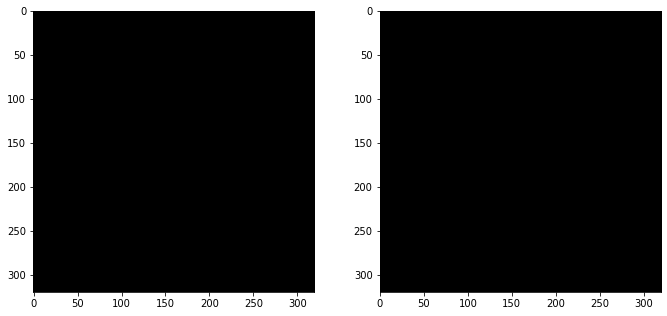

In [61]:
compare('0237')

In [37]:
def pair(testcase):
    filename='/Users/chenwu/Downloads/artificial-lunar-rocky-landscape-dataset/images/render/render'+testcase+'.png'
    image = scipy.misc.imresize(scipy.misc.imread(filename), image_shape)
    image = image[np.newaxis, :, :, :].astype("float32")
    out = model.predict(image)
    pred = out[0]  # pred's dim:[h, w, n_class]
    #x_name = x_names[0]
    pred = np.argmax(pred, axis=2)  # get the largest number of the channel
    pred = cm[pred]  # convert the pixel value to color map
    weighted_pred = addweight(pred, image) 
    
    
    filename='/Users/chenwu/Downloads/artificial-lunar-rocky-landscape-dataset/images/clean/clean'+testcase+'.png'
    true = scipy.misc.imresize(scipy.misc.imread(filename), image_shape)
    
    return np.array(weighted_pred), true


In [40]:
pair('0001')[0].shape

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in 

(320, 320, 3)

In [41]:
pair('0001')[1].shape

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in 

(320, 320, 3)

In [48]:
compute_iou(pair('8700')[0], pair('8700')[1])

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in 

0.49993979892842094

In [69]:
target = pair('0237')[1]
prediction =  pair('0237')[0]
intersection = np.logical_and(target, prediction)

union = np.logical_or(target, prediction)
iou_score = np.sum(intersection) / np.sum(union)

np.sum(union)
#iou_score

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in 

0

In [76]:
total_iou = 0
bad_img = 0
from tqdm import tqdm
for i in tqdm(range(1,6401)):
    
    number = '{0:04}'.format(i)
    target = pair(number)[1]
    prediction =  pair(number)[0]
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    
    if np.sum(union) != 0 :
        iou_score = np.sum(intersection) / np.sum(union)
        total_iou = total_iou+iou_score
    else:
        bad_img += 1
    
    print(total_iou/(i-bad_img))
    
    #iou_score


  0%|          | 0/6400 [00:00<?, ?it/s]/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is

0.9946391166968438



  0%|          | 2/6400 [00:01<1:30:41,  1.18it/s]

0.8374786818647908



  0%|          | 3/6400 [00:02<1:25:01,  1.25it/s]

0.6109075260763609



  0%|          | 4/6400 [00:03<1:21:52,  1.30it/s]

0.7070020320620618



  0%|          | 5/6400 [00:03<1:20:23,  1.33it/s]

0.7260313131496494



  0%|          | 6/6400 [00:04<1:20:36,  1.32it/s]

0.7192883219937994



  0%|          | 7/6400 [00:05<1:19:52,  1.33it/s]

0.7528333250611203



  0%|          | 8/6400 [00:05<1:19:34,  1.34it/s]

0.7532952925371577



  0%|          | 9/6400 [00:06<1:18:29,  1.36it/s]

0.6695958155885846



  0%|          | 10/6400 [00:07<1:18:24,  1.36it/s]

0.6997735144461217



  0%|          | 11/6400 [00:08<1:17:55,  1.37it/s]

0.7156570536905901



  0%|          | 12/6400 [00:08<1:16:44,  1.39it/s]

0.7390160029591538


  0%|          | 13/6400 [00:09<1:16:31,  1.39it/s]

0.7577059792881256


  0%|          | 14/6400 [00:10<1:15:40,  1.41it/s]

0.7634692038703784


  0%|          | 15/6400 [00:10<1:15:26,  1.41it/s]

0.7705003182004359


  0%|          | 16/6400 [00:11<1:16:48,  1.39it/s]

0.7805558497515301


  0%|          | 17/6400 [00:12<1:21:39,  1.30it/s]

0.7916364089433032


  0%|          | 18/6400 [00:13<1:27:37,  1.21it/s]

0.766233095675118


  0%|          | 19/6400 [00:14<1:29:21,  1.19it/s]

0.7781621205325573


  0%|          | 20/6400 [00:15<1:28:56,  1.20it/s]

0.7878317203338666


  0%|          | 21/6400 [00:16<1:28:50,  1.20it/s]

0.797564337147264


  0%|          | 22/6400 [00:16<1:29:51,  1.18it/s]

0.8059946161150999


  0%|          | 23/6400 [00:17<1:28:57,  1.19it/s]

0.8004927817679974


  0%|          | 24/6400 [00:18<1:28:07,  1.21it/s]

0.8063697763247347


  0%|          | 25/6400 [00:19<1:27:05,  1.22it/s]

0.7795532679193303


  0%|          | 26/6400 [00:20<1:26:35,  1.23it/s]

0.786125451253852


  0%|          | 27/6400 [00:20<1:26:45,  1.22it/s]

0.7838929011050377


  0%|          | 28/6400 [00:21<1:27:09,  1.22it/s]

0.788171671012776


  0%|          | 29/6400 [00:22<1:27:53,  1.21it/s]

0.7950540579628582


  0%|          | 30/6400 [00:23<1:27:22,  1.21it/s]

0.8014357977031785


  0%|          | 31/6400 [00:24<1:27:30,  1.21it/s]

0.8070025863920541


  0%|          | 32/6400 [00:25<1:28:22,  1.20it/s]

0.8128876973635116


  1%|          | 33/6400 [00:26<1:29:12,  1.19it/s]

0.8154315467482228


  1%|          | 34/6400 [00:26<1:31:08,  1.16it/s]

0.8146397926787942


  1%|          | 35/6400 [00:27<1:32:18,  1.15it/s]

0.8130241656931336


  1%|          | 36/6400 [00:28<1:32:50,  1.14it/s]

0.8128708433964359


  1%|          | 37/6400 [00:29<1:31:48,  1.16it/s]

0.8163284188276003


  1%|          | 38/6400 [00:30<1:28:30,  1.20it/s]

0.8178000024722457


  1%|          | 39/6400 [00:31<1:27:09,  1.22it/s]

0.8205959333318927


  1%|          | 40/6400 [00:31<1:25:45,  1.24it/s]

0.8249337292679273


  1%|          | 41/6400 [00:32<1:23:10,  1.27it/s]

0.8273851419820762


  1%|          | 42/6400 [00:33<1:19:59,  1.32it/s]

0.8261058336809939


  1%|          | 43/6400 [00:33<1:18:03,  1.36it/s]

0.8272272529644097


  1%|          | 44/6400 [00:34<1:16:21,  1.39it/s]

0.8310991174738219


  1%|          | 45/6400 [00:35<1:14:41,  1.42it/s]

0.8332382611525476


  1%|          | 46/6400 [00:36<1:14:05,  1.43it/s]

0.8273999819830322


  1%|          | 47/6400 [00:36<1:13:51,  1.43it/s]

0.8244716946123597


  1%|          | 48/6400 [00:37<1:13:27,  1.44it/s]

0.8238096776684037


  1%|          | 49/6400 [00:38<1:13:40,  1.44it/s]

0.8230471088187339


  1%|          | 50/6400 [00:38<1:14:06,  1.43it/s]

0.8259761342798997


  1%|          | 51/6400 [00:39<1:14:42,  1.42it/s]

0.8279251053089375


  1%|          | 52/6400 [00:40<1:14:29,  1.42it/s]

0.8277985800220987


  1%|          | 53/6400 [00:40<1:14:32,  1.42it/s]

0.8308473184143469


  1%|          | 54/6400 [00:41<1:16:20,  1.39it/s]

0.833509779734724


  1%|          | 55/6400 [00:42<1:24:41,  1.25it/s]

0.8348396237732887


  1%|          | 56/6400 [00:44<1:42:06,  1.04it/s]

0.8371250263344017


  1%|          | 57/6400 [00:44<1:37:10,  1.09it/s]

0.8365761022449013


  1%|          | 58/6400 [00:45<1:33:42,  1.13it/s]

0.8388005846297504


  1%|          | 59/6400 [00:46<1:31:36,  1.15it/s]

0.8400844219525228


  1%|          | 60/6400 [00:47<1:32:30,  1.14it/s]

0.8423466371306709


  1%|          | 61/6400 [00:48<1:32:00,  1.15it/s]

0.837529741480501


  1%|          | 62/6400 [00:49<1:32:48,  1.14it/s]

0.8374888589996311


  1%|          | 63/6400 [00:49<1:29:40,  1.18it/s]

0.8399879478966096


  1%|          | 64/6400 [00:50<1:27:37,  1.21it/s]

0.8399141468770406


  1%|          | 65/6400 [00:51<1:29:13,  1.18it/s]

0.8423250580139537


  1%|          | 66/6400 [00:52<1:30:48,  1.16it/s]

0.8412821628304638


  1%|          | 67/6400 [00:53<1:29:45,  1.18it/s]

0.8402117390503638


  1%|          | 68/6400 [00:54<1:27:39,  1.20it/s]

0.8421546785255919


  1%|          | 69/6400 [00:54<1:28:06,  1.20it/s]

0.8440774313144235


  1%|          | 70/6400 [00:55<1:28:12,  1.20it/s]

0.8434916457959232


  1%|          | 71/6400 [00:56<1:26:11,  1.22it/s]

0.8455043971052127


  1%|          | 72/6400 [00:57<1:23:53,  1.26it/s]

0.8473378593213178


  1%|          | 73/6400 [00:58<1:24:06,  1.25it/s]

0.8492815972112109


  1%|          | 74/6400 [00:58<1:24:00,  1.25it/s]

0.8502800701156731


  1%|          | 75/6400 [00:59<1:24:43,  1.24it/s]

0.848110808988237


  1%|          | 76/6400 [01:00<1:23:40,  1.26it/s]

0.849986551244236


  1%|          | 77/6400 [01:01<1:23:28,  1.26it/s]

0.847987466989144


  1%|          | 78/6400 [01:02<1:23:12,  1.27it/s]

0.8492298548144086


  1%|          | 79/6400 [01:02<1:22:17,  1.28it/s]

0.8509844836661498


  1%|▏         | 80/6400 [01:03<1:19:43,  1.32it/s]

0.852035127754821


  1%|▏         | 81/6400 [01:04<1:17:25,  1.36it/s]

0.8537167393330231


  1%|▏         | 82/6400 [01:04<1:15:39,  1.39it/s]

0.8544362331434506


  1%|▏         | 83/6400 [01:05<1:13:55,  1.42it/s]

0.855811929756822


  1%|▏         | 84/6400 [01:06<1:12:39,  1.45it/s]

0.8573359172510392


  1%|▏         | 85/6400 [01:06<1:12:22,  1.45it/s]

0.8553828031540193


  1%|▏         | 86/6400 [01:07<1:11:39,  1.47it/s]

0.8529615787258321


  1%|▏         | 87/6400 [01:08<1:11:56,  1.46it/s]

0.8542672753065482


  1%|▏         | 88/6400 [01:08<1:12:08,  1.46it/s]

0.8551315477642192


  1%|▏         | 89/6400 [01:09<1:12:13,  1.46it/s]

0.8549638921943702


  1%|▏         | 90/6400 [01:10<1:13:10,  1.44it/s]

0.8559183138674238


  1%|▏         | 91/6400 [01:11<1:13:46,  1.43it/s]

0.857260396153654


  1%|▏         | 92/6400 [01:11<1:14:10,  1.42it/s]

0.8543194121612345


  1%|▏         | 93/6400 [01:12<1:14:45,  1.41it/s]

0.8528666055080658


  1%|▏         | 94/6400 [01:13<1:17:28,  1.36it/s]

0.854211688667543


  1%|▏         | 95/6400 [01:14<1:23:32,  1.26it/s]

0.8530842463884785


  2%|▏         | 96/6400 [01:15<1:26:17,  1.22it/s]

0.854273145311998


  2%|▏         | 97/6400 [01:15<1:27:26,  1.20it/s]

0.8552455111625697


  2%|▏         | 98/6400 [01:16<1:26:54,  1.21it/s]

0.8565589710931363


  2%|▏         | 99/6400 [01:17<1:27:31,  1.20it/s]

0.8499316623747172


  2%|▏         | 100/6400 [01:18<1:27:24,  1.20it/s]

0.8479751028771577


  2%|▏         | 101/6400 [01:19<1:25:20,  1.23it/s]

0.8488667647431728


  2%|▏         | 102/6400 [01:20<1:25:18,  1.23it/s]

0.8503037884891155


  2%|▏         | 103/6400 [01:20<1:26:37,  1.21it/s]

0.8511184708813812


  2%|▏         | 104/6400 [01:21<1:27:25,  1.20it/s]

0.8524225144248028


  2%|▏         | 105/6400 [01:22<1:27:53,  1.19it/s]

0.8535091396959611


  2%|▏         | 106/6400 [01:23<1:27:24,  1.20it/s]

0.8545641940128311


  2%|▏         | 107/6400 [01:24<1:27:29,  1.20it/s]

0.8527617742895075


  2%|▏         | 108/6400 [01:25<1:27:37,  1.20it/s]

0.8535615547440876


  2%|▏         | 109/6400 [01:25<1:27:04,  1.20it/s]

0.8520160828112054


  2%|▏         | 110/6400 [01:26<1:26:23,  1.21it/s]

0.8525344567133728


  2%|▏         | 111/6400 [01:27<1:25:41,  1.22it/s]

0.8529157441388274


  2%|▏         | 112/6400 [01:28<1:24:34,  1.24it/s]

0.8540719175055879


  2%|▏         | 113/6400 [01:29<1:22:57,  1.26it/s]

0.8549471041387857


  2%|▏         | 114/6400 [01:29<1:23:36,  1.25it/s]

0.8561697651536814


  2%|▏         | 115/6400 [01:30<1:22:28,  1.27it/s]

0.8565842076499732


  2%|▏         | 116/6400 [01:31<1:19:53,  1.31it/s]

0.8546144601030681


  2%|▏         | 117/6400 [01:32<1:18:08,  1.34it/s]

0.8556293635778552


  2%|▏         | 118/6400 [01:32<1:16:18,  1.37it/s]

0.8557047190443464


  2%|▏         | 119/6400 [01:33<1:14:45,  1.40it/s]

0.8557734208488487


  2%|▏         | 120/6400 [01:34<1:13:56,  1.42it/s]

0.8557037910115715


  2%|▏         | 121/6400 [01:34<1:13:28,  1.42it/s]

0.8564853815246488


  2%|▏         | 122/6400 [01:35<1:13:00,  1.43it/s]

0.8561789396586877


  2%|▏         | 123/6400 [01:36<1:12:11,  1.45it/s]

0.8547740306103567


  2%|▏         | 124/6400 [01:36<1:12:31,  1.44it/s]

0.854871648115369


  2%|▏         | 125/6400 [01:37<1:12:34,  1.44it/s]

0.8559166772119746


  2%|▏         | 126/6400 [01:38<1:13:47,  1.42it/s]

0.8546660230164935


  2%|▏         | 127/6400 [01:39<1:14:51,  1.40it/s]

0.8544218593154184


  2%|▏         | 128/6400 [01:39<1:15:56,  1.38it/s]

0.8525172598244694


  2%|▏         | 129/6400 [01:40<1:16:21,  1.37it/s]

0.8527823202920832


  2%|▏         | 130/6400 [01:41<1:15:39,  1.38it/s]

0.8528683019819885


  2%|▏         | 131/6400 [01:41<1:15:40,  1.38it/s]

0.853890530155374


  2%|▏         | 132/6400 [01:42<1:17:53,  1.34it/s]

0.8540302190198776


  2%|▏         | 133/6400 [01:43<1:21:57,  1.27it/s]

0.8549288828501256


  2%|▏         | 134/6400 [01:44<1:26:38,  1.21it/s]

0.8558211902323253


  2%|▏         | 135/6400 [01:45<1:27:30,  1.19it/s]

0.8557155345227611


  2%|▏         | 136/6400 [01:46<1:27:19,  1.20it/s]

0.8561149613179332


  2%|▏         | 137/6400 [01:47<1:28:05,  1.18it/s]

0.8569273303785842


  2%|▏         | 138/6400 [01:47<1:28:51,  1.17it/s]

0.8549667526838529


  2%|▏         | 139/6400 [01:48<1:31:44,  1.14it/s]

0.8555604001943649


  2%|▏         | 140/6400 [01:49<1:29:00,  1.17it/s]

0.8562555269988593


  2%|▏         | 141/6400 [01:50<1:26:14,  1.21it/s]

0.8532871487066679


  2%|▏         | 142/6400 [01:51<1:28:22,  1.18it/s]

0.8535481844930799


  2%|▏         | 143/6400 [01:52<1:29:56,  1.16it/s]

0.8539726707145668


  2%|▏         | 144/6400 [01:53<1:29:35,  1.16it/s]

0.8532529532173272


  2%|▏         | 145/6400 [01:53<1:27:28,  1.19it/s]

0.8542485096633443


  2%|▏         | 146/6400 [01:54<1:26:38,  1.20it/s]

0.854342667042535


  2%|▏         | 147/6400 [01:55<1:27:55,  1.19it/s]

0.8546343247224661


  2%|▏         | 148/6400 [01:56<1:26:15,  1.21it/s]

0.8506708494735472


  2%|▏         | 149/6400 [01:57<1:24:01,  1.24it/s]

0.8509590751872066


  2%|▏         | 150/6400 [01:57<1:22:21,  1.26it/s]

0.8516571664459556


  2%|▏         | 151/6400 [01:58<1:22:53,  1.26it/s]

0.8484316479606727


  2%|▏         | 152/6400 [01:59<1:23:55,  1.24it/s]

0.8480689100093678


  2%|▏         | 153/6400 [02:00<1:23:26,  1.25it/s]

0.8475652329430832


  2%|▏         | 154/6400 [02:01<1:22:45,  1.26it/s]

0.8480047768777168


  2%|▏         | 155/6400 [02:01<1:22:43,  1.26it/s]

0.8466531571542756


  2%|▏         | 156/6400 [02:02<1:20:46,  1.29it/s]

0.8459990740805193


  2%|▏         | 157/6400 [02:03<1:19:50,  1.30it/s]

0.8441884212284851


  2%|▏         | 158/6400 [02:04<1:18:03,  1.33it/s]

0.844644112198898


  2%|▏         | 159/6400 [02:04<1:16:22,  1.36it/s]

0.8455249342502648


  2%|▎         | 160/6400 [02:05<1:14:41,  1.39it/s]

0.845563581017946


  3%|▎         | 161/6400 [02:06<1:13:21,  1.42it/s]

0.8427847628099165


  3%|▎         | 162/6400 [02:06<1:12:24,  1.44it/s]

0.8418967681554488


  3%|▎         | 163/6400 [02:07<1:11:50,  1.45it/s]

0.8417611791815581


  3%|▎         | 164/6400 [02:08<1:11:59,  1.44it/s]

0.8424293780426706


  3%|▎         | 165/6400 [02:08<1:11:48,  1.45it/s]

0.8427150071996669


  3%|▎         | 166/6400 [02:09<1:12:33,  1.43it/s]

0.8431541069579301


  3%|▎         | 167/6400 [02:10<1:13:06,  1.42it/s]

0.844036454519546


  3%|▎         | 168/6400 [02:11<1:13:20,  1.42it/s]

0.844712433627909


  3%|▎         | 169/6400 [02:11<1:13:12,  1.42it/s]

0.8456023268706354


  3%|▎         | 170/6400 [02:12<1:12:56,  1.42it/s]

0.8457296174255006


  3%|▎         | 171/6400 [02:13<1:16:07,  1.36it/s]

0.8449126418806039


  3%|▎         | 172/6400 [02:14<1:21:44,  1.27it/s]

0.845693036561392


  3%|▎         | 173/6400 [02:15<1:25:25,  1.21it/s]

0.8453488101864159


  3%|▎         | 174/6400 [02:15<1:27:10,  1.19it/s]

0.8452775818203324


  3%|▎         | 175/6400 [02:16<1:27:11,  1.19it/s]

0.8457801464986322


  3%|▎         | 176/6400 [02:17<1:27:01,  1.19it/s]

0.8464494107465835


  3%|▎         | 177/6400 [02:18<1:27:35,  1.18it/s]

0.8464344405278739


  3%|▎         | 178/6400 [02:19<1:27:34,  1.18it/s]

0.8459063042921763


  3%|▎         | 179/6400 [02:20<1:25:51,  1.21it/s]

0.8465957986881533


  3%|▎         | 180/6400 [02:20<1:25:32,  1.21it/s]

0.8472228808316089


  3%|▎         | 181/6400 [02:21<1:24:49,  1.22it/s]

0.8451533336249588


  3%|▎         | 182/6400 [02:22<1:25:00,  1.22it/s]

0.8441956352340816


  3%|▎         | 183/6400 [02:23<1:25:01,  1.22it/s]

0.8448831318038817


  3%|▎         | 184/6400 [02:24<1:24:37,  1.22it/s]

0.8450186303447884


  3%|▎         | 185/6400 [02:25<1:25:08,  1.22it/s]

0.8450883904621201


  3%|▎         | 186/6400 [02:25<1:25:52,  1.21it/s]

0.8450326732584134


  3%|▎         | 187/6400 [02:26<1:27:28,  1.18it/s]

0.8454368401905148


  3%|▎         | 188/6400 [02:27<1:28:10,  1.17it/s]

0.8450939715880792


  3%|▎         | 189/6400 [02:28<1:29:15,  1.16it/s]

0.8457499145014419


  3%|▎         | 190/6400 [02:29<1:26:54,  1.19it/s]

0.8453605535710013


  3%|▎         | 191/6400 [02:30<1:25:13,  1.21it/s]

0.8459595162255181


  3%|▎         | 192/6400 [02:30<1:22:31,  1.25it/s]

0.843806582198171


  3%|▎         | 193/6400 [02:31<1:21:10,  1.27it/s]

0.8441513293641


  3%|▎         | 194/6400 [02:32<1:19:50,  1.30it/s]

0.84493735502773


  3%|▎         | 195/6400 [02:33<1:17:55,  1.33it/s]

0.8452441475904694


  3%|▎         | 196/6400 [02:33<1:15:32,  1.37it/s]

0.8459304867682212


  3%|▎         | 197/6400 [02:34<1:13:39,  1.40it/s]

0.8463144898993042


  3%|▎         | 198/6400 [02:35<1:12:18,  1.43it/s]

0.8470226570473911


  3%|▎         | 199/6400 [02:35<1:11:28,  1.45it/s]

0.8477313778448936


  3%|▎         | 200/6400 [02:36<1:10:58,  1.46it/s]

0.8471790656623251


  3%|▎         | 201/6400 [02:37<1:10:24,  1.47it/s]

0.8477796372844449


  3%|▎         | 202/6400 [02:37<1:10:30,  1.46it/s]

0.8484116864822453


  3%|▎         | 203/6400 [02:38<1:11:03,  1.45it/s]

0.8485377497012964


  3%|▎         | 204/6400 [02:39<1:11:18,  1.45it/s]

0.849069561900944


  3%|▎         | 205/6400 [02:39<1:11:16,  1.45it/s]

0.8480573649128776


  3%|▎         | 206/6400 [02:40<1:11:34,  1.44it/s]

0.8477486179486631


  3%|▎         | 207/6400 [02:41<1:12:14,  1.43it/s]

0.8483332561411173


  3%|▎         | 208/6400 [02:41<1:12:07,  1.43it/s]

0.8481709516460713


  3%|▎         | 209/6400 [02:42<1:12:20,  1.43it/s]

0.848350715715061


  3%|▎         | 210/6400 [02:43<1:14:12,  1.39it/s]

0.8490075208881764


  3%|▎         | 211/6400 [02:44<1:19:21,  1.30it/s]

0.8492954252772204


  3%|▎         | 212/6400 [02:45<1:26:31,  1.19it/s]

0.8498095417254075


  3%|▎         | 213/6400 [02:46<1:28:49,  1.16it/s]

0.8501689610096108


  3%|▎         | 214/6400 [02:47<1:28:39,  1.16it/s]

0.8501992216041432


  3%|▎         | 215/6400 [02:47<1:29:10,  1.16it/s]

0.8500572869787596


  3%|▎         | 216/6400 [02:48<1:28:23,  1.17it/s]

0.8504287467564843


  3%|▎         | 217/6400 [02:49<1:27:07,  1.18it/s]

0.8504861727379776


  3%|▎         | 218/6400 [02:50<1:27:51,  1.17it/s]

0.851042531750863


  3%|▎         | 219/6400 [02:51<1:25:04,  1.21it/s]

0.8516775894855226


  3%|▎         | 220/6400 [02:51<1:22:16,  1.25it/s]

0.8519151464914377


  3%|▎         | 221/6400 [02:52<1:22:36,  1.25it/s]

0.8520494841705938


  3%|▎         | 222/6400 [02:53<1:27:38,  1.17it/s]

0.8526641702149061


  3%|▎         | 223/6400 [02:54<1:34:50,  1.09it/s]

0.8531443231556273


  4%|▎         | 224/6400 [02:55<1:33:22,  1.10it/s]

0.851983068390709


  4%|▎         | 225/6400 [02:56<1:32:12,  1.12it/s]

0.8518298367328474


  4%|▎         | 226/6400 [02:57<1:30:58,  1.13it/s]

0.8504873293647817


  4%|▎         | 227/6400 [02:58<1:28:22,  1.16it/s]

0.850328024089543


  4%|▎         | 228/6400 [02:58<1:25:22,  1.20it/s]

0.8483652852904924


  4%|▎         | 229/6400 [02:59<1:23:07,  1.24it/s]

0.8489739756658515


  4%|▎         | 230/6400 [03:00<1:21:34,  1.26it/s]

0.8484873054224541


  4%|▎         | 231/6400 [03:01<1:21:39,  1.26it/s]

0.849086210496154


  4%|▎         | 232/6400 [03:02<1:21:48,  1.26it/s]

0.8493075827683741


  4%|▎         | 233/6400 [03:02<1:21:30,  1.26it/s]

0.8495374382909188


  4%|▎         | 234/6400 [03:03<1:21:12,  1.27it/s]

0.8495732574139855


  4%|▎         | 235/6400 [03:04<1:19:39,  1.29it/s]

0.8475805922065518


  4%|▎         | 236/6400 [03:05<1:19:46,  1.29it/s]

0.8480566288228159


  4%|▎         | 237/6400 [03:05<1:18:45,  1.30it/s]

0.8480566288228159


  4%|▎         | 238/6400 [03:06<1:17:12,  1.33it/s]

0.8483249957622881


  4%|▎         | 239/6400 [03:07<1:15:03,  1.37it/s]

0.8488194637911368


  4%|▍         | 240/6400 [03:07<1:13:05,  1.40it/s]

0.8489666413521562


  4%|▍         | 241/6400 [03:08<1:11:40,  1.43it/s]

0.8495142550654113


  4%|▍         | 242/6400 [03:09<1:10:38,  1.45it/s]

0.8499897859639272


  4%|▍         | 243/6400 [03:09<1:10:13,  1.46it/s]

0.8480132229471403


  4%|▍         | 244/6400 [03:10<1:10:17,  1.46it/s]

0.8482646143147956


  4%|▍         | 245/6400 [03:11<1:10:55,  1.45it/s]

0.8481314899762562


  4%|▍         | 246/6400 [03:12<1:10:54,  1.45it/s]

0.8487413138199948


  4%|▍         | 247/6400 [03:12<1:10:42,  1.45it/s]

0.8489426316128413


  4%|▍         | 248/6400 [03:13<1:10:32,  1.45it/s]

0.849457283368743


  4%|▍         | 249/6400 [03:14<1:10:50,  1.45it/s]

0.8500087151347208


  4%|▍         | 250/6400 [03:14<1:11:38,  1.43it/s]

0.8502738002788179


  4%|▍         | 251/6400 [03:15<1:11:43,  1.43it/s]

0.8502550019888471


  4%|▍         | 252/6400 [03:16<1:11:31,  1.43it/s]

0.8504072643462788


  4%|▍         | 253/6400 [03:16<1:12:07,  1.42it/s]

0.8487631330430895


  4%|▍         | 254/6400 [03:17<1:14:39,  1.37it/s]

0.8493056185612583


  4%|▍         | 255/6400 [03:18<1:19:38,  1.29it/s]

0.8498822563235902


  4%|▍         | 256/6400 [03:19<1:27:10,  1.17it/s]

0.8499840453339339


  4%|▍         | 257/6400 [03:20<1:28:45,  1.15it/s]

0.8500440417474071


  4%|▍         | 258/6400 [03:21<1:27:54,  1.16it/s]

0.8502246406157612


  4%|▍         | 259/6400 [03:22<1:27:59,  1.16it/s]

0.8506081796786182


  4%|▍         | 260/6400 [03:23<1:27:18,  1.17it/s]

0.8503279300353223


  4%|▍         | 261/6400 [03:24<1:28:50,  1.15it/s]

0.850405753882023


  4%|▍         | 262/6400 [03:24<1:26:23,  1.18it/s]

0.8505321747409662


  4%|▍         | 263/6400 [03:25<1:25:04,  1.20it/s]

0.8507303892287729


  4%|▍         | 264/6400 [03:26<1:26:16,  1.19it/s]

0.8510332577396756


  4%|▍         | 265/6400 [03:27<1:29:38,  1.14it/s]

0.8508483427688492


  4%|▍         | 266/6400 [03:28<1:30:25,  1.13it/s]

0.8490857541300307


  4%|▍         | 267/6400 [03:29<1:31:59,  1.11it/s]

0.8494827815487443


  4%|▍         | 268/6400 [03:30<1:33:23,  1.09it/s]

0.8498051825867478


  4%|▍         | 269/6400 [03:31<1:34:48,  1.08it/s]

0.8499739984943904


  4%|▍         | 270/6400 [03:32<1:33:42,  1.09it/s]

0.8500248861977483


  4%|▍         | 271/6400 [03:32<1:32:20,  1.11it/s]

0.8496372044739507


  4%|▍         | 272/6400 [03:33<1:33:01,  1.10it/s]

0.850013954124843


  4%|▍         | 273/6400 [03:34<1:32:44,  1.10it/s]

0.8504450173921736


  4%|▍         | 274/6400 [03:35<1:32:32,  1.10it/s]

0.850842237821466


  4%|▍         | 275/6400 [03:36<1:31:34,  1.11it/s]

0.8505314598910784


  4%|▍         | 276/6400 [03:37<1:29:37,  1.14it/s]

0.8508219041142926


  4%|▍         | 277/6400 [03:38<1:29:45,  1.14it/s]

0.8492504962344143


  4%|▍         | 278/6400 [03:39<1:29:50,  1.14it/s]

0.8494621990011381


  4%|▍         | 279/6400 [03:39<1:27:01,  1.17it/s]

0.8498481866520723


  4%|▍         | 280/6400 [03:40<1:23:55,  1.22it/s]

0.8501693936221679


  4%|▍         | 281/6400 [03:41<1:20:49,  1.26it/s]

0.8503675227471533


  4%|▍         | 282/6400 [03:42<1:18:20,  1.30it/s]

0.8490831807038719


  4%|▍         | 283/6400 [03:42<1:16:09,  1.34it/s]

0.8495373038644671


  4%|▍         | 284/6400 [03:43<1:14:42,  1.36it/s]

0.8491315885298809


  4%|▍         | 285/6400 [03:44<1:13:22,  1.39it/s]

0.8486125704338294


  4%|▍         | 286/6400 [03:44<1:13:15,  1.39it/s]

0.8480755100157741


  4%|▍         | 287/6400 [03:45<1:12:51,  1.40it/s]

0.8476099931722232


  4%|▍         | 288/6400 [03:46<1:12:47,  1.40it/s]

0.8480945462731387


  5%|▍         | 289/6400 [03:47<1:12:57,  1.40it/s]

0.8475076478781197


  5%|▍         | 290/6400 [03:47<1:13:03,  1.39it/s]

0.8480086825225084


  5%|▍         | 291/6400 [03:48<1:13:34,  1.38it/s]

0.8474814330257593


  5%|▍         | 292/6400 [03:49<1:13:34,  1.38it/s]

0.8479208712789866


  5%|▍         | 293/6400 [03:49<1:13:09,  1.39it/s]

0.8484238317056495


  5%|▍         | 294/6400 [03:50<1:14:15,  1.37it/s]

0.8484466677788316


  5%|▍         | 295/6400 [03:51<1:17:02,  1.32it/s]

0.848283004010944


  5%|▍         | 296/6400 [03:52<1:22:45,  1.23it/s]

0.8486703365299282


  5%|▍         | 297/6400 [03:53<1:31:40,  1.11it/s]

0.8486452847534741


  5%|▍         | 298/6400 [03:54<1:29:10,  1.14it/s]

0.8489979965681471


  5%|▍         | 299/6400 [03:55<1:28:29,  1.15it/s]

0.8492941800891307


  5%|▍         | 300/6400 [03:56<1:27:26,  1.16it/s]

0.8496579939823493


  5%|▍         | 301/6400 [03:56<1:26:10,  1.18it/s]

0.8500117014186225


  5%|▍         | 302/6400 [03:57<1:27:05,  1.17it/s]

0.8501260561678402


  5%|▍         | 303/6400 [03:58<1:25:16,  1.19it/s]

0.8504611736871539


  5%|▍         | 304/6400 [03:59<1:24:29,  1.20it/s]

0.8486761901168031


  5%|▍         | 305/6400 [04:00<1:26:20,  1.18it/s]

0.8481160361398942


  5%|▍         | 306/6400 [04:01<1:30:14,  1.13it/s]

0.8484099650392819


  5%|▍         | 307/6400 [04:02<1:30:09,  1.13it/s]

0.8477574552947955


  5%|▍         | 308/6400 [04:03<1:30:25,  1.12it/s]

0.8479097944513575


  5%|▍         | 309/6400 [04:03<1:28:22,  1.15it/s]

0.8480762972893652


  5%|▍         | 310/6400 [04:04<1:29:16,  1.14it/s]

0.8480280549788326


  5%|▍         | 311/6400 [04:05<1:26:58,  1.17it/s]

0.8484202266186562


  5%|▍         | 312/6400 [04:06<1:26:44,  1.17it/s]

0.8478250444985953


  5%|▍         | 313/6400 [04:07<1:25:27,  1.19it/s]

0.8473969842309603


  5%|▍         | 314/6400 [04:08<1:26:37,  1.17it/s]

0.8477224005967188


  5%|▍         | 315/6400 [04:08<1:26:02,  1.18it/s]

0.8476744226277646


  5%|▍         | 316/6400 [04:09<1:25:14,  1.19it/s]

0.8478583759550982


  5%|▍         | 317/6400 [04:10<1:24:12,  1.20it/s]

0.8483224532678444


  5%|▍         | 318/6400 [04:11<1:23:00,  1.22it/s]

0.8469843294574954


  5%|▍         | 319/6400 [04:12<1:22:29,  1.23it/s]

0.8443226874434633


  5%|▌         | 320/6400 [04:12<1:21:15,  1.25it/s]

0.8443691561841251


  5%|▌         | 321/6400 [04:13<1:19:08,  1.28it/s]

0.8445635287725706


  5%|▌         | 322/6400 [04:14<1:17:05,  1.31it/s]

0.8441136985404252


  5%|▌         | 323/6400 [04:15<1:16:17,  1.33it/s]

0.8439724150435196


  5%|▌         | 324/6400 [04:15<1:14:49,  1.35it/s]

0.843997080790373


  5%|▌         | 325/6400 [04:16<1:15:47,  1.34it/s]

0.8438616335820809


  5%|▌         | 326/6400 [04:17<1:14:27,  1.36it/s]

0.8443244644851524


  5%|▌         | 327/6400 [04:18<1:13:31,  1.38it/s]

0.8433600106335641


  5%|▌         | 328/6400 [04:18<1:12:22,  1.40it/s]

0.8428288769627934


  5%|▌         | 329/6400 [04:19<1:11:58,  1.41it/s]

0.8426460974902794


  5%|▌         | 330/6400 [04:20<1:11:42,  1.41it/s]

0.8427471569095665


  5%|▌         | 331/6400 [04:20<1:11:11,  1.42it/s]

0.8426365666556506


  5%|▌         | 332/6400 [04:21<1:10:15,  1.44it/s]

0.842901106696414


  5%|▌         | 333/6400 [04:22<1:09:57,  1.45it/s]

0.8431004471241793


  5%|▌         | 334/6400 [04:22<1:10:09,  1.44it/s]

0.8435371299509014


  5%|▌         | 335/6400 [04:23<1:09:38,  1.45it/s]

0.8439116283665181


  5%|▌         | 336/6400 [04:24<1:09:39,  1.45it/s]

0.8443019359820888


  5%|▌         | 337/6400 [04:25<1:13:06,  1.38it/s]

0.8446990461904592


  5%|▌         | 338/6400 [04:25<1:16:39,  1.32it/s]

0.8440286572567083


  5%|▌         | 339/6400 [04:26<1:23:36,  1.21it/s]

0.8437959411661718


  5%|▌         | 340/6400 [04:27<1:23:28,  1.21it/s]

0.8439560942541163


  5%|▌         | 341/6400 [04:28<1:24:59,  1.19it/s]

0.8437054160214936


  5%|▌         | 342/6400 [04:29<1:23:54,  1.20it/s]

0.8440053304569483


  5%|▌         | 343/6400 [04:30<1:23:46,  1.20it/s]

0.8444302816675561


  5%|▌         | 344/6400 [04:31<1:22:46,  1.22it/s]

0.8447799330090281


  5%|▌         | 345/6400 [04:31<1:21:27,  1.24it/s]

0.844626245780913


  5%|▌         | 346/6400 [04:32<1:21:12,  1.24it/s]

0.8430638203224992


  5%|▌         | 347/6400 [04:33<1:21:53,  1.23it/s]

0.8432707069700532


  5%|▌         | 348/6400 [04:34<1:22:51,  1.22it/s]

0.8435191414172667


  5%|▌         | 349/6400 [04:35<1:22:51,  1.22it/s]

0.8439525753466571


  5%|▌         | 350/6400 [04:35<1:22:49,  1.22it/s]

0.8439140687624546


  5%|▌         | 351/6400 [04:36<1:22:20,  1.22it/s]

0.8435544162927178


  6%|▌         | 352/6400 [04:37<1:22:24,  1.22it/s]

0.8439422813357598


  6%|▌         | 353/6400 [04:38<1:23:14,  1.21it/s]

0.8440683809529722


  6%|▌         | 354/6400 [04:39<1:22:39,  1.22it/s]

0.8443754546140585


  6%|▌         | 355/6400 [04:39<1:22:05,  1.23it/s]

0.8439229616015761


  6%|▌         | 356/6400 [04:40<1:20:40,  1.25it/s]

0.8439021175526112


  6%|▌         | 357/6400 [04:41<1:20:15,  1.25it/s]

0.8439594167344994


  6%|▌         | 358/6400 [04:42<1:20:48,  1.25it/s]

0.8442518935775916


  6%|▌         | 359/6400 [04:43<1:19:25,  1.27it/s]

0.8435959202817058


  6%|▌         | 360/6400 [04:43<1:16:51,  1.31it/s]

0.8439464673627692


  6%|▌         | 361/6400 [04:44<1:14:37,  1.35it/s]

0.844196477669917


  6%|▌         | 362/6400 [04:45<1:12:47,  1.38it/s]

0.8445962448473459


  6%|▌         | 363/6400 [04:45<1:11:30,  1.41it/s]

0.8448160403643382


  6%|▌         | 364/6400 [04:46<1:10:13,  1.43it/s]

0.8449703098659817


  6%|▌         | 365/6400 [04:47<1:09:39,  1.44it/s]

0.8443654529783887


  6%|▌         | 366/6400 [04:47<1:09:35,  1.45it/s]

0.8443383689801935


  6%|▌         | 367/6400 [04:48<1:09:15,  1.45it/s]

0.8447545783635556


  6%|▌         | 368/6400 [04:49<1:08:59,  1.46it/s]

0.845168936310561


  6%|▌         | 369/6400 [04:49<1:08:48,  1.46it/s]

0.845444919552192


  6%|▌         | 370/6400 [04:50<1:09:33,  1.44it/s]

0.8456252522303529


  6%|▌         | 371/6400 [04:51<1:10:04,  1.43it/s]

0.8453322747328053


  6%|▌         | 372/6400 [04:52<1:10:09,  1.43it/s]

0.845609456026147


  6%|▌         | 373/6400 [04:52<1:12:10,  1.39it/s]

0.8459405702970864


  6%|▌         | 374/6400 [04:53<1:13:33,  1.37it/s]

0.845447967240832


  6%|▌         | 375/6400 [04:54<1:21:24,  1.23it/s]

0.8456235456625908


  6%|▌         | 376/6400 [04:55<1:21:48,  1.23it/s]

0.8457393557326008


  6%|▌         | 377/6400 [04:56<1:23:37,  1.20it/s]

0.8458314503520316


  6%|▌         | 378/6400 [04:57<1:23:23,  1.20it/s]

0.8455601801024103


  6%|▌         | 379/6400 [04:57<1:23:53,  1.20it/s]

0.8456498276510553


  6%|▌         | 380/6400 [04:58<1:24:01,  1.19it/s]

0.8444217638552584


  6%|▌         | 381/6400 [04:59<1:21:44,  1.23it/s]

0.8446421202092296


  6%|▌         | 382/6400 [05:00<1:21:56,  1.22it/s]

0.8445882261129833


  6%|▌         | 383/6400 [05:01<1:23:37,  1.20it/s]

0.8434804621654914


  6%|▌         | 384/6400 [05:02<1:24:10,  1.19it/s]

0.843104205416078


  6%|▌         | 385/6400 [05:03<1:25:20,  1.17it/s]

0.8429258279173698


  6%|▌         | 386/6400 [05:03<1:24:20,  1.19it/s]

0.8432964036570183


  6%|▌         | 387/6400 [05:04<1:23:43,  1.20it/s]

0.8432834621739815


  6%|▌         | 388/6400 [05:05<1:23:42,  1.20it/s]

0.8433758590317528


  6%|▌         | 389/6400 [05:06<1:23:13,  1.20it/s]

0.8430038233938388


  6%|▌         | 390/6400 [05:07<1:21:59,  1.22it/s]

0.8433325057725056


  6%|▌         | 391/6400 [05:07<1:21:27,  1.23it/s]

0.84368241018329


  6%|▌         | 392/6400 [05:08<1:19:42,  1.26it/s]

0.8435384888497242


  6%|▌         | 393/6400 [05:09<1:19:11,  1.26it/s]

0.8434135271814414


  6%|▌         | 394/6400 [05:10<1:18:03,  1.28it/s]

0.8437378503882461


  6%|▌         | 395/6400 [05:10<1:16:43,  1.30it/s]

0.8438123468917794


  6%|▌         | 396/6400 [05:11<1:14:39,  1.34it/s]

0.844113620456728


  6%|▌         | 397/6400 [05:12<1:13:23,  1.36it/s]

0.8430513279450981


  6%|▌         | 398/6400 [05:13<1:11:59,  1.39it/s]

0.8428483820877767


  6%|▌         | 399/6400 [05:13<1:10:10,  1.43it/s]

0.8430810152552821


  6%|▋         | 400/6400 [05:14<1:09:07,  1.45it/s]

0.8432778993493916


  6%|▋         | 401/6400 [05:15<1:08:58,  1.45it/s]

0.8426391816938461


  6%|▋         | 402/6400 [05:15<1:08:45,  1.45it/s]

0.8421923444308931


  6%|▋         | 403/6400 [05:16<1:08:50,  1.45it/s]

0.8424638127984535


  6%|▋         | 404/6400 [05:17<1:09:14,  1.44it/s]

0.8427627134827153


  6%|▋         | 405/6400 [05:17<1:10:03,  1.43it/s]

0.8431204019873481


  6%|▋         | 406/6400 [05:18<1:10:19,  1.42it/s]

0.843092184763081


  6%|▋         | 407/6400 [05:19<1:11:10,  1.40it/s]

0.8431923425915768


  6%|▋         | 408/6400 [05:20<1:12:20,  1.38it/s]

0.8435661486798348


  6%|▋         | 409/6400 [05:20<1:14:45,  1.34it/s]

0.8433216403394916


  6%|▋         | 410/6400 [05:21<1:21:38,  1.22it/s]

0.8436677672216574


  6%|▋         | 411/6400 [05:22<1:23:48,  1.19it/s]

0.8440015435481527


  6%|▋         | 412/6400 [05:23<1:25:51,  1.16it/s]

0.8437987943739887


  6%|▋         | 413/6400 [05:24<1:24:19,  1.18it/s]

0.8439542700805532


  6%|▋         | 414/6400 [05:25<1:23:52,  1.19it/s]

0.8438461389876413


  6%|▋         | 415/6400 [05:26<1:24:52,  1.18it/s]

0.8440753895437804


  6%|▋         | 416/6400 [05:26<1:22:28,  1.21it/s]

0.8441674286614791


  7%|▋         | 417/6400 [05:27<1:20:22,  1.24it/s]

0.8433727197489064


  7%|▋         | 418/6400 [05:28<1:21:20,  1.23it/s]

0.8436047980038863


  7%|▋         | 419/6400 [05:29<1:22:35,  1.21it/s]

0.8438127252199066


  7%|▋         | 420/6400 [05:30<1:22:21,  1.21it/s]

0.8436728156815856


  7%|▋         | 421/6400 [05:30<1:22:14,  1.21it/s]

0.8430694585436556


  7%|▋         | 422/6400 [05:31<1:22:03,  1.21it/s]

0.8432710216652508


  7%|▋         | 423/6400 [05:32<1:21:26,  1.22it/s]

0.8430783201942343


  7%|▋         | 424/6400 [05:33<1:22:07,  1.21it/s]

0.8434321545907889


  7%|▋         | 425/6400 [05:34<1:21:27,  1.22it/s]

0.8437240723878356


  7%|▋         | 426/6400 [05:35<1:20:04,  1.24it/s]

0.8438706393647913


  7%|▋         | 427/6400 [05:35<1:20:34,  1.24it/s]

0.843343001497151


  7%|▋         | 428/6400 [05:36<1:20:59,  1.23it/s]

0.8434946408580858


  7%|▋         | 429/6400 [05:37<1:21:42,  1.22it/s]

0.8436920975448517


  7%|▋         | 430/6400 [05:38<1:21:03,  1.23it/s]

0.8438928583407557


  7%|▋         | 431/6400 [05:39<1:20:12,  1.24it/s]

0.8436349193137277


  7%|▋         | 432/6400 [05:39<1:17:52,  1.28it/s]

0.8435614834754848


  7%|▋         | 433/6400 [05:40<1:15:40,  1.31it/s]

0.8438663000575187


  7%|▋         | 434/6400 [05:41<1:13:44,  1.35it/s]

0.8437428306356862


  7%|▋         | 435/6400 [05:41<1:12:10,  1.38it/s]

0.8440810231834662


  7%|▋         | 436/6400 [05:42<1:11:13,  1.40it/s]

0.8439532301948667


  7%|▋         | 437/6400 [05:43<1:10:40,  1.41it/s]

0.8441784029978137


  7%|▋         | 438/6400 [05:44<1:10:40,  1.41it/s]

0.8438510631841463


  7%|▋         | 439/6400 [05:44<1:10:51,  1.40it/s]

0.8425894246413165


  7%|▋         | 440/6400 [05:45<1:11:32,  1.39it/s]

0.8425248684150104


  7%|▋         | 441/6400 [05:46<1:11:16,  1.39it/s]

0.8427419884746544


  7%|▋         | 442/6400 [05:46<1:11:12,  1.39it/s]

0.8430736245601723


  7%|▋         | 443/6400 [05:47<1:11:36,  1.39it/s]

0.8432420942999208


  7%|▋         | 444/6400 [05:48<1:11:14,  1.39it/s]

0.8435849496374218


  7%|▋         | 445/6400 [05:49<1:13:01,  1.36it/s]

0.8439196654861616


  7%|▋         | 446/6400 [05:50<1:21:28,  1.22it/s]

0.8439592074884301


  7%|▋         | 447/6400 [05:51<1:23:34,  1.19it/s]

0.8441864273467821


  7%|▋         | 448/6400 [05:52<1:30:03,  1.10it/s]

0.8442224935604541


  7%|▋         | 449/6400 [05:53<1:31:07,  1.09it/s]

0.8442742356779672


  7%|▋         | 450/6400 [05:53<1:29:10,  1.11it/s]

0.8442509839501038


  7%|▋         | 451/6400 [05:54<1:26:23,  1.15it/s]

0.8445912531292189


  7%|▋         | 452/6400 [05:55<1:24:44,  1.17it/s]

0.8449004608539549


  7%|▋         | 453/6400 [05:56<1:28:04,  1.13it/s]

0.8445942020790725


  7%|▋         | 454/6400 [05:57<1:26:54,  1.14it/s]

0.8430353855798001


  7%|▋         | 455/6400 [05:58<1:22:31,  1.20it/s]

0.8432651619621692


  7%|▋         | 456/6400 [05:58<1:19:25,  1.25it/s]

0.8434337067471234


  7%|▋         | 457/6400 [05:59<1:21:11,  1.22it/s]

0.8434040996201196


  7%|▋         | 458/6400 [06:00<1:28:59,  1.11it/s]

0.8437045739165551


  7%|▋         | 459/6400 [06:01<1:26:46,  1.14it/s]

0.8432704265803613


  7%|▋         | 460/6400 [06:02<1:26:21,  1.15it/s]

0.8434362085092929


  7%|▋         | 461/6400 [06:03<1:25:30,  1.16it/s]

0.8437143983270593


  7%|▋         | 462/6400 [06:04<1:25:28,  1.16it/s]

0.8439508063460246


  7%|▋         | 463/6400 [06:04<1:24:39,  1.17it/s]

0.844228627152853


  7%|▋         | 464/6400 [06:05<1:23:15,  1.19it/s]

0.8442480547269599


  7%|▋         | 465/6400 [06:06<1:21:22,  1.22it/s]

0.8442818621188585


  7%|▋         | 466/6400 [06:07<1:19:51,  1.24it/s]

0.8445535172257456


  7%|▋         | 467/6400 [06:08<1:18:42,  1.26it/s]

0.8442843397854558


  7%|▋         | 468/6400 [06:08<1:18:11,  1.26it/s]

0.8444849113156212


  7%|▋         | 469/6400 [06:09<1:17:46,  1.27it/s]

0.8439892790314429


  7%|▋         | 470/6400 [06:10<1:17:11,  1.28it/s]

0.8442564643251623


  7%|▋         | 471/6400 [06:11<1:16:19,  1.29it/s]

0.8445600520357868


  7%|▋         | 472/6400 [06:11<1:16:43,  1.29it/s]

0.8447942423654426


  7%|▋         | 473/6400 [06:12<1:15:00,  1.32it/s]

0.8447814169037678


  7%|▋         | 474/6400 [06:13<1:13:04,  1.35it/s]

0.8447453399704601


  7%|▋         | 475/6400 [06:14<1:11:15,  1.39it/s]

0.8449027291816763


  7%|▋         | 476/6400 [06:14<1:09:21,  1.42it/s]

0.8449024284702865


  7%|▋         | 477/6400 [06:15<1:08:45,  1.44it/s]

0.8451865934882409


  7%|▋         | 478/6400 [06:16<1:08:21,  1.44it/s]

0.8454151787641389


  7%|▋         | 479/6400 [06:16<1:08:37,  1.44it/s]

0.8440992372019048


  8%|▊         | 480/6400 [06:17<1:08:08,  1.45it/s]

0.8442584216223952


  8%|▊         | 481/6400 [06:18<1:08:28,  1.44it/s]

0.8437730671665972


  8%|▊         | 482/6400 [06:18<1:09:09,  1.43it/s]

0.8440701396682162


  8%|▊         | 483/6400 [06:19<1:09:52,  1.41it/s]

0.8432961248675821


  8%|▊         | 484/6400 [06:20<1:08:32,  1.44it/s]

0.8435445582464256


  8%|▊         | 485/6400 [06:20<1:08:43,  1.43it/s]

0.8438245927615445


  8%|▊         | 486/6400 [06:21<1:10:54,  1.39it/s]

0.8440427905400605


  8%|▊         | 487/6400 [06:22<1:12:44,  1.35it/s]

0.8442972459076701


  8%|▊         | 488/6400 [06:23<1:20:08,  1.23it/s]

0.8437649438884981


  8%|▊         | 489/6400 [06:24<1:21:10,  1.21it/s]

0.8440334550426134


  8%|▊         | 490/6400 [06:25<1:21:52,  1.20it/s]

0.8442223613770726


  8%|▊         | 491/6400 [06:26<1:22:03,  1.20it/s]

0.8441082587865301


  8%|▊         | 492/6400 [06:26<1:21:42,  1.21it/s]

0.8442675237683012


  8%|▊         | 493/6400 [06:27<1:22:04,  1.20it/s]

0.8445442518796851


  8%|▊         | 494/6400 [06:28<1:21:58,  1.20it/s]

0.844634251789844


  8%|▊         | 495/6400 [06:29<1:21:35,  1.21it/s]

0.8447905871633329


  8%|▊         | 496/6400 [06:30<1:24:03,  1.17it/s]

0.8450672708172301


  8%|▊         | 497/6400 [06:31<1:23:31,  1.18it/s]

0.8448705432641465


  8%|▊         | 498/6400 [06:31<1:23:10,  1.18it/s]

0.8445576288599524


  8%|▊         | 499/6400 [06:32<1:25:11,  1.15it/s]

0.8441115384158565


  8%|▊         | 500/6400 [06:33<1:23:05,  1.18it/s]

0.8439558471086207


  8%|▊         | 501/6400 [06:34<1:21:06,  1.21it/s]

0.8429151152951109


  8%|▊         | 502/6400 [06:35<1:19:26,  1.24it/s]

0.8431924676847052


  8%|▊         | 503/6400 [06:36<1:19:38,  1.23it/s]

0.8432457306045041


  8%|▊         | 504/6400 [06:36<1:18:56,  1.24it/s]

0.8435432232079264


  8%|▊         | 505/6400 [06:37<1:18:47,  1.25it/s]

0.8438438564752844


  8%|▊         | 506/6400 [06:38<1:18:00,  1.26it/s]

0.8439922803216827


  8%|▊         | 507/6400 [06:39<1:18:18,  1.25it/s]

0.8431702833117173


  8%|▊         | 508/6400 [06:39<1:15:56,  1.29it/s]

0.8426634470016139


  8%|▊         | 509/6400 [06:40<1:14:34,  1.32it/s]

0.8428568342050025


  8%|▊         | 510/6400 [06:41<1:12:12,  1.36it/s]

0.8428939281053052


  8%|▊         | 511/6400 [06:41<1:10:57,  1.38it/s]

0.842568203268592


  8%|▊         | 512/6400 [06:42<1:08:41,  1.43it/s]

0.8427789152144146


  8%|▊         | 513/6400 [06:43<1:08:13,  1.44it/s]

0.8423485715258541


  8%|▊         | 514/6400 [06:44<1:08:31,  1.43it/s]

0.842352944997373


  8%|▊         | 515/6400 [06:44<1:07:55,  1.44it/s]

0.8425014512902863


  8%|▊         | 516/6400 [06:45<1:08:09,  1.44it/s]

0.8426064809637808


  8%|▊         | 517/6400 [06:46<1:08:00,  1.44it/s]

0.8422965355752219


  8%|▊         | 518/6400 [06:46<1:07:21,  1.46it/s]

0.8425478677967739


  8%|▊         | 519/6400 [06:47<1:07:46,  1.45it/s]

0.8426714027212427


  8%|▊         | 520/6400 [06:48<1:07:57,  1.44it/s]

0.842885026590721


  8%|▊         | 521/6400 [06:48<1:08:47,  1.42it/s]

0.8431771977756594


  8%|▊         | 522/6400 [06:49<1:08:39,  1.43it/s]

0.8423736580749094


  8%|▊         | 523/6400 [06:50<1:08:27,  1.43it/s]

0.8426191523191018


  8%|▊         | 524/6400 [06:51<1:10:14,  1.39it/s]

0.842858064425433


  8%|▊         | 525/6400 [06:51<1:13:06,  1.34it/s]

0.8430409397214451


  8%|▊         | 526/6400 [06:52<1:20:43,  1.21it/s]

0.8429230355542406


  8%|▊         | 527/6400 [06:53<1:21:59,  1.19it/s]

0.8432138966142745


  8%|▊         | 528/6400 [06:54<1:22:53,  1.18it/s]

0.8434717764902024


  8%|▊         | 529/6400 [06:55<1:23:00,  1.18it/s]

0.8434273879779717


  8%|▊         | 530/6400 [06:56<1:21:06,  1.21it/s]

0.8434551252394792


  8%|▊         | 531/6400 [06:57<1:23:26,  1.17it/s]

0.8435763180443152


  8%|▊         | 532/6400 [06:57<1:21:32,  1.20it/s]

0.8432774801338666


  8%|▊         | 533/6400 [06:58<1:20:03,  1.22it/s]

0.843484998753942


  8%|▊         | 534/6400 [06:59<1:20:39,  1.21it/s]

0.8435927370418497


  8%|▊         | 535/6400 [07:00<1:27:07,  1.12it/s]

0.8433612697620025


  8%|▊         | 536/6400 [07:01<1:26:42,  1.13it/s]

0.8436068419160856


  8%|▊         | 537/6400 [07:02<1:24:58,  1.15it/s]

0.8429172930696466


  8%|▊         | 538/6400 [07:03<1:25:10,  1.15it/s]

0.842003433345632


  8%|▊         | 539/6400 [07:04<1:24:27,  1.16it/s]

0.8421917812802298


  8%|▊         | 540/6400 [07:04<1:23:18,  1.17it/s]

0.8424778658032983


  8%|▊         | 541/6400 [07:05<1:20:45,  1.21it/s]

0.842672880177965


  8%|▊         | 542/6400 [07:06<1:18:54,  1.24it/s]

0.8429115328856641


  8%|▊         | 543/6400 [07:07<1:18:24,  1.25it/s]

0.8428547218577878


  8%|▊         | 544/6400 [07:07<1:16:44,  1.27it/s]

0.8430515026784411


  9%|▊         | 545/6400 [07:08<1:15:53,  1.29it/s]

0.8432614618814261


  9%|▊         | 546/6400 [07:09<1:16:07,  1.28it/s]

0.8423800087449894


  9%|▊         | 547/6400 [07:10<1:15:59,  1.28it/s]

0.8423491792713753


  9%|▊         | 548/6400 [07:10<1:15:00,  1.30it/s]

0.8425963317583541


  9%|▊         | 549/6400 [07:11<1:15:05,  1.30it/s]

0.842862792611725


  9%|▊         | 550/6400 [07:12<1:13:54,  1.32it/s]

0.8429677124590583


  9%|▊         | 551/6400 [07:13<1:11:48,  1.36it/s]

0.8430121646394931


  9%|▊         | 552/6400 [07:13<1:10:14,  1.39it/s]

0.8429124002828106


  9%|▊         | 553/6400 [07:14<1:08:58,  1.41it/s]

0.8431585331735014


  9%|▊         | 554/6400 [07:15<1:07:34,  1.44it/s]

0.8432839593058992


  9%|▊         | 555/6400 [07:15<1:07:04,  1.45it/s]

0.8427609839662263


  9%|▊         | 556/6400 [07:16<1:07:08,  1.45it/s]

0.8429904374564453


  9%|▊         | 557/6400 [07:17<1:06:56,  1.45it/s]

0.8431890888926682


  9%|▊         | 558/6400 [07:17<1:06:53,  1.46it/s]

0.8430630463928951


  9%|▊         | 559/6400 [07:18<1:07:14,  1.45it/s]

0.8430349762519745


  9%|▉         | 560/6400 [07:19<1:08:12,  1.43it/s]

0.8429046382287249


  9%|▉         | 561/6400 [07:20<1:08:27,  1.42it/s]

0.843173288461674


  9%|▉         | 562/6400 [07:20<1:08:51,  1.41it/s]

0.8432949495029494


  9%|▉         | 563/6400 [07:21<1:10:13,  1.39it/s]

0.8434246723218649


  9%|▉         | 564/6400 [07:22<1:12:11,  1.35it/s]

0.8436756790198231


  9%|▉         | 565/6400 [07:23<1:17:43,  1.25it/s]

0.8438854819724599


  9%|▉         | 566/6400 [07:24<1:21:41,  1.19it/s]

0.8439433061196197


  9%|▉         | 567/6400 [07:25<1:24:09,  1.16it/s]

0.8436190521454497


  9%|▉         | 568/6400 [07:25<1:23:09,  1.17it/s]

0.8437653413439541


  9%|▉         | 569/6400 [07:26<1:23:09,  1.17it/s]

0.8432801059101681


  9%|▉         | 570/6400 [07:27<1:20:31,  1.21it/s]

0.8434499535418362


  9%|▉         | 571/6400 [07:28<1:22:33,  1.18it/s]

0.8436412195695149


  9%|▉         | 572/6400 [07:29<1:20:40,  1.20it/s]

0.8438402539426536


  9%|▉         | 573/6400 [07:30<1:21:23,  1.19it/s]

0.8438664200962287


  9%|▉         | 574/6400 [07:30<1:20:35,  1.20it/s]

0.8441124717575065


  9%|▉         | 575/6400 [07:31<1:21:02,  1.20it/s]

0.8435831289935268


  9%|▉         | 576/6400 [07:32<1:21:14,  1.19it/s]

0.8437853228841872


  9%|▉         | 577/6400 [07:33<1:21:05,  1.20it/s]

0.8429990838220532


  9%|▉         | 578/6400 [07:34<1:20:11,  1.21it/s]

0.8431510107470414


  9%|▉         | 579/6400 [07:35<1:19:39,  1.22it/s]

0.8427161400614


  9%|▉         | 580/6400 [07:35<1:19:52,  1.21it/s]

0.8428941518457994


  9%|▉         | 581/6400 [07:36<1:19:37,  1.22it/s]

0.8427995405892226


  9%|▉         | 582/6400 [07:37<1:18:24,  1.24it/s]

0.8428039929131383


  9%|▉         | 583/6400 [07:38<1:20:08,  1.21it/s]

0.8430557656111863


  9%|▉         | 584/6400 [07:39<1:19:01,  1.23it/s]

0.8427837032150486


  9%|▉         | 585/6400 [07:40<1:20:00,  1.21it/s]

0.8429886912994561


  9%|▉         | 586/6400 [07:40<1:18:08,  1.24it/s]

0.8431284329938378


  9%|▉         | 587/6400 [07:41<1:16:28,  1.27it/s]

0.8433874663206608


  9%|▉         | 588/6400 [07:42<1:14:01,  1.31it/s]

0.8429557066475768


  9%|▉         | 589/6400 [07:42<1:12:06,  1.34it/s]

0.843201751822425


  9%|▉         | 590/6400 [07:43<1:09:58,  1.38it/s]

0.8434109312575258


  9%|▉         | 591/6400 [07:44<1:08:53,  1.41it/s]

0.843598668677375


  9%|▉         | 592/6400 [07:44<1:08:11,  1.42it/s]

0.8436816532491265


  9%|▉         | 593/6400 [07:45<1:07:54,  1.43it/s]

0.8436492367938495


  9%|▉         | 594/6400 [07:46<1:07:54,  1.42it/s]

0.8438814871869791


  9%|▉         | 595/6400 [07:47<1:08:23,  1.41it/s]

0.843908209462116


  9%|▉         | 596/6400 [07:47<1:08:23,  1.41it/s]

0.8438972637003831


  9%|▉         | 597/6400 [07:48<1:08:41,  1.41it/s]

0.8435875245276097


  9%|▉         | 598/6400 [07:49<1:08:50,  1.40it/s]

0.8432467724151703


  9%|▉         | 599/6400 [07:49<1:08:52,  1.40it/s]

0.8432824146900434


  9%|▉         | 600/6400 [07:50<1:08:25,  1.41it/s]

0.8433872773506191


  9%|▉         | 601/6400 [07:51<1:10:30,  1.37it/s]

0.8435129184905722


  9%|▉         | 602/6400 [07:52<1:17:27,  1.25it/s]

0.8433250669283554


  9%|▉         | 603/6400 [07:53<1:21:14,  1.19it/s]

0.8428926475043141


  9%|▉         | 604/6400 [07:54<1:21:51,  1.18it/s]

0.8427303349220524


  9%|▉         | 605/6400 [07:54<1:20:28,  1.20it/s]

0.8422483161074467


  9%|▉         | 606/6400 [07:55<1:19:59,  1.21it/s]

0.8418154173784945


  9%|▉         | 607/6400 [07:56<1:20:14,  1.20it/s]

0.841885506581885


 10%|▉         | 608/6400 [07:57<1:20:25,  1.20it/s]

0.8421327179429587


 10%|▉         | 609/6400 [07:58<1:20:21,  1.20it/s]

0.8422986447519542


 10%|▉         | 610/6400 [07:59<1:18:31,  1.23it/s]

0.8424702362470142


 10%|▉         | 611/6400 [07:59<1:20:08,  1.20it/s]

0.8424788383136226


 10%|▉         | 612/6400 [08:00<1:20:15,  1.20it/s]

0.8425884235794125


 10%|▉         | 613/6400 [08:01<1:20:25,  1.20it/s]

0.8428286264930467


 10%|▉         | 614/6400 [08:02<1:19:49,  1.21it/s]

0.8430705825727565


 10%|▉         | 615/6400 [08:03<1:19:57,  1.21it/s]

0.8433162228978824


 10%|▉         | 616/6400 [08:04<1:19:45,  1.21it/s]

0.8431545105951631


 10%|▉         | 617/6400 [08:04<1:18:31,  1.23it/s]

0.8419006111563179


 10%|▉         | 618/6400 [08:05<1:18:08,  1.23it/s]

0.8418710706647329


 10%|▉         | 619/6400 [08:06<1:16:56,  1.25it/s]

0.8419444868805872


 10%|▉         | 620/6400 [08:07<1:16:34,  1.26it/s]

0.841146142408656


 10%|▉         | 621/6400 [08:08<1:16:01,  1.27it/s]

0.841380223181899


 10%|▉         | 622/6400 [08:08<1:15:50,  1.27it/s]

0.8415976742165556


 10%|▉         | 623/6400 [08:09<1:16:00,  1.27it/s]

0.8412476746685474


 10%|▉         | 624/6400 [08:10<1:15:38,  1.27it/s]

0.8408471357270626


 10%|▉         | 625/6400 [08:11<1:13:25,  1.31it/s]

0.8410202673791324


 10%|▉         | 626/6400 [08:11<1:11:09,  1.35it/s]

0.8409847614777993


 10%|▉         | 627/6400 [08:12<1:09:39,  1.38it/s]

0.8410412726113007


 10%|▉         | 628/6400 [08:13<1:08:42,  1.40it/s]

0.8409515212847638


 10%|▉         | 629/6400 [08:13<1:06:55,  1.44it/s]

0.8412006240039347


 10%|▉         | 630/6400 [08:14<1:06:02,  1.46it/s]

0.8403763570287515


 10%|▉         | 631/6400 [08:15<1:06:22,  1.45it/s]

0.8405766024954346


 10%|▉         | 632/6400 [08:15<1:05:53,  1.46it/s]

0.8407106147940915


 10%|▉         | 633/6400 [08:16<1:06:21,  1.45it/s]

0.8408289518518582


 10%|▉         | 634/6400 [08:17<1:07:15,  1.43it/s]

0.8408284595716826


 10%|▉         | 635/6400 [08:17<1:07:27,  1.42it/s]

0.8408386612352257


 10%|▉         | 636/6400 [08:18<1:07:14,  1.43it/s]

0.8410138061059885


 10%|▉         | 637/6400 [08:19<1:08:01,  1.41it/s]

0.8412089725151849


 10%|▉         | 638/6400 [08:20<1:10:44,  1.36it/s]

0.8411939388083549


 10%|▉         | 639/6400 [08:21<1:20:17,  1.20it/s]

0.8414145227979657


 10%|█         | 640/6400 [08:22<1:32:42,  1.04it/s]

0.8415415716584168


 10%|█         | 641/6400 [08:23<1:29:14,  1.08it/s]

0.8413365426928691


 10%|█         | 642/6400 [08:24<1:25:39,  1.12it/s]

0.8401509119492212


 10%|█         | 643/6400 [08:24<1:23:44,  1.15it/s]

0.8397982175437769


 10%|█         | 644/6400 [08:25<1:22:10,  1.17it/s]

0.8398595326123305


 10%|█         | 645/6400 [08:26<1:21:41,  1.17it/s]

0.8400764461163119


 10%|█         | 646/6400 [08:27<1:19:09,  1.21it/s]

0.83989200079412


 10%|█         | 647/6400 [08:28<1:19:19,  1.21it/s]

0.838753558995253


 10%|█         | 648/6400 [08:29<1:19:39,  1.20it/s]

0.838092741653016


 10%|█         | 649/6400 [08:29<1:19:32,  1.20it/s]

0.83832385314743


 10%|█         | 650/6400 [08:30<1:19:09,  1.21it/s]

0.8379853912554572


 10%|█         | 651/6400 [08:31<1:19:19,  1.21it/s]

0.8381602605442429


 10%|█         | 652/6400 [08:32<1:19:17,  1.21it/s]

0.838380014881839


 10%|█         | 653/6400 [08:33<1:19:17,  1.21it/s]

0.8386176205402167


 10%|█         | 654/6400 [08:34<1:18:48,  1.22it/s]

0.838842964353366


 10%|█         | 655/6400 [08:34<1:16:44,  1.25it/s]

0.8390065179023712


 10%|█         | 656/6400 [08:35<1:14:46,  1.28it/s]

0.8388258913558138


 10%|█         | 657/6400 [08:36<1:15:36,  1.27it/s]

0.8390314310792865


 10%|█         | 658/6400 [08:37<1:15:21,  1.27it/s]

0.8392575371720578


 10%|█         | 659/6400 [08:37<1:13:28,  1.30it/s]

0.8393935239973698


 10%|█         | 660/6400 [08:38<1:13:17,  1.31it/s]

0.8394471262487949


 10%|█         | 661/6400 [08:39<1:11:32,  1.34it/s]

0.8396534656672817


 10%|█         | 662/6400 [08:39<1:09:54,  1.37it/s]

0.8397262807480234


 10%|█         | 663/6400 [08:40<1:08:35,  1.39it/s]

0.8394386669185522


 10%|█         | 664/6400 [08:41<1:07:09,  1.42it/s]

0.8395253711386733


 10%|█         | 665/6400 [08:42<1:06:12,  1.44it/s]

0.8395737372937432


 10%|█         | 666/6400 [08:42<1:06:02,  1.45it/s]

0.8396013127500339


 10%|█         | 667/6400 [08:43<1:05:17,  1.46it/s]

0.8396567968637866


 10%|█         | 668/6400 [08:44<1:05:07,  1.47it/s]

0.8397041761830566


 10%|█         | 669/6400 [08:44<1:04:53,  1.47it/s]

0.8399244878728084


 10%|█         | 670/6400 [08:45<1:05:37,  1.46it/s]

0.8400347949812541


 10%|█         | 671/6400 [08:46<1:06:13,  1.44it/s]

0.8401202495706547


 10%|█         | 672/6400 [08:46<1:06:53,  1.43it/s]

0.8403407392321449


 11%|█         | 673/6400 [08:47<1:07:02,  1.42it/s]

0.8405474851311967


 11%|█         | 674/6400 [08:48<1:08:50,  1.39it/s]

0.8400804012008383


 11%|█         | 675/6400 [08:49<1:12:18,  1.32it/s]

0.8400856963225137


 11%|█         | 676/6400 [08:50<1:19:08,  1.21it/s]

0.8401622793984445


 11%|█         | 677/6400 [08:51<1:19:39,  1.20it/s]

0.8400777118771726


 11%|█         | 678/6400 [08:51<1:20:15,  1.19it/s]

0.8402877261123417


 11%|█         | 679/6400 [08:52<1:19:41,  1.20it/s]

0.8405141749871562


 11%|█         | 680/6400 [08:53<1:18:54,  1.21it/s]

0.8407315509441695


 11%|█         | 681/6400 [08:54<1:19:37,  1.20it/s]

0.8409583079013987


 11%|█         | 682/6400 [08:55<1:18:14,  1.22it/s]

0.8411801582314178


 11%|█         | 683/6400 [08:55<1:16:26,  1.25it/s]

0.8412885429339843


 11%|█         | 684/6400 [08:56<1:17:07,  1.24it/s]

0.8415151667992739


 11%|█         | 685/6400 [08:57<1:16:48,  1.24it/s]

0.8417261762523631


 11%|█         | 686/6400 [08:58<1:18:55,  1.21it/s]

0.8419509503985574


 11%|█         | 687/6400 [08:59<1:18:16,  1.22it/s]

0.8416939478441946


 11%|█         | 688/6400 [09:00<1:18:50,  1.21it/s]

0.8416190765839328


 11%|█         | 689/6400 [09:00<1:18:45,  1.21it/s]

0.8411397523584397


 11%|█         | 690/6400 [09:01<1:17:35,  1.23it/s]

0.8413140953344499


 11%|█         | 691/6400 [09:02<1:16:31,  1.24it/s]

0.8412940861913881


 11%|█         | 692/6400 [09:03<1:16:16,  1.25it/s]

0.8414293119127035


 11%|█         | 693/6400 [09:04<1:15:51,  1.25it/s]

0.8415366328475113


 11%|█         | 694/6400 [09:04<1:15:54,  1.25it/s]

0.8417532896939558


 11%|█         | 695/6400 [09:05<1:16:53,  1.24it/s]

0.8411465758078096


 11%|█         | 696/6400 [09:06<1:15:56,  1.25it/s]

0.8412279731540873


 11%|█         | 697/6400 [09:07<1:14:40,  1.27it/s]

0.8413063896817747


 11%|█         | 698/6400 [09:07<1:11:22,  1.33it/s]

0.840497297120887


 11%|█         | 699/6400 [09:08<1:10:20,  1.35it/s]

0.8406852677457166


 11%|█         | 700/6400 [09:09<1:08:22,  1.39it/s]

0.8404252155936197


 11%|█         | 701/6400 [09:09<1:07:47,  1.40it/s]

0.840643052557771


 11%|█         | 702/6400 [09:10<1:07:13,  1.41it/s]

0.8406161046469071


 11%|█         | 703/6400 [09:11<1:06:33,  1.43it/s]

0.8407662787897265


 11%|█         | 704/6400 [09:11<1:05:36,  1.45it/s]

0.840873511373066


 11%|█         | 705/6400 [09:12<1:05:05,  1.46it/s]

0.8410803100360517


 11%|█         | 706/6400 [09:13<1:05:24,  1.45it/s]

0.8410566695865018


 11%|█         | 707/6400 [09:14<1:05:42,  1.44it/s]

0.8412056011774344


 11%|█         | 708/6400 [09:14<1:06:12,  1.43it/s]

0.8413056076742078


 11%|█         | 709/6400 [09:15<1:08:08,  1.39it/s]

0.8411920692557321


 11%|█         | 710/6400 [09:16<1:09:49,  1.36it/s]

0.8412042798402963


 11%|█         | 711/6400 [09:17<1:11:19,  1.33it/s]

0.8412554152627817


 11%|█         | 712/6400 [09:17<1:11:50,  1.32it/s]

0.8414156623535417


 11%|█         | 713/6400 [09:18<1:16:18,  1.24it/s]

0.8412368434157357


 11%|█         | 714/6400 [09:19<1:20:43,  1.17it/s]

0.8412011001675475


 11%|█         | 715/6400 [09:20<1:25:16,  1.11it/s]

0.8413701255817408


 11%|█         | 716/6400 [09:21<1:22:52,  1.14it/s]

0.8414906260683077


 11%|█         | 717/6400 [09:22<1:21:17,  1.17it/s]

0.8414158245266716


 11%|█         | 718/6400 [09:23<1:19:26,  1.19it/s]

0.8413358445905114


 11%|█         | 719/6400 [09:24<1:21:15,  1.17it/s]

0.84141999348524


 11%|█▏        | 720/6400 [09:24<1:21:44,  1.16it/s]

0.8416053573735963


 11%|█▏        | 721/6400 [09:25<1:22:23,  1.15it/s]

0.8416139496727097


 11%|█▏        | 722/6400 [09:26<1:18:24,  1.21it/s]

0.8416932540551758


 11%|█▏        | 723/6400 [09:27<1:17:51,  1.22it/s]

0.8409867045362245


 11%|█▏        | 724/6400 [09:28<1:20:36,  1.17it/s]

0.8411920654180988


 11%|█▏        | 725/6400 [09:29<1:21:01,  1.17it/s]

0.8413050918493943


 11%|█▏        | 726/6400 [09:30<1:23:24,  1.13it/s]

0.8414446622183376


 11%|█▏        | 727/6400 [09:30<1:21:32,  1.16it/s]

0.8415468664787807


 11%|█▏        | 728/6400 [09:31<1:21:17,  1.16it/s]

0.8417019705917411


 11%|█▏        | 729/6400 [09:32<1:19:32,  1.19it/s]

0.8418722754922698


 11%|█▏        | 730/6400 [09:33<1:18:15,  1.21it/s]

0.8417998667390791


 11%|█▏        | 731/6400 [09:34<1:15:59,  1.24it/s]

0.8419694827384062


 11%|█▏        | 732/6400 [09:34<1:14:41,  1.26it/s]

0.8421306677782733


 11%|█▏        | 733/6400 [09:35<1:14:38,  1.27it/s]

0.8422372529255586


 11%|█▏        | 734/6400 [09:36<1:14:42,  1.26it/s]

0.8423987551806852


 11%|█▏        | 735/6400 [09:37<1:14:53,  1.26it/s]

0.8425301685682665


 12%|█▏        | 736/6400 [09:38<1:15:17,  1.25it/s]

0.8426575142987757


 12%|█▏        | 737/6400 [09:38<1:15:01,  1.26it/s]

0.8425914674511279


 12%|█▏        | 738/6400 [09:39<1:14:19,  1.27it/s]

0.8424333680480933


 12%|█▏        | 739/6400 [09:40<1:13:27,  1.28it/s]

0.8426300128968002


 12%|█▏        | 740/6400 [09:41<1:13:11,  1.29it/s]

0.842738220699471


 12%|█▏        | 741/6400 [09:41<1:11:04,  1.33it/s]

0.8428562979844612


 12%|█▏        | 742/6400 [09:42<1:09:15,  1.36it/s]

0.8426395516436449


 12%|█▏        | 743/6400 [09:43<1:07:35,  1.40it/s]

0.8425234309091671


 12%|█▏        | 744/6400 [09:43<1:06:46,  1.41it/s]

0.8424681055086084


 12%|█▏        | 745/6400 [09:44<1:06:08,  1.42it/s]

0.8425593289329534


 12%|█▏        | 746/6400 [09:45<1:05:49,  1.43it/s]

0.8424648888290251


 12%|█▏        | 747/6400 [09:46<1:06:09,  1.42it/s]

0.8426685037834359


 12%|█▏        | 748/6400 [09:46<1:06:55,  1.41it/s]

0.8423132284641408


 12%|█▏        | 749/6400 [09:47<1:07:06,  1.40it/s]

0.8425109536723546


 12%|█▏        | 750/6400 [09:48<1:06:40,  1.41it/s]

0.8414153948452375


 12%|█▏        | 751/6400 [09:48<1:06:17,  1.42it/s]

0.8413552618547061


 12%|█▏        | 752/6400 [09:49<1:06:09,  1.42it/s]

0.8414537796681947


 12%|█▏        | 753/6400 [09:50<1:06:46,  1.41it/s]

0.8416546001045905


 12%|█▏        | 754/6400 [09:50<1:06:32,  1.41it/s]

0.841430778742337


 12%|█▏        | 755/6400 [09:51<1:06:15,  1.42it/s]

0.8415842032881784


 12%|█▏        | 756/6400 [09:52<1:09:13,  1.36it/s]

0.8417339685959581


 12%|█▏        | 757/6400 [09:53<1:11:38,  1.31it/s]

0.8417164824690192


 12%|█▏        | 758/6400 [09:54<1:18:08,  1.20it/s]

0.8416320391104757


 12%|█▏        | 759/6400 [09:55<1:20:48,  1.16it/s]

0.8415286957204011


 12%|█▏        | 760/6400 [09:56<1:19:19,  1.18it/s]

0.841153727954163


 12%|█▏        | 761/6400 [09:56<1:19:36,  1.18it/s]

0.8407261061527699


 12%|█▏        | 762/6400 [09:57<1:19:06,  1.19it/s]

0.8408612981562904


 12%|█▏        | 763/6400 [09:58<1:17:45,  1.21it/s]

0.8406808661371856


 12%|█▏        | 764/6400 [09:59<1:19:28,  1.18it/s]

0.8408230418952578


 12%|█▏        | 765/6400 [10:00<1:19:51,  1.18it/s]

0.8409980730474965


 12%|█▏        | 766/6400 [10:01<1:17:48,  1.21it/s]

0.8411918089477551


 12%|█▏        | 767/6400 [10:01<1:16:20,  1.23it/s]

0.8413744106997028


 12%|█▏        | 768/6400 [10:02<1:16:29,  1.23it/s]

0.8415670561399382


 12%|█▏        | 769/6400 [10:03<1:22:19,  1.14it/s]

0.8417258185887313


 12%|█▏        | 770/6400 [10:04<1:20:59,  1.16it/s]

0.8418973066924149


 12%|█▏        | 771/6400 [10:05<1:21:32,  1.15it/s]

0.8420133698360376


 12%|█▏        | 772/6400 [10:06<1:21:04,  1.16it/s]

0.8409212642979883


 12%|█▏        | 773/6400 [10:07<1:20:48,  1.16it/s]

0.8410764347551234


 12%|█▏        | 774/6400 [10:07<1:17:55,  1.20it/s]

0.8405231158261252


 12%|█▏        | 775/6400 [10:08<1:16:46,  1.22it/s]

0.8402576650178647


 12%|█▏        | 776/6400 [10:09<1:15:26,  1.24it/s]

0.8404590432539022


 12%|█▏        | 777/6400 [10:10<1:14:25,  1.26it/s]

0.840251299115907


 12%|█▏        | 778/6400 [10:10<1:13:33,  1.27it/s]

0.8400282398279252


 12%|█▏        | 779/6400 [10:11<1:13:26,  1.28it/s]

0.8400588175813913


 12%|█▏        | 780/6400 [10:12<1:13:45,  1.27it/s]

0.8400195553739449


 12%|█▏        | 781/6400 [10:13<1:13:14,  1.28it/s]

0.8399730753751959


 12%|█▏        | 782/6400 [10:14<1:11:48,  1.30it/s]

0.8400980365377553


 12%|█▏        | 783/6400 [10:14<1:11:09,  1.32it/s]

0.8402694862479615


 12%|█▏        | 784/6400 [10:15<1:09:27,  1.35it/s]

0.8403671124235308


 12%|█▏        | 785/6400 [10:16<1:07:29,  1.39it/s]

0.840462072399983


 12%|█▏        | 786/6400 [10:16<1:05:55,  1.42it/s]

0.8404924238871241


 12%|█▏        | 787/6400 [10:17<1:05:02,  1.44it/s]

0.8406572655906033


 12%|█▏        | 788/6400 [10:18<1:04:08,  1.46it/s]

0.8408111258888705


 12%|█▏        | 789/6400 [10:18<1:03:40,  1.47it/s]

0.8409076626817146


 12%|█▏        | 790/6400 [10:19<1:03:26,  1.47it/s]

0.8410484576762476


 12%|█▏        | 791/6400 [10:20<1:03:37,  1.47it/s]

0.8409466883100806


 12%|█▏        | 792/6400 [10:20<1:04:06,  1.46it/s]

0.8405085613602332


 12%|█▏        | 793/6400 [10:21<1:04:49,  1.44it/s]

0.8405570108880634


 12%|█▏        | 794/6400 [10:22<1:05:07,  1.43it/s]

0.840595458581615


 12%|█▏        | 795/6400 [10:23<1:05:39,  1.42it/s]

0.8406788209016481


 12%|█▏        | 796/6400 [10:23<1:06:54,  1.40it/s]

0.8408129824228896


 12%|█▏        | 797/6400 [10:24<1:07:30,  1.38it/s]

0.8407078908424759


 12%|█▏        | 798/6400 [10:25<1:08:07,  1.37it/s]

0.8408712088469716


 12%|█▏        | 799/6400 [10:26<1:10:07,  1.33it/s]

0.8410677901698869


 12%|█▎        | 800/6400 [10:26<1:13:17,  1.27it/s]

0.8407370737154138


 13%|█▎        | 801/6400 [10:27<1:21:08,  1.15it/s]

0.8406913574143569


 13%|█▎        | 802/6400 [10:28<1:23:17,  1.12it/s]

0.8400997702832023


 13%|█▎        | 803/6400 [10:29<1:24:04,  1.11it/s]

0.8402804600481394


 13%|█▎        | 804/6400 [10:30<1:24:50,  1.10it/s]

0.8402467696765147


 13%|█▎        | 805/6400 [10:31<1:24:09,  1.11it/s]

0.8401221807112903


 13%|█▎        | 806/6400 [10:32<1:25:14,  1.09it/s]

0.8392402466846379


 13%|█▎        | 807/6400 [10:33<1:25:31,  1.09it/s]

0.8394264344042178


 13%|█▎        | 808/6400 [10:34<1:22:27,  1.13it/s]

0.8389623422564155


 13%|█▎        | 809/6400 [10:35<1:20:03,  1.16it/s]

0.838093388647295


 13%|█▎        | 810/6400 [10:35<1:19:42,  1.17it/s]

0.8378356206021325


 13%|█▎        | 811/6400 [10:36<1:21:29,  1.14it/s]

0.8377005124798019


 13%|█▎        | 812/6400 [10:37<1:20:34,  1.16it/s]

0.8375392807927079


 13%|█▎        | 813/6400 [10:38<1:19:04,  1.18it/s]

0.8367298392907242


 13%|█▎        | 814/6400 [10:39<1:18:45,  1.18it/s]

0.8367655349404041


 13%|█▎        | 815/6400 [10:40<1:17:57,  1.19it/s]

0.8366764138161759


 13%|█▎        | 816/6400 [10:40<1:15:39,  1.23it/s]

0.836738383052634


 13%|█▎        | 817/6400 [10:41<1:15:18,  1.24it/s]

0.8369198305750574


 13%|█▎        | 818/6400 [10:42<1:14:51,  1.24it/s]

0.8370550977819927


 13%|█▎        | 819/6400 [10:43<1:14:13,  1.25it/s]

0.8372115936865104


 13%|█▎        | 820/6400 [10:44<1:13:29,  1.27it/s]

0.8372923102757823


 13%|█▎        | 821/6400 [10:44<1:12:26,  1.28it/s]

0.8362712220925191


 13%|█▎        | 822/6400 [10:45<1:12:23,  1.28it/s]

0.8363487030340925


 13%|█▎        | 823/6400 [10:46<1:12:25,  1.28it/s]

0.8364748475667162


 13%|█▎        | 824/6400 [10:47<1:12:23,  1.28it/s]

0.8366556766190322


 13%|█▎        | 825/6400 [10:47<1:12:35,  1.28it/s]

0.8367858833041265


 13%|█▎        | 826/6400 [10:48<1:12:10,  1.29it/s]

0.8368022898456737


 13%|█▎        | 827/6400 [10:49<1:10:51,  1.31it/s]

0.836519833183148


 13%|█▎        | 828/6400 [10:50<1:10:08,  1.32it/s]

0.8360548603513647


 13%|█▎        | 829/6400 [10:50<1:10:09,  1.32it/s]

0.8360981925035363


 13%|█▎        | 830/6400 [10:51<1:09:32,  1.33it/s]

0.8358636685864432


 13%|█▎        | 831/6400 [10:52<1:09:33,  1.33it/s]

0.8357038595710963


 13%|█▎        | 832/6400 [10:53<1:09:03,  1.34it/s]

0.8358987100403967


 13%|█▎        | 833/6400 [10:53<1:08:18,  1.36it/s]

0.8359331898647467


 13%|█▎        | 834/6400 [10:54<1:07:35,  1.37it/s]

0.8357307284238669


 13%|█▎        | 835/6400 [10:55<1:06:54,  1.39it/s]

0.8359184401515452


 13%|█▎        | 836/6400 [10:56<1:06:32,  1.39it/s]

0.8360869680307339


 13%|█▎        | 837/6400 [10:56<1:06:48,  1.39it/s]

0.8356007427927703


 13%|█▎        | 838/6400 [10:57<1:06:41,  1.39it/s]

0.8357836729904904


 13%|█▎        | 839/6400 [10:58<1:06:38,  1.39it/s]

0.83594649760364


 13%|█▎        | 840/6400 [10:58<1:06:39,  1.39it/s]

0.8360502296914074


 13%|█▎        | 841/6400 [10:59<1:09:53,  1.33it/s]

0.8360116851765723


 13%|█▎        | 842/6400 [11:00<1:14:37,  1.24it/s]

0.8359787456989792


 13%|█▎        | 843/6400 [11:01<1:19:07,  1.17it/s]

0.8358438792983116


 13%|█▎        | 844/6400 [11:02<1:19:18,  1.17it/s]

0.835946550239319


 13%|█▎        | 845/6400 [11:03<1:17:34,  1.19it/s]

0.8359842453777919


 13%|█▎        | 846/6400 [11:04<1:17:35,  1.19it/s]

0.836059086730916


 13%|█▎        | 847/6400 [11:04<1:16:45,  1.21it/s]

0.836092852558748


 13%|█▎        | 848/6400 [11:05<1:16:45,  1.21it/s]

0.83628108563299


 13%|█▎        | 849/6400 [11:06<1:18:53,  1.17it/s]

0.8362415661399224


 13%|█▎        | 850/6400 [11:07<1:18:12,  1.18it/s]

0.8363636124839968


 13%|█▎        | 851/6400 [11:08<1:18:26,  1.18it/s]

0.8360791080788152


 13%|█▎        | 852/6400 [11:09<1:18:06,  1.18it/s]

0.8362334826642666


 13%|█▎        | 853/6400 [11:10<1:19:04,  1.17it/s]

0.836300932552456


 13%|█▎        | 854/6400 [11:10<1:19:09,  1.17it/s]

0.8364447763308474


 13%|█▎        | 855/6400 [11:11<1:18:55,  1.17it/s]

0.8362081701394409


 13%|█▎        | 856/6400 [11:12<1:20:45,  1.14it/s]

0.8362932058842666


 13%|█▎        | 857/6400 [11:13<1:19:19,  1.16it/s]

0.8364624111954704


 13%|█▎        | 858/6400 [11:14<1:17:22,  1.19it/s]

0.8365612663383228


 13%|█▎        | 859/6400 [11:15<1:16:50,  1.20it/s]

0.8367349884881159


 13%|█▎        | 860/6400 [11:15<1:16:23,  1.21it/s]

0.8368008338014732


 13%|█▎        | 861/6400 [11:16<1:15:35,  1.22it/s]

0.8369695684384658


 13%|█▎        | 862/6400 [11:17<1:15:27,  1.22it/s]

0.8369614811069311


 13%|█▎        | 863/6400 [11:18<1:15:09,  1.23it/s]

0.8369421170098569


 14%|█▎        | 864/6400 [11:19<1:14:09,  1.24it/s]

0.8370097508797816


 14%|█▎        | 865/6400 [11:19<1:14:08,  1.24it/s]

0.8370940841935708


 14%|█▎        | 866/6400 [11:20<1:12:39,  1.27it/s]

0.8369038945276119


 14%|█▎        | 867/6400 [11:21<1:12:48,  1.27it/s]

0.8367988392660795


 14%|█▎        | 868/6400 [11:22<1:11:05,  1.30it/s]

0.8369611545754111


 14%|█▎        | 869/6400 [11:22<1:09:01,  1.34it/s]

0.8370768370783124


 14%|█▎        | 870/6400 [11:23<1:07:17,  1.37it/s]

0.83725489575625


 14%|█▎        | 871/6400 [11:24<1:06:03,  1.40it/s]

0.8371462967187723


 14%|█▎        | 872/6400 [11:24<1:05:21,  1.41it/s]

0.8364294065452246


 14%|█▎        | 873/6400 [11:25<1:04:37,  1.43it/s]

0.836605065484852


 14%|█▎        | 874/6400 [11:26<1:04:38,  1.42it/s]

0.8363977423571883


 14%|█▎        | 875/6400 [11:27<1:04:11,  1.43it/s]

0.8365312468569123


 14%|█▎        | 876/6400 [11:27<1:03:57,  1.44it/s]

0.8365778727090644


 14%|█▎        | 877/6400 [11:28<1:03:41,  1.45it/s]

0.8367606565608681


 14%|█▎        | 878/6400 [11:29<1:04:24,  1.43it/s]

0.8365506306991463


 14%|█▎        | 879/6400 [11:29<1:04:21,  1.43it/s]

0.8366804510381706


 14%|█▍        | 880/6400 [11:30<1:04:45,  1.42it/s]

0.8364299294272927


 14%|█▍        | 881/6400 [11:31<1:04:07,  1.43it/s]

0.8366065791938283


 14%|█▍        | 882/6400 [11:31<1:04:01,  1.44it/s]

0.8367494604819142


 14%|█▍        | 883/6400 [11:32<1:05:17,  1.41it/s]

0.8369200802490953


 14%|█▍        | 884/6400 [11:33<1:08:33,  1.34it/s]

0.8365636559164167


 14%|█▍        | 885/6400 [11:34<1:15:49,  1.21it/s]

0.8366895859273867


 14%|█▍        | 886/6400 [11:35<1:17:49,  1.18it/s]

0.83682690377899


 14%|█▍        | 887/6400 [11:36<1:17:49,  1.18it/s]

0.8368533907367851


 14%|█▍        | 888/6400 [11:37<1:17:54,  1.18it/s]

0.8366673085155056


 14%|█▍        | 889/6400 [11:38<1:19:28,  1.16it/s]

0.8367052155697877


 14%|█▍        | 890/6400 [11:39<1:23:37,  1.10it/s]

0.8368333129237436


 14%|█▍        | 891/6400 [11:40<1:27:14,  1.05it/s]

0.8365866109723379


 14%|█▍        | 892/6400 [11:40<1:24:22,  1.09it/s]

0.8366666354710011


 14%|█▍        | 893/6400 [11:41<1:22:37,  1.11it/s]

0.8368342173492833


 14%|█▍        | 894/6400 [11:42<1:22:55,  1.11it/s]

0.8369656142615304


 14%|█▍        | 895/6400 [11:43<1:31:54,  1.00s/it]

0.8370099551255652


 14%|█▍        | 896/6400 [11:44<1:30:20,  1.02it/s]

0.8369986379231352


 14%|█▍        | 897/6400 [11:45<1:27:08,  1.05it/s]

0.837097883625001


 14%|█▍        | 898/6400 [11:46<1:25:02,  1.08it/s]

0.8372667174225491


 14%|█▍        | 899/6400 [11:47<1:24:15,  1.09it/s]

0.8364519935501739


 14%|█▍        | 900/6400 [11:48<1:21:54,  1.12it/s]

0.8366159024928281


 14%|█▍        | 901/6400 [11:49<1:18:40,  1.16it/s]

0.8367937249660634


 14%|█▍        | 902/6400 [11:49<1:17:42,  1.18it/s]

0.8368957093394672


 14%|█▍        | 903/6400 [11:50<1:16:02,  1.20it/s]

0.8370709316644118


 14%|█▍        | 904/6400 [11:51<1:16:30,  1.20it/s]

0.8371103453093105


 14%|█▍        | 905/6400 [11:52<1:15:50,  1.21it/s]

0.8370709708888978


 14%|█▍        | 906/6400 [11:53<1:15:03,  1.22it/s]

0.8372388568806409


 14%|█▍        | 907/6400 [11:54<1:14:47,  1.22it/s]

0.8374095583961058


 14%|█▍        | 908/6400 [11:54<1:13:10,  1.25it/s]

0.8373988396059536


 14%|█▍        | 909/6400 [11:55<1:11:44,  1.28it/s]

0.8373313076292213


 14%|█▍        | 910/6400 [11:56<1:11:21,  1.28it/s]

0.8374143085469247


 14%|█▍        | 911/6400 [11:57<1:10:12,  1.30it/s]

0.8375466206394363


 14%|█▍        | 912/6400 [11:57<1:08:35,  1.33it/s]

0.8377198105988878


 14%|█▍        | 913/6400 [11:58<1:07:30,  1.35it/s]

0.8378827571229385


 14%|█▍        | 914/6400 [11:59<1:06:35,  1.37it/s]

0.8378106865222424


 14%|█▍        | 915/6400 [11:59<1:05:54,  1.39it/s]

0.8379717677480715


 14%|█▍        | 916/6400 [12:00<1:05:36,  1.39it/s]

0.8377914824047493


 14%|█▍        | 917/6400 [12:01<1:04:55,  1.41it/s]

0.8379521484574314


 14%|█▍        | 918/6400 [12:01<1:03:46,  1.43it/s]

0.8378600346978078


 14%|█▍        | 919/6400 [12:02<1:03:32,  1.44it/s]

0.8380243527856728


 14%|█▍        | 920/6400 [12:03<1:03:14,  1.44it/s]

0.837918100098993


 14%|█▍        | 921/6400 [12:03<1:03:05,  1.45it/s]

0.8380373487306723


 14%|█▍        | 922/6400 [12:04<1:02:28,  1.46it/s]

0.8381344030627595


 14%|█▍        | 923/6400 [12:05<1:02:04,  1.47it/s]

0.8382472921174574


 14%|█▍        | 924/6400 [12:06<1:02:18,  1.46it/s]

0.8383897563842736


 14%|█▍        | 925/6400 [12:06<1:01:59,  1.47it/s]

0.8385231589220733


 14%|█▍        | 926/6400 [12:07<1:02:52,  1.45it/s]

0.8386701269718173


 14%|█▍        | 927/6400 [12:08<1:04:30,  1.41it/s]

0.8388049856147445


 14%|█▍        | 928/6400 [12:08<1:08:04,  1.34it/s]

0.8389274562974361


 15%|█▍        | 929/6400 [12:09<1:13:40,  1.24it/s]

0.8390618120388895


 15%|█▍        | 930/6400 [12:10<1:18:28,  1.16it/s]

0.8392059473695682


 15%|█▍        | 931/6400 [12:11<1:18:03,  1.17it/s]

0.8393481474260294


 15%|█▍        | 932/6400 [12:12<1:17:54,  1.17it/s]

0.8393422309614968


 15%|█▍        | 933/6400 [12:13<1:18:40,  1.16it/s]

0.8391570532836172


 15%|█▍        | 934/6400 [12:14<1:18:05,  1.17it/s]

0.8393115456402351


 15%|█▍        | 935/6400 [12:15<1:17:27,  1.18it/s]

0.8393537181263708


 15%|█▍        | 936/6400 [12:16<1:18:25,  1.16it/s]

0.8391880490996498


 15%|█▍        | 937/6400 [12:16<1:19:10,  1.15it/s]

0.8392815340650241


 15%|█▍        | 938/6400 [12:17<1:19:46,  1.14it/s]

0.8389430574423721


 15%|█▍        | 939/6400 [12:18<1:20:46,  1.13it/s]

0.838879578530167


 15%|█▍        | 940/6400 [12:19<1:22:38,  1.10it/s]

0.8390357515485029


 15%|█▍        | 941/6400 [12:20<1:22:50,  1.10it/s]

0.8389333367098099


 15%|█▍        | 942/6400 [12:21<1:20:21,  1.13it/s]

0.8390839278609408


 15%|█▍        | 943/6400 [12:22<1:17:33,  1.17it/s]

0.8387245746097135


 15%|█▍        | 944/6400 [12:23<1:17:11,  1.18it/s]

0.8388252729060099


 15%|█▍        | 945/6400 [12:23<1:16:24,  1.19it/s]

0.8388132935687405


 15%|█▍        | 946/6400 [12:24<1:14:46,  1.22it/s]

0.8389310145808931


 15%|█▍        | 947/6400 [12:25<1:14:49,  1.21it/s]

0.8389329053500658


 15%|█▍        | 948/6400 [12:26<1:16:24,  1.19it/s]

0.8389936290042298


 15%|█▍        | 949/6400 [12:27<1:14:05,  1.23it/s]

0.838583698629505


 15%|█▍        | 950/6400 [12:27<1:11:09,  1.28it/s]

0.8385432562708287


 15%|█▍        | 951/6400 [12:28<1:08:49,  1.32it/s]

0.8386660054792029


 15%|█▍        | 952/6400 [12:29<1:06:45,  1.36it/s]

0.8387866436299785


 15%|█▍        | 953/6400 [12:29<1:04:24,  1.41it/s]

0.8389439830580019


 15%|█▍        | 954/6400 [12:30<1:03:35,  1.43it/s]

0.8388581387057663


 15%|█▍        | 955/6400 [12:31<1:02:47,  1.45it/s]

0.8390051548036659


 15%|█▍        | 956/6400 [12:31<1:03:06,  1.44it/s]

0.8386556267551107


 15%|█▍        | 957/6400 [12:32<1:02:53,  1.44it/s]

0.8387812711310956


 15%|█▍        | 958/6400 [12:33<1:03:16,  1.43it/s]

0.8386537446924383


 15%|█▍        | 959/6400 [12:34<1:03:47,  1.42it/s]

0.8384241898562458


 15%|█▌        | 960/6400 [12:34<1:04:30,  1.41it/s]

0.8384578883415617


 15%|█▌        | 961/6400 [12:35<1:04:47,  1.40it/s]

0.8385410365787578


 15%|█▌        | 962/6400 [12:36<1:04:34,  1.40it/s]

0.8383043422477113


 15%|█▌        | 963/6400 [12:37<1:07:24,  1.34it/s]

0.8383980993752582


 15%|█▌        | 964/6400 [12:37<1:12:05,  1.26it/s]

0.8383605158819201


 15%|█▌        | 965/6400 [12:38<1:16:40,  1.18it/s]

0.838373831688277


 15%|█▌        | 966/6400 [12:39<1:18:11,  1.16it/s]

0.8385347288661229


 15%|█▌        | 967/6400 [12:40<1:18:14,  1.16it/s]

0.838470525536486


 15%|█▌        | 968/6400 [12:41<1:18:02,  1.16it/s]

0.8386130056404287


 15%|█▌        | 969/6400 [12:42<1:18:53,  1.15it/s]

0.8387756274925807


 15%|█▌        | 970/6400 [12:43<1:17:03,  1.17it/s]

0.8387046433473303


 15%|█▌        | 971/6400 [12:44<1:18:21,  1.15it/s]

0.8388462262925914


 15%|█▌        | 972/6400 [12:45<1:18:29,  1.15it/s]

0.8389995837535915


 15%|█▌        | 973/6400 [12:45<1:21:05,  1.12it/s]

0.8391273979764332


 15%|█▌        | 974/6400 [12:46<1:22:23,  1.10it/s]

0.83927175480943


 15%|█▌        | 975/6400 [12:47<1:22:11,  1.10it/s]

0.839300702883542


 15%|█▌        | 976/6400 [12:48<1:20:01,  1.13it/s]

0.8386945753691069


 15%|█▌        | 977/6400 [12:49<1:18:25,  1.15it/s]

0.8385961233151634


 15%|█▌        | 978/6400 [12:50<1:15:24,  1.20it/s]

0.8386065504922284


 15%|█▌        | 979/6400 [12:51<1:15:17,  1.20it/s]

0.8387130116326369


 15%|█▌        | 980/6400 [12:51<1:15:32,  1.20it/s]

0.8387948816435727


 15%|█▌        | 981/6400 [12:52<1:13:41,  1.23it/s]

0.8383141858505531


 15%|█▌        | 982/6400 [12:53<1:12:51,  1.24it/s]

0.8382799575901463


 15%|█▌        | 983/6400 [12:54<1:12:21,  1.25it/s]

0.8380137391588207


 15%|█▌        | 984/6400 [12:55<1:11:27,  1.26it/s]

0.8381458031017739


 15%|█▌        | 985/6400 [12:55<1:09:11,  1.30it/s]

0.8380275977054419


 15%|█▌        | 986/6400 [12:56<1:07:02,  1.35it/s]

0.8381667850693127


 15%|█▌        | 987/6400 [12:57<1:05:24,  1.38it/s]

0.8381560061897615


 15%|█▌        | 988/6400 [12:57<1:03:57,  1.41it/s]

0.8382009312429836


 15%|█▌        | 989/6400 [12:58<1:02:38,  1.44it/s]

0.8382910992196242


 15%|█▌        | 990/6400 [12:59<1:02:16,  1.45it/s]

0.8382514998067214


 15%|█▌        | 991/6400 [12:59<1:02:03,  1.45it/s]

0.8383070784648244


 16%|█▌        | 992/6400 [13:00<1:02:35,  1.44it/s]

0.8383834672068128


 16%|█▌        | 993/6400 [13:01<1:02:55,  1.43it/s]

0.8383825689740997


 16%|█▌        | 994/6400 [13:01<1:02:32,  1.44it/s]

0.8385194096537111


 16%|█▌        | 995/6400 [13:02<1:03:48,  1.41it/s]

0.8384983288078153


 16%|█▌        | 996/6400 [13:03<1:03:53,  1.41it/s]

0.8384611892406106


 16%|█▌        | 997/6400 [13:04<1:04:05,  1.41it/s]

0.8381120421474368


 16%|█▌        | 998/6400 [13:04<1:05:49,  1.37it/s]

0.8382224907485174


 16%|█▌        | 999/6400 [13:05<1:09:52,  1.29it/s]

0.8375990224381545


 16%|█▌        | 1000/6400 [13:06<1:14:33,  1.21it/s]

0.8376000701287921


 16%|█▌        | 1001/6400 [13:07<1:16:52,  1.17it/s]

0.8376995232199846


 16%|█▌        | 1002/6400 [13:08<1:16:36,  1.17it/s]

0.837601375938339


 16%|█▌        | 1003/6400 [13:09<1:18:17,  1.15it/s]

0.8376585646435889


 16%|█▌        | 1004/6400 [13:10<1:18:15,  1.15it/s]

0.837809132405587


 16%|█▌        | 1005/6400 [13:11<1:19:17,  1.13it/s]

0.8378820450070966


 16%|█▌        | 1006/6400 [13:11<1:18:17,  1.15it/s]

0.8380343980162791


 16%|█▌        | 1007/6400 [13:12<1:19:04,  1.14it/s]

0.8374598376658687


 16%|█▌        | 1008/6400 [13:13<1:21:08,  1.11it/s]

0.8366281992967864


 16%|█▌        | 1009/6400 [13:14<1:20:22,  1.12it/s]

0.8366943174669286


 16%|█▌        | 1010/6400 [13:15<1:21:51,  1.10it/s]

0.8368007611311502


 16%|█▌        | 1011/6400 [13:16<1:19:25,  1.13it/s]

0.8367640685496746


 16%|█▌        | 1012/6400 [13:17<1:18:01,  1.15it/s]

0.8368832053375793


 16%|█▌        | 1013/6400 [13:18<1:16:48,  1.17it/s]

0.8368792564290822


 16%|█▌        | 1014/6400 [13:19<1:17:05,  1.16it/s]

0.8370098912162888


 16%|█▌        | 1015/6400 [13:19<1:16:19,  1.18it/s]

0.8368409059445406


 16%|█▌        | 1016/6400 [13:20<1:13:56,  1.21it/s]

0.8367753895380369


 16%|█▌        | 1017/6400 [13:21<1:13:22,  1.22it/s]

0.8367420778541141


 16%|█▌        | 1018/6400 [13:22<1:12:45,  1.23it/s]

0.8368919571347123


 16%|█▌        | 1019/6400 [13:22<1:11:33,  1.25it/s]

0.8368523533285619


 16%|█▌        | 1020/6400 [13:23<1:09:04,  1.30it/s]

0.8366950593079023


 16%|█▌        | 1021/6400 [13:24<1:06:51,  1.34it/s]

0.8368450681374272


 16%|█▌        | 1022/6400 [13:25<1:05:23,  1.37it/s]

0.8369557866225281


 16%|█▌        | 1023/6400 [13:25<1:03:43,  1.41it/s]

0.8371110651344628


 16%|█▌        | 1024/6400 [13:26<1:02:39,  1.43it/s]

0.8372515416316789


 16%|█▌        | 1025/6400 [13:27<1:02:20,  1.44it/s]

0.8374014006866642


 16%|█▌        | 1026/6400 [13:27<1:02:12,  1.44it/s]

0.8374045540831748


 16%|█▌        | 1027/6400 [13:28<1:02:26,  1.43it/s]

0.8374458081553888


 16%|█▌        | 1028/6400 [13:29<1:02:42,  1.43it/s]

0.8373367100475568


 16%|█▌        | 1029/6400 [13:29<1:03:28,  1.41it/s]

0.8371087594987292


 16%|█▌        | 1030/6400 [13:30<1:03:06,  1.42it/s]

0.837119228395707


 16%|█▌        | 1031/6400 [13:31<1:02:45,  1.43it/s]

0.8372646235153437


 16%|█▌        | 1032/6400 [13:32<1:05:29,  1.37it/s]

0.8373149143285025


 16%|█▌        | 1033/6400 [13:32<1:07:10,  1.33it/s]

0.8373451847590616


 16%|█▌        | 1034/6400 [13:33<1:14:07,  1.21it/s]

0.8374360441292353


 16%|█▌        | 1035/6400 [13:34<1:15:44,  1.18it/s]

0.8375907181229721


 16%|█▌        | 1036/6400 [13:35<1:16:22,  1.17it/s]

0.83768546539146


 16%|█▌        | 1037/6400 [13:36<1:16:56,  1.16it/s]

0.8378018454050539


 16%|█▌        | 1038/6400 [13:37<1:16:39,  1.17it/s]

0.8377905351641943


 16%|█▌        | 1039/6400 [13:38<1:17:46,  1.15it/s]

0.8378628623489806


 16%|█▋        | 1040/6400 [13:39<1:16:57,  1.16it/s]

0.8380068119998162


 16%|█▋        | 1041/6400 [13:40<1:18:18,  1.14it/s]

0.8380496611316195


 16%|█▋        | 1042/6400 [13:41<1:21:04,  1.10it/s]

0.8381944934507354


 16%|█▋        | 1043/6400 [13:42<1:23:35,  1.07it/s]

0.8383446607736768


 16%|█▋        | 1044/6400 [13:42<1:23:47,  1.07it/s]

0.8384947073742953


 16%|█▋        | 1045/6400 [13:43<1:21:27,  1.10it/s]

0.8379553363034641


 16%|█▋        | 1046/6400 [13:44<1:24:22,  1.06it/s]

0.8381046198269245


 16%|█▋        | 1047/6400 [13:45<1:19:55,  1.12it/s]

0.8382545560283321


 16%|█▋        | 1048/6400 [13:46<1:16:22,  1.17it/s]

0.8382647917029146


 16%|█▋        | 1049/6400 [13:47<1:14:18,  1.20it/s]

0.837851182440891


 16%|█▋        | 1050/6400 [13:48<1:14:14,  1.20it/s]

0.837856057580829


 16%|█▋        | 1051/6400 [13:48<1:14:31,  1.20it/s]

0.8379778841172758


 16%|█▋        | 1052/6400 [13:49<1:12:59,  1.22it/s]

0.8381144569667476


 16%|█▋        | 1053/6400 [13:50<1:12:26,  1.23it/s]

0.8380766845516011


 16%|█▋        | 1054/6400 [13:51<1:12:19,  1.23it/s]

0.837620328544628


 16%|█▋        | 1055/6400 [13:52<1:11:17,  1.25it/s]

0.8377674631778449


 16%|█▋        | 1056/6400 [13:52<1:09:58,  1.27it/s]

0.8378644811395753


 17%|█▋        | 1057/6400 [13:53<1:07:31,  1.32it/s]

0.8378008790143889


 17%|█▋        | 1058/6400 [13:54<1:05:45,  1.35it/s]

0.8375046567671641


 17%|█▋        | 1059/6400 [13:54<1:03:59,  1.39it/s]

0.8376100041369233


 17%|█▋        | 1060/6400 [13:55<1:03:23,  1.40it/s]

0.8377469808831886


 17%|█▋        | 1061/6400 [13:56<1:03:23,  1.40it/s]

0.8378813818579537


 17%|█▋        | 1062/6400 [13:56<1:03:28,  1.40it/s]

0.8378382233899083


 17%|█▋        | 1063/6400 [13:57<1:02:45,  1.42it/s]

0.8379544906651152


 17%|█▋        | 1064/6400 [13:58<1:02:55,  1.41it/s]

0.8379348627137296


 17%|█▋        | 1065/6400 [13:59<1:02:48,  1.42it/s]

0.8380002744148204


 17%|█▋        | 1066/6400 [13:59<1:03:11,  1.41it/s]

0.8381391644950662


 17%|█▋        | 1067/6400 [14:00<1:02:50,  1.41it/s]

0.8380729730966385


 17%|█▋        | 1068/6400 [14:01<1:02:56,  1.41it/s]

0.8382126893705191


 17%|█▋        | 1069/6400 [14:01<1:04:32,  1.38it/s]

0.8382831366567003


 17%|█▋        | 1070/6400 [14:02<1:07:05,  1.32it/s]

0.8384160515304347


 17%|█▋        | 1071/6400 [14:03<1:12:40,  1.22it/s]

0.8385422828513346


 17%|█▋        | 1072/6400 [14:04<1:13:48,  1.20it/s]

0.8386823845660518


 17%|█▋        | 1073/6400 [14:05<1:14:22,  1.19it/s]

0.838668132108711


 17%|█▋        | 1074/6400 [14:06<1:16:10,  1.17it/s]

0.8384197859602478


 17%|█▋        | 1075/6400 [14:07<1:16:03,  1.17it/s]

0.8384847147135246


 17%|█▋        | 1076/6400 [14:08<1:16:10,  1.16it/s]

0.8384990877058563


 17%|█▋        | 1077/6400 [14:08<1:15:33,  1.17it/s]

0.8385920554696286


 17%|█▋        | 1078/6400 [14:09<1:15:09,  1.18it/s]

0.8385260123738756


 17%|█▋        | 1079/6400 [14:10<1:19:04,  1.12it/s]

0.8382787522508095


 17%|█▋        | 1080/6400 [14:11<1:17:46,  1.14it/s]

0.8383441448938431


 17%|█▋        | 1081/6400 [14:12<1:16:55,  1.15it/s]

0.8379514800540987


 17%|█▋        | 1082/6400 [14:13<1:17:12,  1.15it/s]

0.8379840605387112


 17%|█▋        | 1083/6400 [14:14<1:16:10,  1.16it/s]

0.8379616384142822


 17%|█▋        | 1084/6400 [14:14<1:15:06,  1.18it/s]

0.8380887111572511


 17%|█▋        | 1085/6400 [14:15<1:14:03,  1.20it/s]

0.8381198567501021


 17%|█▋        | 1086/6400 [14:16<1:13:00,  1.21it/s]

0.8382136485929554


 17%|█▋        | 1087/6400 [14:17<1:11:46,  1.23it/s]

0.8380433140960201


 17%|█▋        | 1088/6400 [14:18<1:11:06,  1.25it/s]

0.8380909799263876


 17%|█▋        | 1089/6400 [14:18<1:12:05,  1.23it/s]

0.8381076750195526


 17%|█▋        | 1090/6400 [14:19<1:12:34,  1.22it/s]

0.8382397648389764


 17%|█▋        | 1091/6400 [14:20<1:11:32,  1.24it/s]

0.8381219520238348


 17%|█▋        | 1092/6400 [14:21<1:07:56,  1.30it/s]

0.8381925769741715


 17%|█▋        | 1093/6400 [14:21<1:05:33,  1.35it/s]

0.8383173950081455


 17%|█▋        | 1094/6400 [14:22<1:03:46,  1.39it/s]

0.8380018379373324


 17%|█▋        | 1095/6400 [14:23<1:02:29,  1.41it/s]

0.8377597386507889


 17%|█▋        | 1096/6400 [14:23<1:01:54,  1.43it/s]

0.8379013428009632


 17%|█▋        | 1097/6400 [14:24<1:00:54,  1.45it/s]

0.8380335739426166


 17%|█▋        | 1098/6400 [14:25<1:00:36,  1.46it/s]

0.8381631010946986


 17%|█▋        | 1099/6400 [14:25<1:00:35,  1.46it/s]

0.838252520717322


 17%|█▋        | 1100/6400 [14:26<1:00:35,  1.46it/s]

0.8379616938662797


 17%|█▋        | 1101/6400 [14:27<1:01:25,  1.44it/s]

0.8379910489332865


 17%|█▋        | 1102/6400 [14:28<1:01:43,  1.43it/s]

0.8381364796571433


 17%|█▋        | 1103/6400 [14:28<1:02:32,  1.41it/s]

0.8382232673695317


 17%|█▋        | 1104/6400 [14:29<1:01:57,  1.42it/s]

0.8383615293606077


 17%|█▋        | 1105/6400 [14:30<1:02:02,  1.42it/s]

0.8384680199149886


 17%|█▋        | 1106/6400 [14:30<1:03:27,  1.39it/s]

0.8383276305273648


 17%|█▋        | 1107/6400 [14:31<1:05:52,  1.34it/s]

0.8382396919690394


 17%|█▋        | 1108/6400 [14:32<1:12:58,  1.21it/s]

0.8383484068714303


 17%|█▋        | 1109/6400 [14:33<1:14:08,  1.19it/s]

0.8384522019124864


 17%|█▋        | 1110/6400 [14:34<1:16:39,  1.15it/s]

0.838401372191266


 17%|█▋        | 1111/6400 [14:35<1:17:56,  1.13it/s]

0.8383790746826205


 17%|█▋        | 1112/6400 [14:36<1:16:47,  1.15it/s]

0.8384756437250108


 17%|█▋        | 1113/6400 [14:37<1:15:40,  1.16it/s]

0.8386028725178757


 17%|█▋        | 1114/6400 [14:37<1:13:39,  1.20it/s]

0.8386076684995111


 17%|█▋        | 1115/6400 [14:38<1:14:15,  1.19it/s]

0.8387430747349714


 17%|█▋        | 1116/6400 [14:39<1:14:56,  1.18it/s]

0.8381880631062258


 17%|█▋        | 1117/6400 [14:40<1:17:59,  1.13it/s]

0.8380717112269737


 17%|█▋        | 1118/6400 [14:41<1:18:03,  1.13it/s]

0.8381101509743554


 17%|█▋        | 1119/6400 [14:42<1:18:59,  1.11it/s]

0.8381480044295014


 18%|█▊        | 1120/6400 [14:43<1:17:41,  1.13it/s]

0.8382146041584589


 18%|█▊        | 1121/6400 [14:44<1:16:00,  1.16it/s]

0.838301644016381


 18%|█▊        | 1122/6400 [14:44<1:13:48,  1.19it/s]

0.8382357390365082


 18%|█▊        | 1123/6400 [14:45<1:12:19,  1.22it/s]

0.8382372900769375


 18%|█▊        | 1124/6400 [14:46<1:11:55,  1.22it/s]

0.8382438703273721


 18%|█▊        | 1125/6400 [14:47<1:12:41,  1.21it/s]

0.8380701480392925


 18%|█▊        | 1126/6400 [14:48<1:12:16,  1.22it/s]

0.8381879697643013


 18%|█▊        | 1127/6400 [14:48<1:11:23,  1.23it/s]

0.8382018204258189


 18%|█▊        | 1128/6400 [14:49<1:09:31,  1.26it/s]

0.838000830561449


 18%|█▊        | 1129/6400 [14:50<1:06:34,  1.32it/s]

0.8381204189614154


 18%|█▊        | 1130/6400 [14:51<1:04:42,  1.36it/s]

0.837829470741607


 18%|█▊        | 1131/6400 [14:51<1:03:30,  1.38it/s]

0.8377980939935346


 18%|█▊        | 1132/6400 [14:52<1:02:07,  1.41it/s]

0.8378923467780769


 18%|█▊        | 1133/6400 [14:53<1:00:58,  1.44it/s]

0.8380164060122947


 18%|█▊        | 1134/6400 [14:53<1:00:40,  1.45it/s]

0.8379117552236869


 18%|█▊        | 1135/6400 [14:54<1:00:27,  1.45it/s]

0.8377632776624836


 18%|█▊        | 1136/6400 [14:55<1:00:19,  1.45it/s]

0.8379000961064795


 18%|█▊        | 1137/6400 [14:55<1:00:43,  1.44it/s]

0.8378179325586717


 18%|█▊        | 1138/6400 [14:56<1:01:19,  1.43it/s]

0.8379036680025262


 18%|█▊        | 1139/6400 [14:57<1:01:02,  1.44it/s]

0.8380150532357996


 18%|█▊        | 1140/6400 [14:57<1:01:12,  1.43it/s]

0.8380062962835478


 18%|█▊        | 1141/6400 [14:58<1:03:03,  1.39it/s]

0.8377720530754068


 18%|█▊        | 1142/6400 [14:59<1:05:51,  1.33it/s]

0.83769581139509


 18%|█▊        | 1143/6400 [15:00<1:13:30,  1.19it/s]

0.8378301193022856


 18%|█▊        | 1144/6400 [15:01<1:14:15,  1.18it/s]

0.8379064556507683


 18%|█▊        | 1145/6400 [15:02<1:16:24,  1.15it/s]

0.837975270359098


 18%|█▊        | 1146/6400 [15:03<1:14:50,  1.17it/s]

0.8380775127439858


 18%|█▊        | 1147/6400 [15:04<1:18:09,  1.12it/s]

0.8381109138195869


 18%|█▊        | 1148/6400 [15:05<1:18:00,  1.12it/s]

0.8380744566148196


 18%|█▊        | 1149/6400 [15:06<1:18:17,  1.12it/s]

0.8380163936921035


 18%|█▊        | 1150/6400 [15:06<1:18:45,  1.11it/s]

0.8380172227867229


 18%|█▊        | 1151/6400 [15:07<1:22:01,  1.07it/s]

0.8380229399981054


 18%|█▊        | 1152/6400 [15:08<1:21:33,  1.07it/s]

0.8381418363261299


 18%|█▊        | 1153/6400 [15:09<1:19:23,  1.10it/s]

0.8382091052271398


 18%|█▊        | 1154/6400 [15:10<1:18:30,  1.11it/s]

0.8383286910915531


 18%|█▊        | 1155/6400 [15:11<1:18:08,  1.12it/s]

0.8384571148912917


 18%|█▊        | 1156/6400 [15:12<1:17:31,  1.13it/s]

0.8385325004575273


 18%|█▊        | 1157/6400 [15:13<1:16:53,  1.14it/s]

0.8386272540322615


 18%|█▊        | 1158/6400 [15:14<1:14:26,  1.17it/s]

0.8382025347691567


 18%|█▊        | 1159/6400 [15:14<1:12:25,  1.21it/s]

0.8383380769986902


 18%|█▊        | 1160/6400 [15:15<1:13:11,  1.19it/s]

0.838430900797479


 18%|█▊        | 1161/6400 [15:16<1:12:21,  1.21it/s]

0.8385579240578561


 18%|█▊        | 1162/6400 [15:17<1:12:05,  1.21it/s]

0.8386612918320722


 18%|█▊        | 1163/6400 [15:18<1:10:50,  1.23it/s]

0.8387393383250175


 18%|█▊        | 1164/6400 [15:18<1:08:04,  1.28it/s]

0.8387940056240671


 18%|█▊        | 1165/6400 [15:19<1:05:34,  1.33it/s]

0.838770228220089


 18%|█▊        | 1166/6400 [15:20<1:03:48,  1.37it/s]

0.8388689431758584


 18%|█▊        | 1167/6400 [15:20<1:02:47,  1.39it/s]

0.8389440503526269


 18%|█▊        | 1168/6400 [15:21<1:01:56,  1.41it/s]

0.8389603360102745


 18%|█▊        | 1169/6400 [15:22<1:01:08,  1.43it/s]

0.8390171463609215


 18%|█▊        | 1170/6400 [15:22<1:00:48,  1.43it/s]

0.8391057399385978


 18%|█▊        | 1171/6400 [15:23<1:00:57,  1.43it/s]

0.8391726826844913


 18%|█▊        | 1172/6400 [15:24<1:01:22,  1.42it/s]

0.8390034753608188


 18%|█▊        | 1173/6400 [15:25<1:01:32,  1.42it/s]

0.8388783733527305


 18%|█▊        | 1174/6400 [15:25<1:01:58,  1.41it/s]

0.8388410576325995


 18%|█▊        | 1175/6400 [15:26<1:01:55,  1.41it/s]

0.8387070841558814


 18%|█▊        | 1176/6400 [15:27<1:02:18,  1.40it/s]

0.8388285667450365


 18%|█▊        | 1177/6400 [15:27<1:03:45,  1.37it/s]

0.8384077468969198


 18%|█▊        | 1178/6400 [15:28<1:07:55,  1.28it/s]

0.8381485359722781


 18%|█▊        | 1179/6400 [15:29<1:13:02,  1.19it/s]

0.8381203541905975


 18%|█▊        | 1180/6400 [15:30<1:14:41,  1.16it/s]

0.8382523021208496


 18%|█▊        | 1181/6400 [15:31<1:14:10,  1.17it/s]

0.8379697823141788


 18%|█▊        | 1182/6400 [15:32<1:14:51,  1.16it/s]

0.8375977380034136


 18%|█▊        | 1183/6400 [15:33<1:14:05,  1.17it/s]

0.8376821524944665


 18%|█▊        | 1184/6400 [15:34<1:14:56,  1.16it/s]

0.8375134518632461


 19%|█▊        | 1185/6400 [15:34<1:14:02,  1.17it/s]

0.8375033352584297


 19%|█▊        | 1186/6400 [15:35<1:12:36,  1.20it/s]

0.8371680389861313


 19%|█▊        | 1187/6400 [15:36<1:12:18,  1.20it/s]

0.8367317488108956


 19%|█▊        | 1188/6400 [15:37<1:17:42,  1.12it/s]

0.8368381618544923


 19%|█▊        | 1189/6400 [15:38<1:18:58,  1.10it/s]

0.8369578332482965


 19%|█▊        | 1190/6400 [15:39<1:18:34,  1.11it/s]

0.8370827029914593


 19%|█▊        | 1191/6400 [15:40<1:19:15,  1.10it/s]

0.8371445485454998


 19%|█▊        | 1192/6400 [15:41<1:17:21,  1.12it/s]

0.837269432645738


 19%|█▊        | 1193/6400 [15:42<1:16:13,  1.14it/s]

0.8372976353810804


 19%|█▊        | 1194/6400 [15:42<1:13:39,  1.18it/s]

0.8371550259843128


 19%|█▊        | 1195/6400 [15:43<1:13:50,  1.17it/s]

0.8371893136119568


 19%|█▊        | 1196/6400 [15:44<1:12:56,  1.19it/s]

0.8370696547437029


 19%|█▊        | 1197/6400 [15:45<1:11:42,  1.21it/s]

0.83671065275899


 19%|█▊        | 1198/6400 [15:46<1:13:47,  1.17it/s]

0.8363801861562554


 19%|█▊        | 1199/6400 [15:47<1:11:48,  1.21it/s]

0.8363032260990129


 19%|█▉        | 1200/6400 [15:47<1:09:50,  1.24it/s]

0.8362914195730401


 19%|█▉        | 1201/6400 [15:48<1:08:45,  1.26it/s]

0.8362545760633299


 19%|█▉        | 1202/6400 [15:49<1:06:40,  1.30it/s]

0.8357710419195137


 19%|█▉        | 1203/6400 [15:49<1:05:01,  1.33it/s]

0.8357337173423366


 19%|█▉        | 1204/6400 [15:50<1:03:26,  1.37it/s]

0.8358539194846457


 19%|█▉        | 1205/6400 [15:51<1:02:05,  1.39it/s]

0.8359147995934159


 19%|█▉        | 1206/6400 [15:52<1:01:13,  1.41it/s]

0.8360155599379167


 19%|█▉        | 1207/6400 [15:52<1:01:10,  1.41it/s]

0.8360798672754143


 19%|█▉        | 1208/6400 [15:53<1:01:25,  1.41it/s]

0.8361756001497463


 19%|█▉        | 1209/6400 [15:54<1:01:39,  1.40it/s]

0.8359855718540828


 19%|█▉        | 1210/6400 [15:54<1:01:18,  1.41it/s]

0.8360929822625256


 19%|█▉        | 1211/6400 [15:55<1:01:10,  1.41it/s]

0.8362164843818325


 19%|█▉        | 1212/6400 [15:56<1:01:04,  1.42it/s]

0.8362509826205209


 19%|█▉        | 1213/6400 [15:56<1:00:58,  1.42it/s]

0.836209530082009


 19%|█▉        | 1214/6400 [15:57<1:01:31,  1.40it/s]

0.8362224892906702


 19%|█▉        | 1215/6400 [15:58<1:03:46,  1.35it/s]

0.8356119972580278


 19%|█▉        | 1216/6400 [15:59<1:08:45,  1.26it/s]

0.8357326948643005


 19%|█▉        | 1217/6400 [16:00<1:13:25,  1.18it/s]

0.8357781100987431


 19%|█▉        | 1218/6400 [16:01<1:13:30,  1.17it/s]

0.8359077479860635


 19%|█▉        | 1219/6400 [16:02<1:13:27,  1.18it/s]

0.8359272965963882


 19%|█▉        | 1220/6400 [16:02<1:13:49,  1.17it/s]

0.8360473832482124


 19%|█▉        | 1221/6400 [16:03<1:14:41,  1.16it/s]

0.8360855363423509


 19%|█▉        | 1222/6400 [16:04<1:17:33,  1.11it/s]

0.8361915616465165


 19%|█▉        | 1223/6400 [16:05<1:14:53,  1.15it/s]

0.8363087612740777


 19%|█▉        | 1224/6400 [16:06<1:13:33,  1.17it/s]

0.8358828223717186


 19%|█▉        | 1225/6400 [16:07<1:13:41,  1.17it/s]

0.8360094247351338


 19%|█▉        | 1226/6400 [16:08<1:14:16,  1.16it/s]

0.8360286787347038


 19%|█▉        | 1227/6400 [16:09<1:14:35,  1.16it/s]

0.8361174234794857


 19%|█▉        | 1228/6400 [16:09<1:16:28,  1.13it/s]

0.8360958647617963


 19%|█▉        | 1229/6400 [16:10<1:16:03,  1.13it/s]

0.836193895909086


 19%|█▉        | 1230/6400 [16:11<1:13:50,  1.17it/s]

0.8362399066003479


 19%|█▉        | 1231/6400 [16:12<1:11:51,  1.20it/s]

0.8363388051107158


 19%|█▉        | 1232/6400 [16:13<1:11:30,  1.20it/s]

0.8364131302649105


 19%|█▉        | 1233/6400 [16:14<1:10:39,  1.22it/s]

0.8365396400405397


 19%|█▉        | 1234/6400 [16:14<1:10:05,  1.23it/s]

0.8365909593157255


 19%|█▉        | 1235/6400 [16:15<1:09:16,  1.24it/s]

0.8366571285018979


 19%|█▉        | 1236/6400 [16:16<1:09:50,  1.23it/s]

0.8364499664044827


 19%|█▉        | 1237/6400 [16:17<1:08:49,  1.25it/s]

0.8362280985902557


 19%|█▉        | 1238/6400 [16:17<1:06:59,  1.28it/s]

0.836274044554824


 19%|█▉        | 1239/6400 [16:18<1:04:24,  1.34it/s]

0.8362512201142341


 19%|█▉        | 1240/6400 [16:19<1:02:26,  1.38it/s]

0.8363006944519014


 19%|█▉        | 1241/6400 [16:20<1:01:22,  1.40it/s]

0.8359806893188746


 19%|█▉        | 1242/6400 [16:20<1:00:48,  1.41it/s]

0.8359702777808383


 19%|█▉        | 1243/6400 [16:21<59:34,  1.44it/s]  

0.8360983597753507


 19%|█▉        | 1244/6400 [16:22<59:21,  1.45it/s]

0.8362013794004374


 19%|█▉        | 1245/6400 [16:22<59:04,  1.45it/s]

0.8362590941670095


 19%|█▉        | 1246/6400 [16:23<59:15,  1.45it/s]

0.836373591430267


 19%|█▉        | 1247/6400 [16:24<59:38,  1.44it/s]

0.8363760605811869


 20%|█▉        | 1248/6400 [16:24<1:00:09,  1.43it/s]

0.8364134630440406


 20%|█▉        | 1249/6400 [16:25<59:59,  1.43it/s]  

0.8364227691915059


 20%|█▉        | 1250/6400 [16:26<1:00:08,  1.43it/s]

0.8365345284198398


 20%|█▉        | 1251/6400 [16:27<1:02:09,  1.38it/s]

0.8366280741800727


 20%|█▉        | 1252/6400 [16:27<1:04:31,  1.33it/s]

0.8366526296273911


 20%|█▉        | 1253/6400 [16:28<1:11:53,  1.19it/s]

0.8366729078915555


 20%|█▉        | 1254/6400 [16:29<1:15:12,  1.14it/s]

0.836268725565927


 20%|█▉        | 1255/6400 [16:30<1:16:47,  1.12it/s]

0.8362629960953527


 20%|█▉        | 1256/6400 [16:31<1:15:28,  1.14it/s]

0.8363599854616028


 20%|█▉        | 1257/6400 [16:32<1:17:05,  1.11it/s]

0.8364871617851385


 20%|█▉        | 1258/6400 [16:33<1:14:46,  1.15it/s]

0.836581969757839


 20%|█▉        | 1259/6400 [16:34<1:13:02,  1.17it/s]

0.8364883219205403


 20%|█▉        | 1260/6400 [16:35<1:13:23,  1.17it/s]

0.8366009146302577


 20%|█▉        | 1261/6400 [16:36<1:16:01,  1.13it/s]

0.8366891923663953


 20%|█▉        | 1262/6400 [16:36<1:15:18,  1.14it/s]

0.836735906808387


 20%|█▉        | 1263/6400 [16:37<1:15:48,  1.13it/s]

0.8368127411318957


 20%|█▉        | 1264/6400 [16:38<1:15:43,  1.13it/s]

0.8367213669316863


 20%|█▉        | 1265/6400 [16:39<1:14:46,  1.14it/s]

0.8366186672608149


 20%|█▉        | 1266/6400 [16:40<1:14:28,  1.15it/s]

0.8366715960981378


 20%|█▉        | 1267/6400 [16:41<1:12:41,  1.18it/s]

0.836711872659625


 20%|█▉        | 1268/6400 [16:41<1:11:06,  1.20it/s]

0.8368375315108577


 20%|█▉        | 1269/6400 [16:42<1:10:13,  1.22it/s]

0.8369636605820847


 20%|█▉        | 1270/6400 [16:43<1:10:41,  1.21it/s]

0.8369627164001048


 20%|█▉        | 1271/6400 [16:44<1:09:10,  1.24it/s]

0.8370072081821844


 20%|█▉        | 1272/6400 [16:45<1:07:09,  1.27it/s]

0.8370460604388711


 20%|█▉        | 1273/6400 [16:45<1:05:20,  1.31it/s]

0.8371265896235977


 20%|█▉        | 1274/6400 [16:46<1:02:38,  1.36it/s]

0.8372060906084543


 20%|█▉        | 1275/6400 [16:47<1:00:50,  1.40it/s]

0.8372645823523003


 20%|█▉        | 1276/6400 [16:47<1:00:39,  1.41it/s]

0.8372815445956484


 20%|█▉        | 1277/6400 [16:48<59:41,  1.43it/s]  

0.8374042165005698


 20%|█▉        | 1278/6400 [16:49<59:22,  1.44it/s]

0.8371796329308461


 20%|█▉        | 1279/6400 [16:49<59:31,  1.43it/s]

0.8372528637263069


 20%|██        | 1280/6400 [16:50<1:00:20,  1.41it/s]

0.8373333889152014


 20%|██        | 1281/6400 [16:51<1:01:02,  1.40it/s]

0.837406561386398


 20%|██        | 1282/6400 [16:52<1:01:15,  1.39it/s]

0.8374395179801855


 20%|██        | 1283/6400 [16:52<1:00:59,  1.40it/s]

0.8373418857535109


 20%|██        | 1284/6400 [16:53<1:00:23,  1.41it/s]

0.8374533312569026


 20%|██        | 1285/6400 [16:54<1:00:36,  1.41it/s]

0.8374191193009829


 20%|██        | 1286/6400 [16:54<1:00:53,  1.40it/s]

0.8374935496911096


 20%|██        | 1287/6400 [16:55<1:03:09,  1.35it/s]

0.8375492080842245


 20%|██        | 1288/6400 [16:57<1:24:15,  1.01it/s]

0.8374563724847393


 20%|██        | 1289/6400 [16:58<1:21:11,  1.05it/s]

0.8375437867029901


 20%|██        | 1290/6400 [16:59<1:18:49,  1.08it/s]

0.8376593174399742


 20%|██        | 1291/6400 [16:59<1:17:18,  1.10it/s]

0.837770461341089


 20%|██        | 1292/6400 [17:00<1:18:21,  1.09it/s]

0.8378417997176887


 20%|██        | 1293/6400 [17:01<1:16:22,  1.11it/s]

0.8379049918555095


 20%|██        | 1294/6400 [17:02<1:12:58,  1.17it/s]

0.8377207113488235


 20%|██        | 1295/6400 [17:03<1:13:24,  1.16it/s]

0.8377256933267094


 20%|██        | 1296/6400 [17:04<1:21:56,  1.04it/s]

0.8377318683858536


 20%|██        | 1297/6400 [17:05<1:21:11,  1.05it/s]

0.8378196814834861


 20%|██        | 1298/6400 [17:06<1:20:00,  1.06it/s]

0.8378888526213095


 20%|██        | 1299/6400 [17:07<1:18:47,  1.08it/s]

0.837600402343602


 20%|██        | 1300/6400 [17:08<1:17:07,  1.10it/s]

0.8376701280310347


 20%|██        | 1301/6400 [17:08<1:14:59,  1.13it/s]

0.8377705611989348


 20%|██        | 1302/6400 [17:09<1:13:51,  1.15it/s]

0.837891491317653


 20%|██        | 1303/6400 [17:10<1:12:30,  1.17it/s]

0.8379267539604321


 20%|██        | 1304/6400 [17:11<1:12:04,  1.18it/s]

0.8380189698064755


 20%|██        | 1305/6400 [17:12<1:11:08,  1.19it/s]

0.8378909124572831


 20%|██        | 1306/6400 [17:13<1:09:17,  1.23it/s]

0.8378667042581575


 20%|██        | 1307/6400 [17:13<1:07:31,  1.26it/s]

0.8379595527779204


 20%|██        | 1308/6400 [17:14<1:06:36,  1.27it/s]

0.8379897719162644


 20%|██        | 1309/6400 [17:15<1:06:13,  1.28it/s]

0.8380373707696039


 20%|██        | 1310/6400 [17:16<1:05:27,  1.30it/s]

0.8381257883347158


 20%|██        | 1311/6400 [17:16<1:03:20,  1.34it/s]

0.838183986966647


 20%|██        | 1312/6400 [17:17<1:01:36,  1.38it/s]

0.8382875760159697


 21%|██        | 1313/6400 [17:18<1:00:21,  1.40it/s]

0.8384071283108631


 21%|██        | 1314/6400 [17:18<59:30,  1.42it/s]  

0.8383857219804733


 21%|██        | 1315/6400 [17:19<58:39,  1.44it/s]

0.8384167789887625


 21%|██        | 1316/6400 [17:20<58:16,  1.45it/s]

0.838457177440355


 21%|██        | 1317/6400 [17:20<58:58,  1.44it/s]

0.8384271121893963


 21%|██        | 1318/6400 [17:21<59:07,  1.43it/s]

0.8385172310329957


 21%|██        | 1319/6400 [17:22<58:56,  1.44it/s]

0.8385067443230309


 21%|██        | 1320/6400 [17:22<58:32,  1.45it/s]

0.8380444202277605


 21%|██        | 1321/6400 [17:23<58:36,  1.44it/s]

0.8381439530828011


 21%|██        | 1322/6400 [17:24<58:58,  1.43it/s]

0.8376928938246615


 21%|██        | 1323/6400 [17:25<59:09,  1.43it/s]

0.837608624935799


 21%|██        | 1324/6400 [17:25<58:49,  1.44it/s]

0.8369755118406095


 21%|██        | 1325/6400 [17:26<59:24,  1.42it/s]

0.8368649914426103


 21%|██        | 1326/6400 [17:27<1:01:10,  1.38it/s]

0.8366149651261486


 21%|██        | 1327/6400 [17:28<1:04:56,  1.30it/s]

0.8367355651341233


 21%|██        | 1328/6400 [17:29<1:08:59,  1.23it/s]

0.836731786519565


 21%|██        | 1329/6400 [17:29<1:12:06,  1.17it/s]

0.8368535105538589


 21%|██        | 1330/6400 [17:30<1:12:51,  1.16it/s]

0.836926675061211


 21%|██        | 1331/6400 [17:31<1:13:48,  1.14it/s]

0.83702082514529


 21%|██        | 1332/6400 [17:32<1:13:56,  1.14it/s]

0.8371279567779972


 21%|██        | 1333/6400 [17:33<1:15:39,  1.12it/s]

0.8371942448441632


 21%|██        | 1334/6400 [17:34<1:15:51,  1.11it/s]

0.8371504413550248


 21%|██        | 1335/6400 [17:35<1:15:40,  1.12it/s]

0.8372627777694603


 21%|██        | 1336/6400 [17:36<1:15:55,  1.11it/s]

0.8367527447203684


 21%|██        | 1337/6400 [17:37<1:23:26,  1.01it/s]

0.8368704425290742


 21%|██        | 1338/6400 [17:38<1:24:00,  1.00it/s]

0.8369034579916702


 21%|██        | 1339/6400 [17:39<1:24:35,  1.00s/it]

0.8369490495258258


 21%|██        | 1340/6400 [17:40<1:23:15,  1.01it/s]

0.8370556951424507


 21%|██        | 1341/6400 [17:41<1:20:36,  1.05it/s]

0.8370995295297289


 21%|██        | 1342/6400 [17:42<1:17:37,  1.09it/s]

0.8371522872307825


 21%|██        | 1343/6400 [17:42<1:13:14,  1.15it/s]

0.8371153237569317


 21%|██        | 1344/6400 [17:43<1:11:33,  1.18it/s]

0.837042346341262


 21%|██        | 1345/6400 [17:44<1:09:12,  1.22it/s]

0.8371454301042921


 21%|██        | 1346/6400 [17:45<1:09:42,  1.21it/s]

0.8371752474599053


 21%|██        | 1347/6400 [17:46<1:08:16,  1.23it/s]

0.8372923294262249


 21%|██        | 1348/6400 [17:46<1:07:29,  1.25it/s]

0.8373493915319499


 21%|██        | 1349/6400 [17:47<1:06:00,  1.28it/s]

0.8373491765389317


 21%|██        | 1350/6400 [17:48<1:05:27,  1.29it/s]

0.8373634256484838


 21%|██        | 1351/6400 [17:49<1:04:30,  1.30it/s]

0.8374251411891294


 21%|██        | 1352/6400 [17:49<1:03:41,  1.32it/s]

0.8374328345158383


 21%|██        | 1353/6400 [17:50<1:02:17,  1.35it/s]

0.8368134315317289


 21%|██        | 1354/6400 [17:51<1:01:38,  1.36it/s]

0.8367546288045645


 21%|██        | 1355/6400 [17:51<1:00:00,  1.40it/s]

0.8366185233798235


 21%|██        | 1356/6400 [17:52<58:44,  1.43it/s]  

0.8367231015611318


 21%|██        | 1357/6400 [17:53<58:01,  1.45it/s]

0.8367111402346794


 21%|██        | 1358/6400 [17:53<57:27,  1.46it/s]

0.8367219713529283


 21%|██        | 1359/6400 [17:54<57:00,  1.47it/s]

0.8367680110071911


 21%|██▏       | 1360/6400 [17:55<56:49,  1.48it/s]

0.8368328107826433


 21%|██▏       | 1361/6400 [17:55<57:25,  1.46it/s]

0.8368709830827621


 21%|██▏       | 1362/6400 [17:56<58:28,  1.44it/s]

0.836765476771957


 21%|██▏       | 1363/6400 [17:57<58:29,  1.44it/s]

0.8368819520209025


 21%|██▏       | 1364/6400 [17:58<58:37,  1.43it/s]

0.8369865585461773


 21%|██▏       | 1365/6400 [17:58<58:59,  1.42it/s]

0.8370429843095943


 21%|██▏       | 1366/6400 [17:59<58:49,  1.43it/s]

0.8371280230389893


 21%|██▏       | 1367/6400 [18:00<58:38,  1.43it/s]

0.8371706336912467


 21%|██▏       | 1368/6400 [18:00<59:24,  1.41it/s]

0.8370629986075184


 21%|██▏       | 1369/6400 [18:01<1:01:22,  1.37it/s]

0.8371604099933649


 21%|██▏       | 1370/6400 [18:02<1:08:17,  1.23it/s]

0.8370748537775335


 21%|██▏       | 1371/6400 [18:03<1:13:56,  1.13it/s]

0.8371455572232901


 21%|██▏       | 1372/6400 [18:04<1:15:02,  1.12it/s]

0.8372225905538793


 21%|██▏       | 1373/6400 [18:05<1:15:24,  1.11it/s]

0.8373222174187351


 21%|██▏       | 1374/6400 [18:06<1:14:23,  1.13it/s]

0.836895844378006


 21%|██▏       | 1375/6400 [18:07<1:14:44,  1.12it/s]

0.8369951555099986


 22%|██▏       | 1376/6400 [18:08<1:14:02,  1.13it/s]

0.8367872179743687


 22%|██▏       | 1377/6400 [18:09<1:11:53,  1.16it/s]

0.836866253577845


 22%|██▏       | 1378/6400 [18:09<1:12:24,  1.16it/s]

0.8368715783096032


 22%|██▏       | 1379/6400 [18:10<1:16:31,  1.09it/s]

0.8368782080973749


 22%|██▏       | 1380/6400 [18:11<1:15:34,  1.11it/s]

0.8367464538081164


 22%|██▏       | 1381/6400 [18:12<1:14:53,  1.12it/s]

0.8368322366941674


 22%|██▏       | 1382/6400 [18:13<1:15:47,  1.10it/s]

0.8366262369358061


 22%|██▏       | 1383/6400 [18:14<1:15:03,  1.11it/s]

0.8366927463167433


 22%|██▏       | 1384/6400 [18:15<1:12:21,  1.16it/s]

0.836778863581219


 22%|██▏       | 1385/6400 [18:16<1:10:13,  1.19it/s]

0.836872758915578


 22%|██▏       | 1386/6400 [18:16<1:07:49,  1.23it/s]

0.8369447908480703


 22%|██▏       | 1387/6400 [18:17<1:08:07,  1.23it/s]

0.8363995050457422


 22%|██▏       | 1388/6400 [18:18<1:07:03,  1.25it/s]

0.8364275936562542


 22%|██▏       | 1389/6400 [18:19<1:06:08,  1.26it/s]

0.8365048526422967


 22%|██▏       | 1390/6400 [18:19<1:06:51,  1.25it/s]

0.836590991532834


 22%|██▏       | 1391/6400 [18:20<1:05:26,  1.28it/s]

0.8366770412515132


 22%|██▏       | 1392/6400 [18:21<1:05:29,  1.27it/s]

0.836772740247359


 22%|██▏       | 1393/6400 [18:22<1:04:34,  1.29it/s]

0.8368792973097868


 22%|██▏       | 1394/6400 [18:22<1:02:55,  1.33it/s]

0.8366157062634029


 22%|██▏       | 1395/6400 [18:23<1:00:44,  1.37it/s]

0.8367213393290386


 22%|██▏       | 1396/6400 [18:24<59:07,  1.41it/s]  

0.836762188429174


 22%|██▏       | 1397/6400 [18:24<58:01,  1.44it/s]

0.8368360279069545


 22%|██▏       | 1398/6400 [18:25<57:20,  1.45it/s]

0.8369165630014397


 22%|██▏       | 1399/6400 [18:26<57:03,  1.46it/s]

0.8370240969695798


 22%|██▏       | 1400/6400 [18:27<56:51,  1.47it/s]

0.8370738712396022


 22%|██▏       | 1401/6400 [18:27<56:50,  1.47it/s]

0.8370647635800784


 22%|██▏       | 1402/6400 [18:28<57:15,  1.45it/s]

0.8371249849466451


 22%|██▏       | 1403/6400 [18:29<57:45,  1.44it/s]

0.83723751865632


 22%|██▏       | 1404/6400 [18:29<57:42,  1.44it/s]

0.8372320895644129


 22%|██▏       | 1405/6400 [18:30<58:08,  1.43it/s]

0.8371079551807743


 22%|██▏       | 1406/6400 [18:31<58:18,  1.43it/s]

0.8371559445831775


 22%|██▏       | 1407/6400 [18:31<58:07,  1.43it/s]

0.8372030423799396


 22%|██▏       | 1408/6400 [18:32<58:29,  1.42it/s]

0.8372713479045771


 22%|██▏       | 1409/6400 [18:33<1:00:36,  1.37it/s]

0.8372360670302565


 22%|██▏       | 1410/6400 [18:34<1:06:11,  1.26it/s]

0.8369775868852116


 22%|██▏       | 1411/6400 [18:35<1:11:11,  1.17it/s]

0.836837286512103


 22%|██▏       | 1412/6400 [18:36<1:10:30,  1.18it/s]

0.8368886399959032


 22%|██▏       | 1413/6400 [18:37<1:11:30,  1.16it/s]

0.8369804217098898


 22%|██▏       | 1414/6400 [18:37<1:12:13,  1.15it/s]

0.8370927713414744


 22%|██▏       | 1415/6400 [18:38<1:11:30,  1.16it/s]

0.8366891021386015


 22%|██▏       | 1416/6400 [18:39<1:10:42,  1.17it/s]

0.8367486413727907


 22%|██▏       | 1417/6400 [18:40<1:11:42,  1.16it/s]

0.8368244843475254


 22%|██▏       | 1418/6400 [18:41<1:11:00,  1.17it/s]

0.8368721218361954


 22%|██▏       | 1419/6400 [18:42<1:11:08,  1.17it/s]

0.836934699472519


 22%|██▏       | 1420/6400 [18:43<1:13:21,  1.13it/s]

0.8370391940597771


 22%|██▏       | 1421/6400 [18:44<1:13:05,  1.14it/s]

0.8370824286027251


 22%|██▏       | 1422/6400 [18:44<1:13:24,  1.13it/s]

0.8371139593559822


 22%|██▏       | 1423/6400 [18:45<1:14:20,  1.12it/s]

0.8371485871179605


 22%|██▏       | 1424/6400 [18:46<1:11:25,  1.16it/s]

0.8372297556171818


 22%|██▏       | 1425/6400 [18:47<1:08:33,  1.21it/s]

0.8372982195701162


 22%|██▏       | 1426/6400 [18:48<1:06:57,  1.24it/s]

0.837396721610361


 22%|██▏       | 1427/6400 [18:48<1:05:57,  1.26it/s]

0.8373696864943461


 22%|██▏       | 1428/6400 [18:49<1:07:40,  1.22it/s]

0.8374760360026069


 22%|██▏       | 1429/6400 [18:50<1:06:47,  1.24it/s]

0.8369703048179313


 22%|██▏       | 1430/6400 [18:51<1:06:11,  1.25it/s]

0.8370104734493329


 22%|██▏       | 1431/6400 [18:52<1:05:35,  1.26it/s]

0.8371006539478909


 22%|██▏       | 1432/6400 [18:52<1:05:16,  1.27it/s]

0.8371133967581432


 22%|██▏       | 1433/6400 [18:53<1:05:20,  1.27it/s]

0.836894179180511


 22%|██▏       | 1434/6400 [18:54<1:05:17,  1.27it/s]

0.8369145069867009


 22%|██▏       | 1435/6400 [18:55<1:04:59,  1.27it/s]

0.8369788190833046


 22%|██▏       | 1436/6400 [18:55<1:04:00,  1.29it/s]

0.8368668640065251


 22%|██▏       | 1437/6400 [18:56<1:02:41,  1.32it/s]

0.836812556077687


 22%|██▏       | 1438/6400 [18:57<1:01:40,  1.34it/s]

0.8369189573432414


 22%|██▏       | 1439/6400 [18:58<1:00:37,  1.36it/s]

0.8369995495483089


 22%|██▎       | 1440/6400 [18:58<59:41,  1.38it/s]  

0.837090337852211


 23%|██▎       | 1441/6400 [18:59<58:56,  1.40it/s]

0.837157660205177


 23%|██▎       | 1442/6400 [19:00<58:30,  1.41it/s]

0.8372309819339895


 23%|██▎       | 1443/6400 [19:00<57:55,  1.43it/s]

0.8372512906495977


 23%|██▎       | 1444/6400 [19:01<58:06,  1.42it/s]

0.837150473236828


 23%|██▎       | 1445/6400 [19:02<57:58,  1.42it/s]

0.8372184733740157


 23%|██▎       | 1446/6400 [19:03<58:15,  1.42it/s]

0.8372782131855995


 23%|██▎       | 1447/6400 [19:03<58:20,  1.41it/s]

0.8373779916652339


 23%|██▎       | 1448/6400 [19:04<57:48,  1.43it/s]

0.8374882010450215


 23%|██▎       | 1449/6400 [19:05<57:45,  1.43it/s]

0.8374882010450215


 23%|██▎       | 1450/6400 [19:05<58:31,  1.41it/s]

0.837225493934831


 23%|██▎       | 1451/6400 [19:06<1:00:25,  1.36it/s]

0.8371987710497782


 23%|██▎       | 1452/6400 [19:07<1:08:34,  1.20it/s]

0.8372649840195695


 23%|██▎       | 1453/6400 [19:08<1:10:00,  1.18it/s]

0.837369061675873


 23%|██▎       | 1454/6400 [19:09<1:11:11,  1.16it/s]

0.8368471552652371


 23%|██▎       | 1455/6400 [19:10<1:13:50,  1.12it/s]

0.8364587198746377


 23%|██▎       | 1456/6400 [19:11<1:12:51,  1.13it/s]

0.8365363568321457


 23%|██▎       | 1457/6400 [19:12<1:14:31,  1.11it/s]

0.8365074206312649


 23%|██▎       | 1458/6400 [19:13<1:13:11,  1.13it/s]

0.836602332211488


 23%|██▎       | 1459/6400 [19:13<1:11:46,  1.15it/s]

0.8366443713886019


 23%|██▎       | 1460/6400 [19:14<1:10:47,  1.16it/s]

0.8366836543430123


 23%|██▎       | 1461/6400 [19:15<1:10:35,  1.17it/s]

0.8367198793403517


 23%|██▎       | 1462/6400 [19:16<1:10:37,  1.17it/s]

0.8366480478784947


 23%|██▎       | 1463/6400 [19:17<1:11:23,  1.15it/s]

0.8367201219118012


 23%|██▎       | 1464/6400 [19:18<1:10:59,  1.16it/s]

0.8367582585911253


 23%|██▎       | 1465/6400 [19:19<1:09:40,  1.18it/s]

0.8366903252384017


 23%|██▎       | 1466/6400 [19:19<1:07:39,  1.22it/s]

0.8365924754074997


 23%|██▎       | 1467/6400 [19:20<1:08:39,  1.20it/s]

0.8363640095552692


 23%|██▎       | 1468/6400 [19:21<1:08:05,  1.21it/s]

0.8363413267543549


 23%|██▎       | 1469/6400 [19:22<1:08:30,  1.20it/s]

0.8364279201497185


 23%|██▎       | 1470/6400 [19:23<1:07:49,  1.21it/s]

0.8365293751377001


 23%|██▎       | 1471/6400 [19:23<1:06:56,  1.23it/s]

0.8365164518519156


 23%|██▎       | 1472/6400 [19:24<1:07:19,  1.22it/s]

0.836514067164037


 23%|██▎       | 1473/6400 [19:25<1:06:31,  1.23it/s]

0.8366168559864235


 23%|██▎       | 1474/6400 [19:26<1:05:15,  1.26it/s]

0.8367152564785383


 23%|██▎       | 1475/6400 [19:27<1:04:12,  1.28it/s]

0.8367902627057647


 23%|██▎       | 1476/6400 [19:27<1:01:53,  1.33it/s]

0.8368810635569689


 23%|██▎       | 1477/6400 [19:28<1:00:53,  1.35it/s]

0.8369876314421538


 23%|██▎       | 1478/6400 [19:29<1:00:09,  1.36it/s]

0.8370845033651109


 23%|██▎       | 1479/6400 [19:29<59:12,  1.39it/s]  

0.8371889577300287


 23%|██▎       | 1480/6400 [19:30<58:54,  1.39it/s]

0.8371781798894881


 23%|██▎       | 1481/6400 [19:31<58:11,  1.41it/s]

0.8371920196918837


 23%|██▎       | 1482/6400 [19:31<58:08,  1.41it/s]

0.8371540488941371


 23%|██▎       | 1483/6400 [19:32<57:25,  1.43it/s]

0.8370877391888372


 23%|██▎       | 1484/6400 [19:33<56:15,  1.46it/s]

0.8371351763715716


 23%|██▎       | 1485/6400 [19:33<55:58,  1.46it/s]

0.8371363301325705


 23%|██▎       | 1486/6400 [19:34<55:45,  1.47it/s]

0.8372022790707733


 23%|██▎       | 1487/6400 [19:35<55:31,  1.47it/s]

0.8373058481651101


 23%|██▎       | 1488/6400 [19:36<55:59,  1.46it/s]

0.8373658110740196


 23%|██▎       | 1489/6400 [19:36<56:27,  1.45it/s]

0.8373719401293507


 23%|██▎       | 1490/6400 [19:37<58:17,  1.40it/s]

0.837388784160674


 23%|██▎       | 1491/6400 [19:38<1:04:18,  1.27it/s]

0.8374745241975692


 23%|██▎       | 1492/6400 [19:39<1:06:16,  1.23it/s]

0.837580804424699


 23%|██▎       | 1493/6400 [19:40<1:23:33,  1.02s/it]

0.8376353859135991


 23%|██▎       | 1494/6400 [19:41<1:24:28,  1.03s/it]

0.8377421393819604


 23%|██▎       | 1495/6400 [19:42<1:19:59,  1.02it/s]

0.837833655900308


 23%|██▎       | 1496/6400 [19:43<1:17:12,  1.06it/s]

0.8379054907959029


 23%|██▎       | 1497/6400 [19:44<1:14:54,  1.09it/s]

0.8379805044932968


 23%|██▎       | 1498/6400 [19:45<1:15:27,  1.08it/s]

0.8380689115343304


 23%|██▎       | 1499/6400 [19:46<1:13:56,  1.10it/s]

0.8381241443679226


 23%|██▎       | 1500/6400 [19:47<1:10:46,  1.15it/s]

0.8382028700593974


 23%|██▎       | 1501/6400 [19:47<1:09:25,  1.18it/s]

0.8382722943786642


 23%|██▎       | 1502/6400 [19:48<1:15:40,  1.08it/s]

0.8383693673325526


 23%|██▎       | 1503/6400 [19:49<1:17:54,  1.05it/s]

0.8384465141009297


 24%|██▎       | 1504/6400 [19:50<1:15:23,  1.08it/s]

0.8385516625032491


 24%|██▎       | 1505/6400 [19:51<1:14:22,  1.10it/s]

0.8385827701504819


 24%|██▎       | 1506/6400 [19:52<1:13:09,  1.12it/s]

0.838688690001526


 24%|██▎       | 1507/6400 [19:53<1:10:58,  1.15it/s]

0.8385715797563404


 24%|██▎       | 1508/6400 [19:54<1:08:06,  1.20it/s]

0.8385163589598064


 24%|██▎       | 1509/6400 [19:54<1:07:02,  1.22it/s]

0.8385935536408483


 24%|██▎       | 1510/6400 [19:55<1:07:30,  1.21it/s]

0.8385474266127627


 24%|██▎       | 1511/6400 [19:56<1:07:13,  1.21it/s]

0.8386124663635266


 24%|██▎       | 1512/6400 [19:57<1:06:08,  1.23it/s]

0.8386787160494221


 24%|██▎       | 1513/6400 [19:58<1:06:23,  1.23it/s]

0.8387432841689151


 24%|██▎       | 1514/6400 [19:59<1:06:00,  1.23it/s]

0.838840820740057


 24%|██▎       | 1515/6400 [19:59<1:04:13,  1.27it/s]

0.8387024284851744


 24%|██▎       | 1516/6400 [20:00<1:03:28,  1.28it/s]

0.8385692318755166


 24%|██▎       | 1517/6400 [20:01<1:01:24,  1.33it/s]

0.8386456627968265


 24%|██▎       | 1518/6400 [20:01<59:53,  1.36it/s]  

0.8387418049474358


 24%|██▎       | 1519/6400 [20:02<58:47,  1.38it/s]

0.8386966461261586


 24%|██▍       | 1520/6400 [20:03<57:49,  1.41it/s]

0.8385660545545727


 24%|██▍       | 1521/6400 [20:03<57:12,  1.42it/s]

0.8386182149929398


 24%|██▍       | 1522/6400 [20:04<56:23,  1.44it/s]

0.8386823349975958


 24%|██▍       | 1523/6400 [20:05<56:23,  1.44it/s]

0.8387853418114243


 24%|██▍       | 1524/6400 [20:06<56:22,  1.44it/s]

0.838768960158204


 24%|██▍       | 1525/6400 [20:06<56:42,  1.43it/s]

0.8386295855582495


 24%|██▍       | 1526/6400 [20:07<56:59,  1.43it/s]

0.8384293674544955


 24%|██▍       | 1527/6400 [20:08<57:15,  1.42it/s]

0.8385160365877145


 24%|██▍       | 1528/6400 [20:08<57:31,  1.41it/s]

0.8386141399117113


 24%|██▍       | 1529/6400 [20:09<57:32,  1.41it/s]

0.8385795653723653


 24%|██▍       | 1530/6400 [20:10<59:03,  1.37it/s]

0.838682162850442


 24%|██▍       | 1531/6400 [20:11<1:02:33,  1.30it/s]

0.8387762026491031


 24%|██▍       | 1532/6400 [20:12<1:07:25,  1.20it/s]

0.8388702916678131


 24%|██▍       | 1533/6400 [20:13<1:07:56,  1.19it/s]

0.8389336435337139


 24%|██▍       | 1534/6400 [20:13<1:08:59,  1.18it/s]

0.8390065231238047


 24%|██▍       | 1535/6400 [20:14<1:09:47,  1.16it/s]

0.8390345197640291


 24%|██▍       | 1536/6400 [20:15<1:08:39,  1.18it/s]

0.8390509691126458


 24%|██▍       | 1537/6400 [20:16<1:07:32,  1.20it/s]

0.8391510249346886


 24%|██▍       | 1538/6400 [20:17<1:10:08,  1.16it/s]

0.8392324331372988


 24%|██▍       | 1539/6400 [20:18<1:12:36,  1.12it/s]

0.8392618749685244


 24%|██▍       | 1540/6400 [20:19<1:10:36,  1.15it/s]

0.8392839713355318


 24%|██▍       | 1541/6400 [20:20<1:11:15,  1.14it/s]

0.8393493202776291


 24%|██▍       | 1542/6400 [20:20<1:11:35,  1.13it/s]

0.8393336255238038


 24%|██▍       | 1543/6400 [20:21<1:10:52,  1.14it/s]

0.8393790156061578


 24%|██▍       | 1544/6400 [20:22<1:10:23,  1.15it/s]

0.8393088446257527


 24%|██▍       | 1545/6400 [20:23<1:09:25,  1.17it/s]

0.838838379590327


 24%|██▍       | 1546/6400 [20:24<1:07:50,  1.19it/s]

0.8388604836956692


 24%|██▍       | 1547/6400 [20:25<1:06:09,  1.22it/s]

0.8389534406057684


 24%|██▍       | 1548/6400 [20:25<1:05:57,  1.23it/s]

0.8388737551503983


 24%|██▍       | 1549/6400 [20:26<1:06:38,  1.21it/s]

0.83897302224759


 24%|██▍       | 1550/6400 [20:27<1:04:43,  1.25it/s]

0.8389211294236939


 24%|██▍       | 1551/6400 [20:28<1:10:12,  1.15it/s]

0.8390036342613874


 24%|██▍       | 1552/6400 [20:29<1:08:01,  1.19it/s]

0.838985338039699


 24%|██▍       | 1553/6400 [20:30<1:06:14,  1.22it/s]

0.8389577422149176


 24%|██▍       | 1554/6400 [20:30<1:04:32,  1.25it/s]

0.8390213080275695


 24%|██▍       | 1555/6400 [20:31<1:03:36,  1.27it/s]

0.8391208342605502


 24%|██▍       | 1556/6400 [20:32<1:02:30,  1.29it/s]

0.8390375314020939


 24%|██▍       | 1557/6400 [20:33<1:02:11,  1.30it/s]

0.8391363345307563


 24%|██▍       | 1558/6400 [20:33<1:02:02,  1.30it/s]

0.8392113914002021


 24%|██▍       | 1559/6400 [20:34<1:02:21,  1.29it/s]

0.8391465310064322


 24%|██▍       | 1560/6400 [20:35<1:02:56,  1.28it/s]

0.8392146962249476


 24%|██▍       | 1561/6400 [20:36<1:02:37,  1.29it/s]

0.8393144150947888


 24%|██▍       | 1562/6400 [20:36<1:02:50,  1.28it/s]

0.8393921457359217


 24%|██▍       | 1563/6400 [20:37<1:04:07,  1.26it/s]

0.8394281907579486


 24%|██▍       | 1564/6400 [20:38<1:03:45,  1.26it/s]

0.8394984004418753


 24%|██▍       | 1565/6400 [20:39<1:04:08,  1.26it/s]

0.8394149683373028


 24%|██▍       | 1566/6400 [20:40<1:09:18,  1.16it/s]

0.8395121786591715


 24%|██▍       | 1567/6400 [20:41<1:13:15,  1.10it/s]

0.8396073576054109


 24%|██▍       | 1568/6400 [20:42<1:15:49,  1.06it/s]

0.8396392500920539


 25%|██▍       | 1569/6400 [20:43<1:19:37,  1.01it/s]

0.83970697692401


 25%|██▍       | 1570/6400 [20:44<1:18:16,  1.03it/s]

0.83976416294647


 25%|██▍       | 1571/6400 [20:45<1:19:45,  1.01it/s]

0.8397921621241422


 25%|██▍       | 1572/6400 [20:46<1:19:24,  1.01it/s]

0.8397458771918437


 25%|██▍       | 1573/6400 [20:47<1:17:19,  1.04it/s]

0.8398251778622857


 25%|██▍       | 1574/6400 [20:48<1:17:51,  1.03it/s]

0.8397600095732881


 25%|██▍       | 1575/6400 [20:49<1:15:01,  1.07it/s]

0.8397772504797816


 25%|██▍       | 1576/6400 [20:50<1:12:51,  1.10it/s]

0.8397552039660164


 25%|██▍       | 1577/6400 [20:50<1:14:07,  1.08it/s]

0.8397022198176187


 25%|██▍       | 1578/6400 [20:51<1:14:12,  1.08it/s]

0.8397981431716528


 25%|██▍       | 1579/6400 [20:52<1:13:41,  1.09it/s]

0.8398301912962532


 25%|██▍       | 1580/6400 [20:53<1:13:43,  1.09it/s]

0.8398667041543447


 25%|██▍       | 1581/6400 [20:54<1:13:01,  1.10it/s]

0.8399033422178811


 25%|██▍       | 1582/6400 [20:55<1:10:54,  1.13it/s]

0.8399861587341506


 25%|██▍       | 1583/6400 [20:56<1:09:04,  1.16it/s]

0.8399994903169689


 25%|██▍       | 1584/6400 [20:57<1:07:07,  1.20it/s]

0.8399564686824545


 25%|██▍       | 1585/6400 [20:57<1:06:24,  1.21it/s]

0.8400304921569127


 25%|██▍       | 1586/6400 [20:58<1:05:20,  1.23it/s]

0.8400721679886237


 25%|██▍       | 1587/6400 [20:59<1:04:28,  1.24it/s]

0.8401034574799796


 25%|██▍       | 1588/6400 [21:00<1:03:40,  1.26it/s]

0.840201159240975


 25%|██▍       | 1589/6400 [21:00<1:03:28,  1.26it/s]

0.8399877562925903


 25%|██▍       | 1590/6400 [21:01<1:02:58,  1.27it/s]

0.8399654348549606


 25%|██▍       | 1591/6400 [21:02<1:02:22,  1.28it/s]

0.8400614828052962


 25%|██▍       | 1592/6400 [21:03<1:00:54,  1.32it/s]

0.840122529844451


 25%|██▍       | 1593/6400 [21:03<59:24,  1.35it/s]  

0.8401985280870443


 25%|██▍       | 1594/6400 [21:04<57:59,  1.38it/s]

0.8402913431590371


 25%|██▍       | 1595/6400 [21:05<56:38,  1.41it/s]

0.8401720913329579


 25%|██▍       | 1596/6400 [21:05<55:47,  1.44it/s]

0.8398979758638241


 25%|██▍       | 1597/6400 [21:06<55:52,  1.43it/s]

0.8399394238719047


 25%|██▍       | 1598/6400 [21:07<56:19,  1.42it/s]

0.8399737929626683


 25%|██▍       | 1599/6400 [21:08<56:35,  1.41it/s]

0.8399705278658229


 25%|██▌       | 1600/6400 [21:08<56:15,  1.42it/s]

0.8399531014142039


 25%|██▌       | 1601/6400 [21:09<55:51,  1.43it/s]

0.8399883314164903


 25%|██▌       | 1602/6400 [21:10<55:52,  1.43it/s]

0.8400804992882661


 25%|██▌       | 1603/6400 [21:10<55:44,  1.43it/s]

0.8401666310937465


 25%|██▌       | 1604/6400 [21:11<56:52,  1.41it/s]

0.8396788440762023


 25%|██▌       | 1605/6400 [21:12<58:56,  1.36it/s]

0.8396491221134265


 25%|██▌       | 1606/6400 [21:13<1:01:08,  1.31it/s]

0.8397389834344027


 25%|██▌       | 1607/6400 [21:14<1:06:18,  1.20it/s]

0.8397320180175833


 25%|██▌       | 1608/6400 [21:15<1:06:58,  1.19it/s]

0.839818364251097


 25%|██▌       | 1609/6400 [21:15<1:07:31,  1.18it/s]

0.8399130473933663


 25%|██▌       | 1610/6400 [21:16<1:08:36,  1.16it/s]

0.839912105234009


 25%|██▌       | 1611/6400 [21:17<1:10:21,  1.13it/s]

0.8399561747455363


 25%|██▌       | 1612/6400 [21:18<1:09:41,  1.14it/s]

0.8399860211156981


 25%|██▌       | 1613/6400 [21:19<1:08:29,  1.16it/s]

0.8400726841314463


 25%|██▌       | 1614/6400 [21:20<1:08:27,  1.17it/s]

0.8401532830178724


 25%|██▌       | 1615/6400 [21:21<1:10:13,  1.14it/s]

0.8401726925495137


 25%|██▌       | 1616/6400 [21:22<1:12:12,  1.10it/s]

0.8402390892969585


 25%|██▌       | 1617/6400 [21:23<1:12:17,  1.10it/s]

0.8401442773623601


 25%|██▌       | 1618/6400 [21:23<1:11:52,  1.11it/s]

0.8402301347854303


 25%|██▌       | 1619/6400 [21:24<1:11:06,  1.12it/s]

0.8401317186953684


 25%|██▌       | 1620/6400 [21:25<1:08:53,  1.16it/s]

0.8401369705549663


 25%|██▌       | 1621/6400 [21:26<1:07:17,  1.18it/s]

0.8401812232058911


 25%|██▌       | 1622/6400 [21:27<1:05:23,  1.22it/s]

0.8402706918752437


 25%|██▌       | 1623/6400 [21:28<1:04:54,  1.23it/s]

0.8403625140831255


 25%|██▌       | 1624/6400 [21:28<1:05:27,  1.22it/s]

0.8401749279695814


 25%|██▌       | 1625/6400 [21:29<1:04:20,  1.24it/s]

0.8401854719723632


 25%|██▌       | 1626/6400 [21:30<1:03:16,  1.26it/s]

0.8402582014598902


 25%|██▌       | 1627/6400 [21:31<1:00:38,  1.31it/s]

0.840301286173506


 25%|██▌       | 1628/6400 [21:31<58:54,  1.35it/s]  

0.8403896085015234


 25%|██▌       | 1629/6400 [21:32<57:53,  1.37it/s]

0.8404395633108674


 25%|██▌       | 1630/6400 [21:33<56:35,  1.40it/s]

0.840385185228913


 25%|██▌       | 1631/6400 [21:33<55:53,  1.42it/s]

0.8404082702429867


 26%|██▌       | 1632/6400 [21:34<55:39,  1.43it/s]

0.8402867621984995


 26%|██▌       | 1633/6400 [21:35<55:24,  1.43it/s]

0.8402739140120942


 26%|██▌       | 1634/6400 [21:35<55:14,  1.44it/s]

0.8402189649338919


 26%|██▌       | 1635/6400 [21:36<55:52,  1.42it/s]

0.8401179127265522


 26%|██▌       | 1636/6400 [21:37<57:19,  1.39it/s]

0.8398182203381792


 26%|██▌       | 1637/6400 [21:38<58:15,  1.36it/s]

0.8398483123695252


 26%|██▌       | 1638/6400 [21:38<59:42,  1.33it/s]

0.83991429411748


 26%|██▌       | 1639/6400 [21:39<59:38,  1.33it/s]

0.8399241331172764


 26%|██▌       | 1640/6400 [21:40<1:00:57,  1.30it/s]

0.8399211938005183


 26%|██▌       | 1641/6400 [21:41<1:03:38,  1.25it/s]

0.8399910342830652


 26%|██▌       | 1642/6400 [21:42<1:08:06,  1.16it/s]

0.8400727740684284


 26%|██▌       | 1643/6400 [21:43<1:09:54,  1.13it/s]

0.8401293462183185


 26%|██▌       | 1644/6400 [21:44<1:09:22,  1.14it/s]

0.8401742000343164


 26%|██▌       | 1645/6400 [21:45<1:09:35,  1.14it/s]

0.8399287991285482


 26%|██▌       | 1646/6400 [21:45<1:09:58,  1.13it/s]

0.8399953667131679


 26%|██▌       | 1647/6400 [21:46<1:09:43,  1.14it/s]

0.840057010710533


 26%|██▌       | 1648/6400 [21:47<1:09:17,  1.14it/s]

0.840148817847465


 26%|██▌       | 1649/6400 [21:48<1:07:46,  1.17it/s]

0.8401852860775101


 26%|██▌       | 1650/6400 [21:49<1:07:27,  1.17it/s]

0.8402789095575832


 26%|██▌       | 1651/6400 [21:50<1:09:30,  1.14it/s]

0.8401813093992453


 26%|██▌       | 1652/6400 [21:51<1:08:57,  1.15it/s]

0.8400718021522168


 26%|██▌       | 1653/6400 [21:52<1:10:50,  1.12it/s]

0.8401562451427286


 26%|██▌       | 1654/6400 [21:52<1:10:47,  1.12it/s]

0.8400885277465269


 26%|██▌       | 1655/6400 [21:53<1:09:22,  1.14it/s]

0.839941076836671


 26%|██▌       | 1656/6400 [21:54<1:06:53,  1.18it/s]

0.8400143227078506


 26%|██▌       | 1657/6400 [21:55<1:05:48,  1.20it/s]

0.8400933766384413


 26%|██▌       | 1658/6400 [21:56<1:04:22,  1.23it/s]

0.8399754938100321


 26%|██▌       | 1659/6400 [21:56<1:04:34,  1.22it/s]

0.8400520469709791


 26%|██▌       | 1660/6400 [21:57<1:03:38,  1.24it/s]

0.8395623924166252


 26%|██▌       | 1661/6400 [21:58<1:03:33,  1.24it/s]

0.8396574429144172


 26%|██▌       | 1662/6400 [21:59<1:02:40,  1.26it/s]

0.8397229740327119


 26%|██▌       | 1663/6400 [22:00<1:02:29,  1.26it/s]

0.8396399359858474


 26%|██▌       | 1664/6400 [22:00<1:01:30,  1.28it/s]

0.8396661737435349


 26%|██▌       | 1665/6400 [22:01<1:00:36,  1.30it/s]

0.8395193596329323


 26%|██▌       | 1666/6400 [22:02<59:00,  1.34it/s]  

0.8395118307274582


 26%|██▌       | 1667/6400 [22:03<58:10,  1.36it/s]

0.8395818274285397


 26%|██▌       | 1668/6400 [22:03<56:57,  1.38it/s]

0.8396515480429483


 26%|██▌       | 1669/6400 [22:04<55:45,  1.41it/s]

0.8396945111538711


 26%|██▌       | 1670/6400 [22:05<55:13,  1.43it/s]

0.839566801079524


 26%|██▌       | 1671/6400 [22:05<54:30,  1.45it/s]

0.8396379573839776


 26%|██▌       | 1672/6400 [22:06<54:15,  1.45it/s]

0.8396523772424995


 26%|██▌       | 1673/6400 [22:07<54:15,  1.45it/s]

0.8396950595762288


 26%|██▌       | 1674/6400 [22:07<54:26,  1.45it/s]

0.8396085839773456


 26%|██▌       | 1675/6400 [22:08<55:01,  1.43it/s]

0.8395967796774132


 26%|██▌       | 1676/6400 [22:09<55:38,  1.42it/s]

0.8396207138987734


 26%|██▌       | 1677/6400 [22:09<56:02,  1.40it/s]

0.8397134095789455


 26%|██▌       | 1678/6400 [22:10<56:18,  1.40it/s]

0.8396797155004753


 26%|██▌       | 1679/6400 [22:11<56:35,  1.39it/s]

0.8395615172190743


 26%|██▋       | 1680/6400 [22:12<57:20,  1.37it/s]

0.8395173382742083


 26%|██▋       | 1681/6400 [22:12<58:44,  1.34it/s]

0.8395988270791956


 26%|██▋       | 1682/6400 [22:14<1:07:57,  1.16it/s]

0.8396647265982692


 26%|██▋       | 1683/6400 [22:14<1:08:04,  1.15it/s]

0.8397473750753471


 26%|██▋       | 1684/6400 [22:15<1:09:25,  1.13it/s]

0.8396661088002562


 26%|██▋       | 1685/6400 [22:16<1:08:44,  1.14it/s]

0.8396798942252454


 26%|██▋       | 1686/6400 [22:17<1:08:55,  1.14it/s]

0.8396581521664239


 26%|██▋       | 1687/6400 [22:18<1:08:28,  1.15it/s]

0.8397281330887207


 26%|██▋       | 1688/6400 [22:19<1:07:39,  1.16it/s]

0.8398209745979778


 26%|██▋       | 1689/6400 [22:20<1:07:13,  1.17it/s]

0.8399054723984071


 26%|██▋       | 1690/6400 [22:21<1:07:25,  1.16it/s]

0.8399922873936932


 26%|██▋       | 1691/6400 [22:21<1:08:12,  1.15it/s]

0.8400561488240024


 26%|██▋       | 1692/6400 [22:22<1:09:00,  1.14it/s]

0.8401412136842433


 26%|██▋       | 1693/6400 [22:23<1:09:47,  1.12it/s]

0.8402161525411775


 26%|██▋       | 1694/6400 [22:24<1:09:49,  1.12it/s]

0.8399830646225299


 26%|██▋       | 1695/6400 [22:25<1:08:09,  1.15it/s]

0.8400735280389782


 26%|██▋       | 1696/6400 [22:26<1:07:11,  1.17it/s]

0.8401586968750747


 27%|██▋       | 1697/6400 [22:27<1:04:49,  1.21it/s]

0.8397865961232872


 27%|██▋       | 1698/6400 [22:27<1:04:35,  1.21it/s]

0.8395677025546693


 27%|██▋       | 1699/6400 [22:28<1:04:12,  1.22it/s]

0.8396273552634393


 27%|██▋       | 1700/6400 [22:29<1:02:58,  1.24it/s]

0.8396944016876361


 27%|██▋       | 1701/6400 [22:30<1:01:47,  1.27it/s]

0.8394072198257001


 27%|██▋       | 1702/6400 [22:30<59:36,  1.31it/s]  

0.8394921038766161


 27%|██▋       | 1703/6400 [22:31<57:56,  1.35it/s]

0.8395692623744586


 27%|██▋       | 1704/6400 [22:32<56:59,  1.37it/s]

0.8395474622165144


 27%|██▋       | 1705/6400 [22:32<56:13,  1.39it/s]

0.8395882412161486


 27%|██▋       | 1706/6400 [22:33<55:12,  1.42it/s]

0.839653709498785


 27%|██▋       | 1707/6400 [22:34<54:34,  1.43it/s]

0.8396330286295063


 27%|██▋       | 1708/6400 [22:35<54:28,  1.44it/s]

0.8396143162143259


 27%|██▋       | 1709/6400 [22:35<54:25,  1.44it/s]

0.839607009299069


 27%|██▋       | 1710/6400 [22:36<54:32,  1.43it/s]

0.8396569171221477


 27%|██▋       | 1711/6400 [22:37<54:47,  1.43it/s]

0.8396560110329729


 27%|██▋       | 1712/6400 [22:37<54:58,  1.42it/s]

0.8397414850422956


 27%|██▋       | 1713/6400 [22:38<55:02,  1.42it/s]

0.8397928829006239


 27%|██▋       | 1714/6400 [22:39<55:32,  1.41it/s]

0.8398474595363183


 27%|██▋       | 1715/6400 [22:40<57:40,  1.35it/s]

0.8395443287622104


 27%|██▋       | 1716/6400 [22:40<1:01:33,  1.27it/s]

0.8396284209531013


 27%|██▋       | 1717/6400 [22:41<1:04:12,  1.22it/s]

0.8396700931491823


 27%|██▋       | 1718/6400 [22:42<1:06:26,  1.17it/s]

0.8393153410182197


 27%|██▋       | 1719/6400 [22:43<1:06:41,  1.17it/s]

0.8394058183128807


 27%|██▋       | 1720/6400 [22:44<1:08:19,  1.14it/s]

0.8393826280699559


 27%|██▋       | 1721/6400 [22:45<1:07:41,  1.15it/s]

0.8394494124386878


 27%|██▋       | 1722/6400 [22:46<1:06:09,  1.18it/s]

0.8395362118338897


 27%|██▋       | 1723/6400 [22:47<1:07:18,  1.16it/s]

0.8395719426954905


 27%|██▋       | 1724/6400 [22:48<1:09:13,  1.13it/s]

0.8396513034917708


 27%|██▋       | 1725/6400 [22:48<1:09:18,  1.12it/s]

0.8397391053887265


 27%|██▋       | 1726/6400 [22:49<1:09:36,  1.12it/s]

0.8398197191423189


 27%|██▋       | 1727/6400 [22:50<1:09:40,  1.12it/s]

0.8395721190996047


 27%|██▋       | 1728/6400 [22:51<1:08:27,  1.14it/s]

0.839632208730315


 27%|██▋       | 1729/6400 [22:52<1:06:52,  1.16it/s]

0.8397047087862787


 27%|██▋       | 1730/6400 [22:53<1:05:42,  1.18it/s]

0.839746940964459


 27%|██▋       | 1731/6400 [22:54<1:04:47,  1.20it/s]

0.839261257366446


 27%|██▋       | 1732/6400 [22:54<1:03:08,  1.23it/s]

0.8393469753488444


 27%|██▋       | 1733/6400 [22:55<1:02:54,  1.24it/s]

0.8393971472010016


 27%|██▋       | 1734/6400 [22:56<1:02:26,  1.25it/s]

0.8394787747869071


 27%|██▋       | 1735/6400 [22:57<1:00:33,  1.28it/s]

0.8395524659490166


 27%|██▋       | 1736/6400 [22:57<58:41,  1.32it/s]  

0.839615770224857


 27%|██▋       | 1737/6400 [22:58<57:26,  1.35it/s]

0.8396107481272648


 27%|██▋       | 1738/6400 [22:59<56:21,  1.38it/s]

0.8396620818292729


 27%|██▋       | 1739/6400 [22:59<55:28,  1.40it/s]

0.8397109303420319


 27%|██▋       | 1740/6400 [23:00<54:39,  1.42it/s]

0.839752634143369


 27%|██▋       | 1741/6400 [23:01<54:38,  1.42it/s]

0.839837613120401


 27%|██▋       | 1742/6400 [23:01<54:32,  1.42it/s]

0.8399141210776409


 27%|██▋       | 1743/6400 [23:02<54:11,  1.43it/s]

0.839981759122784


 27%|██▋       | 1744/6400 [23:03<53:58,  1.44it/s]

0.8400331707602785


 27%|██▋       | 1745/6400 [23:04<53:49,  1.44it/s]

0.840018675803202


 27%|██▋       | 1746/6400 [23:04<54:19,  1.43it/s]

0.8400910913277365


 27%|██▋       | 1747/6400 [23:05<54:20,  1.43it/s]

0.8401616389053859


 27%|██▋       | 1748/6400 [23:06<55:59,  1.38it/s]

0.839857670614373


 27%|██▋       | 1749/6400 [23:07<57:25,  1.35it/s]

0.8399309982929377


 27%|██▋       | 1750/6400 [23:08<1:02:42,  1.24it/s]

0.8399540005646872


 27%|██▋       | 1751/6400 [23:08<1:05:01,  1.19it/s]

0.840038775272849


 27%|██▋       | 1752/6400 [23:09<1:08:01,  1.14it/s]

0.8400620756240978


 27%|██▋       | 1753/6400 [23:10<1:06:36,  1.16it/s]

0.8401024365843961


 27%|██▋       | 1754/6400 [23:11<1:06:29,  1.16it/s]

0.8401756102639955


 27%|██▋       | 1755/6400 [23:12<1:06:51,  1.16it/s]

0.8401664809867373


 27%|██▋       | 1756/6400 [23:13<1:05:17,  1.19it/s]

0.8402462787234202


 27%|██▋       | 1757/6400 [23:14<1:06:00,  1.17it/s]

0.8401819677949333


 27%|██▋       | 1758/6400 [23:14<1:06:21,  1.17it/s]

0.8401383334877847


 27%|██▋       | 1759/6400 [23:15<1:06:46,  1.16it/s]

0.8399888968708789


 28%|██▊       | 1760/6400 [23:16<1:07:07,  1.15it/s]

0.8400186579066836


 28%|██▊       | 1761/6400 [23:17<1:07:12,  1.15it/s]

0.8400961397537706


 28%|██▊       | 1762/6400 [23:18<1:05:43,  1.18it/s]

0.8401287886527613


 28%|██▊       | 1763/6400 [23:19<1:06:02,  1.17it/s]

0.8399187586640676


 28%|██▊       | 1764/6400 [23:20<1:05:37,  1.18it/s]

0.8400017950805435


 28%|██▊       | 1765/6400 [23:20<1:04:49,  1.19it/s]

0.8399169918917783


 28%|██▊       | 1766/6400 [23:21<1:03:58,  1.21it/s]

0.8399969836180249


 28%|██▊       | 1767/6400 [23:22<1:03:15,  1.22it/s]

0.8397777630186369


 28%|██▊       | 1768/6400 [23:23<1:02:44,  1.23it/s]

0.8393414528520527


 28%|██▊       | 1769/6400 [23:24<1:01:49,  1.25it/s]

0.8392396580675835


 28%|██▊       | 1770/6400 [23:24<1:00:09,  1.28it/s]

0.8392470845045301


 28%|██▊       | 1771/6400 [23:25<58:31,  1.32it/s]  

0.8393276554361749


 28%|██▊       | 1772/6400 [23:26<57:09,  1.35it/s]

0.8390416350275337


 28%|██▊       | 1773/6400 [23:26<56:10,  1.37it/s]

0.839105821419083


 28%|██▊       | 1774/6400 [23:27<54:36,  1.41it/s]

0.8386350584234196


 28%|██▊       | 1775/6400 [23:28<54:15,  1.42it/s]

0.8386479023396373


 28%|██▊       | 1776/6400 [23:28<53:57,  1.43it/s]

0.8387124626944386


 28%|██▊       | 1777/6400 [23:29<53:40,  1.44it/s]

0.8385228449548738


 28%|██▊       | 1778/6400 [23:30<53:08,  1.45it/s]

0.8385749846430315


 28%|██▊       | 1779/6400 [23:31<53:14,  1.45it/s]

0.838659048744598


 28%|██▊       | 1780/6400 [23:31<53:27,  1.44it/s]

0.8385528740021964


 28%|██▊       | 1781/6400 [23:32<54:03,  1.42it/s]

0.8381859345615212


 28%|██▊       | 1782/6400 [23:33<54:32,  1.41it/s]

0.8379820649086953


 28%|██▊       | 1783/6400 [23:33<54:48,  1.40it/s]

0.8380700769742426


 28%|██▊       | 1784/6400 [23:34<55:48,  1.38it/s]

0.8380220191831335


 28%|██▊       | 1785/6400 [23:35<1:00:43,  1.27it/s]

0.8381040272622469


 28%|██▊       | 1786/6400 [23:36<1:04:14,  1.20it/s]

0.8381890891613554


 28%|██▊       | 1787/6400 [23:37<1:06:24,  1.16it/s]

0.8382533682927106


 28%|██▊       | 1788/6400 [23:38<1:06:51,  1.15it/s]

0.8382985152964477


 28%|██▊       | 1789/6400 [23:39<1:07:50,  1.13it/s]

0.8382623857556692


 28%|██▊       | 1790/6400 [23:40<1:09:24,  1.11it/s]

0.838345354381609


 28%|██▊       | 1791/6400 [23:41<1:08:38,  1.12it/s]

0.8383765167219448


 28%|██▊       | 1792/6400 [23:41<1:08:13,  1.13it/s]

0.8380072651656049


 28%|██▊       | 1793/6400 [23:42<1:07:32,  1.14it/s]

0.838077957890013


 28%|██▊       | 1794/6400 [23:43<1:10:25,  1.09it/s]

0.8376976370160419


 28%|██▊       | 1795/6400 [23:44<1:10:44,  1.09it/s]

0.8375719453921385


 28%|██▊       | 1796/6400 [23:45<1:12:04,  1.06it/s]

0.8374170487758613


 28%|██▊       | 1797/6400 [23:46<1:10:17,  1.09it/s]

0.8374807261244075


 28%|██▊       | 1798/6400 [23:47<1:08:12,  1.12it/s]

0.8375243858181699


 28%|██▊       | 1799/6400 [23:48<1:05:35,  1.17it/s]

0.8375586428595355


 28%|██▊       | 1800/6400 [23:49<1:05:00,  1.18it/s]

0.837498473882184


 28%|██▊       | 1801/6400 [23:49<1:04:26,  1.19it/s]

0.8375600033408985


 28%|██▊       | 1802/6400 [23:50<1:04:05,  1.20it/s]

0.8374175665150256


 28%|██▊       | 1803/6400 [23:51<1:04:16,  1.19it/s]

0.8374769988324984


 28%|██▊       | 1804/6400 [23:52<1:03:36,  1.20it/s]

0.8374092125868049


 28%|██▊       | 1805/6400 [23:53<1:02:26,  1.23it/s]

0.8372200274714207


 28%|██▊       | 1806/6400 [23:53<1:01:56,  1.24it/s]

0.8373013643893827


 28%|██▊       | 1807/6400 [23:54<1:01:31,  1.24it/s]

0.8373215270550527


 28%|██▊       | 1808/6400 [23:55<1:00:51,  1.26it/s]

0.8373069140629531


 28%|██▊       | 1809/6400 [23:56<59:47,  1.28it/s]  

0.8373328452842469


 28%|██▊       | 1810/6400 [23:56<58:48,  1.30it/s]

0.8373891275049734


 28%|██▊       | 1811/6400 [23:57<57:19,  1.33it/s]

0.8374320837507603


 28%|██▊       | 1812/6400 [23:58<56:20,  1.36it/s]

0.8374520556716522


 28%|██▊       | 1813/6400 [23:59<55:06,  1.39it/s]

0.8373619462636532


 28%|██▊       | 1814/6400 [23:59<54:26,  1.40it/s]

0.8373530211599148


 28%|██▊       | 1815/6400 [24:00<54:53,  1.39it/s]

0.8372610906453585


 28%|██▊       | 1816/6400 [24:01<55:43,  1.37it/s]

0.8372890020489065


 28%|██▊       | 1817/6400 [24:02<56:25,  1.35it/s]

0.8373249062192151


 28%|██▊       | 1818/6400 [24:02<56:47,  1.34it/s]

0.8373946918561468


 28%|██▊       | 1819/6400 [24:03<58:22,  1.31it/s]

0.8373473950422131


 28%|██▊       | 1820/6400 [24:04<59:08,  1.29it/s]

0.8373580247248933


 28%|██▊       | 1821/6400 [24:05<59:12,  1.29it/s]

0.837377028306179


 28%|██▊       | 1822/6400 [24:05<59:40,  1.28it/s]

0.8373537882724519


 28%|██▊       | 1823/6400 [24:06<1:01:00,  1.25it/s]

0.8371742311637437


 28%|██▊       | 1824/6400 [24:07<1:06:36,  1.14it/s]

0.8371397026159577


 29%|██▊       | 1825/6400 [24:08<1:11:05,  1.07it/s]

0.837001466399891


 29%|██▊       | 1826/6400 [24:09<1:10:24,  1.08it/s]

0.8370796864274941


 29%|██▊       | 1827/6400 [24:10<1:09:29,  1.10it/s]

0.8371550994267489


 29%|██▊       | 1828/6400 [24:11<1:08:41,  1.11it/s]

0.8370924098886106


 29%|██▊       | 1829/6400 [24:12<1:08:07,  1.12it/s]

0.8368817786684083


 29%|██▊       | 1830/6400 [24:13<1:08:31,  1.11it/s]

0.8369298633900071


 29%|██▊       | 1831/6400 [24:14<1:06:20,  1.15it/s]

0.8370152622139772


 29%|██▊       | 1832/6400 [24:15<1:05:38,  1.16it/s]

0.8370957224113342


 29%|██▊       | 1833/6400 [24:15<1:07:39,  1.12it/s]

0.837103135199365


 29%|██▊       | 1834/6400 [24:16<1:06:40,  1.14it/s]

0.8371798779231074


 29%|██▊       | 1835/6400 [24:17<1:07:57,  1.12it/s]

0.8371688031760236


 29%|██▊       | 1836/6400 [24:18<1:06:18,  1.15it/s]

0.837143921631302


 29%|██▊       | 1837/6400 [24:19<1:06:43,  1.14it/s]

0.8372235408935602


 29%|██▊       | 1838/6400 [24:20<1:04:54,  1.17it/s]

0.8370941132609947


 29%|██▊       | 1839/6400 [24:21<1:04:51,  1.17it/s]

0.8370230110289728


 29%|██▉       | 1840/6400 [24:21<1:04:06,  1.19it/s]

0.836984880571347


 29%|██▉       | 1841/6400 [24:22<1:03:27,  1.20it/s]

0.8370498091183893


 29%|██▉       | 1842/6400 [24:23<1:02:38,  1.21it/s]

0.8371133663302789


 29%|██▉       | 1843/6400 [24:24<1:03:05,  1.20it/s]

0.8371843981175214


 29%|██▉       | 1844/6400 [24:25<1:02:27,  1.22it/s]

0.8372232499043923


 29%|██▉       | 1845/6400 [24:26<1:03:47,  1.19it/s]

0.8371218524959184


 29%|██▉       | 1846/6400 [24:26<1:03:06,  1.20it/s]

0.8371224210355941


 29%|██▉       | 1847/6400 [24:27<1:02:27,  1.21it/s]

0.8370985295009516


 29%|██▉       | 1848/6400 [24:28<1:00:39,  1.25it/s]

0.8370219879671522


 29%|██▉       | 1849/6400 [24:29<59:23,  1.28it/s]  

0.8371072386252725


 29%|██▉       | 1850/6400 [24:29<59:01,  1.28it/s]

0.8369690501632281


 29%|██▉       | 1851/6400 [24:30<58:06,  1.30it/s]

0.8369892152532599


 29%|██▉       | 1852/6400 [24:31<58:03,  1.31it/s]

0.837035315745267


 29%|██▉       | 1853/6400 [24:32<56:42,  1.34it/s]

0.8371094653637979


 29%|██▉       | 1854/6400 [24:32<56:02,  1.35it/s]

0.8371565289089825


 29%|██▉       | 1855/6400 [24:33<55:31,  1.36it/s]

0.8371865360546155


 29%|██▉       | 1856/6400 [24:34<54:44,  1.38it/s]

0.8372006454001962


 29%|██▉       | 1857/6400 [24:34<54:00,  1.40it/s]

0.8372733916519856


 29%|██▉       | 1858/6400 [24:35<53:31,  1.41it/s]

0.8373544066623644


 29%|██▉       | 1859/6400 [24:36<53:28,  1.42it/s]

0.83737162080309


 29%|██▉       | 1860/6400 [24:37<53:54,  1.40it/s]

0.8374206840176449


 29%|██▉       | 1861/6400 [24:37<53:30,  1.41it/s]

0.8374733799466357


 29%|██▉       | 1862/6400 [24:38<54:57,  1.38it/s]

0.8375412099264319


 29%|██▉       | 1863/6400 [24:39<1:05:41,  1.15it/s]

0.8374501919784882


 29%|██▉       | 1864/6400 [24:40<1:06:08,  1.14it/s]

0.8374981265459013


 29%|██▉       | 1865/6400 [24:41<1:14:16,  1.02it/s]

0.8373202203554325


 29%|██▉       | 1866/6400 [24:42<1:16:16,  1.01s/it]

0.8372934437529307


 29%|██▉       | 1867/6400 [24:44<1:21:10,  1.07s/it]

0.8372190176232961


 29%|██▉       | 1868/6400 [24:45<1:17:43,  1.03s/it]

0.8372757957406668


 29%|██▉       | 1869/6400 [24:46<1:14:41,  1.01it/s]

0.8372780117684444


 29%|██▉       | 1870/6400 [24:47<1:15:25,  1.00it/s]

0.8373396300450037


 29%|██▉       | 1871/6400 [24:47<1:13:14,  1.03it/s]

0.8373818426999762


 29%|██▉       | 1872/6400 [24:48<1:11:06,  1.06it/s]

0.8374266589877036


 29%|██▉       | 1873/6400 [24:49<1:08:31,  1.10it/s]

0.8374238409892855


 29%|██▉       | 1874/6400 [24:50<1:09:08,  1.09it/s]

0.8375018469417798


 29%|██▉       | 1875/6400 [24:51<1:14:44,  1.01it/s]

0.8375859280318334


 29%|██▉       | 1876/6400 [24:52<1:15:46,  1.00s/it]

0.8376340005214736


 29%|██▉       | 1877/6400 [24:54<1:39:58,  1.33s/it]

0.8373946800869089


 29%|██▉       | 1878/6400 [24:56<1:39:48,  1.32s/it]

0.8374782811024497


 29%|██▉       | 1879/6400 [24:57<1:33:20,  1.24s/it]

0.8374196361772002


 29%|██▉       | 1880/6400 [24:58<1:26:29,  1.15s/it]

0.837487377397828


 29%|██▉       | 1881/6400 [24:59<1:20:04,  1.06s/it]

0.8375338326834524


 29%|██▉       | 1882/6400 [24:59<1:15:18,  1.00s/it]

0.8376099591259497


 29%|██▉       | 1883/6400 [25:00<1:14:52,  1.01it/s]

0.837691620108329


 29%|██▉       | 1884/6400 [25:01<1:14:34,  1.01it/s]

0.8375866818560782


 29%|██▉       | 1885/6400 [25:02<1:13:56,  1.02it/s]

0.8376523185290655


 29%|██▉       | 1886/6400 [25:03<1:12:44,  1.03it/s]

0.8376384904106661


 29%|██▉       | 1887/6400 [25:04<1:12:25,  1.04it/s]

0.8377180154632965


 30%|██▉       | 1888/6400 [25:05<1:10:58,  1.06it/s]

0.8377650864960707


 30%|██▉       | 1889/6400 [25:06<1:08:10,  1.10it/s]

0.8378136605398122


 30%|██▉       | 1890/6400 [25:07<1:07:10,  1.12it/s]

0.8378323467267088


 30%|██▉       | 1891/6400 [25:08<1:04:37,  1.16it/s]

0.8378406925030646


 30%|██▉       | 1892/6400 [25:08<1:02:05,  1.21it/s]

0.8377710714726598


 30%|██▉       | 1893/6400 [25:09<1:01:05,  1.23it/s]

0.8378269216395414


 30%|██▉       | 1894/6400 [25:10<58:56,  1.27it/s]  

0.8378612132543793


 30%|██▉       | 1895/6400 [25:10<57:09,  1.31it/s]

0.8379061351172921


 30%|██▉       | 1896/6400 [25:11<55:51,  1.34it/s]

0.8379703025941466


 30%|██▉       | 1897/6400 [25:12<55:09,  1.36it/s]

0.8380371460506003


 30%|██▉       | 1898/6400 [25:13<54:50,  1.37it/s]

0.8381179661917223


 30%|██▉       | 1899/6400 [25:13<54:48,  1.37it/s]

0.8381259985106446


 30%|██▉       | 1900/6400 [25:14<55:14,  1.36it/s]

0.8381857761053652


 30%|██▉       | 1901/6400 [25:15<55:17,  1.36it/s]

0.8382353624198257


 30%|██▉       | 1902/6400 [25:16<54:49,  1.37it/s]

0.8382575151314996


 30%|██▉       | 1903/6400 [25:16<54:48,  1.37it/s]

0.8383363926052939


 30%|██▉       | 1904/6400 [25:17<54:36,  1.37it/s]

0.8382691311486988


 30%|██▉       | 1905/6400 [25:18<54:38,  1.37it/s]

0.8383278020581293


 30%|██▉       | 1906/6400 [25:19<55:12,  1.36it/s]

0.8383179343342946


 30%|██▉       | 1907/6400 [25:19<54:04,  1.38it/s]

0.8382530109375982


 30%|██▉       | 1908/6400 [25:20<54:35,  1.37it/s]

0.8383255132818015


 30%|██▉       | 1909/6400 [25:21<57:33,  1.30it/s]

0.838329003207127


 30%|██▉       | 1910/6400 [25:22<58:27,  1.28it/s]

0.8381080061753973


 30%|██▉       | 1911/6400 [25:23<1:04:45,  1.16it/s]

0.838104716748295


 30%|██▉       | 1912/6400 [25:24<1:08:57,  1.08it/s]

0.8381878342071297


 30%|██▉       | 1913/6400 [25:25<1:08:52,  1.09it/s]

0.8382470957317116


 30%|██▉       | 1914/6400 [25:26<1:09:23,  1.08it/s]

0.8383294058185974


 30%|██▉       | 1915/6400 [25:27<1:10:09,  1.07it/s]

0.8383674676743231


 30%|██▉       | 1916/6400 [25:28<1:13:04,  1.02it/s]

0.8384291162686035


 30%|██▉       | 1917/6400 [25:29<1:15:57,  1.02s/it]

0.8383975604994452


 30%|██▉       | 1918/6400 [25:30<1:28:45,  1.19s/it]

0.8384805915496394


 30%|██▉       | 1919/6400 [25:31<1:24:33,  1.13s/it]

0.8385261484757934


 30%|███       | 1920/6400 [25:32<1:18:45,  1.05s/it]

0.8385319781817991


 30%|███       | 1921/6400 [25:33<1:14:45,  1.00s/it]

0.8385970373886776


 30%|███       | 1922/6400 [25:34<1:12:03,  1.04it/s]

0.8386594684767835


 30%|███       | 1923/6400 [25:35<1:11:04,  1.05it/s]

0.8386815118227767


 30%|███       | 1924/6400 [25:36<1:11:28,  1.04it/s]

0.8387182019553834


 30%|███       | 1925/6400 [25:37<1:13:52,  1.01it/s]

0.8388007270362381


 30%|███       | 1926/6400 [25:38<1:12:27,  1.03it/s]

0.8386488201343217


 30%|███       | 1927/6400 [25:39<1:10:29,  1.06it/s]

0.8386298140102812


 30%|███       | 1928/6400 [25:40<1:08:35,  1.09it/s]

0.8386640519380949


 30%|███       | 1929/6400 [25:40<1:08:00,  1.10it/s]

0.8386721461241524


 30%|███       | 1930/6400 [25:41<1:08:52,  1.08it/s]

0.8386403328340122


 30%|███       | 1931/6400 [25:42<1:07:01,  1.11it/s]

0.838657198723167


 30%|███       | 1932/6400 [25:43<1:04:58,  1.15it/s]

0.8385862698189162


 30%|███       | 1933/6400 [25:44<1:04:00,  1.16it/s]

0.8385433967606416


 30%|███       | 1934/6400 [25:45<1:02:02,  1.20it/s]

0.8384994856283501


 30%|███       | 1935/6400 [25:45<1:01:11,  1.22it/s]

0.8384619404718335


 30%|███       | 1936/6400 [25:46<1:00:15,  1.23it/s]

0.838325373327411


 30%|███       | 1937/6400 [25:47<58:42,  1.27it/s]  

0.8382653841982283


 30%|███       | 1938/6400 [25:48<56:36,  1.31it/s]

0.8383073088671507


 30%|███       | 1939/6400 [25:48<54:47,  1.36it/s]

0.838301926141465


 30%|███       | 1940/6400 [25:49<53:24,  1.39it/s]

0.8383152978018025


 30%|███       | 1941/6400 [25:50<52:28,  1.42it/s]

0.8383864839053043


 30%|███       | 1942/6400 [25:50<51:56,  1.43it/s]

0.8384676502367501


 30%|███       | 1943/6400 [25:51<51:47,  1.43it/s]

0.8383538910649909


 30%|███       | 1944/6400 [25:52<51:42,  1.44it/s]

0.8381988641194762


 30%|███       | 1945/6400 [25:53<52:48,  1.41it/s]

0.8382665812448851


 30%|███       | 1946/6400 [25:53<53:20,  1.39it/s]

0.83820948564099


 30%|███       | 1947/6400 [25:54<54:06,  1.37it/s]

0.8382904766540622


 30%|███       | 1948/6400 [25:55<53:41,  1.38it/s]

0.8383645205517449


 30%|███       | 1949/6400 [25:55<53:46,  1.38it/s]

0.8383746066369


 30%|███       | 1950/6400 [25:56<53:54,  1.38it/s]

0.8380986617938339


 30%|███       | 1951/6400 [25:57<54:01,  1.37it/s]

0.8381769456956198


 30%|███       | 1952/6400 [25:58<55:38,  1.33it/s]

0.8382142833497449


 31%|███       | 1953/6400 [25:59<58:10,  1.27it/s]

0.838284728683243


 31%|███       | 1954/6400 [26:00<1:04:18,  1.15it/s]

0.837995939028075


 31%|███       | 1955/6400 [26:01<1:07:38,  1.10it/s]

0.8378896248618903


 31%|███       | 1956/6400 [26:02<1:07:38,  1.10it/s]

0.8377700131467445


 31%|███       | 1957/6400 [26:03<1:08:23,  1.08it/s]

0.8377991521896899


 31%|███       | 1958/6400 [26:03<1:07:23,  1.10it/s]

0.8378381487317784


 31%|███       | 1959/6400 [26:04<1:07:52,  1.09it/s]

0.8378614544358242


 31%|███       | 1960/6400 [26:05<1:08:25,  1.08it/s]

0.8378416546825617


 31%|███       | 1961/6400 [26:06<1:10:37,  1.05it/s]

0.8378631688834379


 31%|███       | 1962/6400 [26:07<1:08:15,  1.08it/s]

0.8379245373781636


 31%|███       | 1963/6400 [26:08<1:09:55,  1.06it/s]

0.8379601863716808


 31%|███       | 1964/6400 [26:09<1:10:50,  1.04it/s]

0.8380228378327254


 31%|███       | 1965/6400 [26:10<1:09:31,  1.06it/s]

0.8380832881244242


 31%|███       | 1966/6400 [26:11<1:08:36,  1.08it/s]

0.8379388256673245


 31%|███       | 1967/6400 [26:12<1:06:46,  1.11it/s]

0.8379860496466053


 31%|███       | 1968/6400 [26:13<1:10:24,  1.05it/s]

0.838051066393319


 31%|███       | 1969/6400 [26:14<1:05:37,  1.13it/s]

0.8381274492411807


 31%|███       | 1970/6400 [26:14<1:02:26,  1.18it/s]

0.8382034166060812


 31%|███       | 1971/6400 [26:15<1:01:15,  1.20it/s]

0.8380619722109229


 31%|███       | 1972/6400 [26:16<1:01:34,  1.20it/s]

0.8381271123227797


 31%|███       | 1973/6400 [26:17<1:01:16,  1.20it/s]

0.8381375849204221


 31%|███       | 1974/6400 [26:18<59:51,  1.23it/s]  

0.8382077400750682


 31%|███       | 1975/6400 [26:18<59:23,  1.24it/s]

0.8380518641348587


 31%|███       | 1976/6400 [26:19<59:36,  1.24it/s]

0.8377777462864828


 31%|███       | 1977/6400 [26:20<58:41,  1.26it/s]

0.8378254972483458


 31%|███       | 1978/6400 [26:21<57:45,  1.28it/s]

0.8377676559059141


 31%|███       | 1979/6400 [26:21<56:38,  1.30it/s]

0.8378309695959563


 31%|███       | 1980/6400 [26:22<55:46,  1.32it/s]

0.837835146680649


 31%|███       | 1981/6400 [26:23<54:13,  1.36it/s]

0.8379156385010333


 31%|███       | 1982/6400 [26:24<52:56,  1.39it/s]

0.8378922408517044


 31%|███       | 1983/6400 [26:24<51:46,  1.42it/s]

0.8379564034398386


 31%|███       | 1984/6400 [26:25<51:20,  1.43it/s]

0.8380258202051797


 31%|███       | 1985/6400 [26:26<51:00,  1.44it/s]

0.8380502408296461


 31%|███       | 1986/6400 [26:26<50:58,  1.44it/s]

0.8379418787460435


 31%|███       | 1987/6400 [26:27<50:47,  1.45it/s]

0.8380063351436766


 31%|███       | 1988/6400 [26:28<51:04,  1.44it/s]

0.8380333837372749


 31%|███       | 1989/6400 [26:28<51:38,  1.42it/s]

0.8377970326644489


 31%|███       | 1990/6400 [26:29<51:31,  1.43it/s]

0.8378749648200313


 31%|███       | 1991/6400 [26:30<51:34,  1.42it/s]

0.8378884497688205


 31%|███       | 1992/6400 [26:31<51:53,  1.42it/s]

0.8379084763725986


 31%|███       | 1993/6400 [26:31<51:42,  1.42it/s]

0.8379388680750639


 31%|███       | 1994/6400 [26:32<51:40,  1.42it/s]

0.8378664670697505


 31%|███       | 1995/6400 [26:33<53:09,  1.38it/s]

0.8379413736043702


 31%|███       | 1996/6400 [26:34<56:01,  1.31it/s]

0.8379765877149319


 31%|███       | 1997/6400 [26:34<1:00:10,  1.22it/s]

0.8380232751702051


 31%|███       | 1998/6400 [26:36<1:07:32,  1.09it/s]

0.8380078824406829


 31%|███       | 1999/6400 [26:37<1:07:27,  1.09it/s]

0.8380786715263571


 31%|███▏      | 2000/6400 [26:38<1:08:01,  1.08it/s]

0.8378058239895216


 31%|███▏      | 2001/6400 [26:38<1:08:38,  1.07it/s]

0.8378755560982604


 31%|███▏      | 2002/6400 [26:39<1:07:09,  1.09it/s]

0.8379486699943902


 31%|███▏      | 2003/6400 [26:40<1:04:29,  1.14it/s]

0.8378676719540639


 31%|███▏      | 2004/6400 [26:41<1:06:36,  1.10it/s]

0.8378536814433097


 31%|███▏      | 2005/6400 [26:42<1:06:21,  1.10it/s]

0.8378917467542518


 31%|███▏      | 2006/6400 [26:43<1:05:45,  1.11it/s]

0.8379590168543876


 31%|███▏      | 2007/6400 [26:44<1:06:26,  1.10it/s]

0.8380150071558788


 31%|███▏      | 2008/6400 [26:45<1:05:38,  1.12it/s]

0.8379260289099517


 31%|███▏      | 2009/6400 [26:46<1:04:27,  1.14it/s]

0.8379847005287713


 31%|███▏      | 2010/6400 [26:46<1:03:02,  1.16it/s]

0.8380145559500175


 31%|███▏      | 2011/6400 [26:47<1:02:00,  1.18it/s]

0.8379925934421809


 31%|███▏      | 2012/6400 [26:48<1:00:40,  1.21it/s]

0.83800843402346


 31%|███▏      | 2013/6400 [26:49<59:27,  1.23it/s]  

0.8380793437530221


 31%|███▏      | 2014/6400 [26:50<59:35,  1.23it/s]

0.8381567835633547


 31%|███▏      | 2015/6400 [26:50<59:04,  1.24it/s]

0.838170745515032


 32%|███▏      | 2016/6400 [26:51<58:35,  1.25it/s]

0.8381228150534985


 32%|███▏      | 2017/6400 [26:52<58:43,  1.24it/s]

0.8381427935835762


 32%|███▏      | 2018/6400 [26:53<57:49,  1.26it/s]

0.838203036324469


 32%|███▏      | 2019/6400 [26:53<57:43,  1.26it/s]

0.8381920010882992


 32%|███▏      | 2020/6400 [26:54<57:10,  1.28it/s]

0.8380613631906807


 32%|███▏      | 2021/6400 [26:55<55:42,  1.31it/s]

0.8380596297896102


 32%|███▏      | 2022/6400 [26:56<54:27,  1.34it/s]

0.8380707037344756


 32%|███▏      | 2023/6400 [26:56<53:28,  1.36it/s]

0.8380966900822578


 32%|███▏      | 2024/6400 [26:57<52:53,  1.38it/s]

0.8380826140199139


 32%|███▏      | 2025/6400 [26:58<51:59,  1.40it/s]

0.8380960865766955


 32%|███▏      | 2026/6400 [26:58<51:23,  1.42it/s]

0.8380151115923733


 32%|███▏      | 2027/6400 [26:59<50:38,  1.44it/s]

0.8380838829612964


 32%|███▏      | 2028/6400 [27:00<50:12,  1.45it/s]

0.8380595337045428


 32%|███▏      | 2029/6400 [27:00<50:06,  1.45it/s]

0.8381286915277608


 32%|███▏      | 2030/6400 [27:01<49:58,  1.46it/s]

0.8381483832724385


 32%|███▏      | 2031/6400 [27:02<50:12,  1.45it/s]

0.8380858602733138


 32%|███▏      | 2032/6400 [27:03<50:39,  1.44it/s]

0.8381171647233254


 32%|███▏      | 2033/6400 [27:03<50:10,  1.45it/s]

0.8381759532358689


 32%|███▏      | 2034/6400 [27:04<50:09,  1.45it/s]

0.8382274854775084


 32%|███▏      | 2035/6400 [27:05<51:07,  1.42it/s]

0.8382683960315356


 32%|███▏      | 2036/6400 [27:05<52:37,  1.38it/s]

0.8382267296479646


 32%|███▏      | 2037/6400 [27:06<57:46,  1.26it/s]

0.8383010313485842


 32%|███▏      | 2038/6400 [27:07<59:32,  1.22it/s]

0.8383696941301471


 32%|███▏      | 2039/6400 [27:08<1:00:09,  1.21it/s]

0.8384222031253314


 32%|███▏      | 2040/6400 [27:09<1:01:23,  1.18it/s]

0.8384595304720115


 32%|███▏      | 2041/6400 [27:10<1:03:00,  1.15it/s]

0.8383659634496028


 32%|███▏      | 2042/6400 [27:11<1:03:09,  1.15it/s]

0.8384112890394834


 32%|███▏      | 2043/6400 [27:12<1:04:30,  1.13it/s]

0.8381335488491681


 32%|███▏      | 2044/6400 [27:13<1:03:57,  1.14it/s]

0.8382106074950954


 32%|███▏      | 2045/6400 [27:13<1:02:32,  1.16it/s]

0.8382664574859094


 32%|███▏      | 2046/6400 [27:14<1:02:46,  1.16it/s]

0.838340217718153


 32%|███▏      | 2047/6400 [27:15<1:06:27,  1.09it/s]

0.8383847262460725


 32%|███▏      | 2048/6400 [27:16<1:05:11,  1.11it/s]

0.8383508251034819


 32%|███▏      | 2049/6400 [27:17<1:05:11,  1.11it/s]

0.8382545911259875


 32%|███▏      | 2050/6400 [27:18<1:05:25,  1.11it/s]

0.8382076203926567


 32%|███▏      | 2051/6400 [27:19<1:02:45,  1.16it/s]

0.8382772988596622


 32%|███▏      | 2052/6400 [27:20<1:00:20,  1.20it/s]

0.8382611824045642


 32%|███▏      | 2053/6400 [27:20<1:00:04,  1.21it/s]

0.8382456827575435


 32%|███▏      | 2054/6400 [27:21<58:14,  1.24it/s]  

0.8382969623632893


 32%|███▏      | 2055/6400 [27:22<57:29,  1.26it/s]

0.8382980005141674


 32%|███▏      | 2056/6400 [27:23<57:44,  1.25it/s]

0.8381334043439779


 32%|███▏      | 2057/6400 [27:23<58:16,  1.24it/s]

0.8381539202824028


 32%|███▏      | 2058/6400 [27:24<59:22,  1.22it/s]

0.8382156857004198


 32%|███▏      | 2059/6400 [27:25<59:16,  1.22it/s]

0.8382446327113529


 32%|███▏      | 2060/6400 [27:26<58:21,  1.24it/s]

0.8383093085800397


 32%|███▏      | 2061/6400 [27:27<57:03,  1.27it/s]

0.8382254659917808


 32%|███▏      | 2062/6400 [27:27<56:25,  1.28it/s]

0.8382690637486465


 32%|███▏      | 2063/6400 [27:28<55:52,  1.29it/s]

0.8381667972830965


 32%|███▏      | 2064/6400 [27:29<54:10,  1.33it/s]

0.8382423657960718


 32%|███▏      | 2065/6400 [27:30<53:04,  1.36it/s]

0.8382580203282811


 32%|███▏      | 2066/6400 [27:30<52:22,  1.38it/s]

0.8381585096601913


 32%|███▏      | 2067/6400 [27:31<51:39,  1.40it/s]

0.8379547985825815


 32%|███▏      | 2068/6400 [27:32<51:41,  1.40it/s]

0.8378452397806706


 32%|███▏      | 2069/6400 [27:32<51:38,  1.40it/s]

0.8378898165459572


 32%|███▏      | 2070/6400 [27:33<51:48,  1.39it/s]

0.8379491792656343


 32%|███▏      | 2071/6400 [27:34<51:58,  1.39it/s]

0.8375441772456896


 32%|███▏      | 2072/6400 [27:35<52:33,  1.37it/s]

0.8376061319427631


 32%|███▏      | 2073/6400 [27:35<52:22,  1.38it/s]

0.8375036803441345


 32%|███▏      | 2074/6400 [27:36<52:57,  1.36it/s]

0.8373932443880688


 32%|███▏      | 2075/6400 [27:37<53:36,  1.34it/s]

0.8374437521111285


 32%|███▏      | 2076/6400 [27:38<54:55,  1.31it/s]

0.8374996310098809


 32%|███▏      | 2077/6400 [27:38<55:45,  1.29it/s]

0.8375592984280976


 32%|███▏      | 2078/6400 [27:39<56:43,  1.27it/s]

0.8376169588196951


 32%|███▏      | 2079/6400 [27:40<59:29,  1.21it/s]

0.8376711412721752


 32%|███▎      | 2080/6400 [27:41<1:02:56,  1.14it/s]

0.8377415692681305


 33%|███▎      | 2081/6400 [27:42<1:10:02,  1.03it/s]

0.8377874914166829


 33%|███▎      | 2082/6400 [27:43<1:09:32,  1.03it/s]

0.8378250066173155


 33%|███▎      | 2083/6400 [27:44<1:08:09,  1.06it/s]

0.8378851661680184


 33%|███▎      | 2084/6400 [27:45<1:08:10,  1.06it/s]

0.8379259702494649


 33%|███▎      | 2085/6400 [27:46<1:07:02,  1.07it/s]

0.8379103352733179


 33%|███▎      | 2086/6400 [27:47<1:08:45,  1.05it/s]

0.8379605317180931


 33%|███▎      | 2087/6400 [27:48<1:08:02,  1.06it/s]

0.8380200224683546


 33%|███▎      | 2088/6400 [27:49<1:07:29,  1.06it/s]

0.8380443905804248


 33%|███▎      | 2089/6400 [27:50<1:09:13,  1.04it/s]

0.8376915669008245


 33%|███▎      | 2090/6400 [27:51<1:09:30,  1.03it/s]

0.8375592965640153


 33%|███▎      | 2091/6400 [27:52<1:11:27,  1.00it/s]

0.8374367749032725


 33%|███▎      | 2092/6400 [27:53<1:11:50,  1.00s/it]

0.837396213683344


 33%|███▎      | 2093/6400 [27:54<1:11:09,  1.01it/s]

0.8374138719552133


 33%|███▎      | 2094/6400 [27:55<1:09:21,  1.03it/s]

0.8374499534684063


 33%|███▎      | 2095/6400 [27:56<1:09:09,  1.04it/s]

0.8375082652733833


 33%|███▎      | 2096/6400 [27:57<1:07:51,  1.06it/s]

0.8375681751597143


 33%|███▎      | 2097/6400 [27:58<1:08:24,  1.05it/s]

0.8376389454156764


 33%|███▎      | 2098/6400 [27:59<1:08:00,  1.05it/s]

0.8373894546921199


 33%|███▎      | 2099/6400 [28:00<1:06:59,  1.07it/s]

0.8374004845342933


 33%|███▎      | 2100/6400 [28:00<1:05:59,  1.09it/s]

0.8374590013823232


 33%|███▎      | 2101/6400 [28:01<1:05:35,  1.09it/s]

0.8375198619732821


 33%|███▎      | 2102/6400 [28:02<1:04:02,  1.12it/s]

0.837540207076832


 33%|███▎      | 2103/6400 [28:03<1:03:35,  1.13it/s]

0.8373099464683147


 33%|███▎      | 2104/6400 [28:04<1:02:30,  1.15it/s]

0.8373742463336286


 33%|███▎      | 2105/6400 [28:05<59:52,  1.20it/s]  

0.8372630484101947


 33%|███▎      | 2106/6400 [28:05<57:39,  1.24it/s]

0.8372370320529805


 33%|███▎      | 2107/6400 [28:06<56:55,  1.26it/s]

0.8372844282724633


 33%|███▎      | 2108/6400 [28:07<55:43,  1.28it/s]

0.837346976110778


 33%|███▎      | 2109/6400 [28:08<55:09,  1.30it/s]

0.8372476749868093


 33%|███▎      | 2110/6400 [28:08<54:32,  1.31it/s]

0.8373115714288061


 33%|███▎      | 2111/6400 [28:09<53:43,  1.33it/s]

0.8373180028944246


 33%|███▎      | 2112/6400 [28:10<54:16,  1.32it/s]

0.837302667918577


 33%|███▎      | 2113/6400 [28:11<55:43,  1.28it/s]

0.8372098816046412


 33%|███▎      | 2114/6400 [28:12<55:39,  1.28it/s]

0.8372341508917572


 33%|███▎      | 2115/6400 [28:12<54:53,  1.30it/s]

0.8373045248246284


 33%|███▎      | 2116/6400 [28:14<1:06:28,  1.07it/s]

0.837347462857952


 33%|███▎      | 2117/6400 [28:15<1:06:45,  1.07it/s]

0.8374027990858555


 33%|███▎      | 2118/6400 [28:16<1:12:28,  1.02s/it]

0.8374585984292225


 33%|███▎      | 2119/6400 [28:17<1:12:10,  1.01s/it]

0.8374996940122967


 33%|███▎      | 2120/6400 [28:18<1:11:19,  1.00it/s]

0.8375583972395164


 33%|███▎      | 2121/6400 [28:19<1:13:07,  1.03s/it]

0.8376291474529743


 33%|███▎      | 2122/6400 [28:20<1:14:18,  1.04s/it]

0.8376829852924422


 33%|███▎      | 2123/6400 [28:21<1:12:08,  1.01s/it]

0.8376757328478001


 33%|███▎      | 2124/6400 [28:22<1:12:15,  1.01s/it]

0.8377061155214452


 33%|███▎      | 2125/6400 [28:23<1:09:12,  1.03it/s]

0.8377569954103526


 33%|███▎      | 2126/6400 [28:24<1:07:26,  1.06it/s]

0.8378140523058245


 33%|███▎      | 2127/6400 [28:24<1:03:07,  1.13it/s]

0.837888894535136


 33%|███▎      | 2128/6400 [28:25<1:02:20,  1.14it/s]

0.837494779344856


 33%|███▎      | 2129/6400 [28:26<1:02:50,  1.13it/s]

0.8371106031604926


 33%|███▎      | 2130/6400 [28:27<1:01:13,  1.16it/s]

0.837151344863208


 33%|███▎      | 2131/6400 [28:28<1:02:25,  1.14it/s]

0.8371570280907638


 33%|███▎      | 2132/6400 [28:29<1:01:55,  1.15it/s]

0.837209349687439


 33%|███▎      | 2133/6400 [28:29<1:00:08,  1.18it/s]

0.8372310169773378


 33%|███▎      | 2134/6400 [28:30<58:50,  1.21it/s]  

0.8371932881398053


 33%|███▎      | 2135/6400 [28:31<58:34,  1.21it/s]

0.8372428323312466


 33%|███▎      | 2136/6400 [28:32<59:22,  1.20it/s]

0.8372509051543


 33%|███▎      | 2137/6400 [28:33<59:18,  1.20it/s]

0.8373199799468624


 33%|███▎      | 2138/6400 [28:34<58:27,  1.21it/s]

0.8373618272781163


 33%|███▎      | 2139/6400 [28:34<58:40,  1.21it/s]

0.8373995605926368


 33%|███▎      | 2140/6400 [28:35<58:47,  1.21it/s]

0.8374000646358938


 33%|███▎      | 2141/6400 [28:36<58:00,  1.22it/s]

0.8374574045318948


 33%|███▎      | 2142/6400 [28:37<55:55,  1.27it/s]

0.837526090240777


 33%|███▎      | 2143/6400 [28:37<55:00,  1.29it/s]

0.8375818107150801


 34%|███▎      | 2144/6400 [28:38<54:53,  1.29it/s]

0.8375846325674265


 34%|███▎      | 2145/6400 [28:39<53:55,  1.32it/s]

0.837533993317678


 34%|███▎      | 2146/6400 [28:40<52:19,  1.36it/s]

0.8375137031767039


 34%|███▎      | 2147/6400 [28:40<51:13,  1.38it/s]

0.8375703078645937


 34%|███▎      | 2148/6400 [28:41<50:14,  1.41it/s]

0.8376315938058684


 34%|███▎      | 2149/6400 [28:42<49:42,  1.43it/s]

0.8376897814436394


 34%|███▎      | 2150/6400 [28:42<49:35,  1.43it/s]

0.8376350484499656


 34%|███▎      | 2151/6400 [28:43<49:51,  1.42it/s]

0.8376486949780422


 34%|███▎      | 2152/6400 [28:44<49:43,  1.42it/s]

0.837704665776012


 34%|███▎      | 2153/6400 [28:45<49:43,  1.42it/s]

0.8377023246646995


 34%|███▎      | 2154/6400 [28:45<50:00,  1.42it/s]

0.8377735677223903


 34%|███▎      | 2155/6400 [28:46<50:01,  1.41it/s]

0.8377904308572575


 34%|███▎      | 2156/6400 [28:47<50:21,  1.40it/s]

0.837804019128945


 34%|███▎      | 2157/6400 [28:47<50:28,  1.40it/s]

0.8378216664156527


 34%|███▎      | 2158/6400 [28:48<53:14,  1.33it/s]

0.8378308292053102


 34%|███▎      | 2159/6400 [28:49<55:40,  1.27it/s]

0.8378087200111337


 34%|███▍      | 2160/6400 [28:50<1:00:18,  1.17it/s]

0.8378137189047117


 34%|███▍      | 2161/6400 [28:51<1:01:17,  1.15it/s]

0.8378250755406913


 34%|███▍      | 2162/6400 [28:52<1:00:50,  1.16it/s]

0.8378147502617259


 34%|███▍      | 2163/6400 [28:53<1:00:45,  1.16it/s]

0.8378801219802612


 34%|███▍      | 2164/6400 [28:54<1:01:49,  1.14it/s]

0.8378888386294802


 34%|███▍      | 2165/6400 [28:55<1:09:36,  1.01it/s]

0.8378075576163416


 34%|███▍      | 2166/6400 [28:56<1:16:45,  1.09s/it]

0.8377311909543754


 34%|███▍      | 2167/6400 [28:57<1:12:08,  1.02s/it]

0.8377953791901174


 34%|███▍      | 2168/6400 [28:58<1:11:29,  1.01s/it]

0.8377893026083288


 34%|███▍      | 2169/6400 [28:59<1:11:29,  1.01s/it]

0.8377495599905569


 34%|███▍      | 2170/6400 [29:00<1:11:54,  1.02s/it]

0.837783333375437


 34%|███▍      | 2171/6400 [29:01<1:09:50,  1.01it/s]

0.837806612159195


 34%|███▍      | 2172/6400 [29:02<1:08:25,  1.03it/s]

0.8377887784936237


 34%|███▍      | 2173/6400 [29:03<1:06:06,  1.07it/s]

0.8378361892674427


 34%|███▍      | 2174/6400 [29:04<1:03:47,  1.10it/s]

0.8379038017911578


 34%|███▍      | 2175/6400 [29:04<1:02:26,  1.13it/s]

0.8377549434065577


 34%|███▍      | 2176/6400 [29:05<1:00:01,  1.17it/s]

0.8378129142612911


 34%|███▍      | 2177/6400 [29:06<59:56,  1.17it/s]  

0.837882833165916


 34%|███▍      | 2178/6400 [29:07<58:37,  1.20it/s]

0.8379338772023885


 34%|███▍      | 2179/6400 [29:08<58:55,  1.19it/s]

0.837951675164225


 34%|███▍      | 2180/6400 [29:09<1:00:18,  1.17it/s]

0.8377974816364561


 34%|███▍      | 2181/6400 [29:09<1:00:07,  1.17it/s]

0.837807656527305


 34%|███▍      | 2182/6400 [29:10<59:17,  1.19it/s]  

0.8378502233287586


 34%|███▍      | 2183/6400 [29:11<58:28,  1.20it/s]

0.8379202075042405


 34%|███▍      | 2184/6400 [29:12<56:48,  1.24it/s]

0.8379882342467105


 34%|███▍      | 2185/6400 [29:13<54:55,  1.28it/s]

0.8379568691278574


 34%|███▍      | 2186/6400 [29:13<54:21,  1.29it/s]

0.8380158385748215


 34%|███▍      | 2187/6400 [29:14<53:24,  1.31it/s]

0.8380833143812667


 34%|███▍      | 2188/6400 [29:15<53:44,  1.31it/s]

0.8381359117783886


 34%|███▍      | 2189/6400 [29:16<52:30,  1.34it/s]

0.8381285375432564


 34%|███▍      | 2190/6400 [29:16<52:11,  1.34it/s]

0.8381898636173742


 34%|███▍      | 2191/6400 [29:17<51:54,  1.35it/s]

0.8380893595524914


 34%|███▍      | 2192/6400 [29:18<51:18,  1.37it/s]

0.8380235217519817


 34%|███▍      | 2193/6400 [29:18<51:31,  1.36it/s]

0.8380933879490536


 34%|███▍      | 2194/6400 [29:19<51:15,  1.37it/s]

0.8380603230456973


 34%|███▍      | 2195/6400 [29:20<51:44,  1.35it/s]

0.8380673684715588


 34%|███▍      | 2196/6400 [29:21<52:00,  1.35it/s]

0.8378996014708244


 34%|███▍      | 2197/6400 [29:21<51:57,  1.35it/s]

0.8379651733887976


 34%|███▍      | 2198/6400 [29:22<51:39,  1.36it/s]

0.8380056711426853


 34%|███▍      | 2199/6400 [29:23<52:58,  1.32it/s]

0.8380494825270535


 34%|███▍      | 2200/6400 [29:24<58:55,  1.19it/s]

0.838112773451147


 34%|███▍      | 2201/6400 [29:25<1:00:52,  1.15it/s]

0.83816830314405


 34%|███▍      | 2202/6400 [29:26<1:02:08,  1.13it/s]

0.8381596886956552


 34%|███▍      | 2203/6400 [29:27<1:01:39,  1.13it/s]

0.83822162287054


 34%|███▍      | 2204/6400 [29:28<1:02:34,  1.12it/s]

0.8382925147007528


 34%|███▍      | 2205/6400 [29:29<1:02:47,  1.11it/s]

0.83829966168922


 34%|███▍      | 2206/6400 [29:30<1:04:41,  1.08it/s]

0.8383200455202029


 34%|███▍      | 2207/6400 [29:30<1:03:08,  1.11it/s]

0.8383643318014793


 34%|███▍      | 2208/6400 [29:31<1:05:06,  1.07it/s]

0.8384098488230428


 35%|███▍      | 2209/6400 [29:32<1:06:08,  1.06it/s]

0.8384807440202451


 35%|███▍      | 2210/6400 [29:33<1:08:12,  1.02it/s]

0.8385160884677085


 35%|███▍      | 2211/6400 [29:35<1:11:22,  1.02s/it]

0.8385717935555236


 35%|███▍      | 2212/6400 [29:36<1:09:59,  1.00s/it]

0.8385808791957591


 35%|███▍      | 2213/6400 [29:36<1:08:03,  1.03it/s]

0.8386519313686372


 35%|███▍      | 2214/6400 [29:37<1:08:25,  1.02it/s]

0.8385745406964903


 35%|███▍      | 2215/6400 [29:38<1:08:33,  1.02it/s]

0.8386061875927748


 35%|███▍      | 2216/6400 [29:39<1:09:43,  1.00it/s]

0.8386310779815335


 35%|███▍      | 2217/6400 [29:40<1:08:43,  1.01it/s]

0.838652451778762


 35%|███▍      | 2218/6400 [29:41<1:08:43,  1.01it/s]

0.8387150305116258


 35%|███▍      | 2219/6400 [29:42<1:07:47,  1.03it/s]

0.8387675846906248


 35%|███▍      | 2220/6400 [29:43<1:06:42,  1.04it/s]

0.8387101478078485


 35%|███▍      | 2221/6400 [29:44<1:06:23,  1.05it/s]

0.8387814766044311


 35%|███▍      | 2222/6400 [29:45<1:04:19,  1.08it/s]

0.8387352723584304


 35%|███▍      | 2223/6400 [29:46<1:01:30,  1.13it/s]

0.8387568106155907


 35%|███▍      | 2224/6400 [29:47<58:22,  1.19it/s]  

0.8388113503345027


 35%|███▍      | 2225/6400 [29:47<56:03,  1.24it/s]

0.8388810726846859


 35%|███▍      | 2226/6400 [29:48<54:06,  1.29it/s]

0.8389144395868139


 35%|███▍      | 2227/6400 [29:49<52:29,  1.32it/s]

0.8389759207678947


 35%|███▍      | 2228/6400 [29:49<51:46,  1.34it/s]

0.838991426450938


 35%|███▍      | 2229/6400 [29:50<51:20,  1.35it/s]

0.8390475886982659


 35%|███▍      | 2230/6400 [29:51<51:17,  1.35it/s]

0.8390842218773538


 35%|███▍      | 2231/6400 [29:52<50:56,  1.36it/s]

0.839152785604901


 35%|███▍      | 2232/6400 [29:52<50:34,  1.37it/s]

0.8391843548906894


 35%|███▍      | 2233/6400 [29:53<50:02,  1.39it/s]

0.8391367525830545


 35%|███▍      | 2234/6400 [29:54<49:51,  1.39it/s]

0.839133854395221


 35%|███▍      | 2235/6400 [29:54<49:46,  1.39it/s]

0.8391871548678757


 35%|███▍      | 2236/6400 [29:55<48:58,  1.42it/s]

0.8392429792482576


 35%|███▍      | 2237/6400 [29:56<48:54,  1.42it/s]

0.8391893444017087


 35%|███▍      | 2238/6400 [29:57<59:06,  1.17it/s]

0.8392121527552792


 35%|███▍      | 2239/6400 [29:58<59:30,  1.17it/s]

0.8392627660054554


 35%|███▌      | 2240/6400 [29:59<1:05:03,  1.07it/s]

0.8393197742393224


 35%|███▌      | 2241/6400 [30:00<1:05:22,  1.06it/s]

0.8393580856470877


 35%|███▌      | 2242/6400 [30:01<1:05:48,  1.05it/s]

0.8394225372437084


 35%|███▌      | 2243/6400 [30:02<1:07:35,  1.02it/s]

0.8391993108465153


 35%|███▌      | 2244/6400 [30:03<1:12:49,  1.05s/it]

0.8392332067620789


 35%|███▌      | 2245/6400 [30:04<1:14:41,  1.08s/it]

0.8391931432162105


 35%|███▌      | 2246/6400 [30:06<1:16:51,  1.11s/it]

0.8391782357206845


 35%|███▌      | 2247/6400 [30:07<1:13:51,  1.07s/it]

0.8391566329022463


 35%|███▌      | 2248/6400 [30:07<1:09:42,  1.01s/it]

0.839091169064175


 35%|███▌      | 2249/6400 [30:08<1:05:59,  1.05it/s]

0.839141008781045


 35%|███▌      | 2250/6400 [30:09<1:05:46,  1.05it/s]

0.8392070146577045


 35%|███▌      | 2251/6400 [30:10<1:07:06,  1.03it/s]

0.8391786158981599


 35%|███▌      | 2252/6400 [30:11<1:08:36,  1.01it/s]

0.8392451882300855


 35%|███▌      | 2253/6400 [30:12<1:08:43,  1.01it/s]

0.8393094677629587


 35%|███▌      | 2254/6400 [30:13<1:08:26,  1.01it/s]

0.8393313052249164


 35%|███▌      | 2255/6400 [30:14<1:05:59,  1.05it/s]

0.8393925683073575


 35%|███▌      | 2256/6400 [30:15<1:04:53,  1.06it/s]

0.8393928877009461


 35%|███▌      | 2257/6400 [30:16<1:06:04,  1.05it/s]

0.8394544357462201


 35%|███▌      | 2258/6400 [30:17<1:04:10,  1.08it/s]

0.8395199136285986


 35%|███▌      | 2259/6400 [30:18<1:10:59,  1.03s/it]

0.8394824602280053


 35%|███▌      | 2260/6400 [30:19<1:09:17,  1.00s/it]

0.8395138146265081


 35%|███▌      | 2261/6400 [30:20<1:05:28,  1.05it/s]

0.8395645437172875


 35%|███▌      | 2262/6400 [30:21<1:02:17,  1.11it/s]

0.8396174948913339


 35%|███▌      | 2263/6400 [30:21<1:00:17,  1.14it/s]

0.8396482431631377


 35%|███▌      | 2264/6400 [30:22<59:12,  1.16it/s]  

0.8396971124845527


 35%|███▌      | 2265/6400 [30:23<58:09,  1.19it/s]

0.8397585409653334


 35%|███▌      | 2266/6400 [30:24<56:17,  1.22it/s]

0.8397214343466506


 35%|███▌      | 2267/6400 [30:25<54:07,  1.27it/s]

0.8397718108645353


 35%|███▌      | 2268/6400 [30:25<53:02,  1.30it/s]

0.8397090443556438


 35%|███▌      | 2269/6400 [30:26<52:10,  1.32it/s]

0.8397488606482193


 35%|███▌      | 2270/6400 [30:27<52:11,  1.32it/s]

0.8396444459385478


 35%|███▌      | 2271/6400 [30:28<51:15,  1.34it/s]

0.8396913144959209


 36%|███▌      | 2272/6400 [30:28<51:49,  1.33it/s]

0.839756958307101


 36%|███▌      | 2273/6400 [30:29<52:14,  1.32it/s]

0.8397455961450864


 36%|███▌      | 2274/6400 [30:30<52:29,  1.31it/s]

0.8397518309188023


 36%|███▌      | 2275/6400 [30:31<52:45,  1.30it/s]

0.8398009799491029


 36%|███▌      | 2276/6400 [30:31<54:58,  1.25it/s]

0.8398478028586575


 36%|███▌      | 2277/6400 [30:32<54:04,  1.27it/s]

0.8399088201114916


 36%|███▌      | 2278/6400 [30:33<53:14,  1.29it/s]

0.839935190248915


 36%|███▌      | 2279/6400 [30:34<52:32,  1.31it/s]

0.8398910749717247


 36%|███▌      | 2280/6400 [30:34<51:36,  1.33it/s]

0.8398307277567824


 36%|███▌      | 2281/6400 [30:35<50:59,  1.35it/s]

0.8398216099908372


 36%|███▌      | 2282/6400 [30:36<53:03,  1.29it/s]

0.8398411804118534


 36%|███▌      | 2283/6400 [30:37<53:52,  1.27it/s]

0.8398362949676517


 36%|███▌      | 2284/6400 [30:38<58:16,  1.18it/s]

0.839849984396618


 36%|███▌      | 2285/6400 [30:39<1:01:51,  1.11it/s]

0.8399104248756194


 36%|███▌      | 2286/6400 [30:40<1:02:13,  1.10it/s]

0.8399615254230992


 36%|███▌      | 2287/6400 [30:41<1:02:39,  1.09it/s]

0.8399688775212834


 36%|███▌      | 2288/6400 [30:42<1:02:26,  1.10it/s]

0.8400159740190479


 36%|███▌      | 2289/6400 [30:43<1:03:21,  1.08it/s]

0.84004227467834


 36%|███▌      | 2290/6400 [30:44<1:03:55,  1.07it/s]

0.8401058748934225


 36%|███▌      | 2291/6400 [30:44<1:03:41,  1.08it/s]

0.8401605197377672


 36%|███▌      | 2292/6400 [30:45<1:04:29,  1.06it/s]

0.8401765330527617


 36%|███▌      | 2293/6400 [30:46<1:04:40,  1.06it/s]

0.840198714616658


 36%|███▌      | 2294/6400 [30:47<1:05:31,  1.04it/s]

0.840216588460451


 36%|███▌      | 2295/6400 [30:48<1:05:35,  1.04it/s]

0.8402665149837856


 36%|███▌      | 2296/6400 [30:49<1:04:08,  1.07it/s]

0.8403209249407497


 36%|███▌      | 2297/6400 [30:50<1:03:05,  1.08it/s]

0.8403885293666585


 36%|███▌      | 2298/6400 [30:51<1:02:05,  1.10it/s]

0.8402717726409611


 36%|███▌      | 2299/6400 [30:52<1:01:30,  1.11it/s]

0.8403294498561829


 36%|███▌      | 2300/6400 [30:53<1:01:57,  1.10it/s]

0.8402462710245703


 36%|███▌      | 2301/6400 [30:54<1:02:01,  1.10it/s]

0.8402974426826406


 36%|███▌      | 2302/6400 [30:55<1:01:45,  1.11it/s]

0.8403626037458007


 36%|███▌      | 2303/6400 [30:55<59:15,  1.15it/s]  

0.8403958822916291


 36%|███▌      | 2304/6400 [30:56<57:29,  1.19it/s]

0.8404106545507196


 36%|███▌      | 2305/6400 [30:57<56:13,  1.21it/s]

0.8404728787066064


 36%|███▌      | 2306/6400 [30:58<55:19,  1.23it/s]

0.8405262688602334


 36%|███▌      | 2307/6400 [30:58<53:40,  1.27it/s]

0.8403664257397107


 36%|███▌      | 2308/6400 [30:59<51:53,  1.31it/s]

0.8404108624310098


 36%|███▌      | 2309/6400 [31:00<50:17,  1.36it/s]

0.8404530362003464


 36%|███▌      | 2310/6400 [31:01<49:36,  1.37it/s]

0.8403370983102477


 36%|███▌      | 2311/6400 [31:01<49:14,  1.38it/s]

0.8403491010019185


 36%|███▌      | 2312/6400 [31:02<49:22,  1.38it/s]

0.840412060923169


 36%|███▌      | 2313/6400 [31:03<51:37,  1.32it/s]

0.8404690743569178


 36%|███▌      | 2314/6400 [31:04<53:39,  1.27it/s]

0.8404339661469835


 36%|███▌      | 2315/6400 [31:05<56:02,  1.21it/s]

0.8404848161033794


 36%|███▌      | 2316/6400 [31:05<57:47,  1.18it/s]

0.8401390815637707


 36%|███▌      | 2317/6400 [31:06<58:34,  1.16it/s]

0.8401092065571029


 36%|███▌      | 2318/6400 [31:07<58:23,  1.16it/s]

0.8401041635360051


 36%|███▌      | 2319/6400 [31:08<56:09,  1.21it/s]

0.8401525391431529


 36%|███▋      | 2320/6400 [31:09<54:31,  1.25it/s]

0.840187138847114


 36%|███▋      | 2321/6400 [31:10<54:25,  1.25it/s]

0.8398662575300019


 36%|███▋      | 2322/6400 [31:10<57:21,  1.18it/s]

0.839930499252092


 36%|███▋      | 2323/6400 [31:12<1:02:41,  1.08it/s]

0.8399821758814962


 36%|███▋      | 2324/6400 [31:13<1:06:38,  1.02it/s]

0.8400205445665007


 36%|███▋      | 2325/6400 [31:14<1:13:33,  1.08s/it]

0.8400640996755431


 36%|███▋      | 2326/6400 [31:15<1:10:55,  1.04s/it]

0.8397635064554098


 36%|███▋      | 2327/6400 [31:16<1:07:16,  1.01it/s]

0.8398104030358857


 36%|███▋      | 2328/6400 [31:17<1:08:00,  1.00s/it]

0.8398734162774819


 36%|███▋      | 2329/6400 [31:18<1:07:18,  1.01it/s]

0.8398669474512985


 36%|███▋      | 2330/6400 [31:19<1:05:06,  1.04it/s]

0.8398217334994516


 36%|███▋      | 2331/6400 [31:20<1:03:25,  1.07it/s]

0.8396537678926368


 36%|███▋      | 2332/6400 [31:21<1:05:06,  1.04it/s]

0.8396790899911061


 36%|███▋      | 2333/6400 [31:22<1:06:41,  1.02it/s]

0.8397434429719851


 36%|███▋      | 2334/6400 [31:23<1:07:03,  1.01it/s]

0.8397753920370349


 36%|███▋      | 2335/6400 [31:24<1:04:54,  1.04it/s]

0.8397137265162375


 36%|███▋      | 2336/6400 [31:24<1:04:02,  1.06it/s]

0.8397669756345214


 37%|███▋      | 2337/6400 [31:25<1:01:53,  1.09it/s]

0.8397639395385889


 37%|███▋      | 2338/6400 [31:26<1:00:34,  1.12it/s]

0.8398291439300196


 37%|███▋      | 2339/6400 [31:27<59:02,  1.15it/s]  

0.83981192089246


 37%|███▋      | 2340/6400 [31:28<57:31,  1.18it/s]

0.8398444807211927


 37%|███▋      | 2341/6400 [31:29<56:25,  1.20it/s]

0.8397558318915139


 37%|███▋      | 2342/6400 [31:29<55:30,  1.22it/s]

0.8397897538858022


 37%|███▋      | 2343/6400 [31:30<55:29,  1.22it/s]

0.8396446357364815


 37%|███▋      | 2344/6400 [31:31<55:00,  1.23it/s]

0.8396634211532462


 37%|███▋      | 2345/6400 [31:32<54:32,  1.24it/s]

0.8394559475887842


 37%|███▋      | 2346/6400 [31:32<52:51,  1.28it/s]

0.8394889619099051


 37%|███▋      | 2347/6400 [31:33<51:00,  1.32it/s]

0.8395243421280696


 37%|███▋      | 2348/6400 [31:34<49:51,  1.35it/s]

0.8395899835954


 37%|███▋      | 2349/6400 [31:35<49:00,  1.38it/s]

0.8394332743410863


 37%|███▋      | 2350/6400 [31:35<48:16,  1.40it/s]

0.8394582457887524


 37%|███▋      | 2351/6400 [31:36<47:53,  1.41it/s]

0.8394861035018542


 37%|███▋      | 2352/6400 [31:37<47:37,  1.42it/s]

0.8395475739034415


 37%|███▋      | 2353/6400 [31:37<48:18,  1.40it/s]

0.8395706336633851


 37%|███▋      | 2354/6400 [31:38<50:07,  1.35it/s]

0.83956689611456


 37%|███▋      | 2355/6400 [31:39<52:12,  1.29it/s]

0.8396189644241723


 37%|███▋      | 2356/6400 [31:40<52:47,  1.28it/s]

0.8395942134532037


 37%|███▋      | 2357/6400 [31:41<53:32,  1.26it/s]

0.8395958611744975


 37%|███▋      | 2358/6400 [31:41<53:38,  1.26it/s]

0.8392394962079548


 37%|███▋      | 2359/6400 [31:42<52:52,  1.27it/s]

0.8392487535605029


 37%|███▋      | 2360/6400 [31:43<52:51,  1.27it/s]

0.8393153935232744


 37%|███▋      | 2361/6400 [31:44<55:02,  1.22it/s]

0.8393643457862151


 37%|███▋      | 2362/6400 [31:45<58:35,  1.15it/s]

0.8393850936242794


 37%|███▋      | 2363/6400 [31:46<1:01:07,  1.10it/s]

0.839412221675525


 37%|███▋      | 2364/6400 [31:47<1:04:43,  1.04it/s]

0.8394245090555364


 37%|███▋      | 2365/6400 [31:48<1:04:43,  1.04it/s]

0.839467477390335


 37%|███▋      | 2366/6400 [31:49<1:08:54,  1.02s/it]

0.8394648404248035


 37%|███▋      | 2367/6400 [31:51<1:22:36,  1.23s/it]

0.8391539165976986


 37%|███▋      | 2368/6400 [31:53<1:31:59,  1.37s/it]

0.8391247037431385


 37%|███▋      | 2369/6400 [31:53<1:22:01,  1.22s/it]

0.8390206356020167


 37%|███▋      | 2370/6400 [31:54<1:14:44,  1.11s/it]

0.8389898512399057


 37%|███▋      | 2371/6400 [31:55<1:09:04,  1.03s/it]

0.8388605344755503


 37%|███▋      | 2372/6400 [31:56<1:05:13,  1.03it/s]

0.8388387948064848


 37%|███▋      | 2373/6400 [31:57<1:03:47,  1.05it/s]

0.8388910539940299


 37%|███▋      | 2374/6400 [31:58<1:03:55,  1.05it/s]

0.8389520081241236


 37%|███▋      | 2375/6400 [31:59<1:03:06,  1.06it/s]

0.8389829846593119


 37%|███▋      | 2376/6400 [32:00<1:05:39,  1.02it/s]

0.8390347870379574


 37%|███▋      | 2377/6400 [32:01<1:07:20,  1.00s/it]

0.8390028353118786


 37%|███▋      | 2378/6400 [32:02<1:06:05,  1.01it/s]

0.8390253267423616


 37%|███▋      | 2379/6400 [32:03<1:04:01,  1.05it/s]

0.8390277160619001


 37%|███▋      | 2380/6400 [32:03<1:01:28,  1.09it/s]

0.8390349250829353


 37%|███▋      | 2381/6400 [32:04<59:28,  1.13it/s]  

0.8390769043354059


 37%|███▋      | 2382/6400 [32:05<59:14,  1.13it/s]

0.8390403895666844


 37%|███▋      | 2383/6400 [32:06<57:26,  1.17it/s]

0.8390259103808951


 37%|███▋      | 2384/6400 [32:07<55:54,  1.20it/s]

0.8389361279172048


 37%|███▋      | 2385/6400 [32:08<55:21,  1.21it/s]

0.8388685384925861


 37%|███▋      | 2386/6400 [32:08<54:16,  1.23it/s]

0.8389195173818491


 37%|███▋      | 2387/6400 [32:09<53:55,  1.24it/s]

0.8389619323574


 37%|███▋      | 2388/6400 [32:10<54:06,  1.24it/s]

0.8390258487838673


 37%|███▋      | 2389/6400 [32:11<52:16,  1.28it/s]

0.839059403902611


 37%|███▋      | 2390/6400 [32:11<50:38,  1.32it/s]

0.8390659201167234


 37%|███▋      | 2391/6400 [32:12<49:41,  1.34it/s]

0.8389769850308646


 37%|███▋      | 2392/6400 [32:13<49:38,  1.35it/s]

0.8390433259566102


 37%|███▋      | 2393/6400 [32:14<51:43,  1.29it/s]

0.8391019044391094


 37%|███▋      | 2394/6400 [32:15<53:10,  1.26it/s]

0.8391617354889966


 37%|███▋      | 2395/6400 [32:15<52:35,  1.27it/s]

0.8391924480274692


 37%|███▋      | 2396/6400 [32:16<51:45,  1.29it/s]

0.8388681478239092


 37%|███▋      | 2397/6400 [32:17<51:03,  1.31it/s]

0.8389255295597613


 37%|███▋      | 2398/6400 [32:17<50:19,  1.33it/s]

0.838938756610084


 37%|███▋      | 2399/6400 [32:18<50:09,  1.33it/s]

0.8389900448102647


 38%|███▊      | 2400/6400 [32:19<49:32,  1.35it/s]

0.8390312007053986


 38%|███▊      | 2401/6400 [32:20<49:32,  1.35it/s]

0.8390657676818835


 38%|███▊      | 2402/6400 [32:20<48:49,  1.36it/s]

0.8390534121611862


 38%|███▊      | 2403/6400 [32:21<49:31,  1.35it/s]

0.8390726348867116


 38%|███▊      | 2404/6400 [32:22<50:57,  1.31it/s]

0.839132162418623


 38%|███▊      | 2405/6400 [32:23<54:54,  1.21it/s]

0.839163139373813


 38%|███▊      | 2406/6400 [32:24<1:01:43,  1.08it/s]

0.8392287756700544


 38%|███▊      | 2407/6400 [32:25<1:01:56,  1.07it/s]

0.8392891367088855


 38%|███▊      | 2408/6400 [32:26<1:03:41,  1.04it/s]

0.8391984062104682


 38%|███▊      | 2409/6400 [32:27<1:04:02,  1.04it/s]

0.8392193586201643


 38%|███▊      | 2410/6400 [32:28<1:03:22,  1.05it/s]

0.8392840286429053


 38%|███▊      | 2411/6400 [32:29<1:03:45,  1.04it/s]

0.8393203035260132


 38%|███▊      | 2412/6400 [32:30<1:04:24,  1.03it/s]

0.8393791970773079


 38%|███▊      | 2413/6400 [32:31<1:01:37,  1.08it/s]

0.8394364974485006


 38%|███▊      | 2414/6400 [32:32<1:01:42,  1.08it/s]

0.8394708634756337


 38%|███▊      | 2415/6400 [32:33<1:05:15,  1.02it/s]

0.8394912501064277


 38%|███▊      | 2416/6400 [32:34<1:09:38,  1.05s/it]

0.8394759004565703


 38%|███▊      | 2417/6400 [32:35<1:08:52,  1.04s/it]

0.8395342837660453


 38%|███▊      | 2418/6400 [32:36<1:09:51,  1.05s/it]

0.8394779359905843


 38%|███▊      | 2419/6400 [32:37<1:09:17,  1.04s/it]

0.8394423050609444


 38%|███▊      | 2420/6400 [32:38<1:06:46,  1.01s/it]

0.8394318171364181


 38%|███▊      | 2421/6400 [32:39<1:02:46,  1.06it/s]

0.8394836987165237


 38%|███▊      | 2422/6400 [32:40<1:03:42,  1.04it/s]

0.8395151946440926


 38%|███▊      | 2423/6400 [32:41<1:04:04,  1.03it/s]

0.8394811613635986


 38%|███▊      | 2424/6400 [32:42<1:03:17,  1.05it/s]

0.8395404889342913


 38%|███▊      | 2425/6400 [32:43<1:03:59,  1.04it/s]

0.8395016535452363


 38%|███▊      | 2426/6400 [32:44<1:04:37,  1.02it/s]

0.8395032983753762


 38%|███▊      | 2427/6400 [32:45<1:02:14,  1.06it/s]

0.8394860770426893


 38%|███▊      | 2428/6400 [32:45<59:22,  1.12it/s]  

0.8394782491806163


 38%|███▊      | 2429/6400 [32:46<56:42,  1.17it/s]

0.8394788089494974


 38%|███▊      | 2430/6400 [32:47<54:22,  1.22it/s]

0.8395159043999517


 38%|███▊      | 2431/6400 [32:48<52:03,  1.27it/s]

0.8395165678528625


 38%|███▊      | 2432/6400 [32:48<50:06,  1.32it/s]

0.8394974714701624


 38%|███▊      | 2433/6400 [32:49<48:39,  1.36it/s]

0.839518968472254


 38%|███▊      | 2434/6400 [32:50<48:05,  1.37it/s]

0.8395647197887045


 38%|███▊      | 2435/6400 [32:50<47:58,  1.38it/s]

0.839562896127422


 38%|███▊      | 2436/6400 [32:51<47:39,  1.39it/s]

0.8396157232031333


 38%|███▊      | 2437/6400 [32:52<48:02,  1.37it/s]

0.8396091637760527


 38%|███▊      | 2438/6400 [32:53<48:04,  1.37it/s]

0.8396684062685994


 38%|███▊      | 2439/6400 [32:53<48:22,  1.36it/s]

0.8397250328178925


 38%|███▊      | 2440/6400 [32:54<48:45,  1.35it/s]

0.8397791138777501


 38%|███▊      | 2441/6400 [32:55<49:04,  1.34it/s]

0.8397506760235787


 38%|███▊      | 2442/6400 [32:56<48:33,  1.36it/s]

0.8398154016756


 38%|███▊      | 2443/6400 [32:56<47:56,  1.38it/s]

0.8398450677034247


 38%|███▊      | 2444/6400 [32:57<48:23,  1.36it/s]

0.8398799856812028


 38%|███▊      | 2445/6400 [32:58<49:53,  1.32it/s]

0.8397281446898078


 38%|███▊      | 2446/6400 [32:59<55:13,  1.19it/s]

0.8396930234242567


 38%|███▊      | 2447/6400 [33:00<58:54,  1.12it/s]

0.8396708724112361


 38%|███▊      | 2448/6400 [33:01<59:13,  1.11it/s]

0.83970353454945


 38%|███▊      | 2449/6400 [33:02<59:54,  1.10it/s]

0.8397443886535674


 38%|███▊      | 2450/6400 [33:03<58:44,  1.12it/s]

0.8398019487993824


 38%|███▊      | 2451/6400 [33:04<59:45,  1.10it/s]

0.8398484623354863


 38%|███▊      | 2452/6400 [33:05<1:02:58,  1.04it/s]

0.8398619580852617


 38%|███▊      | 2453/6400 [33:06<1:02:17,  1.06it/s]

0.8399009698267546


 38%|███▊      | 2454/6400 [33:06<1:01:02,  1.08it/s]

0.8399492682697541


 38%|███▊      | 2455/6400 [33:07<1:01:00,  1.08it/s]

0.8399625001585882


 38%|███▊      | 2456/6400 [33:09<1:06:06,  1.01s/it]

0.8399550782589552


 38%|███▊      | 2457/6400 [33:10<1:05:04,  1.01it/s]

0.8400053895040189


 38%|███▊      | 2458/6400 [33:10<1:03:28,  1.03it/s]

0.8400041886149987


 38%|███▊      | 2459/6400 [33:11<1:03:17,  1.04it/s]

0.8397186322519598


 38%|███▊      | 2460/6400 [33:12<1:02:04,  1.06it/s]

0.8396147765826798


 38%|███▊      | 2461/6400 [33:13<58:55,  1.11it/s]  

0.8396153917538064


 38%|███▊      | 2462/6400 [33:14<57:00,  1.15it/s]

0.8396765089945092


 38%|███▊      | 2463/6400 [33:15<57:25,  1.14it/s]

0.839689497782227


 38%|███▊      | 2464/6400 [33:16<56:27,  1.16it/s]

0.8395363523231313


 39%|███▊      | 2465/6400 [33:16<54:50,  1.20it/s]

0.8394970137105715


 39%|███▊      | 2466/6400 [33:17<54:01,  1.21it/s]

0.8394543728018293


 39%|███▊      | 2467/6400 [33:18<53:16,  1.23it/s]

0.8394664072738443


 39%|███▊      | 2468/6400 [33:19<52:28,  1.25it/s]

0.8395014903510033


 39%|███▊      | 2469/6400 [33:19<51:17,  1.28it/s]

0.8395481159672227


 39%|███▊      | 2470/6400 [33:20<50:34,  1.30it/s]

0.839482771577726


 39%|███▊      | 2471/6400 [33:21<48:50,  1.34it/s]

0.8395306891415779


 39%|███▊      | 2472/6400 [33:22<47:49,  1.37it/s]

0.8393485859364022


 39%|███▊      | 2473/6400 [33:22<46:31,  1.41it/s]

0.839280378882231


 39%|███▊      | 2474/6400 [33:23<45:57,  1.42it/s]

0.8393036579492473


 39%|███▊      | 2475/6400 [33:24<45:27,  1.44it/s]

0.8393381868496792


 39%|███▊      | 2476/6400 [33:24<45:16,  1.44it/s]

0.8393992524412804


 39%|███▊      | 2477/6400 [33:25<45:27,  1.44it/s]

0.8394481381599239


 39%|███▊      | 2478/6400 [33:26<46:15,  1.41it/s]

0.8395053180047676


 39%|███▊      | 2479/6400 [33:26<46:08,  1.42it/s]

0.8393982261831581


 39%|███▉      | 2480/6400 [33:27<45:59,  1.42it/s]

0.839431347659803


 39%|███▉      | 2481/6400 [33:28<45:55,  1.42it/s]

0.8393870262155627


 39%|███▉      | 2482/6400 [33:29<46:22,  1.41it/s]

0.8394455583352818


 39%|███▉      | 2483/6400 [33:29<46:29,  1.40it/s]

0.8394899188751346


 39%|███▉      | 2484/6400 [33:30<46:42,  1.40it/s]

0.8395520381459001


 39%|███▉      | 2485/6400 [33:31<46:05,  1.42it/s]

0.8396152154595283


 39%|███▉      | 2486/6400 [33:31<47:41,  1.37it/s]

0.8396671497499505


 39%|███▉      | 2487/6400 [33:32<48:53,  1.33it/s]

0.8397226151961095


 39%|███▉      | 2488/6400 [33:33<53:28,  1.22it/s]

0.8396790940623253


 39%|███▉      | 2489/6400 [33:34<55:19,  1.18it/s]

0.8396587588136831


 39%|███▉      | 2490/6400 [33:35<57:49,  1.13it/s]

0.8395739412137112


 39%|███▉      | 2491/6400 [33:36<58:50,  1.11it/s]

0.8395870382240498


 39%|███▉      | 2492/6400 [33:37<1:02:51,  1.04it/s]

0.8396175599399717


 39%|███▉      | 2493/6400 [33:38<1:01:11,  1.06it/s]

0.8396141254886647


 39%|███▉      | 2494/6400 [33:39<59:33,  1.09it/s]  

0.8396538808107566


 39%|███▉      | 2495/6400 [33:40<1:01:13,  1.06it/s]

0.8396901480391392


 39%|███▉      | 2496/6400 [33:41<1:02:37,  1.04it/s]

0.839690046223845


 39%|███▉      | 2497/6400 [33:42<1:04:09,  1.01it/s]

0.8395614788601017


 39%|███▉      | 2498/6400 [33:43<1:03:41,  1.02it/s]

0.8392433371937363


 39%|███▉      | 2499/6400 [33:44<1:00:56,  1.07it/s]

0.8392775355515428


 39%|███▉      | 2500/6400 [33:45<59:07,  1.10it/s]  

0.8393400349758477


 39%|███▉      | 2501/6400 [33:46<59:28,  1.09it/s]

0.8393284956058802


 39%|███▉      | 2502/6400 [33:46<59:37,  1.09it/s]

0.8393151769811446


 39%|███▉      | 2503/6400 [33:47<58:28,  1.11it/s]

0.8392307677147687


 39%|███▉      | 2504/6400 [33:48<56:40,  1.15it/s]

0.8392351867396717


 39%|███▉      | 2505/6400 [33:49<55:08,  1.18it/s]

0.8392432397098195


 39%|███▉      | 2506/6400 [33:50<54:21,  1.19it/s]

0.8392287131114519


 39%|███▉      | 2507/6400 [33:51<53:26,  1.21it/s]

0.8392806530984387


 39%|███▉      | 2508/6400 [33:51<52:52,  1.23it/s]

0.8391733438229414


 39%|███▉      | 2509/6400 [33:52<53:23,  1.21it/s]

0.8392074752933854


 39%|███▉      | 2510/6400 [33:53<52:06,  1.24it/s]

0.8392158067279998


 39%|███▉      | 2511/6400 [33:54<50:25,  1.29it/s]

0.8392776014441339


 39%|███▉      | 2512/6400 [33:54<48:47,  1.33it/s]

0.8392967209693779


 39%|███▉      | 2513/6400 [33:55<47:37,  1.36it/s]

0.8392324867724028


 39%|███▉      | 2514/6400 [33:56<46:50,  1.38it/s]

0.8391208277302286


 39%|███▉      | 2515/6400 [33:56<45:48,  1.41it/s]

0.8391733825816432


 39%|███▉      | 2516/6400 [33:57<45:13,  1.43it/s]

0.8392323905975778


 39%|███▉      | 2517/6400 [33:58<45:04,  1.44it/s]

0.8392571108114054


 39%|███▉      | 2518/6400 [33:58<45:02,  1.44it/s]

0.8392076573210975


 39%|███▉      | 2519/6400 [33:59<45:13,  1.43it/s]

0.8392014052591746


 39%|███▉      | 2520/6400 [34:00<45:28,  1.42it/s]

0.839204087723923


 39%|███▉      | 2521/6400 [34:01<45:44,  1.41it/s]

0.8391640603022597


 39%|███▉      | 2522/6400 [34:01<45:47,  1.41it/s]

0.8392156694923061


 39%|███▉      | 2523/6400 [34:02<45:28,  1.42it/s]

0.8392550697756047


 39%|███▉      | 2524/6400 [34:03<47:15,  1.37it/s]

0.8390947983139854


 39%|███▉      | 2525/6400 [34:04<52:09,  1.24it/s]

0.8391211624784302


 39%|███▉      | 2526/6400 [34:05<55:19,  1.17it/s]

0.8390698850489305


 39%|███▉      | 2527/6400 [34:06<56:59,  1.13it/s]

0.8390038915902115


 40%|███▉      | 2528/6400 [34:07<58:45,  1.10it/s]

0.8390369379890015


 40%|███▉      | 2529/6400 [34:08<58:41,  1.10it/s]

0.8390629006003781


 40%|███▉      | 2530/6400 [34:09<59:59,  1.08it/s]

0.8388444900832921


 40%|███▉      | 2531/6400 [34:09<59:01,  1.09it/s]

0.838804445379387


 40%|███▉      | 2532/6400 [34:10<58:08,  1.11it/s]

0.8388467266900469


 40%|███▉      | 2533/6400 [34:11<58:30,  1.10it/s]

0.8388446892040055


 40%|███▉      | 2534/6400 [34:12<57:07,  1.13it/s]

0.8388973111561695


 40%|███▉      | 2535/6400 [34:13<57:00,  1.13it/s]

0.8388537979081173


 40%|███▉      | 2536/6400 [34:14<58:53,  1.09it/s]

0.8387638772449527


 40%|███▉      | 2537/6400 [34:15<1:00:13,  1.07it/s]

0.8387832717337883


 40%|███▉      | 2538/6400 [34:16<58:26,  1.10it/s]  

0.8388377020718729


 40%|███▉      | 2539/6400 [34:17<56:58,  1.13it/s]

0.8388919400120222


 40%|███▉      | 2540/6400 [34:17<55:53,  1.15it/s]

0.8389299516881978


 40%|███▉      | 2541/6400 [34:18<54:52,  1.17it/s]

0.8389694418950331


 40%|███▉      | 2542/6400 [34:19<54:44,  1.17it/s]

0.8389679803952459


 40%|███▉      | 2543/6400 [34:20<53:44,  1.20it/s]

0.8390066086269476


 40%|███▉      | 2544/6400 [34:21<52:29,  1.22it/s]

0.8390330099847488


 40%|███▉      | 2545/6400 [34:21<51:46,  1.24it/s]

0.8390157865352889


 40%|███▉      | 2546/6400 [34:22<51:08,  1.26it/s]

0.839058178309355


 40%|███▉      | 2547/6400 [34:23<49:40,  1.29it/s]

0.8391001376714983


 40%|███▉      | 2548/6400 [34:24<48:13,  1.33it/s]

0.8391529079636958


 40%|███▉      | 2549/6400 [34:24<46:46,  1.37it/s]

0.8389541468470858


 40%|███▉      | 2550/6400 [34:25<46:01,  1.39it/s]

0.8388327053866783


 40%|███▉      | 2551/6400 [34:26<45:04,  1.42it/s]

0.8388155827873093


 40%|███▉      | 2552/6400 [34:26<44:47,  1.43it/s]

0.8387263201561349


 40%|███▉      | 2553/6400 [34:27<44:46,  1.43it/s]

0.8387624557530771


 40%|███▉      | 2554/6400 [34:28<45:06,  1.42it/s]

0.8387813778342401


 40%|███▉      | 2555/6400 [34:28<45:09,  1.42it/s]

0.838842970798487


 40%|███▉      | 2556/6400 [34:29<45:16,  1.42it/s]

0.8388475024391951


 40%|███▉      | 2557/6400 [34:30<45:27,  1.41it/s]

0.8389083435395266


 40%|███▉      | 2558/6400 [34:31<45:40,  1.40it/s]

0.8389638725995164


 40%|███▉      | 2559/6400 [34:31<47:05,  1.36it/s]

0.8389401814118315


 40%|████      | 2560/6400 [34:32<47:49,  1.34it/s]

0.8389862979290488


 40%|████      | 2561/6400 [34:33<48:55,  1.31it/s]

0.8387681708536946


 40%|████      | 2562/6400 [34:34<53:49,  1.19it/s]

0.8387257613916679


 40%|████      | 2563/6400 [34:35<58:51,  1.09it/s]

0.8387695043771859


 40%|████      | 2564/6400 [34:36<1:00:58,  1.05it/s]

0.838720428138048


 40%|████      | 2565/6400 [34:37<1:01:29,  1.04it/s]

0.838646083524058


 40%|████      | 2566/6400 [34:38<1:01:41,  1.04it/s]

0.8386769547110613


 40%|████      | 2567/6400 [34:39<1:01:32,  1.04it/s]

0.8387272255868413


 40%|████      | 2568/6400 [34:40<1:01:00,  1.05it/s]

0.8387737005269927


 40%|████      | 2569/6400 [34:41<1:00:21,  1.06it/s]

0.8387304057424698


 40%|████      | 2570/6400 [34:42<59:51,  1.07it/s]  

0.8387730809262103


 40%|████      | 2571/6400 [34:43<1:00:21,  1.06it/s]

0.8386909417179196


 40%|████      | 2572/6400 [34:44<59:54,  1.07it/s]  

0.8387176693900585


 40%|████      | 2573/6400 [34:45<59:55,  1.06it/s]

0.8387506875391845


 40%|████      | 2574/6400 [34:46<1:00:17,  1.06it/s]

0.8388065231837115


 40%|████      | 2575/6400 [34:47<1:01:13,  1.04it/s]

0.8387556745043311


 40%|████      | 2576/6400 [34:48<59:31,  1.07it/s]  

0.8387867147790077


 40%|████      | 2577/6400 [34:48<56:34,  1.13it/s]

0.838820659043585


 40%|████      | 2578/6400 [34:49<56:42,  1.12it/s]

0.8388282367399229


 40%|████      | 2579/6400 [34:50<54:51,  1.16it/s]

0.8388411730961673


 40%|████      | 2580/6400 [34:51<54:54,  1.16it/s]

0.8385718050580321


 40%|████      | 2581/6400 [34:52<56:15,  1.13it/s]

0.8386167064998763


 40%|████      | 2582/6400 [34:53<56:25,  1.13it/s]

0.8384948873882191


 40%|████      | 2583/6400 [34:54<55:28,  1.15it/s]

0.838483166325802


 40%|████      | 2584/6400 [34:54<53:28,  1.19it/s]

0.8385069324241293


 40%|████      | 2585/6400 [34:55<51:01,  1.25it/s]

0.8385296905596168


 40%|████      | 2586/6400 [34:56<48:44,  1.30it/s]

0.8385737604475876


 40%|████      | 2587/6400 [34:56<47:12,  1.35it/s]

0.838604808472464


 40%|████      | 2588/6400 [34:57<45:58,  1.38it/s]

0.8386639088822095


 40%|████      | 2589/6400 [34:58<44:31,  1.43it/s]

0.8386888781645674


 40%|████      | 2590/6400 [34:58<44:16,  1.43it/s]

0.8386993574171906


 40%|████      | 2591/6400 [34:59<44:07,  1.44it/s]

0.8387343963125005


 40%|████      | 2592/6400 [35:00<44:38,  1.42it/s]

0.8387586544330109


 41%|████      | 2593/6400 [35:01<45:43,  1.39it/s]

0.8387837461783302


 41%|████      | 2594/6400 [35:01<46:37,  1.36it/s]

0.8388209302867532


 41%|████      | 2595/6400 [35:02<47:02,  1.35it/s]

0.8388559120089644


 41%|████      | 2596/6400 [35:03<46:51,  1.35it/s]

0.8387232465941433


 41%|████      | 2597/6400 [35:04<46:33,  1.36it/s]

0.8387370289283345


 41%|████      | 2598/6400 [35:04<46:56,  1.35it/s]

0.8387897113447328


 41%|████      | 2599/6400 [35:05<48:41,  1.30it/s]

0.8388445362178081


 41%|████      | 2600/6400 [35:06<51:51,  1.22it/s]

0.8388893416963368


 41%|████      | 2601/6400 [35:07<54:14,  1.17it/s]

0.8388828819483279


 41%|████      | 2602/6400 [35:08<55:27,  1.14it/s]

0.8389285521009558


 41%|████      | 2603/6400 [35:09<57:51,  1.09it/s]

0.8389714289694306


 41%|████      | 2604/6400 [35:10<59:08,  1.07it/s]

0.8390235105772966


 41%|████      | 2605/6400 [35:11<59:32,  1.06it/s]

0.8390726248654842


 41%|████      | 2606/6400 [35:12<59:14,  1.07it/s]

0.8391324936326431


 41%|████      | 2607/6400 [35:13<1:02:37,  1.01it/s]

0.8390778888978639


 41%|████      | 2608/6400 [35:14<1:03:01,  1.00it/s]

0.8390608693298318


 41%|████      | 2609/6400 [35:15<1:02:41,  1.01it/s]

0.8391003598264435


 41%|████      | 2610/6400 [35:16<1:02:29,  1.01it/s]

0.8391097339857057


 41%|████      | 2611/6400 [35:17<1:02:00,  1.02it/s]

0.8391235754442391


 41%|████      | 2612/6400 [35:18<58:48,  1.07it/s]  

0.839183800551772


 41%|████      | 2613/6400 [35:19<57:43,  1.09it/s]

0.8392272639491851


 41%|████      | 2614/6400 [35:19<55:39,  1.13it/s]

0.8392819428582573


 41%|████      | 2615/6400 [35:20<54:43,  1.15it/s]

0.8393082409306991


 41%|████      | 2616/6400 [35:21<54:17,  1.16it/s]

0.839339274157466


 41%|████      | 2617/6400 [35:22<53:40,  1.17it/s]

0.8393875804212442


 41%|████      | 2618/6400 [35:23<53:26,  1.18it/s]

0.8391122937095895


 41%|████      | 2619/6400 [35:23<51:37,  1.22it/s]

0.8391571489436147


 41%|████      | 2620/6400 [35:24<50:58,  1.24it/s]

0.8391948864468263


 41%|████      | 2621/6400 [35:25<49:05,  1.28it/s]

0.8390998659229649


 41%|████      | 2622/6400 [35:26<47:22,  1.33it/s]

0.839147831860906


 41%|████      | 2623/6400 [35:26<46:28,  1.35it/s]

0.8392046598615167


 41%|████      | 2624/6400 [35:27<45:18,  1.39it/s]

0.8391264011879811


 41%|████      | 2625/6400 [35:28<46:17,  1.36it/s]

0.8391789123508193


 41%|████      | 2626/6400 [35:29<47:47,  1.32it/s]

0.8392180863774152


 41%|████      | 2627/6400 [35:29<48:19,  1.30it/s]

0.8392528858370147


 41%|████      | 2628/6400 [35:30<48:11,  1.30it/s]

0.8392880751068109


 41%|████      | 2629/6400 [35:31<47:51,  1.31it/s]

0.8393443012752717


 41%|████      | 2630/6400 [35:32<47:51,  1.31it/s]

0.8393271567753035


 41%|████      | 2631/6400 [35:32<47:31,  1.32it/s]

0.8393459389113354


 41%|████      | 2632/6400 [35:33<47:00,  1.34it/s]

0.839272206795477


 41%|████      | 2633/6400 [35:34<46:13,  1.36it/s]

0.8393106793058048


 41%|████      | 2634/6400 [35:35<46:54,  1.34it/s]

0.8391847852633944


 41%|████      | 2635/6400 [35:36<49:16,  1.27it/s]

0.8391905312010184


 41%|████      | 2636/6400 [35:37<59:34,  1.05it/s]

0.8391969438516423


 41%|████      | 2637/6400 [35:38<1:02:30,  1.00it/s]

0.8391984957707387


 41%|████      | 2638/6400 [35:39<1:01:04,  1.03it/s]

0.8392579662462883


 41%|████      | 2639/6400 [35:40<1:03:15,  1.01s/it]

0.8389464605907484


 41%|████▏     | 2640/6400 [35:41<1:04:26,  1.03s/it]

0.8387582764948307


 41%|████▏     | 2641/6400 [35:42<1:09:03,  1.10s/it]

0.838817169252902


 41%|████▏     | 2642/6400 [35:43<1:08:16,  1.09s/it]

0.838874094642298


 41%|████▏     | 2643/6400 [35:45<1:09:42,  1.11s/it]

0.838806892314023


 41%|████▏     | 2644/6400 [35:45<1:05:50,  1.05s/it]

0.838864838474369


 41%|████▏     | 2645/6400 [35:47<1:07:57,  1.09s/it]

0.8389105620590581


 41%|████▏     | 2646/6400 [35:48<1:10:44,  1.13s/it]

0.8389612740961738


 41%|████▏     | 2647/6400 [35:49<1:09:35,  1.11s/it]

0.8389599598959461


 41%|████▏     | 2648/6400 [35:50<1:08:32,  1.10s/it]

0.8389298058963084


 41%|████▏     | 2649/6400 [35:51<1:06:54,  1.07s/it]

0.838821457850728


 41%|████▏     | 2650/6400 [35:52<1:04:46,  1.04s/it]

0.8388408185645821


 41%|████▏     | 2651/6400 [35:53<1:03:23,  1.01s/it]

0.8388684940086146


 41%|████▏     | 2652/6400 [35:54<59:01,  1.06it/s]  

0.838887119805762


 41%|████▏     | 2653/6400 [35:54<56:20,  1.11it/s]

0.8388188196086032


 41%|████▏     | 2654/6400 [35:55<54:44,  1.14it/s]

0.8388679407756691


 41%|████▏     | 2655/6400 [35:56<52:50,  1.18it/s]

0.8389260560245433


 42%|████▏     | 2656/6400 [35:57<53:41,  1.16it/s]

0.83896797980932


 42%|████▏     | 2657/6400 [35:58<52:04,  1.20it/s]

0.8389657231747932


 42%|████▏     | 2658/6400 [35:59<51:47,  1.20it/s]

0.8390064783854994


 42%|████▏     | 2659/6400 [35:59<50:35,  1.23it/s]

0.8390476586040972


 42%|████▏     | 2660/6400 [36:00<51:03,  1.22it/s]

0.8390803522180563


 42%|████▏     | 2661/6400 [36:01<49:55,  1.25it/s]

0.8389788417045111


 42%|████▏     | 2662/6400 [36:02<49:41,  1.25it/s]

0.8390229524467309


 42%|████▏     | 2663/6400 [36:02<47:40,  1.31it/s]

0.8390622920784818


 42%|████▏     | 2664/6400 [36:03<46:59,  1.33it/s]

0.8390508137546376


 42%|████▏     | 2665/6400 [36:04<45:27,  1.37it/s]

0.8390037350127935


 42%|████▏     | 2666/6400 [36:05<44:39,  1.39it/s]

0.8389810370817019


 42%|████▏     | 2667/6400 [36:05<44:20,  1.40it/s]

0.8389570992676186


 42%|████▏     | 2668/6400 [36:06<43:39,  1.42it/s]

0.8390162563340032


 42%|████▏     | 2669/6400 [36:07<43:22,  1.43it/s]

0.8390203277495524


 42%|████▏     | 2670/6400 [36:07<43:24,  1.43it/s]

0.8390657020438771


 42%|████▏     | 2671/6400 [36:08<43:45,  1.42it/s]

0.8391062728328943


 42%|████▏     | 2672/6400 [36:09<44:18,  1.40it/s]

0.8391566845997354


 42%|████▏     | 2673/6400 [36:09<44:31,  1.39it/s]

0.8391928879647468


 42%|████▏     | 2674/6400 [36:10<44:13,  1.40it/s]

0.8392420148285328


 42%|████▏     | 2675/6400 [36:11<43:57,  1.41it/s]

0.8392775434725667


 42%|████▏     | 2676/6400 [36:12<44:06,  1.41it/s]

0.8392143241248333


 42%|████▏     | 2677/6400 [36:12<44:39,  1.39it/s]

0.8391694956842686


 42%|████▏     | 2678/6400 [36:13<46:24,  1.34it/s]

0.8391454355448431


 42%|████▏     | 2679/6400 [36:14<50:39,  1.22it/s]

0.8391986774543122


 42%|████▏     | 2680/6400 [36:15<56:34,  1.10it/s]

0.838951523115196


 42%|████▏     | 2681/6400 [36:16<56:15,  1.10it/s]

0.8390086042345026


 42%|████▏     | 2682/6400 [36:17<55:06,  1.12it/s]

0.8389291607319266


 42%|████▏     | 2683/6400 [36:18<56:29,  1.10it/s]

0.8389710548814377


 42%|████▏     | 2684/6400 [36:19<59:06,  1.05it/s]

0.8389120834199616


 42%|████▏     | 2685/6400 [36:21<1:16:55,  1.24s/it]

0.8389702184467789


 42%|████▏     | 2686/6400 [36:22<1:11:11,  1.15s/it]

0.839028900391357


 42%|████▏     | 2687/6400 [36:23<1:05:19,  1.06s/it]

0.8390681910564938


 42%|████▏     | 2688/6400 [36:23<1:00:49,  1.02it/s]

0.8390615501973127


 42%|████▏     | 2689/6400 [36:24<1:00:37,  1.02it/s]

0.8391106744771738


 42%|████▏     | 2690/6400 [36:26<1:02:17,  1.01s/it]

0.8391621763497815


 42%|████▏     | 2691/6400 [36:27<1:02:48,  1.02s/it]

0.8391341684422133


 42%|████▏     | 2692/6400 [36:28<1:02:04,  1.00s/it]

0.8391640266509119


 42%|████▏     | 2693/6400 [36:28<59:04,  1.05it/s]  

0.8390602940843807


 42%|████▏     | 2694/6400 [36:29<57:30,  1.07it/s]

0.8391172528078378


 42%|████▏     | 2695/6400 [36:30<56:58,  1.08it/s]

0.8390230034554461


 42%|████▏     | 2696/6400 [36:31<55:06,  1.12it/s]

0.8390677928657133


 42%|████▏     | 2697/6400 [36:32<52:36,  1.17it/s]

0.8389530512999879


 42%|████▏     | 2698/6400 [36:33<51:48,  1.19it/s]

0.8389886755426722


 42%|████▏     | 2699/6400 [36:33<50:54,  1.21it/s]

0.8390474982599125


 42%|████▏     | 2700/6400 [36:34<50:51,  1.21it/s]

0.8390993486865223


 42%|████▏     | 2701/6400 [36:35<50:51,  1.21it/s]

0.8391206553393843


 42%|████▏     | 2702/6400 [36:36<50:47,  1.21it/s]

0.8390772499851453


 42%|████▏     | 2703/6400 [36:37<49:54,  1.23it/s]

0.8391253323087875


 42%|████▏     | 2704/6400 [36:37<49:22,  1.25it/s]

0.8391667306540547


 42%|████▏     | 2705/6400 [36:38<48:21,  1.27it/s]

0.8391539612146848


 42%|████▏     | 2706/6400 [36:39<46:33,  1.32it/s]

0.8391667904704068


 42%|████▏     | 2707/6400 [36:39<45:01,  1.37it/s]

0.8392149751182628


 42%|████▏     | 2708/6400 [36:40<44:16,  1.39it/s]

0.8392434757399687


 42%|████▏     | 2709/6400 [36:41<43:37,  1.41it/s]

0.839296425771824


 42%|████▏     | 2710/6400 [36:42<43:13,  1.42it/s]

0.8392169214147028


 42%|████▏     | 2711/6400 [36:42<43:24,  1.42it/s]

0.8390928655220723


 42%|████▏     | 2712/6400 [36:43<43:39,  1.41it/s]

0.8391268263839565


 42%|████▏     | 2713/6400 [36:44<43:43,  1.41it/s]

0.8391492637924508


 42%|████▏     | 2714/6400 [36:44<43:33,  1.41it/s]

0.8391755765299851


 42%|████▏     | 2715/6400 [36:45<43:49,  1.40it/s]

0.8392334170473349


 42%|████▏     | 2716/6400 [36:46<44:05,  1.39it/s]

0.8392803827175149


 42%|████▏     | 2717/6400 [36:47<44:05,  1.39it/s]

0.839217108339029


 42%|████▏     | 2718/6400 [36:47<44:38,  1.37it/s]

0.83926775514418


 42%|████▏     | 2719/6400 [36:48<45:53,  1.34it/s]

0.8390975594661639


 42%|████▎     | 2720/6400 [36:49<50:58,  1.20it/s]

0.8391487301623045


 43%|████▎     | 2721/6400 [36:50<53:02,  1.16it/s]

0.8391987344352165


 43%|████▎     | 2722/6400 [36:51<54:02,  1.13it/s]

0.8392477128084317


 43%|████▎     | 2723/6400 [36:52<54:37,  1.12it/s]

0.8392172046139144


 43%|████▎     | 2724/6400 [36:53<54:36,  1.12it/s]

0.8391940635022315


 43%|████▎     | 2725/6400 [36:54<55:24,  1.11it/s]

0.8392044577635421


 43%|████▎     | 2726/6400 [36:55<55:30,  1.10it/s]

0.8392422826401909


 43%|████▎     | 2727/6400 [36:56<55:39,  1.10it/s]

0.8392693738229887


 43%|████▎     | 2728/6400 [36:57<59:01,  1.04it/s]

0.839155075665509


 43%|████▎     | 2729/6400 [36:58<59:06,  1.04it/s]

0.8390843996186166


 43%|████▎     | 2730/6400 [36:59<58:28,  1.05it/s]

0.8390841705197644


 43%|████▎     | 2731/6400 [36:59<57:53,  1.06it/s]

0.8390936763594921


 43%|████▎     | 2732/6400 [37:00<56:02,  1.09it/s]

0.8390774526265729


 43%|████▎     | 2733/6400 [37:01<54:50,  1.11it/s]

0.8390899455346148


 43%|████▎     | 2734/6400 [37:02<52:37,  1.16it/s]

0.8391354142321674


 43%|████▎     | 2735/6400 [37:03<51:41,  1.18it/s]

0.8391844941007112


 43%|████▎     | 2736/6400 [37:04<50:40,  1.20it/s]

0.8391863000297706


 43%|████▎     | 2737/6400 [37:05<52:33,  1.16it/s]

0.8392389244301574


 43%|████▎     | 2738/6400 [37:05<51:13,  1.19it/s]

0.8392895512192741


 43%|████▎     | 2739/6400 [37:06<50:05,  1.22it/s]

0.8393062464594848


 43%|████▎     | 2740/6400 [37:07<48:14,  1.26it/s]

0.8392810474253485


 43%|████▎     | 2741/6400 [37:07<46:24,  1.31it/s]

0.83933683320036


 43%|████▎     | 2742/6400 [37:08<45:20,  1.34it/s]

0.839337252287534


 43%|████▎     | 2743/6400 [37:09<44:15,  1.38it/s]

0.8393687320324499


 43%|████▎     | 2744/6400 [37:10<43:42,  1.39it/s]

0.8392923774253892


 43%|████▎     | 2745/6400 [37:10<43:05,  1.41it/s]

0.8393454319812


 43%|████▎     | 2746/6400 [37:11<42:56,  1.42it/s]

0.8393957172529449


 43%|████▎     | 2747/6400 [37:12<42:47,  1.42it/s]

0.839416256780727


 43%|████▎     | 2748/6400 [37:12<42:39,  1.43it/s]

0.8394592231108264


 43%|████▎     | 2749/6400 [37:13<42:33,  1.43it/s]

0.8394690947293451


 43%|████▎     | 2750/6400 [37:14<42:58,  1.42it/s]

0.8395119265047458


 43%|████▎     | 2751/6400 [37:15<43:25,  1.40it/s]

0.8394131235511788


 43%|████▎     | 2752/6400 [37:15<43:30,  1.40it/s]

0.8394126117635496


 43%|████▎     | 2753/6400 [37:16<44:38,  1.36it/s]

0.839419231187131


 43%|████▎     | 2754/6400 [37:17<48:16,  1.26it/s]

0.8394260067418915


 43%|████▎     | 2755/6400 [37:18<51:26,  1.18it/s]

0.8394561074834226


 43%|████▎     | 2756/6400 [37:19<52:43,  1.15it/s]

0.8394534666928934


 43%|████▎     | 2757/6400 [37:20<53:48,  1.13it/s]

0.8394439226534004


 43%|████▎     | 2758/6400 [37:21<56:37,  1.07it/s]

0.8394499117421522


 43%|████▎     | 2759/6400 [37:22<56:57,  1.07it/s]

0.8394650584927862


 43%|████▎     | 2760/6400 [37:23<56:41,  1.07it/s]

0.8393949697668089


 43%|████▎     | 2761/6400 [37:24<55:45,  1.09it/s]

0.8394452720102364


 43%|████▎     | 2762/6400 [37:25<56:47,  1.07it/s]

0.8394891038823353


 43%|████▎     | 2763/6400 [37:25<55:15,  1.10it/s]

0.8394877171604489


 43%|████▎     | 2764/6400 [37:26<53:39,  1.13it/s]

0.8394928122172266


 43%|████▎     | 2765/6400 [37:27<53:52,  1.12it/s]

0.8394971253081491


 43%|████▎     | 2766/6400 [37:28<55:26,  1.09it/s]

0.8395192163921417


 43%|████▎     | 2767/6400 [37:29<53:45,  1.13it/s]

0.8395054238884536


 43%|████▎     | 2768/6400 [37:30<52:01,  1.16it/s]

0.8395321807974125


 43%|████▎     | 2769/6400 [37:31<51:21,  1.18it/s]

0.8392301175167179


 43%|████▎     | 2770/6400 [37:31<50:32,  1.20it/s]

0.8392623844187935


 43%|████▎     | 2771/6400 [37:32<50:04,  1.21it/s]

0.8393131052820624


 43%|████▎     | 2772/6400 [37:33<50:05,  1.21it/s]

0.8393680042143988


 43%|████▎     | 2773/6400 [37:34<49:51,  1.21it/s]

0.8391395877194991


 43%|████▎     | 2774/6400 [37:35<49:08,  1.23it/s]

0.8391668615214913


 43%|████▎     | 2775/6400 [37:35<47:55,  1.26it/s]

0.8392198082719667


 43%|████▎     | 2776/6400 [37:36<46:21,  1.30it/s]

0.8391570132635868


 43%|████▎     | 2777/6400 [37:37<46:10,  1.31it/s]

0.8389732928103865


 43%|████▎     | 2778/6400 [37:38<45:35,  1.32it/s]

0.8390203951689305


 43%|████▎     | 2779/6400 [37:38<45:57,  1.31it/s]

0.8390548847215542


 43%|████▎     | 2780/6400 [37:39<47:35,  1.27it/s]

0.8391114035624381


 43%|████▎     | 2781/6400 [37:40<47:33,  1.27it/s]

0.8391532919520466


 43%|████▎     | 2782/6400 [37:41<47:31,  1.27it/s]

0.8391837014046235


 43%|████▎     | 2783/6400 [37:41<47:26,  1.27it/s]

0.8391737852833329


 44%|████▎     | 2784/6400 [37:42<46:25,  1.30it/s]

0.8392122271847394


 44%|████▎     | 2785/6400 [37:43<46:15,  1.30it/s]

0.8392545721641914


 44%|████▎     | 2786/6400 [37:44<45:36,  1.32it/s]

0.8392839806134352


 44%|████▎     | 2787/6400 [37:44<45:14,  1.33it/s]

0.8393010049256948


 44%|████▎     | 2788/6400 [37:45<44:43,  1.35it/s]

0.8393211256053952


 44%|████▎     | 2789/6400 [37:46<45:32,  1.32it/s]

0.839353008371808


 44%|████▎     | 2790/6400 [37:47<49:43,  1.21it/s]

0.8394022716504145


 44%|████▎     | 2791/6400 [37:48<55:15,  1.09it/s]

0.8394167014652887


 44%|████▎     | 2792/6400 [37:49<54:01,  1.11it/s]

0.839459138818427


 44%|████▎     | 2793/6400 [37:50<53:08,  1.13it/s]

0.8395100533158496


 44%|████▎     | 2794/6400 [37:51<53:41,  1.12it/s]

0.8394909398623178


 44%|████▎     | 2795/6400 [37:52<54:15,  1.11it/s]

0.8394787425538769


 44%|████▎     | 2796/6400 [37:53<55:25,  1.08it/s]

0.8395086394500162


 44%|████▎     | 2797/6400 [37:54<54:58,  1.09it/s]

0.8395364147261162


 44%|████▎     | 2798/6400 [37:54<54:02,  1.11it/s]

0.8395930217156203


 44%|████▎     | 2799/6400 [37:55<53:34,  1.12it/s]

0.8395134693695449


 44%|████▍     | 2800/6400 [37:56<55:08,  1.09it/s]

0.8392986292329058


 44%|████▍     | 2801/6400 [37:57<55:12,  1.09it/s]

0.8393034837440619


 44%|████▍     | 2802/6400 [37:58<55:33,  1.08it/s]

0.8393398614695718


 44%|████▍     | 2803/6400 [37:59<55:14,  1.09it/s]

0.8393735771434645


 44%|████▍     | 2804/6400 [38:00<52:44,  1.14it/s]

0.8392926423179057


 44%|████▍     | 2805/6400 [38:01<51:17,  1.17it/s]

0.8393378463590391


 44%|████▍     | 2806/6400 [38:01<50:03,  1.20it/s]

0.8393885245695422


 44%|████▍     | 2807/6400 [38:02<49:03,  1.22it/s]

0.8393807885525635


 44%|████▍     | 2808/6400 [38:03<48:24,  1.24it/s]

0.8393829576989735


 44%|████▍     | 2809/6400 [38:04<48:43,  1.23it/s]

0.8392799650934716


 44%|████▍     | 2810/6400 [38:05<48:26,  1.24it/s]

0.8393343642078088


 44%|████▍     | 2811/6400 [38:05<48:07,  1.24it/s]

0.839261429373176


 44%|████▍     | 2812/6400 [38:06<46:41,  1.28it/s]

0.8392704980961827


 44%|████▍     | 2813/6400 [38:07<45:17,  1.32it/s]

0.8392833256908103


 44%|████▍     | 2814/6400 [38:07<44:00,  1.36it/s]

0.8393374214603001


 44%|████▍     | 2815/6400 [38:08<43:01,  1.39it/s]

0.8393925874115142


 44%|████▍     | 2816/6400 [38:09<42:05,  1.42it/s]

0.8394436928411187


 44%|████▍     | 2817/6400 [38:10<42:02,  1.42it/s]

0.8394949647872463


 44%|████▍     | 2818/6400 [38:10<41:51,  1.43it/s]

0.8395502207800191


 44%|████▍     | 2819/6400 [38:11<41:44,  1.43it/s]

0.8395964557764304


 44%|████▍     | 2820/6400 [38:12<41:46,  1.43it/s]

0.8395793919473622


 44%|████▍     | 2821/6400 [38:12<41:37,  1.43it/s]

0.8396067441959237


 44%|████▍     | 2822/6400 [38:13<42:05,  1.42it/s]

0.8395496125623831


 44%|████▍     | 2823/6400 [38:14<42:31,  1.40it/s]

0.8396054933478447


 44%|████▍     | 2824/6400 [38:14<42:31,  1.40it/s]

0.8394823075984804


 44%|████▍     | 2825/6400 [38:15<43:56,  1.36it/s]

0.8395377346555899


 44%|████▍     | 2826/6400 [38:16<46:10,  1.29it/s]

0.8395229689493913


 44%|████▍     | 2827/6400 [38:17<49:53,  1.19it/s]

0.8394855825665507


 44%|████▍     | 2828/6400 [38:18<51:27,  1.16it/s]

0.8395388845807359


 44%|████▍     | 2829/6400 [38:19<53:13,  1.12it/s]

0.8395936385781123


 44%|████▍     | 2830/6400 [38:20<53:38,  1.11it/s]

0.8395566511539756


 44%|████▍     | 2831/6400 [38:21<53:53,  1.10it/s]

0.8395230378891709


 44%|████▍     | 2832/6400 [38:22<54:39,  1.09it/s]

0.8395282156862963


 44%|████▍     | 2833/6400 [38:23<55:04,  1.08it/s]

0.8395490377218983


 44%|████▍     | 2834/6400 [38:24<54:27,  1.09it/s]

0.8395931634110657


 44%|████▍     | 2835/6400 [38:25<55:47,  1.06it/s]

0.8396081727987496


 44%|████▍     | 2836/6400 [38:26<57:05,  1.04it/s]

0.8396033828064098


 44%|████▍     | 2837/6400 [38:27<56:32,  1.05it/s]

0.8395894606214297


 44%|████▍     | 2838/6400 [38:27<56:06,  1.06it/s]

0.8395976516560721


 44%|████▍     | 2839/6400 [38:28<54:08,  1.10it/s]

0.8396348041341041


 44%|████▍     | 2840/6400 [38:29<52:18,  1.13it/s]

0.8395664118779468


 44%|████▍     | 2841/6400 [38:30<50:49,  1.17it/s]

0.8395361299591279


 44%|████▍     | 2842/6400 [38:31<49:36,  1.20it/s]

0.8395746542671811


 44%|████▍     | 2843/6400 [38:31<48:18,  1.23it/s]

0.8396115540482392


 44%|████▍     | 2844/6400 [38:32<47:19,  1.25it/s]

0.8396664317491334


 44%|████▍     | 2845/6400 [38:33<46:16,  1.28it/s]

0.839388160034625


 44%|████▍     | 2846/6400 [38:34<45:03,  1.31it/s]

0.8394295372151063


 44%|████▍     | 2847/6400 [38:34<43:45,  1.35it/s]

0.839349867104562


 44%|████▍     | 2848/6400 [38:35<43:17,  1.37it/s]

0.8393626147507762


 45%|████▍     | 2849/6400 [38:36<42:38,  1.39it/s]

0.8393828598751324


 45%|████▍     | 2850/6400 [38:36<42:01,  1.41it/s]

0.8394042592855366


 45%|████▍     | 2851/6400 [38:37<41:52,  1.41it/s]

0.8391619663827249


 45%|████▍     | 2852/6400 [38:38<41:21,  1.43it/s]

0.8392085748377991


 45%|████▍     | 2853/6400 [38:39<41:00,  1.44it/s]

0.8392096344154941


 45%|████▍     | 2854/6400 [38:39<41:19,  1.43it/s]

0.8392635236560717


 45%|████▍     | 2855/6400 [38:40<41:37,  1.42it/s]

0.8393086646503096


 45%|████▍     | 2856/6400 [38:41<41:43,  1.42it/s]

0.8393565863868404


 45%|████▍     | 2857/6400 [38:41<41:42,  1.42it/s]

0.8393925936432272


 45%|████▍     | 2858/6400 [38:42<42:03,  1.40it/s]

0.8394448060074736


 45%|████▍     | 2859/6400 [38:43<42:07,  1.40it/s]

0.8394851857575992


 45%|████▍     | 2860/6400 [38:44<41:55,  1.41it/s]

0.8394966474305529


 45%|████▍     | 2861/6400 [38:44<43:09,  1.37it/s]

0.8395395322489126


 45%|████▍     | 2862/6400 [38:45<45:13,  1.30it/s]

0.8395492351116319


 45%|████▍     | 2863/6400 [38:46<50:18,  1.17it/s]

0.8395424014803583


 45%|████▍     | 2864/6400 [38:47<51:47,  1.14it/s]

0.8395659301130921


 45%|████▍     | 2865/6400 [38:48<52:44,  1.12it/s]

0.8393519862095992


 45%|████▍     | 2866/6400 [38:49<52:42,  1.12it/s]

0.8393374548342785


 45%|████▍     | 2867/6400 [38:50<53:01,  1.11it/s]

0.839385484991373


 45%|████▍     | 2868/6400 [38:51<51:50,  1.14it/s]

0.8393219154689511


 45%|████▍     | 2869/6400 [38:52<50:34,  1.16it/s]

0.8393463873361124


 45%|████▍     | 2870/6400 [38:52<50:18,  1.17it/s]

0.8393428283845897


 45%|████▍     | 2871/6400 [38:53<53:36,  1.10it/s]

0.8392373065836295


 45%|████▍     | 2872/6400 [38:54<53:27,  1.10it/s]

0.8392723812188798


 45%|████▍     | 2873/6400 [38:55<54:31,  1.08it/s]

0.8390236461960598


 45%|████▍     | 2874/6400 [38:56<52:56,  1.11it/s]

0.8390505847766345


 45%|████▍     | 2875/6400 [38:57<51:07,  1.15it/s]

0.838953085858682


 45%|████▍     | 2876/6400 [38:58<50:19,  1.17it/s]

0.838962411590708


 45%|████▍     | 2877/6400 [38:59<49:28,  1.19it/s]

0.8389926194932487


 45%|████▍     | 2878/6400 [38:59<49:46,  1.18it/s]

0.8390475155967181


 45%|████▍     | 2879/6400 [39:00<48:26,  1.21it/s]

0.8391001312556878


 45%|████▌     | 2880/6400 [39:01<47:55,  1.22it/s]

0.8390624654136102


 45%|████▌     | 2881/6400 [39:02<47:26,  1.24it/s]

0.8389618197815636


 45%|████▌     | 2882/6400 [39:03<46:56,  1.25it/s]

0.8388598246568506


 45%|████▌     | 2883/6400 [39:03<46:44,  1.25it/s]

0.8388677654042094


 45%|████▌     | 2884/6400 [39:04<45:32,  1.29it/s]

0.8389216119323135


 45%|████▌     | 2885/6400 [39:05<44:32,  1.32it/s]

0.8389707648394638


 45%|████▌     | 2886/6400 [39:06<43:06,  1.36it/s]

0.8390137827867588


 45%|████▌     | 2887/6400 [39:06<42:21,  1.38it/s]

0.8390336285697089


 45%|████▌     | 2888/6400 [39:07<41:56,  1.40it/s]

0.8390137702092781


 45%|████▌     | 2889/6400 [39:08<41:23,  1.41it/s]

0.8390288936194384


 45%|████▌     | 2890/6400 [39:08<41:21,  1.41it/s]

0.8389161433136862


 45%|████▌     | 2891/6400 [39:09<41:24,  1.41it/s]

0.8388282689436289


 45%|████▌     | 2892/6400 [39:10<41:26,  1.41it/s]

0.8388796366125395


 45%|████▌     | 2893/6400 [39:10<41:08,  1.42it/s]

0.8389165928954553


 45%|████▌     | 2894/6400 [39:11<41:15,  1.42it/s]

0.8389712121726147


 45%|████▌     | 2895/6400 [39:12<41:37,  1.40it/s]

0.8390161392237041


 45%|████▌     | 2896/6400 [39:13<41:30,  1.41it/s]

0.8389703935907253


 45%|████▌     | 2897/6400 [39:13<42:39,  1.37it/s]

0.8389778305459875


 45%|████▌     | 2898/6400 [39:14<44:01,  1.33it/s]

0.8390158435478


 45%|████▌     | 2899/6400 [39:15<48:36,  1.20it/s]

0.8390673281999373


 45%|████▌     | 2900/6400 [39:16<50:12,  1.16it/s]

0.8390534814906083


 45%|████▌     | 2901/6400 [39:17<51:50,  1.12it/s]

0.8389099258130123


 45%|████▌     | 2902/6400 [39:18<52:37,  1.11it/s]

0.8389401978598617


 45%|████▌     | 2903/6400 [39:19<53:31,  1.09it/s]

0.8389331684915485


 45%|████▌     | 2904/6400 [39:20<53:03,  1.10it/s]

0.8387664896407769


 45%|████▌     | 2905/6400 [39:21<52:58,  1.10it/s]

0.8387483257350682


 45%|████▌     | 2906/6400 [39:22<52:52,  1.10it/s]

0.8386177126063121


 45%|████▌     | 2907/6400 [39:23<53:04,  1.10it/s]

0.8385773434499103


 45%|████▌     | 2908/6400 [39:23<52:38,  1.11it/s]

0.8385660149062765


 45%|████▌     | 2909/6400 [39:24<52:04,  1.12it/s]

0.8386128401664155


 45%|████▌     | 2910/6400 [39:25<51:54,  1.12it/s]

0.8385537982684067


 45%|████▌     | 2911/6400 [39:26<51:04,  1.14it/s]

0.8385797585402776


 46%|████▌     | 2912/6400 [39:27<50:20,  1.15it/s]

0.8385695350929843


 46%|████▌     | 2913/6400 [39:28<50:08,  1.16it/s]

0.8383843841505616


 46%|████▌     | 2914/6400 [39:29<49:18,  1.18it/s]

0.8383945477597906


 46%|████▌     | 2915/6400 [39:29<47:46,  1.22it/s]

0.8383515108978801


 46%|████▌     | 2916/6400 [39:30<47:19,  1.23it/s]

0.8383275202019476


 46%|████▌     | 2917/6400 [39:31<47:13,  1.23it/s]

0.8383423034213081


 46%|████▌     | 2918/6400 [39:32<46:34,  1.25it/s]

0.8383812170206608


 46%|████▌     | 2919/6400 [39:32<45:07,  1.29it/s]

0.8384246413372534


 46%|████▌     | 2920/6400 [39:33<43:42,  1.33it/s]

0.838470723929807


 46%|████▌     | 2921/6400 [39:34<42:55,  1.35it/s]

0.8384814194573351


 46%|████▌     | 2922/6400 [39:35<41:56,  1.38it/s]

0.8385080492341662


 46%|████▌     | 2923/6400 [39:35<41:23,  1.40it/s]

0.8384541710677409


 46%|████▌     | 2924/6400 [39:36<40:56,  1.42it/s]

0.8384904278440506


 46%|████▌     | 2925/6400 [39:37<41:39,  1.39it/s]

0.8385216813392121


 46%|████▌     | 2926/6400 [39:37<42:31,  1.36it/s]

0.8384690521387418


 46%|████▌     | 2927/6400 [39:38<43:25,  1.33it/s]

0.8384616318987866


 46%|████▌     | 2928/6400 [39:39<45:38,  1.27it/s]

0.8384778700935728


 46%|████▌     | 2929/6400 [39:40<46:21,  1.25it/s]

0.8384131150266094


 46%|████▌     | 2930/6400 [39:41<47:36,  1.21it/s]

0.8384584508093106


 46%|████▌     | 2931/6400 [39:42<46:13,  1.25it/s]

0.8385011618417016


 46%|████▌     | 2932/6400 [39:42<46:26,  1.24it/s]

0.8385392662598093


 46%|████▌     | 2933/6400 [39:43<47:36,  1.21it/s]

0.8385793864567762


 46%|████▌     | 2934/6400 [39:44<50:55,  1.13it/s]

0.8386275949341833


 46%|████▌     | 2935/6400 [39:45<52:12,  1.11it/s]

0.8386799633407531


 46%|████▌     | 2936/6400 [39:46<52:49,  1.09it/s]

0.8386787996402693


 46%|████▌     | 2937/6400 [39:47<52:23,  1.10it/s]

0.8387277696825256


 46%|████▌     | 2938/6400 [39:48<52:35,  1.10it/s]

0.8387782537176385


 46%|████▌     | 2939/6400 [39:49<52:55,  1.09it/s]

0.8388203151375915


 46%|████▌     | 2940/6400 [39:50<51:49,  1.11it/s]

0.8388334627580768


 46%|████▌     | 2941/6400 [39:51<51:49,  1.11it/s]

0.8388537058181996


 46%|████▌     | 2942/6400 [39:52<53:44,  1.07it/s]

0.8388879093140522


 46%|████▌     | 2943/6400 [39:53<54:09,  1.06it/s]

0.8388426437613068


 46%|████▌     | 2944/6400 [39:54<54:07,  1.06it/s]

0.8388471114663536


 46%|████▌     | 2945/6400 [39:54<53:33,  1.08it/s]

0.8388919498618115


 46%|████▌     | 2946/6400 [39:55<53:43,  1.07it/s]

0.8389182213320054


 46%|████▌     | 2947/6400 [39:56<53:54,  1.07it/s]

0.8388929341425759


 46%|████▌     | 2948/6400 [39:57<51:33,  1.12it/s]

0.8386734614227478


 46%|████▌     | 2949/6400 [39:58<50:18,  1.14it/s]

0.838677778054026


 46%|████▌     | 2950/6400 [39:59<48:50,  1.18it/s]

0.8386533822191508


 46%|████▌     | 2951/6400 [40:00<47:48,  1.20it/s]

0.838568622960966


 46%|████▌     | 2952/6400 [40:00<47:28,  1.21it/s]

0.8385867239607468


 46%|████▌     | 2953/6400 [40:01<47:44,  1.20it/s]

0.8386371337050159


 46%|████▌     | 2954/6400 [40:02<47:06,  1.22it/s]

0.8386661649044034


 46%|████▌     | 2955/6400 [40:03<46:59,  1.22it/s]

0.838592166449351


 46%|████▌     | 2956/6400 [40:04<45:13,  1.27it/s]

0.838628516583718


 46%|████▌     | 2957/6400 [40:04<43:26,  1.32it/s]

0.8386656229610274


 46%|████▌     | 2958/6400 [40:05<42:39,  1.34it/s]

0.838498570057841


 46%|████▌     | 2959/6400 [40:06<41:54,  1.37it/s]

0.8385056737312172


 46%|████▋     | 2960/6400 [40:06<41:09,  1.39it/s]

0.8384812904203537


 46%|████▋     | 2961/6400 [40:07<40:55,  1.40it/s]

0.8385232346444325


 46%|████▋     | 2962/6400 [40:08<40:37,  1.41it/s]

0.8385450132574835


 46%|████▋     | 2963/6400 [40:08<40:40,  1.41it/s]

0.8385813440530678


 46%|████▋     | 2964/6400 [40:09<40:16,  1.42it/s]

0.838610920051935


 46%|████▋     | 2965/6400 [40:10<40:08,  1.43it/s]

0.8385568241697865


 46%|████▋     | 2966/6400 [40:11<40:26,  1.42it/s]

0.8385989391785181


 46%|████▋     | 2967/6400 [40:11<40:38,  1.41it/s]

0.838651306642954


 46%|████▋     | 2968/6400 [40:12<40:54,  1.40it/s]

0.8386613149307561


 46%|████▋     | 2969/6400 [40:13<41:02,  1.39it/s]

0.8386863971999743


 46%|████▋     | 2970/6400 [40:14<42:44,  1.34it/s]

0.8387352581275871


 46%|████▋     | 2971/6400 [40:14<46:36,  1.23it/s]

0.8387581219215394


 46%|████▋     | 2972/6400 [40:15<48:15,  1.18it/s]

0.8388069770986818


 46%|████▋     | 2973/6400 [40:16<50:04,  1.14it/s]

0.8386883800375107


 46%|████▋     | 2974/6400 [40:17<52:30,  1.09it/s]

0.8387308698668609


 46%|████▋     | 2975/6400 [40:18<53:08,  1.07it/s]

0.8387790645575345


 46%|████▋     | 2976/6400 [40:19<50:42,  1.13it/s]

0.838809029606498


 47%|████▋     | 2977/6400 [40:20<51:35,  1.11it/s]

0.8388563477641138


 47%|████▋     | 2978/6400 [40:21<51:05,  1.12it/s]

0.8388970054888482


 47%|████▋     | 2979/6400 [40:22<52:00,  1.10it/s]

0.8388884435646431


 47%|████▋     | 2980/6400 [40:23<52:14,  1.09it/s]

0.8388986248384975


 47%|████▋     | 2981/6400 [40:24<51:50,  1.10it/s]

0.8389385405773164


 47%|████▋     | 2982/6400 [40:25<51:33,  1.10it/s]

0.8389586354154028


 47%|████▋     | 2983/6400 [40:25<50:14,  1.13it/s]

0.8389912461179707


 47%|████▋     | 2984/6400 [40:26<49:19,  1.15it/s]

0.8390111530235176


 47%|████▋     | 2985/6400 [40:27<48:49,  1.17it/s]

0.8389134801314796


 47%|████▋     | 2986/6400 [40:28<47:24,  1.20it/s]

0.8388051918090799


 47%|████▋     | 2987/6400 [40:29<46:45,  1.22it/s]

0.8386314543485304


 47%|████▋     | 2988/6400 [40:29<46:00,  1.24it/s]

0.8383505998762101


 47%|████▋     | 2989/6400 [40:30<45:31,  1.25it/s]

0.8382436950470551


 47%|████▋     | 2990/6400 [40:31<43:50,  1.30it/s]

0.838286503300009


 47%|████▋     | 2991/6400 [40:32<42:21,  1.34it/s]

0.8383321376379654


 47%|████▋     | 2992/6400 [40:32<41:42,  1.36it/s]

0.8381537783802979


 47%|████▋     | 2993/6400 [40:33<40:58,  1.39it/s]

0.8381799934171965


 47%|████▋     | 2994/6400 [40:34<40:38,  1.40it/s]

0.8382089611843077


 47%|████▋     | 2995/6400 [40:34<40:54,  1.39it/s]

0.8382313230606045


 47%|████▋     | 2996/6400 [40:35<41:39,  1.36it/s]

0.838246772958004


 47%|████▋     | 2997/6400 [40:36<42:00,  1.35it/s]

0.8382974413880896


 47%|████▋     | 2998/6400 [40:37<42:40,  1.33it/s]

0.8383499195806264


 47%|████▋     | 2999/6400 [40:38<42:54,  1.32it/s]

0.8384023954806789


 47%|████▋     | 3000/6400 [40:38<42:55,  1.32it/s]

0.8384299362662477


 47%|████▋     | 3001/6400 [40:39<42:57,  1.32it/s]

0.8384534949276429


 47%|████▋     | 3002/6400 [40:40<43:43,  1.29it/s]

0.8383745982887585


 47%|████▋     | 3003/6400 [40:41<43:01,  1.32it/s]

0.8382871304372406


 47%|████▋     | 3004/6400 [40:41<43:02,  1.31it/s]

0.838310425700984


 47%|████▋     | 3005/6400 [40:42<44:10,  1.28it/s]

0.8381251826349144


 47%|████▋     | 3006/6400 [40:44<57:46,  1.02s/it]

0.8381471985085039


 47%|████▋     | 3007/6400 [40:45<59:51,  1.06s/it]

0.8381991860325179


 47%|████▋     | 3008/6400 [40:46<58:43,  1.04s/it]

0.8382195660999809


 47%|████▋     | 3009/6400 [40:47<58:50,  1.04s/it]

0.8382629849918003


 47%|████▋     | 3010/6400 [40:48<59:19,  1.05s/it]

0.8382046314603236


 47%|████▋     | 3011/6400 [40:49<1:00:49,  1.08s/it]

0.8380891205553853


 47%|████▋     | 3012/6400 [40:50<59:43,  1.06s/it]  

0.8381111581412217


 47%|████▋     | 3013/6400 [40:51<1:02:14,  1.10s/it]

0.8381573959941583


 47%|████▋     | 3014/6400 [40:52<1:00:38,  1.07s/it]

0.8382072481447473


 47%|████▋     | 3015/6400 [40:53<57:04,  1.01s/it]  

0.8382474894597688


 47%|████▋     | 3016/6400 [40:54<54:59,  1.03it/s]

0.8382972783738984


 47%|████▋     | 3017/6400 [40:55<57:48,  1.03s/it]

0.8383096529732939


 47%|████▋     | 3018/6400 [40:56<56:51,  1.01s/it]

0.8383615897689841


 47%|████▋     | 3019/6400 [40:57<56:23,  1.00s/it]

0.8383764814797168


 47%|████▋     | 3020/6400 [40:58<58:19,  1.04s/it]

0.8384095101774632


 47%|████▋     | 3021/6400 [40:59<56:51,  1.01s/it]

0.8384582169544743


 47%|████▋     | 3022/6400 [41:00<54:48,  1.03it/s]

0.8385015639784887


 47%|████▋     | 3023/6400 [41:01<51:17,  1.10it/s]

0.8383912664969551


 47%|████▋     | 3024/6400 [41:02<49:33,  1.14it/s]

0.8382712704392548


 47%|████▋     | 3025/6400 [41:03<48:05,  1.17it/s]

0.8382998844541868


 47%|████▋     | 3026/6400 [41:03<47:25,  1.19it/s]

0.8383233900566223


 47%|████▋     | 3027/6400 [41:04<48:42,  1.15it/s]

0.8383061304516337


 47%|████▋     | 3028/6400 [41:05<47:39,  1.18it/s]

0.8383143853843267


 47%|████▋     | 3029/6400 [41:06<46:54,  1.20it/s]

0.838278842961055


 47%|████▋     | 3030/6400 [41:07<45:52,  1.22it/s]

0.8382336309811305


 47%|████▋     | 3031/6400 [41:07<45:10,  1.24it/s]

0.8382114368075159


 47%|████▋     | 3032/6400 [41:08<44:19,  1.27it/s]

0.8382324383558114


 47%|████▋     | 3033/6400 [41:09<43:51,  1.28it/s]

0.8381791445515834


 47%|████▋     | 3034/6400 [41:10<42:42,  1.31it/s]

0.8382134673475576


 47%|████▋     | 3035/6400 [41:10<42:47,  1.31it/s]

0.838246990189849


 47%|████▋     | 3036/6400 [41:11<41:06,  1.36it/s]

0.8382806637304269


 47%|████▋     | 3037/6400 [41:12<40:19,  1.39it/s]

0.8383297037923544


 47%|████▋     | 3038/6400 [41:12<39:40,  1.41it/s]

0.8383757164798299


 47%|████▋     | 3039/6400 [41:13<39:34,  1.42it/s]

0.8382896701568671


 48%|████▊     | 3040/6400 [41:14<39:34,  1.42it/s]

0.8382131993140042


 48%|████▊     | 3041/6400 [41:15<39:54,  1.40it/s]

0.8382279671929747


 48%|████▊     | 3042/6400 [41:15<39:51,  1.40it/s]

0.8381800606852483


 48%|████▊     | 3043/6400 [41:16<39:42,  1.41it/s]

0.8381144058385755


 48%|████▊     | 3044/6400 [41:17<39:47,  1.41it/s]

0.8381184351524867


 48%|████▊     | 3045/6400 [41:17<40:14,  1.39it/s]

0.8381567749110934


 48%|████▊     | 3046/6400 [41:18<40:20,  1.39it/s]

0.8381752991693371


 48%|████▊     | 3047/6400 [41:19<40:07,  1.39it/s]

0.8381999316552811


 48%|████▊     | 3048/6400 [41:20<40:24,  1.38it/s]

0.838127667662817


 48%|████▊     | 3049/6400 [41:20<41:58,  1.33it/s]

0.8381658018298189


 48%|████▊     | 3050/6400 [41:21<44:42,  1.25it/s]

0.8381949993733425


 48%|████▊     | 3051/6400 [41:22<47:54,  1.16it/s]

0.8382471266953595


 48%|████▊     | 3052/6400 [41:23<50:55,  1.10it/s]

0.8382518168542038


 48%|████▊     | 3053/6400 [41:24<49:48,  1.12it/s]

0.8382380271541822


 48%|████▊     | 3054/6400 [41:25<48:54,  1.14it/s]

0.8382729508037896


 48%|████▊     | 3055/6400 [41:26<51:01,  1.09it/s]

0.8383208904133962


 48%|████▊     | 3056/6400 [41:27<50:07,  1.11it/s]

0.8382864297830133


 48%|████▊     | 3057/6400 [41:28<49:35,  1.12it/s]

0.8380654430952993


 48%|████▊     | 3058/6400 [41:29<49:10,  1.13it/s]

0.8381175092229198


 48%|████▊     | 3059/6400 [41:30<49:41,  1.12it/s]

0.8381403601997117


 48%|████▊     | 3060/6400 [41:30<49:08,  1.13it/s]

0.8381826367648254


 48%|████▊     | 3061/6400 [41:31<49:54,  1.12it/s]

0.8380843467744307


 48%|████▊     | 3062/6400 [41:32<49:52,  1.12it/s]

0.8378603111555297


 48%|████▊     | 3063/6400 [41:33<49:06,  1.13it/s]

0.8378908531774288


 48%|████▊     | 3064/6400 [41:34<47:49,  1.16it/s]

0.8379215216288111


 48%|████▊     | 3065/6400 [41:35<46:27,  1.20it/s]

0.8379600320466435


 48%|████▊     | 3066/6400 [41:36<45:42,  1.22it/s]

0.8380062238876957


 48%|████▊     | 3067/6400 [41:36<46:20,  1.20it/s]

0.838050733472853


 48%|████▊     | 3068/6400 [41:37<45:53,  1.21it/s]

0.8380835911191915


 48%|████▊     | 3069/6400 [41:38<46:23,  1.20it/s]

0.838118562995583


 48%|████▊     | 3070/6400 [41:39<46:52,  1.18it/s]

0.8380926695311282


 48%|████▊     | 3071/6400 [41:40<45:41,  1.21it/s]

0.8381357127498187


 48%|████▊     | 3072/6400 [41:40<44:49,  1.24it/s]

0.8381520148465819


 48%|████▊     | 3073/6400 [41:41<44:30,  1.25it/s]

0.8381933474488235


 48%|████▊     | 3074/6400 [41:42<44:12,  1.25it/s]

0.8381760130534762


 48%|████▊     | 3075/6400 [41:43<43:05,  1.29it/s]

0.8382056381460606


 48%|████▊     | 3076/6400 [41:43<41:54,  1.32it/s]

0.8382428425388033


 48%|████▊     | 3077/6400 [41:44<41:01,  1.35it/s]

0.8382129627733927


 48%|████▊     | 3078/6400 [41:45<40:21,  1.37it/s]

0.8382612953299325


 48%|████▊     | 3079/6400 [41:46<39:58,  1.38it/s]

0.8382788922378435


 48%|████▊     | 3080/6400 [41:46<40:04,  1.38it/s]

0.8382431158035888


 48%|████▊     | 3081/6400 [41:47<40:04,  1.38it/s]

0.8382827240983476


 48%|████▊     | 3082/6400 [41:48<40:16,  1.37it/s]

0.8383054231942576


 48%|████▊     | 3083/6400 [41:49<40:19,  1.37it/s]

0.8383421782169347


 48%|████▊     | 3084/6400 [41:49<40:55,  1.35it/s]

0.838392595628839


 48%|████▊     | 3085/6400 [41:50<42:21,  1.30it/s]

0.8383645961001042


 48%|████▊     | 3086/6400 [41:51<46:21,  1.19it/s]

0.8383350185625874


 48%|████▊     | 3087/6400 [41:52<48:22,  1.14it/s]

0.8383826877931647


 48%|████▊     | 3088/6400 [41:53<48:54,  1.13it/s]

0.8384146782198049


 48%|████▊     | 3089/6400 [41:54<49:51,  1.11it/s]

0.8384142976530232


 48%|████▊     | 3090/6400 [41:55<49:58,  1.10it/s]

0.8384648987437893


 48%|████▊     | 3091/6400 [41:56<51:50,  1.06it/s]

0.838495379862824


 48%|████▊     | 3092/6400 [41:57<52:02,  1.06it/s]

0.8385204617560325


 48%|████▊     | 3093/6400 [41:58<50:45,  1.09it/s]

0.8385486152793917


 48%|████▊     | 3094/6400 [41:59<49:59,  1.10it/s]

0.8385918494539689


 48%|████▊     | 3095/6400 [42:00<51:29,  1.07it/s]

0.8385803163595685


 48%|████▊     | 3096/6400 [42:00<50:37,  1.09it/s]

0.8386141242140683


 48%|████▊     | 3097/6400 [42:01<51:17,  1.07it/s]

0.8386145211537183


 48%|████▊     | 3098/6400 [42:02<52:26,  1.05it/s]

0.8386636249106336


 48%|████▊     | 3099/6400 [42:03<50:12,  1.10it/s]

0.8387117172059448


 48%|████▊     | 3100/6400 [42:04<48:14,  1.14it/s]

0.8384515201146074


 48%|████▊     | 3101/6400 [42:05<47:01,  1.17it/s]

0.8384929240274834


 48%|████▊     | 3102/6400 [42:06<46:25,  1.18it/s]

0.8384820239902557


 48%|████▊     | 3103/6400 [42:06<45:55,  1.20it/s]

0.8384539244566944


 48%|████▊     | 3104/6400 [42:07<46:11,  1.19it/s]

0.8384546430294191


 49%|████▊     | 3105/6400 [42:08<46:08,  1.19it/s]

0.8384853153013754


 49%|████▊     | 3106/6400 [42:09<45:23,  1.21it/s]

0.8384745780642455


 49%|████▊     | 3107/6400 [42:10<44:10,  1.24it/s]

0.8383869206304811


 49%|████▊     | 3108/6400 [42:10<43:29,  1.26it/s]

0.8384110403261306


 49%|████▊     | 3109/6400 [42:11<42:00,  1.31it/s]

0.8384489462347312


 49%|████▊     | 3110/6400 [42:12<40:56,  1.34it/s]

0.8384512553315077


 49%|████▊     | 3111/6400 [42:13<40:01,  1.37it/s]

0.83847270135692


 49%|████▊     | 3112/6400 [42:13<39:21,  1.39it/s]

0.8384787267481698


 49%|████▊     | 3113/6400 [42:14<38:53,  1.41it/s]

0.8383729226761033


 49%|████▊     | 3114/6400 [42:15<38:39,  1.42it/s]

0.8383881950302509


 49%|████▊     | 3115/6400 [42:15<38:37,  1.42it/s]

0.8383016558023236


 49%|████▊     | 3116/6400 [42:16<38:36,  1.42it/s]

0.8383394200630755


 49%|████▊     | 3117/6400 [42:17<38:54,  1.41it/s]

0.8383300592848925


 49%|████▊     | 3118/6400 [42:17<38:40,  1.41it/s]

0.8383687561950773


 49%|████▊     | 3119/6400 [42:18<38:46,  1.41it/s]

0.838239085436217


 49%|████▉     | 3120/6400 [42:19<38:58,  1.40it/s]

0.8382865011398273


 49%|████▉     | 3121/6400 [42:20<38:59,  1.40it/s]

0.83829214914637


 49%|████▉     | 3122/6400 [42:20<40:25,  1.35it/s]

0.8383215716350885


 49%|████▉     | 3123/6400 [42:21<43:23,  1.26it/s]

0.8380919586862914


 49%|████▉     | 3124/6400 [42:22<46:40,  1.17it/s]

0.8381257813777692


 49%|████▉     | 3125/6400 [42:23<48:35,  1.12it/s]

0.8381767025761135


 49%|████▉     | 3126/6400 [42:24<49:06,  1.11it/s]

0.8380798897330543


 49%|████▉     | 3127/6400 [42:25<49:34,  1.10it/s]

0.8380329249007791


 49%|████▉     | 3128/6400 [42:26<49:42,  1.10it/s]

0.8380229106703437


 49%|████▉     | 3129/6400 [42:27<50:26,  1.08it/s]

0.8380567372680972


 49%|████▉     | 3130/6400 [42:28<48:57,  1.11it/s]

0.8380416570461079


 49%|████▉     | 3131/6400 [42:29<49:12,  1.11it/s]

0.8380662850784775


 49%|████▉     | 3132/6400 [42:30<49:34,  1.10it/s]

0.8380661906609197


 49%|████▉     | 3133/6400 [42:31<49:18,  1.10it/s]

0.8380871954702692


 49%|████▉     | 3134/6400 [42:32<50:08,  1.09it/s]

0.8381348697586805


 49%|████▉     | 3135/6400 [42:32<49:32,  1.10it/s]

0.8381812217894572


 49%|████▉     | 3136/6400 [42:33<48:01,  1.13it/s]

0.8381932050133064


 49%|████▉     | 3137/6400 [42:34<46:45,  1.16it/s]

0.8382238899410266


 49%|████▉     | 3138/6400 [42:35<46:37,  1.17it/s]

0.8382410050278839


 49%|████▉     | 3139/6400 [42:36<45:57,  1.18it/s]

0.8382808325678962


 49%|████▉     | 3140/6400 [42:37<45:43,  1.19it/s]

0.838307292872844


 49%|████▉     | 3141/6400 [42:37<45:07,  1.20it/s]

0.8383366674098173


 49%|████▉     | 3142/6400 [42:38<43:42,  1.24it/s]

0.8382210780475738


 49%|████▉     | 3143/6400 [42:39<44:05,  1.23it/s]

0.8382180076706816


 49%|████▉     | 3144/6400 [42:40<42:17,  1.28it/s]

0.8381040887552758


 49%|████▉     | 3145/6400 [42:40<41:11,  1.32it/s]

0.8381218755075871


 49%|████▉     | 3146/6400 [42:41<40:10,  1.35it/s]

0.8381523920656527


 49%|████▉     | 3147/6400 [42:42<39:22,  1.38it/s]

0.8381923210177266


 49%|████▉     | 3148/6400 [42:42<38:42,  1.40it/s]

0.8381593413088305


 49%|████▉     | 3149/6400 [42:43<38:08,  1.42it/s]

0.8381800565113864


 49%|████▉     | 3150/6400 [42:44<38:04,  1.42it/s]

0.8382281133306794


 49%|████▉     | 3151/6400 [42:45<37:47,  1.43it/s]

0.8382089641431081


 49%|████▉     | 3152/6400 [42:45<37:53,  1.43it/s]

0.8382571818059563


 49%|████▉     | 3153/6400 [42:46<38:23,  1.41it/s]

0.8382952056864779


 49%|████▉     | 3154/6400 [42:47<38:38,  1.40it/s]

0.8381745682679637


 49%|████▉     | 3155/6400 [42:47<38:57,  1.39it/s]

0.8382111429878271


 49%|████▉     | 3156/6400 [42:48<39:07,  1.38it/s]

0.8381695576566937


 49%|████▉     | 3157/6400 [42:49<40:05,  1.35it/s]

0.8382127041996501


 49%|████▉     | 3158/6400 [42:50<44:08,  1.22it/s]

0.8382605663718636


 49%|████▉     | 3159/6400 [42:51<52:19,  1.03it/s]

0.8382867836646862


 49%|████▉     | 3160/6400 [42:52<52:57,  1.02it/s]

0.8382912185448467


 49%|████▉     | 3161/6400 [42:53<51:00,  1.06it/s]

0.8382905807527776


 49%|████▉     | 3162/6400 [42:54<50:56,  1.06it/s]

0.8383314816230771


 49%|████▉     | 3163/6400 [42:55<49:36,  1.09it/s]

0.838354759674306


 49%|████▉     | 3164/6400 [42:56<48:43,  1.11it/s]

0.8384037202234901


 49%|████▉     | 3165/6400 [42:57<49:05,  1.10it/s]

0.8382324413749908


 49%|████▉     | 3166/6400 [42:58<48:48,  1.10it/s]

0.8382695407845632


 49%|████▉     | 3167/6400 [42:58<48:27,  1.11it/s]

0.8382888539817208


 50%|████▉     | 3168/6400 [42:59<47:52,  1.13it/s]

0.838218897937666


 50%|████▉     | 3169/6400 [43:00<48:48,  1.10it/s]

0.8382647806385903


 50%|████▉     | 3170/6400 [43:01<48:21,  1.11it/s]

0.838310101101203


 50%|████▉     | 3171/6400 [43:02<47:06,  1.14it/s]

0.8383554213963659


 50%|████▉     | 3172/6400 [43:03<46:06,  1.17it/s]

0.8383741121293119


 50%|████▉     | 3173/6400 [43:04<45:08,  1.19it/s]

0.8383810865839084


 50%|████▉     | 3174/6400 [43:04<45:05,  1.19it/s]

0.8382941655032016


 50%|████▉     | 3175/6400 [43:05<44:22,  1.21it/s]

0.8383000154173306


 50%|████▉     | 3176/6400 [43:06<43:47,  1.23it/s]

0.8383322460748783


 50%|████▉     | 3177/6400 [43:07<43:53,  1.22it/s]

0.8383694971676537


 50%|████▉     | 3178/6400 [43:08<42:06,  1.28it/s]

0.8383426735254181


 50%|████▉     | 3179/6400 [43:08<40:51,  1.31it/s]

0.8383860309126295


 50%|████▉     | 3180/6400 [43:09<39:40,  1.35it/s]

0.8384304531019042


 50%|████▉     | 3181/6400 [43:10<38:58,  1.38it/s]

0.8384277634480881


 50%|████▉     | 3182/6400 [43:10<38:22,  1.40it/s]

0.8384630469088503


 50%|████▉     | 3183/6400 [43:11<37:58,  1.41it/s]

0.8384870422396712


 50%|████▉     | 3184/6400 [43:12<37:33,  1.43it/s]

0.8385245948840044


 50%|████▉     | 3185/6400 [43:12<37:32,  1.43it/s]

0.8385241443414927


 50%|████▉     | 3186/6400 [43:13<37:34,  1.43it/s]

0.8383378132252266


 50%|████▉     | 3187/6400 [43:14<37:31,  1.43it/s]

0.8383845140469389


 50%|████▉     | 3188/6400 [43:15<37:34,  1.42it/s]

0.8384146683747835


 50%|████▉     | 3189/6400 [43:15<37:51,  1.41it/s]

0.8384289860012176


 50%|████▉     | 3190/6400 [43:16<38:44,  1.38it/s]

0.8383362183517566


 50%|████▉     | 3191/6400 [43:17<40:16,  1.33it/s]

0.8383524411854718


 50%|████▉     | 3192/6400 [43:18<43:39,  1.22it/s]

0.8383987634896711


 50%|████▉     | 3193/6400 [43:19<46:00,  1.16it/s]

0.8384149669883112


 50%|████▉     | 3194/6400 [43:20<47:04,  1.14it/s]

0.8384235658792475


 50%|████▉     | 3195/6400 [43:21<48:09,  1.11it/s]

0.838472949669514


 50%|████▉     | 3196/6400 [43:22<47:42,  1.12it/s]

0.8384061564567035


 50%|████▉     | 3197/6400 [43:22<47:58,  1.11it/s]

0.8383360446458952


 50%|████▉     | 3198/6400 [43:23<47:12,  1.13it/s]

0.8383575047402161


 50%|████▉     | 3199/6400 [43:24<48:20,  1.10it/s]

0.8383650208311125


 50%|█████     | 3200/6400 [43:25<48:05,  1.11it/s]

0.8383814247651894


 50%|█████     | 3201/6400 [43:26<48:09,  1.11it/s]

0.8381324289999084


 50%|█████     | 3202/6400 [43:27<49:12,  1.08it/s]

0.8380765148536976


 50%|█████     | 3203/6400 [43:28<47:39,  1.12it/s]

0.8381238072796068


 50%|█████     | 3204/6400 [43:29<48:42,  1.09it/s]

0.8381631154693175


 50%|█████     | 3205/6400 [43:30<46:59,  1.13it/s]

0.8382102539935327


 50%|█████     | 3206/6400 [43:30<46:14,  1.15it/s]

0.8381296407286281


 50%|█████     | 3207/6400 [43:31<45:28,  1.17it/s]

0.8381790459305787


 50%|█████     | 3208/6400 [43:32<44:48,  1.19it/s]

0.838156619238076


 50%|█████     | 3209/6400 [43:33<44:01,  1.21it/s]

0.8381912408415999


 50%|█████     | 3210/6400 [43:34<43:18,  1.23it/s]

0.8382242135511518


 50%|█████     | 3211/6400 [43:34<42:48,  1.24it/s]

0.8382507300711008


 50%|█████     | 3212/6400 [43:35<41:00,  1.30it/s]

0.8382997412594537


 50%|█████     | 3213/6400 [43:36<40:19,  1.32it/s]

0.8383237133069298


 50%|█████     | 3214/6400 [43:37<39:53,  1.33it/s]

0.8383609891734208


 50%|█████     | 3215/6400 [43:37<40:33,  1.31it/s]

0.8382058785641243


 50%|█████     | 3216/6400 [43:38<41:27,  1.28it/s]

0.8382520437145421


 50%|█████     | 3217/6400 [43:39<41:36,  1.27it/s]

0.8381565479981571


 50%|█████     | 3218/6400 [43:40<41:53,  1.27it/s]

0.8380117860323344


 50%|█████     | 3219/6400 [43:41<41:38,  1.27it/s]

0.8380461460778782


 50%|█████     | 3220/6400 [43:41<41:17,  1.28it/s]

0.8380069600447424


 50%|█████     | 3221/6400 [43:42<41:25,  1.28it/s]

0.8379980022442118


 50%|█████     | 3222/6400 [43:43<40:32,  1.31it/s]

0.838031652429415


 50%|█████     | 3223/6400 [43:44<40:07,  1.32it/s]

0.8379714424212361


 50%|█████     | 3224/6400 [43:44<39:26,  1.34it/s]

0.8377294791426307


 50%|█████     | 3225/6400 [43:45<39:14,  1.35it/s]

0.8376930644882744


 50%|█████     | 3226/6400 [43:46<38:40,  1.37it/s]

0.8377400925239739


 50%|█████     | 3227/6400 [43:46<38:29,  1.37it/s]

0.837703832100788


 50%|█████     | 3228/6400 [43:47<39:20,  1.34it/s]

0.8377525338259381


 50%|█████     | 3229/6400 [43:48<44:25,  1.19it/s]

0.8377419765240884


 50%|█████     | 3230/6400 [43:50<50:35,  1.04it/s]

0.8377703019589665


 50%|█████     | 3231/6400 [43:50<49:41,  1.06it/s]

0.8378008456126544


 50%|█████     | 3232/6400 [43:51<50:19,  1.05it/s]

0.837842816130246


 51%|█████     | 3233/6400 [43:52<50:34,  1.04it/s]

0.8378843609086085


 51%|█████     | 3234/6400 [43:53<50:11,  1.05it/s]

0.8379093107828838


 51%|█████     | 3235/6400 [43:54<51:43,  1.02it/s]

0.8378745485502112


 51%|█████     | 3236/6400 [43:55<49:53,  1.06it/s]

0.837917156131722


 51%|█████     | 3237/6400 [43:56<49:31,  1.06it/s]

0.8379116668181151


 51%|█████     | 3238/6400 [43:57<50:02,  1.05it/s]

0.8379163871313842


 51%|█████     | 3239/6400 [43:58<50:24,  1.05it/s]

0.8379140258057013


 51%|█████     | 3240/6400 [43:59<49:56,  1.05it/s]

0.8379349879676311


 51%|█████     | 3241/6400 [44:00<50:09,  1.05it/s]

0.8379822653779733


 51%|█████     | 3242/6400 [44:01<48:53,  1.08it/s]

0.8378735598262284


 51%|█████     | 3243/6400 [44:02<47:34,  1.11it/s]

0.8379193443002825


 51%|█████     | 3244/6400 [44:03<46:08,  1.14it/s]

0.8379422785001772


 51%|█████     | 3245/6400 [44:03<44:40,  1.18it/s]

0.837927722442807


 51%|█████     | 3246/6400 [44:04<45:40,  1.15it/s]

0.8379740666557375


 51%|█████     | 3247/6400 [44:05<44:39,  1.18it/s]

0.8378675957385886


 51%|█████     | 3248/6400 [44:06<43:28,  1.21it/s]

0.8379132399127892


 51%|█████     | 3249/6400 [44:07<43:01,  1.22it/s]

0.8379458336518335


 51%|█████     | 3250/6400 [44:07<41:57,  1.25it/s]

0.8379894742962009


 51%|█████     | 3251/6400 [44:08<41:43,  1.26it/s]

0.838003846207875


 51%|█████     | 3252/6400 [44:09<41:27,  1.27it/s]

0.8380417236993484


 51%|█████     | 3253/6400 [44:10<40:45,  1.29it/s]

0.838063688246648


 51%|█████     | 3254/6400 [44:10<39:21,  1.33it/s]

0.8380982969522112


 51%|█████     | 3255/6400 [44:11<38:15,  1.37it/s]

0.8381384387235851


 51%|█████     | 3256/6400 [44:12<37:29,  1.40it/s]

0.8381816215794031


 51%|█████     | 3257/6400 [44:12<36:58,  1.42it/s]

0.838174999371099


 51%|█████     | 3258/6400 [44:13<36:49,  1.42it/s]

0.8382027400564397


 51%|█████     | 3259/6400 [44:14<36:48,  1.42it/s]

0.8380873902479271


 51%|█████     | 3260/6400 [44:15<36:54,  1.42it/s]

0.8381127593000977


 51%|█████     | 3261/6400 [44:15<36:46,  1.42it/s]

0.8381438948342026


 51%|█████     | 3262/6400 [44:16<37:04,  1.41it/s]

0.8381344478228375


 51%|█████     | 3263/6400 [44:17<36:49,  1.42it/s]

0.8381826712554133


 51%|█████     | 3264/6400 [44:17<37:30,  1.39it/s]

0.8381674241694891


 51%|█████     | 3265/6400 [44:18<37:45,  1.38it/s]

0.838195185499105


 51%|█████     | 3266/6400 [44:19<37:30,  1.39it/s]

0.8382291536962085


 51%|█████     | 3267/6400 [44:20<37:25,  1.40it/s]

0.8381771717775113


 51%|█████     | 3268/6400 [44:20<37:36,  1.39it/s]

0.838219757555473


 51%|█████     | 3269/6400 [44:21<38:50,  1.34it/s]

0.8381609789422702


 51%|█████     | 3270/6400 [44:22<42:00,  1.24it/s]

0.8381948749659519


 51%|█████     | 3271/6400 [44:23<44:59,  1.16it/s]

0.838183439017969


 51%|█████     | 3272/6400 [44:24<47:14,  1.10it/s]

0.8382273224718144


 51%|█████     | 3273/6400 [44:25<48:07,  1.08it/s]

0.8382016699961469


 51%|█████     | 3274/6400 [44:26<47:55,  1.09it/s]

0.8382485960773999


 51%|█████     | 3275/6400 [44:27<48:21,  1.08it/s]

0.8382857815353265


 51%|█████     | 3276/6400 [44:28<47:59,  1.08it/s]

0.8382685601643185


 51%|█████     | 3277/6400 [44:29<47:08,  1.10it/s]

0.8382967486841624


 51%|█████     | 3278/6400 [44:30<47:09,  1.10it/s]

0.8382920142469344


 51%|█████     | 3279/6400 [44:30<46:46,  1.11it/s]

0.8383284726323049


 51%|█████▏    | 3280/6400 [44:31<47:04,  1.10it/s]

0.8383767850644491


 51%|█████▏    | 3281/6400 [44:32<47:57,  1.08it/s]

0.8384230238838257


 51%|█████▏    | 3282/6400 [44:33<47:19,  1.10it/s]

0.8384295264382776


 51%|█████▏    | 3283/6400 [44:34<46:34,  1.12it/s]

0.8384337134343884


 51%|█████▏    | 3284/6400 [44:35<45:18,  1.15it/s]

0.8382840421821095


 51%|█████▏    | 3285/6400 [44:36<43:25,  1.20it/s]

0.8382737621357077


 51%|█████▏    | 3286/6400 [44:36<42:30,  1.22it/s]

0.8383152785216436


 51%|█████▏    | 3287/6400 [44:37<41:46,  1.24it/s]

0.8382902971237849


 51%|█████▏    | 3288/6400 [44:38<41:36,  1.25it/s]

0.838251721281223


 51%|█████▏    | 3289/6400 [44:39<41:10,  1.26it/s]

0.8382622367942008


 51%|█████▏    | 3290/6400 [44:40<41:17,  1.26it/s]

0.8382745893378447


 51%|█████▏    | 3291/6400 [44:40<40:25,  1.28it/s]

0.838290217657062


 51%|█████▏    | 3292/6400 [44:41<39:59,  1.30it/s]

0.838216600991876


 51%|█████▏    | 3293/6400 [44:42<38:52,  1.33it/s]

0.8382553840543546


 51%|█████▏    | 3294/6400 [44:42<37:49,  1.37it/s]

0.8382367981979834


 51%|█████▏    | 3295/6400 [44:43<37:01,  1.40it/s]

0.8382640733077471


 52%|█████▏    | 3296/6400 [44:44<36:29,  1.42it/s]

0.8382065980653156


 52%|█████▏    | 3297/6400 [44:44<36:06,  1.43it/s]

0.8382314015752717


 52%|█████▏    | 3298/6400 [44:45<36:06,  1.43it/s]

0.8382747077498254


 52%|█████▏    | 3299/6400 [44:46<36:05,  1.43it/s]

0.8383208091053991


 52%|█████▏    | 3300/6400 [44:47<36:16,  1.42it/s]

0.8383644884410639


 52%|█████▏    | 3301/6400 [44:47<36:21,  1.42it/s]

0.8383967402304889


 52%|█████▏    | 3302/6400 [44:48<36:17,  1.42it/s]

0.838417355030338


 52%|█████▏    | 3303/6400 [44:49<36:04,  1.43it/s]

0.8382144228774743


 52%|█████▏    | 3304/6400 [44:49<36:34,  1.41it/s]

0.8382480085976333


 52%|█████▏    | 3305/6400 [44:50<36:36,  1.41it/s]

0.8382716902112002


 52%|█████▏    | 3306/6400 [44:51<36:25,  1.42it/s]

0.8381451166219687


 52%|█████▏    | 3307/6400 [44:52<37:09,  1.39it/s]

0.8381477869539822


 52%|█████▏    | 3308/6400 [44:52<38:08,  1.35it/s]

0.8381537174944415


 52%|█████▏    | 3309/6400 [44:53<42:24,  1.21it/s]

0.8381817838023562


 52%|█████▏    | 3310/6400 [44:55<49:39,  1.04it/s]

0.8381983692449233


 52%|█████▏    | 3311/6400 [44:56<48:27,  1.06it/s]

0.8382424228892207


 52%|█████▏    | 3312/6400 [44:56<47:34,  1.08it/s]

0.8380384062098833


 52%|█████▏    | 3313/6400 [44:57<47:47,  1.08it/s]

0.8380327135463592


 52%|█████▏    | 3314/6400 [44:58<48:19,  1.06it/s]

0.8380225668529083


 52%|█████▏    | 3315/6400 [44:59<48:06,  1.07it/s]

0.8378948045549848


 52%|█████▏    | 3316/6400 [45:00<47:00,  1.09it/s]

0.8379400604463625


 52%|█████▏    | 3317/6400 [45:01<46:36,  1.10it/s]

0.8379710298139904


 52%|█████▏    | 3318/6400 [45:02<49:50,  1.03it/s]

0.838011918756754


 52%|█████▏    | 3319/6400 [45:03<49:51,  1.03it/s]

0.8379863707508945


 52%|█████▏    | 3320/6400 [45:04<50:05,  1.02it/s]

0.838029899033679


 52%|█████▏    | 3321/6400 [45:05<49:23,  1.04it/s]

0.8380652655021084


 52%|█████▏    | 3322/6400 [45:06<48:47,  1.05it/s]

0.8380946355179495


 52%|█████▏    | 3323/6400 [45:07<46:44,  1.10it/s]

0.8381115972619231


 52%|█████▏    | 3324/6400 [45:08<44:59,  1.14it/s]

0.8381355560463235


 52%|█████▏    | 3325/6400 [45:08<44:15,  1.16it/s]

0.8380964213855612


 52%|█████▏    | 3326/6400 [45:09<43:43,  1.17it/s]

0.8380196031520637


 52%|█████▏    | 3327/6400 [45:10<43:27,  1.18it/s]

0.8378432835753703


 52%|█████▏    | 3328/6400 [45:11<42:24,  1.21it/s]

0.8378153703803094


 52%|█████▏    | 3329/6400 [45:12<41:48,  1.22it/s]

0.8377470129770811


 52%|█████▏    | 3330/6400 [45:12<41:26,  1.23it/s]

0.8377559997156763


 52%|█████▏    | 3331/6400 [45:13<41:22,  1.24it/s]

0.8377589203592298


 52%|█████▏    | 3332/6400 [45:14<41:15,  1.24it/s]

0.8378001097123279


 52%|█████▏    | 3333/6400 [45:15<39:56,  1.28it/s]

0.837834527327442


 52%|█████▏    | 3334/6400 [45:15<39:02,  1.31it/s]

0.8378692238853422


 52%|█████▏    | 3335/6400 [45:16<37:41,  1.36it/s]

0.8379031968574912


 52%|█████▏    | 3336/6400 [45:17<36:55,  1.38it/s]

0.8378965652208148


 52%|█████▏    | 3337/6400 [45:18<36:12,  1.41it/s]

0.8379232364852468


 52%|█████▏    | 3338/6400 [45:18<35:50,  1.42it/s]

0.8379542356283777


 52%|█████▏    | 3339/6400 [45:19<35:41,  1.43it/s]

0.8379573928991045


 52%|█████▏    | 3340/6400 [45:20<36:04,  1.41it/s]

0.8380000885661001


 52%|█████▏    | 3341/6400 [45:20<36:11,  1.41it/s]

0.8379843141521424


 52%|█████▏    | 3342/6400 [45:21<36:39,  1.39it/s]

0.8379194291764335


 52%|█████▏    | 3343/6400 [45:22<36:29,  1.40it/s]

0.8378740716484895


 52%|█████▏    | 3344/6400 [45:23<36:22,  1.40it/s]

0.8379209156953429


 52%|█████▏    | 3345/6400 [45:23<36:47,  1.38it/s]

0.8379009905198386


 52%|█████▏    | 3346/6400 [45:24<36:26,  1.40it/s]

0.837945672392577


 52%|█████▏    | 3347/6400 [45:25<36:17,  1.40it/s]

0.8379874693738144


 52%|█████▏    | 3348/6400 [45:25<36:38,  1.39it/s]

0.8380225280174805


 52%|█████▏    | 3349/6400 [45:26<37:41,  1.35it/s]

0.8380385497181866


 52%|█████▏    | 3350/6400 [45:27<39:51,  1.28it/s]

0.8380784237498172


 52%|█████▏    | 3351/6400 [45:28<43:12,  1.18it/s]

0.838109414628579


 52%|█████▏    | 3352/6400 [45:29<45:14,  1.12it/s]

0.8381527385886454


 52%|█████▏    | 3353/6400 [45:30<46:14,  1.10it/s]

0.8381797293215804


 52%|█████▏    | 3354/6400 [45:31<45:46,  1.11it/s]

0.8381463370068021


 52%|█████▏    | 3355/6400 [45:32<47:35,  1.07it/s]

0.8380515195898225


 52%|█████▏    | 3356/6400 [45:33<47:40,  1.06it/s]

0.8380575870135155


 52%|█████▏    | 3357/6400 [45:34<46:39,  1.09it/s]

0.8380624067590362


 52%|█████▏    | 3358/6400 [45:35<46:29,  1.09it/s]

0.8380886495222842


 52%|█████▏    | 3359/6400 [45:36<49:22,  1.03it/s]

0.8381351614267558


 52%|█████▎    | 3360/6400 [45:37<53:56,  1.06s/it]

0.8381613215668858


 53%|█████▎    | 3361/6400 [45:38<52:47,  1.04s/it]

0.8381963185180127


 53%|█████▎    | 3362/6400 [45:39<50:23,  1.00it/s]

0.838177910749816


 53%|█████▎    | 3363/6400 [45:40<50:17,  1.01it/s]

0.8379285272595601


 53%|█████▎    | 3364/6400 [45:41<47:32,  1.06it/s]

0.8377675573836552


 53%|█████▎    | 3365/6400 [45:42<46:09,  1.10it/s]

0.8377709771229898


 53%|█████▎    | 3366/6400 [45:43<47:37,  1.06it/s]

0.8377071789168671


 53%|█████▎    | 3367/6400 [45:43<46:30,  1.09it/s]

0.8376921340204634


 53%|█████▎    | 3368/6400 [45:44<46:08,  1.10it/s]

0.8377336206872541


 53%|█████▎    | 3369/6400 [45:45<44:34,  1.13it/s]

0.8376373447205693


 53%|█████▎    | 3370/6400 [45:46<43:38,  1.16it/s]

0.8375533960385916


 53%|█████▎    | 3371/6400 [45:47<42:28,  1.19it/s]

0.8374960095474827


 53%|█████▎    | 3372/6400 [45:48<41:54,  1.20it/s]

0.8375262078617077


 53%|█████▎    | 3373/6400 [45:48<41:14,  1.22it/s]

0.8375524417656298


 53%|█████▎    | 3374/6400 [45:49<40:11,  1.26it/s]

0.8375440768049616


 53%|█████▎    | 3375/6400 [45:50<39:05,  1.29it/s]

0.8375880962734314


 53%|█████▎    | 3376/6400 [45:51<37:52,  1.33it/s]

0.8376236587100948


 53%|█████▎    | 3377/6400 [45:51<37:04,  1.36it/s]

0.8376491275592184


 53%|█████▎    | 3378/6400 [45:52<36:42,  1.37it/s]

0.8376385864747712


 53%|█████▎    | 3379/6400 [45:53<36:24,  1.38it/s]

0.8375912052387732


 53%|█████▎    | 3380/6400 [45:53<36:35,  1.38it/s]

0.837582361375482


 53%|█████▎    | 3381/6400 [45:54<39:28,  1.27it/s]

0.8376101382230235


 53%|█████▎    | 3382/6400 [45:55<39:30,  1.27it/s]

0.8376476380705616


 53%|█████▎    | 3383/6400 [45:56<38:37,  1.30it/s]

0.8376615550399933


 53%|█████▎    | 3384/6400 [45:57<38:09,  1.32it/s]

0.8376253990707733


 53%|█████▎    | 3385/6400 [45:57<37:25,  1.34it/s]

0.8375855518677636


 53%|█████▎    | 3386/6400 [45:58<36:54,  1.36it/s]

0.8374043166090899


 53%|█████▎    | 3387/6400 [45:59<36:37,  1.37it/s]

0.8374077102695093


 53%|█████▎    | 3388/6400 [45:59<36:12,  1.39it/s]

0.8374253720701003


 53%|█████▎    | 3389/6400 [46:00<36:01,  1.39it/s]

0.8373161019328815


 53%|█████▎    | 3390/6400 [46:01<39:31,  1.27it/s]

0.8373234849616286


 53%|█████▎    | 3391/6400 [46:02<39:50,  1.26it/s]

0.8373641790185823


 53%|█████▎    | 3392/6400 [46:03<45:06,  1.11it/s]

0.8373209107291032


 53%|█████▎    | 3393/6400 [46:04<46:02,  1.09it/s]

0.8370961971526708


 53%|█████▎    | 3394/6400 [46:05<45:39,  1.10it/s]

0.8371373245563637


 53%|█████▎    | 3395/6400 [46:06<45:06,  1.11it/s]

0.8371280988746396


 53%|█████▎    | 3396/6400 [46:07<45:55,  1.09it/s]

0.8370994603163017


 53%|█████▎    | 3397/6400 [46:08<45:29,  1.10it/s]

0.8370596358942463


 53%|█████▎    | 3398/6400 [46:09<48:41,  1.03it/s]

0.8370948723564295


 53%|█████▎    | 3399/6400 [46:10<50:08,  1.00s/it]

0.8371091084964273


 53%|█████▎    | 3400/6400 [46:11<46:35,  1.07it/s]

0.8370785768151061


 53%|█████▎    | 3401/6400 [46:11<45:31,  1.10it/s]

0.8371133522984405


 53%|█████▎    | 3402/6400 [46:12<46:59,  1.06it/s]

0.837143333735958


 53%|█████▎    | 3403/6400 [46:13<47:03,  1.06it/s]

0.8371600046335942


 53%|█████▎    | 3404/6400 [46:14<48:23,  1.03it/s]

0.8372011645955003


 53%|█████▎    | 3405/6400 [46:15<48:09,  1.04it/s]

0.8372393489002827


 53%|█████▎    | 3406/6400 [46:16<49:20,  1.01it/s]

0.8372718559597102


 53%|█████▎    | 3407/6400 [46:17<48:10,  1.04it/s]

0.8372943141926116


 53%|█████▎    | 3408/6400 [46:18<46:02,  1.08it/s]

0.8373372568196173


 53%|█████▎    | 3409/6400 [46:19<43:54,  1.14it/s]

0.8373722606048067


 53%|█████▎    | 3410/6400 [46:20<43:33,  1.14it/s]

0.8373989008445103


 53%|█████▎    | 3411/6400 [46:21<42:12,  1.18it/s]

0.8374101178585673


 53%|█████▎    | 3412/6400 [46:21<41:03,  1.21it/s]

0.8373187764602161


 53%|█████▎    | 3413/6400 [46:22<40:14,  1.24it/s]

0.8373591611450298


 53%|█████▎    | 3414/6400 [46:23<39:30,  1.26it/s]

0.837362953560415


 53%|█████▎    | 3415/6400 [46:24<39:15,  1.27it/s]

0.8373768208212639


 53%|█████▎    | 3416/6400 [46:24<38:54,  1.28it/s]

0.8372929204854858


 53%|█████▎    | 3417/6400 [46:25<37:47,  1.32it/s]

0.8371494458649961


 53%|█████▎    | 3418/6400 [46:26<37:32,  1.32it/s]

0.8371556077995551


 53%|█████▎    | 3419/6400 [46:27<36:30,  1.36it/s]

0.837178691909517


 53%|█████▎    | 3420/6400 [46:27<36:02,  1.38it/s]

0.8372132225444063


 53%|█████▎    | 3421/6400 [46:28<35:33,  1.40it/s]

0.8370492715717878


 53%|█████▎    | 3422/6400 [46:29<35:18,  1.41it/s]

0.8370629242887027


 53%|█████▎    | 3423/6400 [46:29<34:52,  1.42it/s]

0.837075365706792


 54%|█████▎    | 3424/6400 [46:30<34:44,  1.43it/s]

0.8371110175906389


 54%|█████▎    | 3425/6400 [46:31<34:52,  1.42it/s]

0.8371195881843839


 54%|█████▎    | 3426/6400 [46:31<35:10,  1.41it/s]

0.8371592866960795


 54%|█████▎    | 3427/6400 [46:32<35:23,  1.40it/s]

0.8371577614981743


 54%|█████▎    | 3428/6400 [46:33<35:13,  1.41it/s]

0.8370581100732588


 54%|█████▎    | 3429/6400 [46:34<35:04,  1.41it/s]

0.8368486178126697


 54%|█████▎    | 3430/6400 [46:34<35:00,  1.41it/s]

0.8367854118191727


 54%|█████▎    | 3431/6400 [46:35<34:42,  1.43it/s]

0.8368223468892452


 54%|█████▎    | 3432/6400 [46:36<35:54,  1.38it/s]

0.8368505827125433


 54%|█████▎    | 3433/6400 [46:37<37:16,  1.33it/s]

0.8368758497261076


 54%|█████▎    | 3434/6400 [46:38<40:33,  1.22it/s]

0.8368895703324104


 54%|█████▎    | 3435/6400 [46:38<41:59,  1.18it/s]

0.8369284347718783


 54%|█████▎    | 3436/6400 [46:39<43:15,  1.14it/s]

0.8369632199446415


 54%|█████▎    | 3437/6400 [46:40<43:49,  1.13it/s]

0.8369678815642143


 54%|█████▎    | 3438/6400 [46:41<43:50,  1.13it/s]

0.8369778511161549


 54%|█████▎    | 3439/6400 [46:42<44:21,  1.11it/s]

0.8368951794268846


 54%|█████▍    | 3440/6400 [46:43<45:37,  1.08it/s]

0.8368994287170718


 54%|█████▍    | 3441/6400 [46:44<45:08,  1.09it/s]

0.8369423346532205


 54%|█████▍    | 3442/6400 [46:45<46:10,  1.07it/s]

0.8369856792810121


 54%|█████▍    | 3443/6400 [46:46<45:49,  1.08it/s]

0.8370234505820773


 54%|█████▍    | 3444/6400 [46:47<44:37,  1.10it/s]

0.8370589099625094


 54%|█████▍    | 3445/6400 [46:48<44:44,  1.10it/s]

0.8370610721244117


 54%|█████▍    | 3446/6400 [46:49<43:43,  1.13it/s]

0.8368426679827089


 54%|█████▍    | 3447/6400 [46:49<42:17,  1.16it/s]

0.8368798912520817


 54%|█████▍    | 3448/6400 [46:50<41:18,  1.19it/s]

0.8368589716642917


 54%|█████▍    | 3449/6400 [46:51<40:54,  1.20it/s]

0.8368567648216145


 54%|█████▍    | 3450/6400 [46:52<40:13,  1.22it/s]

0.8368827917878383


 54%|█████▍    | 3451/6400 [46:53<40:01,  1.23it/s]

0.8368851198999836


 54%|█████▍    | 3452/6400 [46:53<39:26,  1.25it/s]

0.8369187531971237


 54%|█████▍    | 3453/6400 [46:54<38:57,  1.26it/s]

0.8369341750088602


 54%|█████▍    | 3454/6400 [46:55<38:48,  1.27it/s]

0.8369794680450647


 54%|█████▍    | 3455/6400 [46:56<37:18,  1.32it/s]

0.8369567783798177


 54%|█████▍    | 3456/6400 [46:56<35:57,  1.36it/s]

0.8369890298749134


 54%|█████▍    | 3457/6400 [46:57<35:20,  1.39it/s]

0.8370007736189885


 54%|█████▍    | 3458/6400 [46:58<34:59,  1.40it/s]

0.8370312017413722


 54%|█████▍    | 3459/6400 [46:58<34:33,  1.42it/s]

0.8370742229719983


 54%|█████▍    | 3460/6400 [46:59<34:30,  1.42it/s]

0.8371038532188907


 54%|█████▍    | 3461/6400 [47:00<34:07,  1.44it/s]

0.83704032957402


 54%|█████▍    | 3462/6400 [47:00<34:06,  1.44it/s]

0.8370728864421709


 54%|█████▍    | 3463/6400 [47:01<34:14,  1.43it/s]

0.8370936360910193


 54%|█████▍    | 3464/6400 [47:02<34:56,  1.40it/s]

0.8371363629944534


 54%|█████▍    | 3465/6400 [47:03<34:55,  1.40it/s]

0.8371659459554637


 54%|█████▍    | 3466/6400 [47:03<34:59,  1.40it/s]

0.837184955251678


 54%|█████▍    | 3467/6400 [47:04<36:22,  1.34it/s]

0.8372276983624176


 54%|█████▍    | 3468/6400 [47:05<39:18,  1.24it/s]

0.8371059430708616


 54%|█████▍    | 3469/6400 [47:06<41:36,  1.17it/s]

0.8371124268865001


 54%|█████▍    | 3470/6400 [47:07<42:27,  1.15it/s]

0.837157566125636


 54%|█████▍    | 3471/6400 [47:08<42:20,  1.15it/s]

0.8372003112615204


 54%|█████▍    | 3472/6400 [47:09<42:54,  1.14it/s]

0.8372259367917569


 54%|█████▍    | 3473/6400 [47:10<42:59,  1.13it/s]

0.8372686011168929


 54%|█████▍    | 3474/6400 [47:10<42:06,  1.16it/s]

0.8372934736787463


 54%|█████▍    | 3475/6400 [47:11<42:11,  1.16it/s]

0.837295472610666


 54%|█████▍    | 3476/6400 [47:12<42:10,  1.16it/s]

0.8371620620603074


 54%|█████▍    | 3477/6400 [47:13<43:53,  1.11it/s]

0.837193491008153


 54%|█████▍    | 3478/6400 [47:14<43:44,  1.11it/s]

0.8372102923568056


 54%|█████▍    | 3479/6400 [47:15<43:32,  1.12it/s]

0.8372290336658145


 54%|█████▍    | 3480/6400 [47:16<44:04,  1.10it/s]

0.8372601663145954


 54%|█████▍    | 3481/6400 [47:17<42:42,  1.14it/s]

0.8373020620752525


 54%|█████▍    | 3482/6400 [47:17<41:40,  1.17it/s]

0.837330948017956


 54%|█████▍    | 3483/6400 [47:18<40:33,  1.20it/s]

0.8373261149395466


 54%|█████▍    | 3484/6400 [47:19<39:53,  1.22it/s]

0.8373429227939091


 54%|█████▍    | 3485/6400 [47:20<39:35,  1.23it/s]

0.8373033746301978


 54%|█████▍    | 3486/6400 [47:21<39:20,  1.23it/s]

0.8371688247487341


 54%|█████▍    | 3487/6400 [47:21<39:21,  1.23it/s]

0.8370793369527735


 55%|█████▍    | 3488/6400 [47:22<38:54,  1.25it/s]

0.8370614201669194


 55%|█████▍    | 3489/6400 [47:23<38:47,  1.25it/s]

0.8370596824895598


 55%|█████▍    | 3490/6400 [47:24<37:18,  1.30it/s]

0.8370756380548566


 55%|█████▍    | 3491/6400 [47:24<36:00,  1.35it/s]

0.8371156955687825


 55%|█████▍    | 3492/6400 [47:25<35:15,  1.37it/s]

0.8371202809603885


 55%|█████▍    | 3493/6400 [47:26<34:36,  1.40it/s]

0.8370712767297003


 55%|█████▍    | 3494/6400 [47:26<33:50,  1.43it/s]

0.8370929517176754


 55%|█████▍    | 3495/6400 [47:27<33:44,  1.44it/s]

0.8371131283801815


 55%|█████▍    | 3496/6400 [47:28<33:45,  1.43it/s]

0.8369863079013369


 55%|█████▍    | 3497/6400 [47:28<33:45,  1.43it/s]

0.8369947524714957


 55%|█████▍    | 3498/6400 [47:29<33:52,  1.43it/s]

0.8370257692089459


 55%|█████▍    | 3499/6400 [47:30<34:04,  1.42it/s]

0.8370138470805955


 55%|█████▍    | 3500/6400 [47:31<34:06,  1.42it/s]

0.8369534373192586


 55%|█████▍    | 3501/6400 [47:31<34:11,  1.41it/s]

0.8369891402301823


 55%|█████▍    | 3502/6400 [47:32<34:37,  1.39it/s]

0.837028867491496


 55%|█████▍    | 3503/6400 [47:33<35:40,  1.35it/s]

0.8370661061142014


 55%|█████▍    | 3504/6400 [47:34<47:52,  1.01it/s]

0.837066765127403


 55%|█████▍    | 3505/6400 [47:35<46:31,  1.04it/s]

0.8370671067789446


 55%|█████▍    | 3506/6400 [47:36<46:27,  1.04it/s]

0.8370472937565827


 55%|█████▍    | 3507/6400 [47:37<46:14,  1.04it/s]

0.8369154197252752


 55%|█████▍    | 3508/6400 [47:38<47:10,  1.02it/s]

0.8369578485299825


 55%|█████▍    | 3509/6400 [47:39<45:36,  1.06it/s]

0.8368325123882928


 55%|█████▍    | 3510/6400 [47:40<44:44,  1.08it/s]

0.8368269548347932


 55%|█████▍    | 3511/6400 [47:41<46:14,  1.04it/s]

0.8368719065664931


 55%|█████▍    | 3512/6400 [47:42<47:49,  1.01it/s]

0.8369158417653434


 55%|█████▍    | 3513/6400 [47:43<47:20,  1.02it/s]

0.836936659785744


 55%|█████▍    | 3514/6400 [47:44<50:21,  1.05s/it]

0.8369737991051681


 55%|█████▍    | 3515/6400 [47:45<47:19,  1.02it/s]

0.8369997672002192


 55%|█████▍    | 3516/6400 [47:46<44:23,  1.08it/s]

0.8370371906634468


 55%|█████▍    | 3517/6400 [47:47<43:10,  1.11it/s]

0.8370605307963123


 55%|█████▍    | 3518/6400 [47:48<41:39,  1.15it/s]

0.8370997995525628


 55%|█████▍    | 3519/6400 [47:48<41:04,  1.17it/s]

0.8371228621391108


 55%|█████▌    | 3520/6400 [47:49<40:19,  1.19it/s]

0.837118983391596


 55%|█████▌    | 3521/6400 [47:50<39:29,  1.22it/s]

0.8371169601901822


 55%|█████▌    | 3522/6400 [47:51<38:42,  1.24it/s]

0.8371473282839026


 55%|█████▌    | 3523/6400 [47:51<38:24,  1.25it/s]

0.837125121334237


 55%|█████▌    | 3524/6400 [47:52<37:53,  1.27it/s]

0.8371628418861897


 55%|█████▌    | 3525/6400 [47:53<37:10,  1.29it/s]

0.837158168531935


 55%|█████▌    | 3526/6400 [47:54<36:01,  1.33it/s]

0.8371953325007785


 55%|█████▌    | 3527/6400 [47:54<35:30,  1.35it/s]

0.837087807268154


 55%|█████▌    | 3528/6400 [47:55<34:50,  1.37it/s]

0.8368538573137292


 55%|█████▌    | 3529/6400 [47:56<34:05,  1.40it/s]

0.8368958119451847


 55%|█████▌    | 3530/6400 [47:56<33:51,  1.41it/s]

0.836870400246645


 55%|█████▌    | 3531/6400 [47:57<33:23,  1.43it/s]

0.8369063230085255


 55%|█████▌    | 3532/6400 [47:58<33:20,  1.43it/s]

0.8369053158037439


 55%|█████▌    | 3533/6400 [47:59<33:20,  1.43it/s]

0.8368807193117267


 55%|█████▌    | 3534/6400 [47:59<33:28,  1.43it/s]

0.8368825519664581


 55%|█████▌    | 3535/6400 [48:00<33:19,  1.43it/s]

0.8368879632512175


 55%|█████▌    | 3536/6400 [48:01<33:27,  1.43it/s]

0.8369244407168183


 55%|█████▌    | 3537/6400 [48:01<33:39,  1.42it/s]

0.8369339328908671


 55%|█████▌    | 3538/6400 [48:02<34:16,  1.39it/s]

0.8369377232781519


 55%|█████▌    | 3539/6400 [48:03<35:10,  1.36it/s]

0.8369673642678964


 55%|█████▌    | 3540/6400 [48:04<37:35,  1.27it/s]

0.8370091870391074


 55%|█████▌    | 3541/6400 [48:05<40:56,  1.16it/s]

0.8370538032020695


 55%|█████▌    | 3542/6400 [48:06<42:22,  1.12it/s]

0.8370974295577962


 55%|█████▌    | 3543/6400 [48:07<42:45,  1.11it/s]

0.837104793210494


 55%|█████▌    | 3544/6400 [48:08<43:12,  1.10it/s]

0.8371483730843049


 55%|█████▌    | 3545/6400 [48:09<43:24,  1.10it/s]

0.837164351455997


 55%|█████▌    | 3546/6400 [48:09<42:19,  1.12it/s]

0.83706794480538


 55%|█████▌    | 3547/6400 [48:10<42:22,  1.12it/s]

0.8371012649132176


 55%|█████▌    | 3548/6400 [48:11<41:47,  1.14it/s]

0.8371397641623589


 55%|█████▌    | 3549/6400 [48:12<42:25,  1.12it/s]

0.8370804039738285


 55%|█████▌    | 3550/6400 [48:13<42:14,  1.12it/s]

0.837098600568677


 55%|█████▌    | 3551/6400 [48:14<42:19,  1.12it/s]

0.8370185336698047


 56%|█████▌    | 3552/6400 [48:15<41:54,  1.13it/s]

0.8370611763363766


 56%|█████▌    | 3553/6400 [48:16<41:04,  1.16it/s]

0.8370667444766784


 56%|█████▌    | 3554/6400 [48:16<39:58,  1.19it/s]

0.8370733726372889


 56%|█████▌    | 3555/6400 [48:17<39:34,  1.20it/s]

0.8370552363153699


 56%|█████▌    | 3556/6400 [48:18<39:03,  1.21it/s]

0.8370978067353333


 56%|█████▌    | 3557/6400 [48:19<38:49,  1.22it/s]

0.8371049320680397


 56%|█████▌    | 3558/6400 [48:20<38:38,  1.23it/s]

0.8371480867015033


 56%|█████▌    | 3559/6400 [48:20<38:17,  1.24it/s]

0.8371737479516824


 56%|█████▌    | 3560/6400 [48:21<38:00,  1.25it/s]

0.8371481127836995


 56%|█████▌    | 3561/6400 [48:22<36:43,  1.29it/s]

0.8371385742559108


 56%|█████▌    | 3562/6400 [48:23<35:27,  1.33it/s]

0.8371796842565847


 56%|█████▌    | 3563/6400 [48:23<34:43,  1.36it/s]

0.8371900342440772


 56%|█████▌    | 3564/6400 [48:24<33:59,  1.39it/s]

0.837193024656543


 56%|█████▌    | 3565/6400 [48:25<33:07,  1.43it/s]

0.837201296798561


 56%|█████▌    | 3566/6400 [48:25<32:44,  1.44it/s]

0.837244556888389


 56%|█████▌    | 3567/6400 [48:26<32:42,  1.44it/s]

0.837288697216684


 56%|█████▌    | 3568/6400 [48:27<33:07,  1.43it/s]

0.8373038166077812


 56%|█████▌    | 3569/6400 [48:27<33:40,  1.40it/s]

0.8371838077365417


 56%|█████▌    | 3570/6400 [48:28<34:44,  1.36it/s]

0.8371695067312304


 56%|█████▌    | 3571/6400 [48:29<35:07,  1.34it/s]

0.8371830024232179


 56%|█████▌    | 3572/6400 [48:30<34:56,  1.35it/s]

0.8371389436248095


 56%|█████▌    | 3573/6400 [48:30<34:23,  1.37it/s]

0.837180327139032


 56%|█████▌    | 3574/6400 [48:31<34:52,  1.35it/s]

0.8372097401894053


 56%|█████▌    | 3575/6400 [48:32<36:40,  1.28it/s]

0.8372523981283437


 56%|█████▌    | 3576/6400 [48:33<39:12,  1.20it/s]

0.8372937652108159


 56%|█████▌    | 3577/6400 [48:34<40:17,  1.17it/s]

0.837333555660932


 56%|█████▌    | 3578/6400 [48:35<41:49,  1.12it/s]

0.8373272978826489


 56%|█████▌    | 3579/6400 [48:36<43:19,  1.09it/s]

0.8373562602177346


 56%|█████▌    | 3580/6400 [48:37<44:12,  1.06it/s]

0.8373741520006027


 56%|█████▌    | 3581/6400 [48:38<45:21,  1.04it/s]

0.8373870000246593


 56%|█████▌    | 3582/6400 [48:39<43:41,  1.08it/s]

0.8373996036737622


 56%|█████▌    | 3583/6400 [48:40<42:29,  1.11it/s]

0.8374002339853794


 56%|█████▌    | 3584/6400 [48:41<44:57,  1.04it/s]

0.8374423074425875


 56%|█████▌    | 3585/6400 [48:42<44:55,  1.04it/s]

0.8373726089416323


 56%|█████▌    | 3586/6400 [48:43<44:13,  1.06it/s]

0.8374044772705214


 56%|█████▌    | 3587/6400 [48:43<44:21,  1.06it/s]

0.8373995412708314


 56%|█████▌    | 3588/6400 [48:44<44:14,  1.06it/s]

0.837442137496764


 56%|█████▌    | 3589/6400 [48:45<42:21,  1.11it/s]

0.8374114845928845


 56%|█████▌    | 3590/6400 [48:46<41:09,  1.14it/s]

0.8374517273534043


 56%|█████▌    | 3591/6400 [48:47<39:24,  1.19it/s]

0.8374255489392518


 56%|█████▌    | 3592/6400 [48:48<41:08,  1.14it/s]

0.8374642656918522


 56%|█████▌    | 3593/6400 [48:49<39:20,  1.19it/s]

0.8374925360568458


 56%|█████▌    | 3594/6400 [48:49<38:21,  1.22it/s]

0.8375187721085428


 56%|█████▌    | 3595/6400 [48:50<38:17,  1.22it/s]

0.8375334201394318


 56%|█████▌    | 3596/6400 [48:51<37:46,  1.24it/s]

0.8375445299925994


 56%|█████▌    | 3597/6400 [48:52<37:08,  1.26it/s]

0.8375746104976596


 56%|█████▌    | 3598/6400 [48:52<36:03,  1.29it/s]

0.837482362852737


 56%|█████▌    | 3599/6400 [48:53<35:27,  1.32it/s]

0.8375224392730647


 56%|█████▋    | 3600/6400 [48:54<34:34,  1.35it/s]

0.8375570826188469


 56%|█████▋    | 3601/6400 [48:55<33:57,  1.37it/s]

0.8375076561889728


 56%|█████▋    | 3602/6400 [48:55<33:34,  1.39it/s]

0.8375336597600276


 56%|█████▋    | 3603/6400 [48:56<33:22,  1.40it/s]

0.8375713461152507


 56%|█████▋    | 3604/6400 [48:57<33:04,  1.41it/s]

0.8375594373632644


 56%|█████▋    | 3605/6400 [48:57<32:45,  1.42it/s]

0.837597397313475


 56%|█████▋    | 3606/6400 [48:58<32:44,  1.42it/s]

0.8376195638508748


 56%|█████▋    | 3607/6400 [48:59<32:47,  1.42it/s]

0.8376258518261323


 56%|█████▋    | 3608/6400 [48:59<32:30,  1.43it/s]

0.8376693798625598


 56%|█████▋    | 3609/6400 [49:00<32:33,  1.43it/s]

0.8374392094406429


 56%|█████▋    | 3610/6400 [49:01<32:43,  1.42it/s]

0.837480811611952


 56%|█████▋    | 3611/6400 [49:02<33:02,  1.41it/s]

0.8375212483144889


 56%|█████▋    | 3612/6400 [49:02<33:08,  1.40it/s]

0.8374480469211725


 56%|█████▋    | 3613/6400 [49:03<33:09,  1.40it/s]

0.8374838041819661


 56%|█████▋    | 3614/6400 [49:04<34:35,  1.34it/s]

0.8374146118916095


 56%|█████▋    | 3615/6400 [49:05<36:16,  1.28it/s]

0.8374566791492202


 56%|█████▋    | 3616/6400 [49:06<38:31,  1.20it/s]

0.8375009370380715


 57%|█████▋    | 3617/6400 [49:07<40:25,  1.15it/s]

0.8374859105297097


 57%|█████▋    | 3618/6400 [49:08<41:34,  1.12it/s]

0.83752905383638


 57%|█████▋    | 3619/6400 [49:08<41:34,  1.11it/s]

0.8375690174358379


 57%|█████▋    | 3620/6400 [49:09<40:21,  1.15it/s]

0.8375809365766377


 57%|█████▋    | 3621/6400 [49:10<39:51,  1.16it/s]

0.8375900180843376


 57%|█████▋    | 3622/6400 [49:11<40:36,  1.14it/s]

0.8376182433232158


 57%|█████▋    | 3623/6400 [49:12<41:42,  1.11it/s]

0.8375870319389601


 57%|█████▋    | 3624/6400 [49:13<42:49,  1.08it/s]

0.8376311766801547


 57%|█████▋    | 3625/6400 [49:14<42:53,  1.08it/s]

0.8375808083581523


 57%|█████▋    | 3626/6400 [49:15<42:39,  1.08it/s]

0.837571272938298


 57%|█████▋    | 3627/6400 [49:16<42:20,  1.09it/s]

0.8374941895116966


 57%|█████▋    | 3628/6400 [49:16<40:38,  1.14it/s]

0.8375244241737443


 57%|█████▋    | 3629/6400 [49:17<39:30,  1.17it/s]

0.8375534896802636


 57%|█████▋    | 3630/6400 [49:18<38:25,  1.20it/s]

0.8375890579777572


 57%|█████▋    | 3631/6400 [49:19<37:59,  1.21it/s]

0.8376288923684466


 57%|█████▋    | 3632/6400 [49:20<37:10,  1.24it/s]

0.8376332877572246


 57%|█████▋    | 3633/6400 [49:20<36:52,  1.25it/s]

0.8375254600595043


 57%|█████▋    | 3634/6400 [49:21<36:54,  1.25it/s]

0.8375329020587495


 57%|█████▋    | 3635/6400 [49:22<35:48,  1.29it/s]

0.8375314589766859


 57%|█████▋    | 3636/6400 [49:23<35:02,  1.31it/s]

0.8375560622785598


 57%|█████▋    | 3637/6400 [49:24<37:04,  1.24it/s]

0.8375641460470111


 57%|█████▋    | 3638/6400 [49:24<35:46,  1.29it/s]

0.8375940534005233


 57%|█████▋    | 3639/6400 [49:25<35:29,  1.30it/s]

0.837634643420548


 57%|█████▋    | 3640/6400 [49:26<35:09,  1.31it/s]

0.8376528856845885


 57%|█████▋    | 3641/6400 [49:27<35:06,  1.31it/s]

0.83761953240715


 57%|█████▋    | 3642/6400 [49:27<35:46,  1.28it/s]

0.8376467702645757


 57%|█████▋    | 3643/6400 [49:28<36:20,  1.26it/s]

0.8376694036459306


 57%|█████▋    | 3644/6400 [49:29<36:06,  1.27it/s]

0.8377010016929348


 57%|█████▋    | 3645/6400 [49:30<36:35,  1.26it/s]

0.8377073134076363


 57%|█████▋    | 3646/6400 [49:31<37:12,  1.23it/s]

0.8377394268256569


 57%|█████▋    | 3647/6400 [49:31<36:58,  1.24it/s]

0.8377544351724373


 57%|█████▋    | 3648/6400 [49:32<37:08,  1.23it/s]

0.8377150486776797


 57%|█████▋    | 3649/6400 [49:33<38:59,  1.18it/s]

0.8377469957980297


 57%|█████▋    | 3650/6400 [49:34<40:07,  1.14it/s]

0.8375173502399711


 57%|█████▋    | 3651/6400 [49:35<42:04,  1.09it/s]

0.837543032458595


 57%|█████▋    | 3652/6400 [49:36<43:14,  1.06it/s]

0.8375496426865755


 57%|█████▋    | 3653/6400 [49:37<43:08,  1.06it/s]

0.8374015264809268


 57%|█████▋    | 3654/6400 [49:38<42:50,  1.07it/s]

0.8374312028784276


 57%|█████▋    | 3655/6400 [49:39<42:36,  1.07it/s]

0.8374461574079785


 57%|█████▋    | 3656/6400 [49:40<44:37,  1.02it/s]

0.8374867078042155


 57%|█████▋    | 3657/6400 [49:41<44:48,  1.02it/s]

0.837517525459041


 57%|█████▋    | 3658/6400 [49:42<45:21,  1.01it/s]

0.8375526793074412


 57%|█████▋    | 3659/6400 [49:43<44:11,  1.03it/s]

0.837583549488557


 57%|█████▋    | 3660/6400 [49:45<53:28,  1.17s/it]

0.8375093970322351


 57%|█████▋    | 3661/6400 [49:45<49:44,  1.09s/it]

0.8375136858521293


 57%|█████▋    | 3662/6400 [49:46<47:39,  1.04s/it]

0.8375031560198856


 57%|█████▋    | 3663/6400 [49:47<45:52,  1.01s/it]

0.8375174983576552


 57%|█████▋    | 3664/6400 [49:48<45:21,  1.01it/s]

0.837556111576849


 57%|█████▋    | 3665/6400 [49:49<43:28,  1.05it/s]

0.8374678277177237


 57%|█████▋    | 3666/6400 [49:50<42:02,  1.08it/s]

0.8374967098348639


 57%|█████▋    | 3667/6400 [49:51<40:13,  1.13it/s]

0.8375397618957914


 57%|█████▋    | 3668/6400 [49:52<39:24,  1.16it/s]

0.8375725898994784


 57%|█████▋    | 3669/6400 [49:52<38:17,  1.19it/s]

0.8375534121403244


 57%|█████▋    | 3670/6400 [49:53<37:36,  1.21it/s]

0.8375567383466679


 57%|█████▋    | 3671/6400 [49:54<37:01,  1.23it/s]

0.8375767712472132


 57%|█████▋    | 3672/6400 [49:55<37:22,  1.22it/s]

0.8375590761302643


 57%|█████▋    | 3673/6400 [49:56<36:20,  1.25it/s]

0.8375934075909983


 57%|█████▋    | 3674/6400 [49:56<36:03,  1.26it/s]

0.8375998910962487


 57%|█████▋    | 3675/6400 [49:57<35:02,  1.30it/s]

0.8376406391054775


 57%|█████▋    | 3676/6400 [49:58<34:04,  1.33it/s]

0.837683806770784


 57%|█████▋    | 3677/6400 [49:58<33:18,  1.36it/s]

0.8376931537498803


 57%|█████▋    | 3678/6400 [49:59<32:49,  1.38it/s]

0.8377290618623311


 57%|█████▋    | 3679/6400 [50:00<32:27,  1.40it/s]

0.8377304189037881


 57%|█████▊    | 3680/6400 [50:01<32:37,  1.39it/s]

0.8376527174563323


 58%|█████▊    | 3681/6400 [50:01<32:38,  1.39it/s]

0.8376907707186826


 58%|█████▊    | 3682/6400 [50:02<32:26,  1.40it/s]

0.8376849473327546


 58%|█████▊    | 3683/6400 [50:03<32:19,  1.40it/s]

0.8377214758399836


 58%|█████▊    | 3684/6400 [50:03<31:58,  1.42it/s]

0.8377544108262405


 58%|█████▊    | 3685/6400 [50:04<32:13,  1.40it/s]

0.8377865362513273


 58%|█████▊    | 3686/6400 [50:05<32:12,  1.40it/s]

0.8378214327059721


 58%|█████▊    | 3687/6400 [50:06<32:20,  1.40it/s]

0.8378502192196741


 58%|█████▊    | 3688/6400 [50:06<32:38,  1.38it/s]

0.8378502905349835


 58%|█████▊    | 3689/6400 [50:07<33:44,  1.34it/s]

0.8378914671809988


 58%|█████▊    | 3690/6400 [50:08<36:49,  1.23it/s]

0.837899337256063


 58%|█████▊    | 3691/6400 [50:09<38:26,  1.17it/s]

0.8379205644309891


 58%|█████▊    | 3692/6400 [50:10<40:05,  1.13it/s]

0.8379612671793613


 58%|█████▊    | 3693/6400 [50:11<39:53,  1.13it/s]

0.83799700911946


 58%|█████▊    | 3694/6400 [50:12<40:35,  1.11it/s]

0.8380383930282054


 58%|█████▊    | 3695/6400 [50:13<41:28,  1.09it/s]

0.8380682213446518


 58%|█████▊    | 3696/6400 [50:14<40:42,  1.11it/s]

0.8380751905526755


 58%|█████▊    | 3697/6400 [50:15<40:47,  1.10it/s]

0.8380637158687241


 58%|█████▊    | 3698/6400 [50:15<41:22,  1.09it/s]

0.8380955741409386


 58%|█████▊    | 3699/6400 [50:16<41:02,  1.10it/s]

0.8380985419432979


 58%|█████▊    | 3700/6400 [50:17<41:15,  1.09it/s]

0.8381413829910498


 58%|█████▊    | 3701/6400 [50:18<41:14,  1.09it/s]

0.8381662227696666


 58%|█████▊    | 3702/6400 [50:19<41:10,  1.09it/s]

0.8382084853536397


 58%|█████▊    | 3703/6400 [50:20<39:41,  1.13it/s]

0.8381606090432497


 58%|█████▊    | 3704/6400 [50:21<38:50,  1.16it/s]

0.8381719390838022


 58%|█████▊    | 3705/6400 [50:22<38:16,  1.17it/s]

0.8380887189528674


 58%|█████▊    | 3706/6400 [50:22<37:36,  1.19it/s]

0.8381261305759183


 58%|█████▊    | 3707/6400 [50:23<37:21,  1.20it/s]

0.8381326276739086


 58%|█████▊    | 3708/6400 [50:24<37:46,  1.19it/s]

0.8381140669525412


 58%|█████▊    | 3709/6400 [50:25<36:41,  1.22it/s]

0.8381544975548679


 58%|█████▊    | 3710/6400 [50:26<36:20,  1.23it/s]

0.8381931239091832


 58%|█████▊    | 3711/6400 [50:26<34:49,  1.29it/s]

0.8381912328927703


 58%|█████▊    | 3712/6400 [50:27<33:52,  1.32it/s]

0.8381307978906222


 58%|█████▊    | 3713/6400 [50:28<33:02,  1.36it/s]

0.8379331951614899


 58%|█████▊    | 3714/6400 [50:28<32:23,  1.38it/s]

0.8378270550056983


 58%|█████▊    | 3715/6400 [50:29<32:07,  1.39it/s]

0.8377829180337083


 58%|█████▊    | 3716/6400 [50:30<31:44,  1.41it/s]

0.8377267520251007


 58%|█████▊    | 3717/6400 [50:31<31:40,  1.41it/s]

0.8377487387988116


 58%|█████▊    | 3718/6400 [50:31<31:23,  1.42it/s]

0.8377705986488491


 58%|█████▊    | 3719/6400 [50:32<31:20,  1.43it/s]

0.8377820665581974


 58%|█████▊    | 3720/6400 [50:33<31:20,  1.42it/s]

0.837824805442591


 58%|█████▊    | 3721/6400 [50:33<31:44,  1.41it/s]

0.8378287282880187


 58%|█████▊    | 3722/6400 [50:34<31:37,  1.41it/s]

0.8378547845578891


 58%|█████▊    | 3723/6400 [50:35<31:25,  1.42it/s]

0.8378700760351262


 58%|█████▊    | 3724/6400 [50:36<32:25,  1.38it/s]

0.8378548773786472


 58%|█████▊    | 3725/6400 [50:36<33:58,  1.31it/s]

0.8378943609348315


 58%|█████▊    | 3726/6400 [50:37<37:20,  1.19it/s]

0.837935324400337


 58%|█████▊    | 3727/6400 [50:38<38:54,  1.14it/s]

0.8379652225028971


 58%|█████▊    | 3728/6400 [50:39<40:24,  1.10it/s]

0.8379912290616522


 58%|█████▊    | 3729/6400 [50:40<40:10,  1.11it/s]

0.8379871287811768


 58%|█████▊    | 3730/6400 [50:41<40:24,  1.10it/s]

0.8379626033908999


 58%|█████▊    | 3731/6400 [50:42<40:29,  1.10it/s]

0.8379657647669171


 58%|█████▊    | 3732/6400 [50:43<39:44,  1.12it/s]

0.837907730642655


 58%|█████▊    | 3733/6400 [50:44<40:16,  1.10it/s]

0.8378929908057005


 58%|█████▊    | 3734/6400 [50:45<40:58,  1.08it/s]

0.8379350779342958


 58%|█████▊    | 3735/6400 [50:46<41:04,  1.08it/s]

0.8379368343514907


 58%|█████▊    | 3736/6400 [50:47<40:18,  1.10it/s]

0.8379676822337052


 58%|█████▊    | 3737/6400 [50:48<40:56,  1.08it/s]

0.8378966157860305


 58%|█████▊    | 3738/6400 [50:48<39:07,  1.13it/s]

0.8379244498468971


 58%|█████▊    | 3739/6400 [50:49<37:54,  1.17it/s]

0.8379284603692974


 58%|█████▊    | 3740/6400 [50:50<36:54,  1.20it/s]

0.8379145296629127


 58%|█████▊    | 3741/6400 [50:51<36:50,  1.20it/s]

0.8379413334458964


 58%|█████▊    | 3742/6400 [50:52<36:17,  1.22it/s]

0.8378654443351834


 58%|█████▊    | 3743/6400 [50:52<36:21,  1.22it/s]

0.8377820434846267


 58%|█████▊    | 3744/6400 [50:53<35:56,  1.23it/s]

0.837639470135197


 59%|█████▊    | 3745/6400 [50:54<35:49,  1.24it/s]

0.8376761075142437


 59%|█████▊    | 3746/6400 [50:55<35:33,  1.24it/s]

0.837716555176818


 59%|█████▊    | 3747/6400 [50:55<34:47,  1.27it/s]

0.8377316765986287


 59%|█████▊    | 3748/6400 [50:56<33:35,  1.32it/s]

0.8377450407256112


 59%|█████▊    | 3749/6400 [50:57<32:47,  1.35it/s]

0.8377868020731201


 59%|█████▊    | 3750/6400 [50:58<32:24,  1.36it/s]

0.8376705890604114


 59%|█████▊    | 3751/6400 [50:58<31:47,  1.39it/s]

0.8376310025583341


 59%|█████▊    | 3752/6400 [50:59<31:21,  1.41it/s]

0.8375581206027841


 59%|█████▊    | 3753/6400 [51:00<31:15,  1.41it/s]

0.8375923164275765


 59%|█████▊    | 3754/6400 [51:00<31:13,  1.41it/s]

0.8376271439309718


 59%|█████▊    | 3755/6400 [51:01<31:03,  1.42it/s]

0.8376682701730261


 59%|█████▊    | 3756/6400 [51:02<31:06,  1.42it/s]

0.8377042465149689


 59%|█████▊    | 3757/6400 [51:03<31:22,  1.40it/s]

0.8376464487490016


 59%|█████▊    | 3758/6400 [51:03<31:29,  1.40it/s]

0.8376870341981794


 59%|█████▊    | 3759/6400 [51:04<31:38,  1.39it/s]

0.8376974482128094


 59%|█████▉    | 3760/6400 [51:05<32:24,  1.36it/s]

0.8377191623503432


 59%|█████▉    | 3761/6400 [51:06<33:01,  1.33it/s]

0.8376741796627192


 59%|█████▉    | 3762/6400 [51:07<37:41,  1.17it/s]

0.8376728246729458


 59%|█████▉    | 3763/6400 [51:08<39:23,  1.12it/s]

0.8376530001741853


 59%|█████▉    | 3764/6400 [51:08<39:13,  1.12it/s]

0.8376949802563806


 59%|█████▉    | 3765/6400 [51:09<40:16,  1.09it/s]

0.8377123272494036


 59%|█████▉    | 3766/6400 [51:10<39:29,  1.11it/s]

0.8377281788662131


 59%|█████▉    | 3767/6400 [51:11<39:52,  1.10it/s]

0.8376730301920896


 59%|█████▉    | 3768/6400 [51:12<39:23,  1.11it/s]

0.8376112394609888


 59%|█████▉    | 3769/6400 [51:13<39:03,  1.12it/s]

0.8375801462541395


 59%|█████▉    | 3770/6400 [51:14<39:34,  1.11it/s]

0.8376024965444372


 59%|█████▉    | 3771/6400 [51:15<39:53,  1.10it/s]

0.8375530867304863


 59%|█████▉    | 3772/6400 [51:16<39:34,  1.11it/s]

0.8375948790393752


 59%|█████▉    | 3773/6400 [51:17<39:56,  1.10it/s]

0.8375904176846865


 59%|█████▉    | 3774/6400 [51:18<39:07,  1.12it/s]

0.837631713734728


 59%|█████▉    | 3775/6400 [51:18<38:26,  1.14it/s]

0.8376725063415092


 59%|█████▉    | 3776/6400 [51:19<37:50,  1.16it/s]

0.8376823733756059


 59%|█████▉    | 3777/6400 [51:20<36:48,  1.19it/s]

0.8377117060019696


 59%|█████▉    | 3778/6400 [51:21<36:27,  1.20it/s]

0.8376315365585123


 59%|█████▉    | 3779/6400 [51:22<35:24,  1.23it/s]

0.8374544388361832


 59%|█████▉    | 3780/6400 [51:22<35:03,  1.25it/s]

0.8374688570586689


 59%|█████▉    | 3781/6400 [51:23<34:56,  1.25it/s]

0.8374799800653128


 59%|█████▉    | 3782/6400 [51:24<33:50,  1.29it/s]

0.8375106438820864


 59%|█████▉    | 3783/6400 [51:25<33:11,  1.31it/s]

0.8375266191525667


 59%|█████▉    | 3784/6400 [51:25<32:23,  1.35it/s]

0.8375445371483244


 59%|█████▉    | 3785/6400 [51:26<31:43,  1.37it/s]

0.8375834866207446


 59%|█████▉    | 3786/6400 [51:27<31:41,  1.37it/s]

0.8376171158514899


 59%|█████▉    | 3787/6400 [51:28<32:26,  1.34it/s]

0.8375484365316171


 59%|█████▉    | 3788/6400 [51:28<32:59,  1.32it/s]

0.8375761151173882


 59%|█████▉    | 3789/6400 [51:29<32:49,  1.33it/s]

0.837617926510818


 59%|█████▉    | 3790/6400 [51:30<32:27,  1.34it/s]

0.837658203545197


 59%|█████▉    | 3791/6400 [51:30<32:15,  1.35it/s]

0.8376682226541557


 59%|█████▉    | 3792/6400 [51:31<31:51,  1.36it/s]

0.8376842601624692


 59%|█████▉    | 3793/6400 [51:32<31:33,  1.38it/s]

0.8377169955784559


 59%|█████▉    | 3794/6400 [51:33<31:29,  1.38it/s]

0.83775438753971


 59%|█████▉    | 3795/6400 [51:33<32:10,  1.35it/s]

0.8377197311106916


 59%|█████▉    | 3796/6400 [51:34<32:30,  1.34it/s]

0.8377374814555381


 59%|█████▉    | 3797/6400 [51:35<33:51,  1.28it/s]

0.8375672982643786


 59%|█████▉    | 3798/6400 [51:36<36:01,  1.20it/s]

0.8376080905438552


 59%|█████▉    | 3799/6400 [51:37<40:27,  1.07it/s]

0.8376264750330468


 59%|█████▉    | 3800/6400 [51:38<43:15,  1.00it/s]

0.8376270593899703


 59%|█████▉    | 3801/6400 [51:39<43:34,  1.01s/it]

0.8376367019840482


 59%|█████▉    | 3802/6400 [51:40<43:22,  1.00s/it]

0.8376233833957236


 59%|█████▉    | 3803/6400 [51:41<43:14,  1.00it/s]

0.837660325924415


 59%|█████▉    | 3804/6400 [51:42<43:42,  1.01s/it]

0.837678635913106


 59%|█████▉    | 3805/6400 [51:43<43:33,  1.01s/it]

0.837714393861074


 59%|█████▉    | 3806/6400 [51:44<44:53,  1.04s/it]

0.8376830362481057


 59%|█████▉    | 3807/6400 [51:45<43:39,  1.01s/it]

0.8377133620070824


 60%|█████▉    | 3808/6400 [51:46<41:22,  1.04it/s]

0.8377334592276607


 60%|█████▉    | 3809/6400 [51:47<42:26,  1.02it/s]

0.8377565806338125


 60%|█████▉    | 3810/6400 [51:48<43:55,  1.02s/it]

0.8377740138652836


 60%|█████▉    | 3811/6400 [51:49<42:41,  1.01it/s]

0.8376861763714128


 60%|█████▉    | 3812/6400 [51:50<42:05,  1.02it/s]

0.8377188980569903


 60%|█████▉    | 3813/6400 [51:51<45:08,  1.05s/it]

0.837752573900698


 60%|█████▉    | 3814/6400 [51:52<44:46,  1.04s/it]

0.8376680589350273


 60%|█████▉    | 3815/6400 [51:53<42:49,  1.01it/s]

0.8376916214433865


 60%|█████▉    | 3816/6400 [51:54<41:36,  1.04it/s]

0.8376986870257035


 60%|█████▉    | 3817/6400 [51:55<39:27,  1.09it/s]

0.8376703316663194


 60%|█████▉    | 3818/6400 [51:56<38:26,  1.12it/s]

0.8376469288134205


 60%|█████▉    | 3819/6400 [51:57<38:14,  1.12it/s]

0.8376827744312388


 60%|█████▉    | 3820/6400 [51:58<39:13,  1.10it/s]

0.8377232280136329


 60%|█████▉    | 3821/6400 [51:59<38:46,  1.11it/s]

0.8377225651699065


 60%|█████▉    | 3822/6400 [52:00<38:32,  1.11it/s]

0.837758824755012


 60%|█████▉    | 3823/6400 [52:00<38:03,  1.13it/s]

0.8377670053085923


 60%|█████▉    | 3824/6400 [52:01<37:53,  1.13it/s]

0.8378062242761223


 60%|█████▉    | 3825/6400 [52:02<36:16,  1.18it/s]

0.8378409146823151


 60%|█████▉    | 3826/6400 [52:03<35:38,  1.20it/s]

0.8378404749147756


 60%|█████▉    | 3827/6400 [52:04<34:49,  1.23it/s]

0.8378300708872768


 60%|█████▉    | 3828/6400 [52:04<33:34,  1.28it/s]

0.8378406727555703


 60%|█████▉    | 3829/6400 [52:05<32:28,  1.32it/s]

0.8378222779805463


 60%|█████▉    | 3830/6400 [52:06<31:47,  1.35it/s]

0.8378479336271978


 60%|█████▉    | 3831/6400 [52:06<31:16,  1.37it/s]

0.8378890695115928


 60%|█████▉    | 3832/6400 [52:07<31:06,  1.38it/s]

0.8379064566575374


 60%|█████▉    | 3833/6400 [52:08<30:42,  1.39it/s]

0.837942675468096


 60%|█████▉    | 3834/6400 [52:09<30:54,  1.38it/s]

0.8379745976186308


 60%|█████▉    | 3835/6400 [52:09<31:06,  1.37it/s]

0.8380061738908778


 60%|█████▉    | 3836/6400 [52:10<31:13,  1.37it/s]

0.8380443034071481


 60%|█████▉    | 3837/6400 [52:11<31:06,  1.37it/s]

0.8380822157645205


 60%|█████▉    | 3838/6400 [52:11<31:05,  1.37it/s]

0.8381098900301556


 60%|█████▉    | 3839/6400 [52:12<31:16,  1.36it/s]

0.8381244098135185


 60%|██████    | 3840/6400 [52:13<30:56,  1.38it/s]

0.838128439413015


 60%|██████    | 3841/6400 [52:14<30:42,  1.39it/s]

0.8380982861933489


 60%|██████    | 3842/6400 [52:15<32:26,  1.31it/s]

0.8381372939122677


 60%|██████    | 3843/6400 [52:15<34:17,  1.24it/s]

0.8381782626853987


 60%|██████    | 3844/6400 [52:17<38:46,  1.10it/s]

0.8382160189484751


 60%|██████    | 3845/6400 [52:18<42:00,  1.01it/s]

0.8382538535720204


 60%|██████    | 3846/6400 [52:19<41:04,  1.04it/s]

0.8382779240318957


 60%|██████    | 3847/6400 [52:20<40:15,  1.06it/s]

0.8383169583666223


 60%|██████    | 3848/6400 [52:20<39:32,  1.08it/s]

0.8383519931052412


 60%|██████    | 3849/6400 [52:21<39:10,  1.09it/s]

0.8383787026297234


 60%|██████    | 3850/6400 [52:22<40:11,  1.06it/s]

0.8384175396553296


 60%|██████    | 3851/6400 [52:23<38:47,  1.10it/s]

0.8384480063136156


 60%|██████    | 3852/6400 [52:24<37:54,  1.12it/s]

0.8384627087331307


 60%|██████    | 3853/6400 [52:25<37:57,  1.12it/s]

0.8383806562128926


 60%|██████    | 3854/6400 [52:26<39:19,  1.08it/s]

0.8383968508031553


 60%|██████    | 3855/6400 [52:27<39:53,  1.06it/s]

0.838408119811237


 60%|██████    | 3856/6400 [52:28<38:58,  1.09it/s]

0.838421069091543


 60%|██████    | 3857/6400 [52:29<38:38,  1.10it/s]

0.8384528813478221


 60%|██████    | 3858/6400 [52:30<38:01,  1.11it/s]

0.8384780967055858


 60%|██████    | 3859/6400 [52:30<37:12,  1.14it/s]

0.8384995145053082


 60%|██████    | 3860/6400 [52:31<35:45,  1.18it/s]

0.8385201177577543


 60%|██████    | 3861/6400 [52:32<35:35,  1.19it/s]

0.8385027225977185


 60%|██████    | 3862/6400 [52:33<37:10,  1.14it/s]

0.8385396970069909


 60%|██████    | 3863/6400 [52:34<37:02,  1.14it/s]

0.8385795605483485


 60%|██████    | 3864/6400 [52:35<36:37,  1.15it/s]

0.8386206995159144


 60%|██████    | 3865/6400 [52:35<35:50,  1.18it/s]

0.838651350923575


 60%|██████    | 3866/6400 [52:36<34:59,  1.21it/s]

0.8386507093588146


 60%|██████    | 3867/6400 [52:37<34:38,  1.22it/s]

0.8385767585592637


 60%|██████    | 3868/6400 [52:38<33:57,  1.24it/s]

0.8385223162933892


 60%|██████    | 3869/6400 [52:38<32:26,  1.30it/s]

0.8385352806093995


 60%|██████    | 3870/6400 [52:39<31:13,  1.35it/s]

0.8385691656220728


 60%|██████    | 3871/6400 [52:40<30:36,  1.38it/s]

0.8385403723243362


 60%|██████    | 3872/6400 [52:41<29:58,  1.41it/s]

0.8385772475486999


 61%|██████    | 3873/6400 [52:41<29:47,  1.41it/s]

0.8386144553627283


 61%|██████    | 3874/6400 [52:42<29:42,  1.42it/s]

0.8386150159052241


 61%|██████    | 3875/6400 [52:43<30:02,  1.40it/s]

0.838598624654639


 61%|██████    | 3876/6400 [52:43<30:15,  1.39it/s]

0.83857102800378


 61%|██████    | 3877/6400 [52:44<30:13,  1.39it/s]

0.8386115933229212


 61%|██████    | 3878/6400 [52:45<30:02,  1.40it/s]

0.8386440019789752


 61%|██████    | 3879/6400 [52:46<29:52,  1.41it/s]

0.8386813114616288


 61%|██████    | 3880/6400 [52:46<30:02,  1.40it/s]

0.8386402981266561


 61%|██████    | 3881/6400 [52:47<30:01,  1.40it/s]

0.8386786514131022


 61%|██████    | 3882/6400 [52:48<29:51,  1.41it/s]

0.8386583570608244


 61%|██████    | 3883/6400 [52:48<30:20,  1.38it/s]

0.838672058166503


 61%|██████    | 3884/6400 [52:49<32:05,  1.31it/s]

0.8387028501031207


 61%|██████    | 3885/6400 [52:50<34:26,  1.22it/s]

0.838681033769058


 61%|██████    | 3886/6400 [52:51<36:52,  1.14it/s]

0.8386925720590568


 61%|██████    | 3887/6400 [52:52<37:02,  1.13it/s]

0.8386779446784834


 61%|██████    | 3888/6400 [52:53<37:30,  1.12it/s]

0.8387111553623353


 61%|██████    | 3889/6400 [52:54<38:28,  1.09it/s]

0.8387514164658915


 61%|██████    | 3890/6400 [52:55<39:05,  1.07it/s]

0.8387905474112131


 61%|██████    | 3891/6400 [52:56<39:08,  1.07it/s]

0.8388288411295794


 61%|██████    | 3892/6400 [52:57<39:07,  1.07it/s]

0.8388670811536106


 61%|██████    | 3893/6400 [52:58<39:47,  1.05it/s]

0.8388336932340805


 61%|██████    | 3894/6400 [52:59<40:17,  1.04it/s]

0.838813436134941


 61%|██████    | 3895/6400 [53:00<39:36,  1.05it/s]

0.8387714875042106


 61%|██████    | 3896/6400 [53:01<39:10,  1.07it/s]

0.8387714119158732


 61%|██████    | 3897/6400 [53:02<39:12,  1.06it/s]

0.8387760506475507


 61%|██████    | 3898/6400 [53:03<38:27,  1.08it/s]

0.8388102069092059


 61%|██████    | 3899/6400 [53:03<36:57,  1.13it/s]

0.8388323725052547


 61%|██████    | 3900/6400 [53:04<37:06,  1.12it/s]

0.8388024089030752


 61%|██████    | 3901/6400 [53:05<35:51,  1.16it/s]

0.8387771425188942


 61%|██████    | 3902/6400 [53:06<35:17,  1.18it/s]

0.8388160046590798


 61%|██████    | 3903/6400 [53:07<34:49,  1.19it/s]

0.8388304119842631


 61%|██████    | 3904/6400 [53:07<33:57,  1.23it/s]

0.8386390238349276


 61%|██████    | 3905/6400 [53:08<33:47,  1.23it/s]

0.838675188563625


 61%|██████    | 3906/6400 [53:09<33:30,  1.24it/s]

0.8386461978530358


 61%|██████    | 3907/6400 [53:10<33:25,  1.24it/s]

0.8386246461585435


 61%|██████    | 3908/6400 [53:11<32:54,  1.26it/s]

0.8386634078855774


 61%|██████    | 3909/6400 [53:11<31:48,  1.30it/s]

0.838687673934562


 61%|██████    | 3910/6400 [53:12<30:57,  1.34it/s]

0.8387057187869524


 61%|██████    | 3911/6400 [53:13<30:10,  1.37it/s]

0.8387415516880912


 61%|██████    | 3912/6400 [53:13<29:32,  1.40it/s]

0.8387746237323122


 61%|██████    | 3913/6400 [53:14<29:19,  1.41it/s]

0.8387641534475287


 61%|██████    | 3914/6400 [53:15<29:17,  1.41it/s]

0.8388040178323125


 61%|██████    | 3915/6400 [53:15<29:21,  1.41it/s]

0.8387754885117887


 61%|██████    | 3916/6400 [53:16<29:17,  1.41it/s]

0.8387057236473549


 61%|██████    | 3917/6400 [53:17<29:07,  1.42it/s]

0.8387250950333186


 61%|██████    | 3918/6400 [53:18<29:01,  1.43it/s]

0.838740890968889


 61%|██████    | 3919/6400 [53:18<29:01,  1.42it/s]

0.8386415843157077


 61%|██████▏   | 3920/6400 [53:19<29:11,  1.42it/s]

0.8384631978061129


 61%|██████▏   | 3921/6400 [53:20<29:32,  1.40it/s]

0.8384958912251423


 61%|██████▏   | 3922/6400 [53:20<29:34,  1.40it/s]

0.8384924630464221


 61%|██████▏   | 3923/6400 [53:21<30:05,  1.37it/s]

0.83852097042585


 61%|██████▏   | 3924/6400 [53:22<30:53,  1.34it/s]

0.838379805847115


 61%|██████▏   | 3925/6400 [53:23<32:34,  1.27it/s]

0.8384081301335353


 61%|██████▏   | 3926/6400 [53:24<34:55,  1.18it/s]

0.838440903026985


 61%|██████▏   | 3927/6400 [53:25<35:46,  1.15it/s]

0.8384730512519728


 61%|██████▏   | 3928/6400 [53:26<37:01,  1.11it/s]

0.8385126584134871


 61%|██████▏   | 3929/6400 [53:27<37:10,  1.11it/s]

0.838483399691918


 61%|██████▏   | 3930/6400 [53:28<37:41,  1.09it/s]

0.8385028233211275


 61%|██████▏   | 3931/6400 [53:30<58:55,  1.43s/it]

0.8385306256271888


 61%|██████▏   | 3932/6400 [53:32<1:08:13,  1.66s/it]

0.8385397175644331


 61%|██████▏   | 3933/6400 [53:33<59:13,  1.44s/it]  

0.8385551402573101


 61%|██████▏   | 3934/6400 [53:34<52:11,  1.27s/it]

0.8385297215667


 61%|██████▏   | 3935/6400 [53:35<49:50,  1.21s/it]

0.8385594759369563


 62%|██████▏   | 3936/6400 [53:36<48:42,  1.19s/it]

0.8385307740171097


 62%|██████▏   | 3937/6400 [53:37<46:58,  1.14s/it]

0.838537192158126


 62%|██████▏   | 3938/6400 [53:39<47:00,  1.15s/it]

0.838537192158126


 62%|██████▏   | 3939/6400 [53:40<44:49,  1.09s/it]

0.8385760838030337


 62%|██████▏   | 3940/6400 [53:40<41:41,  1.02s/it]

0.8386066431017791


 62%|██████▏   | 3941/6400 [53:41<38:59,  1.05it/s]

0.8385876951537062


 62%|██████▏   | 3942/6400 [53:42<37:21,  1.10it/s]

0.8385528268723746


 62%|██████▏   | 3943/6400 [53:43<36:49,  1.11it/s]

0.8385918394508225


 62%|██████▏   | 3944/6400 [53:44<35:58,  1.14it/s]

0.8384986860106729


 62%|██████▏   | 3945/6400 [53:45<38:39,  1.06it/s]

0.8385356244089177


 62%|██████▏   | 3946/6400 [53:46<36:47,  1.11it/s]

0.838480795181243


 62%|██████▏   | 3947/6400 [53:46<35:12,  1.16it/s]

0.8385016034429527


 62%|██████▏   | 3948/6400 [53:47<34:37,  1.18it/s]

0.8385127512976266


 62%|██████▏   | 3949/6400 [53:48<34:01,  1.20it/s]

0.8383448924675281


 62%|██████▏   | 3950/6400 [53:49<33:25,  1.22it/s]

0.8381991439374263


 62%|██████▏   | 3951/6400 [53:50<32:42,  1.25it/s]

0.8382172767574988


 62%|██████▏   | 3952/6400 [53:50<32:09,  1.27it/s]

0.8382246449480679


 62%|██████▏   | 3953/6400 [53:51<31:31,  1.29it/s]

0.8382638868541776


 62%|██████▏   | 3954/6400 [53:52<30:48,  1.32it/s]

0.838300010036963


 62%|██████▏   | 3955/6400 [53:52<30:09,  1.35it/s]

0.8382533215152258


 62%|██████▏   | 3956/6400 [53:53<29:40,  1.37it/s]

0.8382610647140885


 62%|██████▏   | 3957/6400 [53:54<29:26,  1.38it/s]

0.838050764497098


 62%|██████▏   | 3958/6400 [53:55<29:22,  1.39it/s]

0.8380344478190455


 62%|██████▏   | 3959/6400 [53:55<29:13,  1.39it/s]

0.8380558365544227


 62%|██████▏   | 3960/6400 [53:56<29:07,  1.40it/s]

0.8380814840247862


 62%|██████▏   | 3961/6400 [53:57<29:46,  1.37it/s]

0.8380425994568735


 62%|██████▏   | 3962/6400 [53:58<29:42,  1.37it/s]

0.8379137241248347


 62%|██████▏   | 3963/6400 [53:58<29:51,  1.36it/s]

0.8379174664044649


 62%|██████▏   | 3964/6400 [53:59<29:37,  1.37it/s]

0.8379555627495016


 62%|██████▏   | 3965/6400 [54:00<29:26,  1.38it/s]

0.8379899297447556


 62%|██████▏   | 3966/6400 [54:00<29:06,  1.39it/s]

0.8379510642721496


 62%|██████▏   | 3967/6400 [54:01<29:11,  1.39it/s]

0.837921546206529


 62%|██████▏   | 3968/6400 [54:02<30:41,  1.32it/s]

0.8378409790522939


 62%|██████▏   | 3969/6400 [54:03<33:00,  1.23it/s]

0.8378789865065966


 62%|██████▏   | 3970/6400 [54:04<35:10,  1.15it/s]

0.8379115042491304


 62%|██████▏   | 3971/6400 [54:05<36:30,  1.11it/s]

0.8379330594972584


 62%|██████▏   | 3972/6400 [54:06<35:31,  1.14it/s]

0.8378466228553523


 62%|██████▏   | 3973/6400 [54:07<36:00,  1.12it/s]

0.837886129491223


 62%|██████▏   | 3974/6400 [54:08<35:54,  1.13it/s]

0.837838003341237


 62%|██████▏   | 3975/6400 [54:08<36:35,  1.10it/s]

0.8378654028977175


 62%|██████▏   | 3976/6400 [54:09<36:00,  1.12it/s]

0.8379048271005413


 62%|██████▏   | 3977/6400 [54:10<35:30,  1.14it/s]

0.8379273791852744


 62%|██████▏   | 3978/6400 [54:11<35:35,  1.13it/s]

0.8379667011156999


 62%|██████▏   | 3979/6400 [54:12<36:38,  1.10it/s]

0.8380004171871481


 62%|██████▏   | 3980/6400 [54:13<35:52,  1.12it/s]

0.8380223151100167


 62%|██████▏   | 3981/6400 [54:14<36:34,  1.10it/s]

0.838046072381636


 62%|██████▏   | 3982/6400 [54:15<36:51,  1.09it/s]

0.8380773025772897


 62%|██████▏   | 3983/6400 [54:16<37:04,  1.09it/s]

0.8381098128468404


 62%|██████▏   | 3984/6400 [54:16<35:20,  1.14it/s]

0.83800524795614


 62%|██████▏   | 3985/6400 [54:17<34:37,  1.16it/s]

0.8380381380406325


 62%|██████▏   | 3986/6400 [54:18<33:23,  1.21it/s]

0.8378662544233292


 62%|██████▏   | 3987/6400 [54:19<33:42,  1.19it/s]

0.8378860682740668


 62%|██████▏   | 3988/6400 [54:20<33:44,  1.19it/s]

0.8379179426481879


 62%|██████▏   | 3989/6400 [54:21<33:11,  1.21it/s]

0.8379228479075119


 62%|██████▏   | 3990/6400 [54:21<33:07,  1.21it/s]

0.8379556947334272


 62%|██████▏   | 3991/6400 [54:22<33:22,  1.20it/s]

0.8379833014877753


 62%|██████▏   | 3992/6400 [54:23<32:52,  1.22it/s]

0.8380124620179308


 62%|██████▏   | 3993/6400 [54:24<31:53,  1.26it/s]

0.8380405393332249


 62%|██████▏   | 3994/6400 [54:24<30:38,  1.31it/s]

0.8380148753480722


 62%|██████▏   | 3995/6400 [54:25<30:08,  1.33it/s]

0.8380471178791914


 62%|██████▏   | 3996/6400 [54:26<29:22,  1.36it/s]

0.8379994175670666


 62%|██████▏   | 3997/6400 [54:27<28:56,  1.38it/s]

0.8380354396442097


 62%|██████▏   | 3998/6400 [54:27<28:39,  1.40it/s]

0.8380440436453396


 62%|██████▏   | 3999/6400 [54:28<28:24,  1.41it/s]

0.8380700399583825


 62%|██████▎   | 4000/6400 [54:29<28:08,  1.42it/s]

0.8381043400279412


 63%|██████▎   | 4001/6400 [54:29<28:19,  1.41it/s]

0.8381433342886409


 63%|██████▎   | 4002/6400 [54:30<28:30,  1.40it/s]

0.8381762357983982


 63%|██████▎   | 4003/6400 [54:31<28:42,  1.39it/s]

0.8381494141567738


 63%|██████▎   | 4004/6400 [54:32<28:50,  1.38it/s]

0.8381771542895632


 63%|██████▎   | 4005/6400 [54:32<29:01,  1.38it/s]

0.838185504734802


 63%|██████▎   | 4006/6400 [54:33<28:55,  1.38it/s]

0.8381977186050922


 63%|██████▎   | 4007/6400 [54:34<29:07,  1.37it/s]

0.8382281133373486


 63%|██████▎   | 4008/6400 [54:34<29:03,  1.37it/s]

0.8382476865015408


 63%|██████▎   | 4009/6400 [54:35<29:12,  1.36it/s]

0.8382812383593943


 63%|██████▎   | 4010/6400 [54:36<30:15,  1.32it/s]

0.8382831550530504


 63%|██████▎   | 4011/6400 [54:37<32:27,  1.23it/s]

0.8383222865722485


 63%|██████▎   | 4012/6400 [54:38<33:53,  1.17it/s]

0.8382785056522579


 63%|██████▎   | 4013/6400 [54:39<34:18,  1.16it/s]

0.8382687073980769


 63%|██████▎   | 4014/6400 [54:40<34:57,  1.14it/s]

0.8382252603587586


 63%|██████▎   | 4015/6400 [54:41<37:27,  1.06it/s]

0.8382056313801499


 63%|██████▎   | 4016/6400 [54:42<36:48,  1.08it/s]

0.8382068323327413


 63%|██████▎   | 4017/6400 [54:42<35:17,  1.13it/s]

0.8381368880267542


 63%|██████▎   | 4018/6400 [54:43<36:19,  1.09it/s]

0.8381760252813326


 63%|██████▎   | 4019/6400 [54:44<36:45,  1.08it/s]

0.838158706835517


 63%|██████▎   | 4020/6400 [54:45<36:45,  1.08it/s]

0.8381727304712958


 63%|██████▎   | 4021/6400 [54:46<36:11,  1.10it/s]

0.8382095629968236


 63%|██████▎   | 4022/6400 [54:47<35:31,  1.12it/s]

0.8382215108645528


 63%|██████▎   | 4023/6400 [54:48<35:39,  1.11it/s]

0.8382354159293703


 63%|██████▎   | 4024/6400 [54:49<34:38,  1.14it/s]

0.8381955909217969


 63%|██████▎   | 4025/6400 [54:50<34:15,  1.16it/s]

0.8382213122466924


 63%|██████▎   | 4026/6400 [54:50<33:36,  1.18it/s]

0.8382147133766699


 63%|██████▎   | 4027/6400 [54:51<33:10,  1.19it/s]

0.8382531601729297


 63%|██████▎   | 4028/6400 [54:52<32:27,  1.22it/s]

0.8382818419096091


 63%|██████▎   | 4029/6400 [54:53<31:42,  1.25it/s]

0.8383191483467068


 63%|██████▎   | 4030/6400 [54:54<31:11,  1.27it/s]

0.8382486926045879


 63%|██████▎   | 4031/6400 [54:54<30:11,  1.31it/s]

0.8381243749094202


 63%|██████▎   | 4032/6400 [54:55<29:31,  1.34it/s]

0.8381439292802172


 63%|██████▎   | 4033/6400 [54:56<28:50,  1.37it/s]

0.8381424595567266


 63%|██████▎   | 4034/6400 [54:56<28:25,  1.39it/s]

0.8379679929861313


 63%|██████▎   | 4035/6400 [54:57<28:00,  1.41it/s]

0.8379698169409445


 63%|██████▎   | 4036/6400 [54:58<27:56,  1.41it/s]

0.8379252972982246


 63%|██████▎   | 4037/6400 [54:58<27:55,  1.41it/s]

0.8379417711441874


 63%|██████▎   | 4038/6400 [54:59<27:43,  1.42it/s]

0.8379746734238126


 63%|██████▎   | 4039/6400 [55:00<27:41,  1.42it/s]

0.837998515650669


 63%|██████▎   | 4040/6400 [55:01<27:55,  1.41it/s]

0.8380091256213138


 63%|██████▎   | 4041/6400 [55:01<28:00,  1.40it/s]

0.8380326871557048


 63%|██████▎   | 4042/6400 [55:02<28:06,  1.40it/s]

0.8380617957537281


 63%|██████▎   | 4043/6400 [55:03<28:09,  1.39it/s]

0.8380607233773893


 63%|██████▎   | 4044/6400 [55:04<29:11,  1.35it/s]

0.8380704284946888


 63%|██████▎   | 4045/6400 [55:04<30:13,  1.30it/s]

0.8380919608272938


 63%|██████▎   | 4046/6400 [55:05<33:13,  1.18it/s]

0.8381211744091085


 63%|██████▎   | 4047/6400 [55:06<33:59,  1.15it/s]

0.8381383881135727


 63%|██████▎   | 4048/6400 [55:07<34:45,  1.13it/s]

0.8381429255707056


 63%|██████▎   | 4049/6400 [55:08<36:01,  1.09it/s]

0.838175096070217


 63%|██████▎   | 4050/6400 [55:09<36:07,  1.08it/s]

0.8382092315426646


 63%|██████▎   | 4051/6400 [55:10<35:33,  1.10it/s]

0.8382291331344484


 63%|██████▎   | 4052/6400 [55:11<35:58,  1.09it/s]

0.8381821896052059


 63%|██████▎   | 4053/6400 [55:12<35:26,  1.10it/s]

0.838178813182404


 63%|██████▎   | 4054/6400 [55:13<35:31,  1.10it/s]

0.837971906538814


 63%|██████▎   | 4055/6400 [55:14<35:12,  1.11it/s]

0.8379909877289301


 63%|██████▎   | 4056/6400 [55:15<34:58,  1.12it/s]

0.8380054619963833


 63%|██████▎   | 4057/6400 [55:15<35:06,  1.11it/s]

0.8380362757018304


 63%|██████▎   | 4058/6400 [55:16<34:49,  1.12it/s]

0.8380528569994378


 63%|██████▎   | 4059/6400 [55:17<33:41,  1.16it/s]

0.8380857980065356


 63%|██████▎   | 4060/6400 [55:18<33:04,  1.18it/s]

0.8380996228958358


 63%|██████▎   | 4061/6400 [55:19<32:01,  1.22it/s]

0.8381366501126247


 63%|██████▎   | 4062/6400 [55:20<31:44,  1.23it/s]

0.8381281508580832


 63%|██████▎   | 4063/6400 [55:20<31:29,  1.24it/s]

0.8380642965892247


 64%|██████▎   | 4064/6400 [55:21<30:46,  1.27it/s]

0.8380323340395502


 64%|██████▎   | 4065/6400 [55:22<29:45,  1.31it/s]

0.8380527117929909


 64%|██████▎   | 4066/6400 [55:22<28:57,  1.34it/s]

0.8380906966595362


 64%|██████▎   | 4067/6400 [55:23<28:28,  1.37it/s]

0.838066483057259


 64%|██████▎   | 4068/6400 [55:24<28:07,  1.38it/s]

0.8380815314293673


 64%|██████▎   | 4069/6400 [55:25<27:40,  1.40it/s]

0.8380980848740828


 64%|██████▎   | 4070/6400 [55:25<27:35,  1.41it/s]

0.8380726208146381


 64%|██████▎   | 4071/6400 [55:26<27:24,  1.42it/s]

0.8380989688297341


 64%|██████▎   | 4072/6400 [55:27<27:20,  1.42it/s]

0.8381350970433142


 64%|██████▎   | 4073/6400 [55:27<27:13,  1.42it/s]

0.8381168930744634


 64%|██████▎   | 4074/6400 [55:28<27:22,  1.42it/s]

0.8381137864590207


 64%|██████▎   | 4075/6400 [55:29<27:36,  1.40it/s]

0.8381529806954728


 64%|██████▎   | 4076/6400 [55:30<27:38,  1.40it/s]

0.8381745486867109


 64%|██████▎   | 4077/6400 [55:30<28:33,  1.36it/s]

0.8382007867097748


 64%|██████▎   | 4078/6400 [55:31<29:18,  1.32it/s]

0.8382117137826235


 64%|██████▎   | 4079/6400 [55:32<32:06,  1.21it/s]

0.8382263406970629


 64%|██████▍   | 4080/6400 [55:33<33:16,  1.16it/s]

0.838243533690338


 64%|██████▍   | 4081/6400 [55:34<34:38,  1.12it/s]

0.8382717821514962


 64%|██████▍   | 4082/6400 [55:35<34:45,  1.11it/s]

0.8383040854735676


 64%|██████▍   | 4083/6400 [55:36<35:27,  1.09it/s]

0.8383261957748768


 64%|██████▍   | 4084/6400 [55:37<36:30,  1.06it/s]

0.8383428511014177


 64%|██████▍   | 4085/6400 [55:38<35:59,  1.07it/s]

0.838357106169592


 64%|██████▍   | 4086/6400 [55:39<36:57,  1.04it/s]

0.8383625602287359


 64%|██████▍   | 4087/6400 [55:40<37:47,  1.02it/s]

0.8383241096887467


 64%|██████▍   | 4088/6400 [55:41<38:06,  1.01it/s]

0.8383402120860532


 64%|██████▍   | 4089/6400 [55:42<38:31,  1.00s/it]

0.8383288121028423


 64%|██████▍   | 4090/6400 [55:43<37:28,  1.03it/s]

0.8383389917391891


 64%|██████▍   | 4091/6400 [55:44<36:09,  1.06it/s]

0.8383170016209793


 64%|██████▍   | 4092/6400 [55:45<36:10,  1.06it/s]

0.8382452757220723


 64%|██████▍   | 4093/6400 [55:45<35:06,  1.10it/s]

0.8381550448204049


 64%|██████▍   | 4094/6400 [55:46<34:03,  1.13it/s]

0.8381522081074096


 64%|██████▍   | 4095/6400 [55:47<33:45,  1.14it/s]

0.8380697775593868


 64%|██████▍   | 4096/6400 [55:48<33:13,  1.16it/s]

0.838079862427746


 64%|██████▍   | 4097/6400 [55:49<32:30,  1.18it/s]

0.838101560140637


 64%|██████▍   | 4098/6400 [55:50<32:06,  1.19it/s]

0.8381215108217256


 64%|██████▍   | 4099/6400 [55:50<31:17,  1.23it/s]

0.838135244583732


 64%|██████▍   | 4100/6400 [55:51<30:36,  1.25it/s]

0.837971300207788


 64%|██████▍   | 4101/6400 [55:52<29:18,  1.31it/s]

0.837766817216034


 64%|██████▍   | 4102/6400 [55:53<28:33,  1.34it/s]

0.8377638326387696


 64%|██████▍   | 4103/6400 [55:53<27:54,  1.37it/s]

0.837591439601773


 64%|██████▍   | 4104/6400 [55:54<27:28,  1.39it/s]

0.8376038050207161


 64%|██████▍   | 4105/6400 [55:55<27:31,  1.39it/s]

0.8376306066273319


 64%|██████▍   | 4106/6400 [55:55<27:36,  1.39it/s]

0.8376545415398274


 64%|██████▍   | 4107/6400 [55:56<27:28,  1.39it/s]

0.8376758866837776


 64%|██████▍   | 4108/6400 [55:57<27:16,  1.40it/s]

0.8376923728509424


 64%|██████▍   | 4109/6400 [55:57<27:12,  1.40it/s]

0.8377028442757816


 64%|██████▍   | 4110/6400 [55:58<27:34,  1.38it/s]

0.8377371745438477


 64%|██████▍   | 4111/6400 [55:59<27:33,  1.38it/s]

0.8375898240275468


 64%|██████▍   | 4112/6400 [56:00<27:30,  1.39it/s]

0.837518645974031


 64%|██████▍   | 4113/6400 [56:00<28:01,  1.36it/s]

0.8374305877587779


 64%|██████▍   | 4114/6400 [56:01<28:44,  1.33it/s]

0.8374104685428592


 64%|██████▍   | 4115/6400 [56:02<31:14,  1.22it/s]

0.8373804218925047


 64%|██████▍   | 4116/6400 [56:03<33:43,  1.13it/s]

0.8373322318570785


 64%|██████▍   | 4117/6400 [56:04<34:23,  1.11it/s]

0.8373613498622319


 64%|██████▍   | 4118/6400 [56:05<34:56,  1.09it/s]

0.837388126227253


 64%|██████▍   | 4119/6400 [56:06<35:19,  1.08it/s]

0.8374237761031397


 64%|██████▍   | 4120/6400 [56:07<35:23,  1.07it/s]

0.8374621210196125


 64%|██████▍   | 4121/6400 [56:08<34:39,  1.10it/s]

0.8374896976050565


 64%|██████▍   | 4122/6400 [56:09<34:39,  1.10it/s]

0.8375266780298332


 64%|██████▍   | 4123/6400 [56:10<34:46,  1.09it/s]

0.837542403420978


 64%|██████▍   | 4124/6400 [56:11<35:11,  1.08it/s]

0.8375760819919832


 64%|██████▍   | 4125/6400 [56:12<34:40,  1.09it/s]

0.83759112981966


 64%|██████▍   | 4126/6400 [56:13<34:54,  1.09it/s]

0.8374811680725914


 64%|██████▍   | 4127/6400 [56:13<34:17,  1.10it/s]

0.8373634323933021


 64%|██████▍   | 4128/6400 [56:14<33:07,  1.14it/s]

0.8373081628530277


 65%|██████▍   | 4129/6400 [56:15<32:21,  1.17it/s]

0.8373344768065265


 65%|██████▍   | 4130/6400 [56:16<32:26,  1.17it/s]

0.8373057950484182


 65%|██████▍   | 4131/6400 [56:17<32:13,  1.17it/s]

0.8373431115988652


 65%|██████▍   | 4132/6400 [56:18<31:50,  1.19it/s]

0.8372945358963989


 65%|██████▍   | 4133/6400 [56:18<31:16,  1.21it/s]

0.8373322054148012


 65%|██████▍   | 4134/6400 [56:19<30:40,  1.23it/s]

0.8373697245677898


 65%|██████▍   | 4135/6400 [56:20<30:20,  1.24it/s]

0.8373984309109976


 65%|██████▍   | 4136/6400 [56:21<30:02,  1.26it/s]

0.837369601095557


 65%|██████▍   | 4137/6400 [56:21<29:50,  1.26it/s]

0.837389050840138


 65%|██████▍   | 4138/6400 [56:22<28:34,  1.32it/s]

0.8374112516191822


 65%|██████▍   | 4139/6400 [56:23<27:29,  1.37it/s]

0.837445208284117


 65%|██████▍   | 4140/6400 [56:23<27:09,  1.39it/s]

0.8373194084748179


 65%|██████▍   | 4141/6400 [56:24<26:57,  1.40it/s]

0.8373390671356006


 65%|██████▍   | 4142/6400 [56:25<26:58,  1.39it/s]

0.8373268566224648


 65%|██████▍   | 4143/6400 [56:26<26:52,  1.40it/s]

0.8373331169878747


 65%|██████▍   | 4144/6400 [56:26<26:47,  1.40it/s]

0.8373308139261676


 65%|██████▍   | 4145/6400 [56:27<27:04,  1.39it/s]

0.8373614626549982


 65%|██████▍   | 4146/6400 [56:28<27:04,  1.39it/s]

0.8373823559897199


 65%|██████▍   | 4147/6400 [56:28<27:14,  1.38it/s]

0.8373976200549496


 65%|██████▍   | 4148/6400 [56:29<27:09,  1.38it/s]

0.8373146896099153


 65%|██████▍   | 4149/6400 [56:30<27:55,  1.34it/s]

0.8372599902380757


 65%|██████▍   | 4150/6400 [56:31<30:06,  1.25it/s]

0.837298100443696


 65%|██████▍   | 4151/6400 [56:32<33:04,  1.13it/s]

0.8371656719287178


 65%|██████▍   | 4152/6400 [56:33<33:52,  1.11it/s]

0.8371996800342932


 65%|██████▍   | 4153/6400 [56:34<33:58,  1.10it/s]

0.8372347951639052


 65%|██████▍   | 4154/6400 [56:35<34:48,  1.08it/s]

0.8372674491194739


 65%|██████▍   | 4155/6400 [56:36<35:03,  1.07it/s]

0.8372871380623471


 65%|██████▍   | 4156/6400 [56:37<33:49,  1.11it/s]

0.8373020650897907


 65%|██████▍   | 4157/6400 [56:38<33:30,  1.12it/s]

0.8372862372278103


 65%|██████▍   | 4158/6400 [56:38<33:26,  1.12it/s]

0.8372935837171251


 65%|██████▍   | 4159/6400 [56:39<34:07,  1.09it/s]

0.8373096245094314


 65%|██████▌   | 4160/6400 [56:40<33:57,  1.10it/s]

0.8373167573204787


 65%|██████▌   | 4161/6400 [56:41<34:16,  1.09it/s]

0.8373424631300327


 65%|██████▌   | 4162/6400 [56:42<33:11,  1.12it/s]

0.837369341072404


 65%|██████▌   | 4163/6400 [56:43<32:32,  1.15it/s]

0.8373922592307353


 65%|██████▌   | 4164/6400 [56:44<32:09,  1.16it/s]

0.8374293320647463


 65%|██████▌   | 4165/6400 [56:45<31:56,  1.17it/s]

0.837466484523196


 65%|██████▌   | 4166/6400 [56:45<31:48,  1.17it/s]

0.8374455820540683


 65%|██████▌   | 4167/6400 [56:46<31:19,  1.19it/s]

0.8374196470090972


 65%|██████▌   | 4168/6400 [56:47<31:06,  1.20it/s]

0.8373580383944398


 65%|██████▌   | 4169/6400 [56:48<30:39,  1.21it/s]

0.8373592878550123


 65%|██████▌   | 4170/6400 [56:49<30:05,  1.24it/s]

0.8373247876969229


 65%|██████▌   | 4171/6400 [56:49<28:40,  1.30it/s]

0.8373602998137664


 65%|██████▌   | 4172/6400 [56:50<27:41,  1.34it/s]

0.8373982028550412


 65%|██████▌   | 4173/6400 [56:51<27:06,  1.37it/s]

0.8374158542568744


 65%|██████▌   | 4174/6400 [56:51<26:51,  1.38it/s]

0.8373846071136264


 65%|██████▌   | 4175/6400 [56:52<26:37,  1.39it/s]

0.8374051707236724


 65%|██████▌   | 4176/6400 [56:53<26:33,  1.40it/s]

0.8374352665366568


 65%|██████▌   | 4177/6400 [56:54<26:26,  1.40it/s]

0.8374483030625013


 65%|██████▌   | 4178/6400 [56:54<26:15,  1.41it/s]

0.8373950091380458


 65%|██████▌   | 4179/6400 [56:55<26:01,  1.42it/s]

0.8374102271361841


 65%|██████▌   | 4180/6400 [56:56<25:55,  1.43it/s]

0.8374403631939682


 65%|██████▌   | 4181/6400 [56:56<26:02,  1.42it/s]

0.8374037055329118


 65%|██████▌   | 4182/6400 [56:57<26:20,  1.40it/s]

0.8374354459059917


 65%|██████▌   | 4183/6400 [56:58<26:29,  1.39it/s]

0.8374595836941733


 65%|██████▌   | 4184/6400 [56:58<26:33,  1.39it/s]

0.8374941949744913


 65%|██████▌   | 4185/6400 [56:59<27:11,  1.36it/s]

0.8374993244516552


 65%|██████▌   | 4186/6400 [57:00<28:12,  1.31it/s]

0.8374665089350666


 65%|██████▌   | 4187/6400 [57:01<32:26,  1.14it/s]

0.8375035829609988


 65%|██████▌   | 4188/6400 [57:02<32:55,  1.12it/s]

0.8374944340282758


 65%|██████▌   | 4189/6400 [57:03<34:58,  1.05it/s]

0.8375040659834666


 65%|██████▌   | 4190/6400 [57:04<33:37,  1.10it/s]

0.8374391794295445


 65%|██████▌   | 4191/6400 [57:05<33:48,  1.09it/s]

0.83742773682939


 66%|██████▌   | 4192/6400 [57:06<32:54,  1.12it/s]

0.8374627327287159


 66%|██████▌   | 4193/6400 [57:07<32:44,  1.12it/s]

0.8374888557564374


 66%|██████▌   | 4194/6400 [57:08<32:56,  1.12it/s]

0.8375127341820412


 66%|██████▌   | 4195/6400 [57:09<33:15,  1.11it/s]

0.8375181482713855


 66%|██████▌   | 4196/6400 [57:09<32:53,  1.12it/s]

0.8375510730586762


 66%|██████▌   | 4197/6400 [57:10<32:47,  1.12it/s]

0.8375804023091744


 66%|██████▌   | 4198/6400 [57:11<33:53,  1.08it/s]

0.8376074258693665


 66%|██████▌   | 4199/6400 [57:12<33:09,  1.11it/s]

0.837614303255676


 66%|██████▌   | 4200/6400 [57:13<32:20,  1.13it/s]

0.8376077325061586


 66%|██████▌   | 4201/6400 [57:14<31:11,  1.18it/s]

0.8375677025042384


 66%|██████▌   | 4202/6400 [57:15<30:34,  1.20it/s]

0.8375948164202671


 66%|██████▌   | 4203/6400 [57:15<29:59,  1.22it/s]

0.8376299523424707


 66%|██████▌   | 4204/6400 [57:16<29:49,  1.23it/s]

0.837651778687999


 66%|██████▌   | 4205/6400 [57:17<29:57,  1.22it/s]

0.8375854979596952


 66%|██████▌   | 4206/6400 [57:18<28:49,  1.27it/s]

0.837618287033212


 66%|██████▌   | 4207/6400 [57:18<28:05,  1.30it/s]

0.8375235682042899


 66%|██████▌   | 4208/6400 [57:19<27:16,  1.34it/s]

0.8373773779597823


 66%|██████▌   | 4209/6400 [57:20<26:43,  1.37it/s]

0.8371973223175722


 66%|██████▌   | 4210/6400 [57:21<26:22,  1.38it/s]

0.8371840613240149


 66%|██████▌   | 4211/6400 [57:21<25:54,  1.41it/s]

0.8372108843151332


 66%|██████▌   | 4212/6400 [57:22<25:55,  1.41it/s]

0.8371766087435587


 66%|██████▌   | 4213/6400 [57:23<25:52,  1.41it/s]

0.837182492460074


 66%|██████▌   | 4214/6400 [57:23<25:42,  1.42it/s]

0.837216979124184


 66%|██████▌   | 4215/6400 [57:24<25:33,  1.43it/s]

0.8372537945134897


 66%|██████▌   | 4216/6400 [57:25<25:39,  1.42it/s]

0.8372902904756893


 66%|██████▌   | 4217/6400 [57:25<25:44,  1.41it/s]

0.8373144851198809


 66%|██████▌   | 4218/6400 [57:26<25:54,  1.40it/s]

0.8373450031390317


 66%|██████▌   | 4219/6400 [57:27<26:36,  1.37it/s]

0.8372619340635574


 66%|██████▌   | 4220/6400 [57:28<27:45,  1.31it/s]

0.8372946552402927


 66%|██████▌   | 4221/6400 [57:29<30:44,  1.18it/s]

0.8373316333576499


 66%|██████▌   | 4222/6400 [57:30<31:28,  1.15it/s]

0.8373562134931014


 66%|██████▌   | 4223/6400 [57:31<33:48,  1.07it/s]

0.837336488032246


 66%|██████▌   | 4224/6400 [57:32<34:09,  1.06it/s]

0.8373426749020405


 66%|██████▌   | 4225/6400 [57:33<33:58,  1.07it/s]

0.8373569863420688


 66%|██████▌   | 4226/6400 [57:34<32:55,  1.10it/s]

0.8373609467815427


 66%|██████▌   | 4227/6400 [57:34<32:42,  1.11it/s]

0.837381053908621


 66%|██████▌   | 4228/6400 [57:35<33:38,  1.08it/s]

0.8374002127208043


 66%|██████▌   | 4229/6400 [57:37<35:48,  1.01it/s]

0.8373621578028057


 66%|██████▌   | 4230/6400 [57:38<35:23,  1.02it/s]

0.8373396551481928


 66%|██████▌   | 4231/6400 [57:38<34:53,  1.04it/s]

0.8373091647884328


 66%|██████▌   | 4232/6400 [57:39<34:55,  1.03it/s]

0.8373417693964713


 66%|██████▌   | 4233/6400 [57:40<35:02,  1.03it/s]

0.8372615587474453


 66%|██████▌   | 4234/6400 [57:41<34:04,  1.06it/s]

0.8372826836070365


 66%|██████▌   | 4235/6400 [57:42<33:02,  1.09it/s]

0.8373198796939149


 66%|██████▌   | 4236/6400 [57:43<33:50,  1.07it/s]

0.8373299531501828


 66%|██████▌   | 4237/6400 [57:44<33:28,  1.08it/s]

0.8373503629632


 66%|██████▌   | 4238/6400 [57:45<32:36,  1.11it/s]

0.8371866091642646


 66%|██████▌   | 4239/6400 [57:46<30:52,  1.17it/s]

0.8372145931014968


 66%|██████▋   | 4240/6400 [57:46<29:26,  1.22it/s]

0.837243762801941


 66%|██████▋   | 4241/6400 [57:47<28:33,  1.26it/s]

0.837255331706233


 66%|██████▋   | 4242/6400 [57:48<27:45,  1.30it/s]

0.8372100217392955


 66%|██████▋   | 4243/6400 [57:49<27:03,  1.33it/s]

0.8372229011340622


 66%|██████▋   | 4244/6400 [57:49<26:34,  1.35it/s]

0.8372409797531895


 66%|██████▋   | 4245/6400 [57:50<26:19,  1.36it/s]

0.8372759776664158


 66%|██████▋   | 4246/6400 [57:51<26:12,  1.37it/s]

0.8373098557000763


 66%|██████▋   | 4247/6400 [57:51<26:07,  1.37it/s]

0.8373468236301936


 66%|██████▋   | 4248/6400 [57:52<26:04,  1.38it/s]

0.8373795926622853


 66%|██████▋   | 4249/6400 [57:53<26:04,  1.38it/s]

0.8373348143856282


 66%|██████▋   | 4250/6400 [57:54<26:07,  1.37it/s]

0.8373610233418893


 66%|██████▋   | 4251/6400 [57:54<25:56,  1.38it/s]

0.8373973702414569


 66%|██████▋   | 4252/6400 [57:55<25:50,  1.39it/s]

0.8373375618515307


 66%|██████▋   | 4253/6400 [57:56<26:49,  1.33it/s]

0.8373139779314185


 66%|██████▋   | 4254/6400 [57:57<28:31,  1.25it/s]

0.8371920344451925


 66%|██████▋   | 4255/6400 [57:58<30:31,  1.17it/s]

0.8371275875687174


 66%|██████▋   | 4256/6400 [57:59<31:41,  1.13it/s]

0.8371426385690381


 67%|██████▋   | 4257/6400 [58:00<32:06,  1.11it/s]

0.8371741290824891


 67%|██████▋   | 4258/6400 [58:01<32:29,  1.10it/s]

0.8371793585876833


 67%|██████▋   | 4259/6400 [58:01<31:54,  1.12it/s]

0.8371868796596128


 67%|██████▋   | 4260/6400 [58:02<32:18,  1.10it/s]

0.8372050376769741


 67%|██████▋   | 4261/6400 [58:03<31:26,  1.13it/s]

0.837232288622346


 67%|██████▋   | 4262/6400 [58:04<31:42,  1.12it/s]

0.837265836000396


 67%|██████▋   | 4263/6400 [58:05<32:00,  1.11it/s]

0.8372986111466193


 67%|██████▋   | 4264/6400 [58:06<32:54,  1.08it/s]

0.8373307246226163


 67%|██████▋   | 4265/6400 [58:07<33:18,  1.07it/s]

0.8373607286990351


 67%|██████▋   | 4266/6400 [58:08<32:38,  1.09it/s]

0.8373901937817473


 67%|██████▋   | 4267/6400 [58:09<31:07,  1.14it/s]

0.8373978658216744


 67%|██████▋   | 4268/6400 [58:09<30:55,  1.15it/s]

0.8373826422381537


 67%|██████▋   | 4269/6400 [58:10<30:09,  1.18it/s]

0.8374167437369261


 67%|██████▋   | 4270/6400 [58:11<29:47,  1.19it/s]

0.8374367484350292


 67%|██████▋   | 4271/6400 [58:12<29:35,  1.20it/s]

0.8374536933571369


 67%|██████▋   | 4272/6400 [58:13<29:38,  1.20it/s]

0.8374812658685316


 67%|██████▋   | 4273/6400 [58:14<29:24,  1.21it/s]

0.83750932000069


 67%|██████▋   | 4274/6400 [58:14<29:02,  1.22it/s]

0.8374915202178372


 67%|██████▋   | 4275/6400 [58:15<28:13,  1.25it/s]

0.8375113118299924


 67%|██████▋   | 4276/6400 [58:16<27:08,  1.30it/s]

0.8375175276540394


 67%|██████▋   | 4277/6400 [58:16<26:14,  1.35it/s]

0.8375175276540394


 67%|██████▋   | 4278/6400 [58:17<25:43,  1.37it/s]

0.8375385733675833


 67%|██████▋   | 4279/6400 [58:18<25:19,  1.40it/s]

0.8375541527083081


 67%|██████▋   | 4280/6400 [58:19<25:02,  1.41it/s]

0.8375357184486152


 67%|██████▋   | 4281/6400 [58:19<24:59,  1.41it/s]

0.8374696819654842


 67%|██████▋   | 4282/6400 [58:20<25:02,  1.41it/s]

0.8374412050994355


 67%|██████▋   | 4283/6400 [58:21<25:12,  1.40it/s]

0.8374471793349731


 67%|██████▋   | 4284/6400 [58:21<25:08,  1.40it/s]

0.8374688308888939


 67%|██████▋   | 4285/6400 [58:22<25:01,  1.41it/s]

0.8374598926412083


 67%|██████▋   | 4286/6400 [58:23<25:05,  1.40it/s]

0.8374419262520406


 67%|██████▋   | 4287/6400 [58:24<25:05,  1.40it/s]

0.8374590934095548


 67%|██████▋   | 4288/6400 [58:24<25:13,  1.40it/s]

0.8372636080936329


 67%|██████▋   | 4289/6400 [58:25<26:13,  1.34it/s]

0.8372972841045305


 67%|██████▋   | 4290/6400 [58:26<28:35,  1.23it/s]

0.8373170952030893


 67%|██████▋   | 4291/6400 [58:27<32:08,  1.09it/s]

0.8373481761432675


 67%|██████▋   | 4292/6400 [58:28<32:47,  1.07it/s]

0.8372550016562316


 67%|██████▋   | 4293/6400 [58:29<32:24,  1.08it/s]

0.8372798367941191


 67%|██████▋   | 4294/6400 [58:30<32:45,  1.07it/s]

0.8372556459775127


 67%|██████▋   | 4295/6400 [58:31<32:14,  1.09it/s]

0.8371937791257952


 67%|██████▋   | 4296/6400 [58:32<31:10,  1.12it/s]

0.8372244391747359


 67%|██████▋   | 4297/6400 [58:33<31:27,  1.11it/s]

0.8372564597011869


 67%|██████▋   | 4298/6400 [58:34<31:09,  1.12it/s]

0.8372679598773218


 67%|██████▋   | 4299/6400 [58:34<31:54,  1.10it/s]

0.8372842464360645


 67%|██████▋   | 4300/6400 [58:35<31:54,  1.10it/s]

0.8373026981358898


 67%|██████▋   | 4301/6400 [58:36<31:56,  1.10it/s]

0.8373322636013264


 67%|██████▋   | 4302/6400 [58:37<31:36,  1.11it/s]

0.8373519425080391


 67%|██████▋   | 4303/6400 [58:38<30:51,  1.13it/s]

0.8373887653435537


 67%|██████▋   | 4304/6400 [58:39<30:19,  1.15it/s]

0.8374189840622788


 67%|██████▋   | 4305/6400 [58:40<29:39,  1.18it/s]

0.8373416100506841


 67%|██████▋   | 4306/6400 [58:41<30:49,  1.13it/s]

0.8373388349517014


 67%|██████▋   | 4307/6400 [58:41<30:33,  1.14it/s]

0.8373523232961871


 67%|██████▋   | 4308/6400 [58:42<29:50,  1.17it/s]

0.8373646952651256


 67%|██████▋   | 4309/6400 [58:43<28:51,  1.21it/s]

0.8373583483138739


 67%|██████▋   | 4310/6400 [58:44<27:46,  1.25it/s]

0.8371656842602723


 67%|██████▋   | 4311/6400 [58:44<26:56,  1.29it/s]

0.8371542800955236


 67%|██████▋   | 4312/6400 [58:45<26:05,  1.33it/s]

0.8371275592257993


 67%|██████▋   | 4313/6400 [58:46<25:25,  1.37it/s]

0.8370923678766651


 67%|██████▋   | 4314/6400 [58:47<24:53,  1.40it/s]

0.8371150510916143


 67%|██████▋   | 4315/6400 [58:47<25:27,  1.36it/s]

0.8371375045869418


 67%|██████▋   | 4316/6400 [58:48<25:13,  1.38it/s]

0.8371493865585848


 67%|██████▋   | 4317/6400 [58:49<25:23,  1.37it/s]

0.8370787564110608


 67%|██████▋   | 4318/6400 [58:50<25:31,  1.36it/s]

0.8371147114071575


 67%|██████▋   | 4319/6400 [58:50<25:30,  1.36it/s]

0.837145520793972


 68%|██████▊   | 4320/6400 [58:51<24:53,  1.39it/s]

0.8369590403875674


 68%|██████▊   | 4321/6400 [58:52<24:47,  1.40it/s]

0.836874506727123


 68%|██████▊   | 4322/6400 [58:52<25:19,  1.37it/s]

0.8369110384763273


 68%|██████▊   | 4323/6400 [58:53<26:31,  1.31it/s]

0.8369348433487824


 68%|██████▊   | 4324/6400 [58:54<28:51,  1.20it/s]

0.8369614880042568


 68%|██████▊   | 4325/6400 [58:55<30:28,  1.13it/s]

0.8369134531207818


 68%|██████▊   | 4326/6400 [58:56<30:43,  1.12it/s]

0.8369325867147933


 68%|██████▊   | 4327/6400 [58:57<31:48,  1.09it/s]

0.8369675968150212


 68%|██████▊   | 4328/6400 [58:58<31:14,  1.11it/s]

0.8369805504712492


 68%|██████▊   | 4329/6400 [58:59<30:42,  1.12it/s]

0.8370055397252488


 68%|██████▊   | 4330/6400 [59:00<30:58,  1.11it/s]

0.837041262032969


 68%|██████▊   | 4331/6400 [59:01<30:12,  1.14it/s]

0.837075912312803


 68%|██████▊   | 4332/6400 [59:02<32:23,  1.06it/s]

0.8371078096708453


 68%|██████▊   | 4333/6400 [59:03<32:26,  1.06it/s]

0.8371434182455224


 68%|██████▊   | 4334/6400 [59:04<31:44,  1.08it/s]

0.8371764860655673


 68%|██████▊   | 4335/6400 [59:04<32:06,  1.07it/s]

0.8372062666253409


 68%|██████▊   | 4336/6400 [59:05<31:44,  1.08it/s]

0.8372239965491031


 68%|██████▊   | 4337/6400 [59:06<31:23,  1.10it/s]

0.8372279197476173


 68%|██████▊   | 4338/6400 [59:07<30:25,  1.13it/s]

0.8371796741588449


 68%|██████▊   | 4339/6400 [59:08<30:26,  1.13it/s]

0.8369865531267436


 68%|██████▊   | 4340/6400 [59:09<29:21,  1.17it/s]

0.8369791227416375


 68%|██████▊   | 4341/6400 [59:10<28:35,  1.20it/s]

0.8369720797104808


 68%|██████▊   | 4342/6400 [59:10<28:11,  1.22it/s]

0.8369833809661085


 68%|██████▊   | 4343/6400 [59:11<27:48,  1.23it/s]

0.8369851568570824


 68%|██████▊   | 4344/6400 [59:12<27:06,  1.26it/s]

0.8369997605149088


 68%|██████▊   | 4345/6400 [59:13<26:58,  1.27it/s]

0.8368634733329605


 68%|██████▊   | 4346/6400 [59:13<26:09,  1.31it/s]

0.8368961468020412


 68%|██████▊   | 4347/6400 [59:14<25:18,  1.35it/s]

0.8369278364278521


 68%|██████▊   | 4348/6400 [59:15<24:39,  1.39it/s]

0.8369488065800293


 68%|██████▊   | 4349/6400 [59:15<24:08,  1.42it/s]

0.8369700980713076


 68%|██████▊   | 4350/6400 [59:16<24:01,  1.42it/s]

0.8369788044714614


 68%|██████▊   | 4351/6400 [59:17<23:55,  1.43it/s]

0.8369940448536538


 68%|██████▊   | 4352/6400 [59:18<24:11,  1.41it/s]

0.8369665742679737


 68%|██████▊   | 4353/6400 [59:18<24:11,  1.41it/s]

0.8369613431582755


 68%|██████▊   | 4354/6400 [59:19<24:05,  1.42it/s]

0.836977289120184


 68%|██████▊   | 4355/6400 [59:20<23:59,  1.42it/s]

0.8369925955225127


 68%|██████▊   | 4356/6400 [59:20<24:06,  1.41it/s]

0.8370188648239146


 68%|██████▊   | 4357/6400 [59:21<24:07,  1.41it/s]

0.8370137535894587


 68%|██████▊   | 4358/6400 [59:22<24:09,  1.41it/s]

0.8370499159335167


 68%|██████▊   | 4359/6400 [59:22<24:09,  1.41it/s]

0.837086241518475


 68%|██████▊   | 4360/6400 [59:23<24:10,  1.41it/s]

0.8371224850523723


 68%|██████▊   | 4361/6400 [59:24<24:51,  1.37it/s]

0.8371395762553394


 68%|██████▊   | 4362/6400 [59:25<26:42,  1.27it/s]

0.8371759706338933


 68%|██████▊   | 4363/6400 [59:26<28:23,  1.20it/s]

0.837195845488092


 68%|██████▊   | 4364/6400 [59:27<29:12,  1.16it/s]

0.8372142378397109


 68%|██████▊   | 4365/6400 [59:28<30:28,  1.11it/s]

0.8372402876296541


 68%|██████▊   | 4366/6400 [59:29<31:07,  1.09it/s]

0.8372725851683271


 68%|██████▊   | 4367/6400 [59:30<31:24,  1.08it/s]

0.8372870731520646


 68%|██████▊   | 4368/6400 [59:30<30:18,  1.12it/s]

0.8372993789852619


 68%|██████▊   | 4369/6400 [59:31<30:37,  1.11it/s]

0.8373077464370071


 68%|██████▊   | 4370/6400 [59:33<32:45,  1.03it/s]

0.8373418551752475


 68%|██████▊   | 4371/6400 [59:33<32:32,  1.04it/s]

0.8373504022979616


 68%|██████▊   | 4372/6400 [59:34<32:55,  1.03it/s]

0.8373621712180828


 68%|██████▊   | 4373/6400 [59:35<32:09,  1.05it/s]

0.8373639209070837


 68%|██████▊   | 4374/6400 [59:36<31:44,  1.06it/s]

0.837386077061385


 68%|██████▊   | 4375/6400 [59:37<32:03,  1.05it/s]

0.8374196078579492


 68%|██████▊   | 4376/6400 [59:38<30:48,  1.09it/s]

0.8373970290345537


 68%|██████▊   | 4377/6400 [59:39<30:04,  1.12it/s]

0.8374175190415065


 68%|██████▊   | 4378/6400 [59:40<29:38,  1.14it/s]

0.8374538581701929


 68%|██████▊   | 4379/6400 [59:41<30:05,  1.12it/s]

0.8374375411370217


 68%|██████▊   | 4380/6400 [59:42<29:41,  1.13it/s]

0.8374664929766573


 68%|██████▊   | 4381/6400 [59:42<28:57,  1.16it/s]

0.8374974316997363


 68%|██████▊   | 4382/6400 [59:43<28:38,  1.17it/s]

0.8374961271264252


 68%|██████▊   | 4383/6400 [59:44<28:12,  1.19it/s]

0.837529368249419


 68%|██████▊   | 4384/6400 [59:45<27:12,  1.23it/s]

0.8375063663254609


 69%|██████▊   | 4385/6400 [59:45<26:26,  1.27it/s]

0.8374604651782668


 69%|██████▊   | 4386/6400 [59:46<25:58,  1.29it/s]

0.8374860065471924


 69%|██████▊   | 4387/6400 [59:47<25:10,  1.33it/s]

0.8374943748866758


 69%|██████▊   | 4388/6400 [59:48<24:40,  1.36it/s]

0.8375119435063804


 69%|██████▊   | 4389/6400 [59:48<24:21,  1.38it/s]

0.83748635120008


 69%|██████▊   | 4390/6400 [59:49<24:00,  1.40it/s]

0.8374512740486906


 69%|██████▊   | 4391/6400 [59:50<23:32,  1.42it/s]

0.8374180843482111


 69%|██████▊   | 4392/6400 [59:50<23:22,  1.43it/s]

0.8374051204249082


 69%|██████▊   | 4393/6400 [59:51<23:19,  1.43it/s]

0.8374263177573019


 69%|██████▊   | 4394/6400 [59:52<23:15,  1.44it/s]

0.8374432214977384


 69%|██████▊   | 4395/6400 [59:52<23:18,  1.43it/s]

0.8374691877594016


 69%|██████▊   | 4396/6400 [59:53<23:29,  1.42it/s]

0.8374578273489554


 69%|██████▊   | 4397/6400 [59:54<23:21,  1.43it/s]

0.8374904748149853


 69%|██████▊   | 4398/6400 [59:55<23:21,  1.43it/s]

0.8374319633844373


 69%|██████▊   | 4399/6400 [59:55<23:48,  1.40it/s]

0.8373606675218398


 69%|██████▉   | 4400/6400 [59:56<24:55,  1.34it/s]

0.8373506584863334


 69%|██████▉   | 4401/6400 [59:57<28:32,  1.17it/s]

0.8372513568146338


 69%|██████▉   | 4402/6400 [59:58<28:59,  1.15it/s]

0.8372869132900294


 69%|██████▉   | 4403/6400 [59:59<28:44,  1.16it/s]

0.8373038819530405


 69%|██████▉   | 4404/6400 [1:00:00<28:51,  1.15it/s]

0.8373262906754045


 69%|██████▉   | 4405/6400 [1:00:01<28:52,  1.15it/s]

0.8373515326156991


 69%|██████▉   | 4406/6400 [1:00:02<30:02,  1.11it/s]

0.8373187853486753


 69%|██████▉   | 4407/6400 [1:00:03<30:16,  1.10it/s]

0.8372581300244032


 69%|██████▉   | 4408/6400 [1:00:04<29:49,  1.11it/s]

0.8372829575696873


 69%|██████▉   | 4409/6400 [1:00:04<29:32,  1.12it/s]

0.8373183155782274


 69%|██████▉   | 4410/6400 [1:00:05<30:24,  1.09it/s]

0.8373376696101164


 69%|██████▉   | 4411/6400 [1:00:06<30:10,  1.10it/s]

0.8373278127416969


 69%|██████▉   | 4412/6400 [1:00:07<30:48,  1.08it/s]

0.837350571808713


 69%|██████▉   | 4413/6400 [1:00:08<30:37,  1.08it/s]

0.8373856597669845


 69%|██████▉   | 4414/6400 [1:00:09<30:52,  1.07it/s]

0.8373164860605058


 69%|██████▉   | 4415/6400 [1:00:10<29:57,  1.10it/s]

0.8372862125832512


 69%|██████▉   | 4416/6400 [1:00:11<28:49,  1.15it/s]

0.837320783137874


 69%|██████▉   | 4417/6400 [1:00:12<29:07,  1.13it/s]

0.8373165835424627


 69%|██████▉   | 4418/6400 [1:00:12<28:01,  1.18it/s]

0.8373492077578307


 69%|██████▉   | 4419/6400 [1:00:13<27:19,  1.21it/s]

0.8373454090003415


 69%|██████▉   | 4420/6400 [1:00:14<26:43,  1.24it/s]

0.8373803954929787


 69%|██████▉   | 4421/6400 [1:00:15<27:19,  1.21it/s]

0.8373754879493258


 69%|██████▉   | 4422/6400 [1:00:16<26:40,  1.24it/s]

0.8373388827316844


 69%|██████▉   | 4423/6400 [1:00:16<25:51,  1.27it/s]

0.8373554759262685


 69%|██████▉   | 4424/6400 [1:00:17<24:48,  1.33it/s]

0.837349333960742


 69%|██████▉   | 4425/6400 [1:00:18<24:02,  1.37it/s]

0.8373533548711349


 69%|██████▉   | 4426/6400 [1:00:18<23:32,  1.40it/s]

0.8373620939715439


 69%|██████▉   | 4427/6400 [1:00:19<23:05,  1.42it/s]

0.8373973720943396


 69%|██████▉   | 4428/6400 [1:00:20<22:49,  1.44it/s]

0.8373126254964027


 69%|██████▉   | 4429/6400 [1:00:20<22:43,  1.45it/s]

0.8373412700537565


 69%|██████▉   | 4430/6400 [1:00:21<22:42,  1.45it/s]

0.8373578730405494


 69%|██████▉   | 4431/6400 [1:00:22<22:48,  1.44it/s]

0.8373644582168851


 69%|██████▉   | 4432/6400 [1:00:23<22:54,  1.43it/s]

0.8373845320264546


 69%|██████▉   | 4433/6400 [1:00:23<22:50,  1.44it/s]

0.8374043076740297


 69%|██████▉   | 4434/6400 [1:00:24<22:51,  1.43it/s]

0.8374398112413788


 69%|██████▉   | 4435/6400 [1:00:25<22:58,  1.43it/s]

0.8374654432024707


 69%|██████▉   | 4436/6400 [1:00:25<23:04,  1.42it/s]

0.8374514091615735


 69%|██████▉   | 4437/6400 [1:00:26<23:06,  1.42it/s]

0.8373844374647038


 69%|██████▉   | 4438/6400 [1:00:27<23:28,  1.39it/s]

0.8373635673439056


 69%|██████▉   | 4439/6400 [1:00:28<24:15,  1.35it/s]

0.8373291833705682


 69%|██████▉   | 4440/6400 [1:00:29<26:13,  1.25it/s]

0.8373557251127791


 69%|██████▉   | 4441/6400 [1:00:29<27:15,  1.20it/s]

0.8373405097661574


 69%|██████▉   | 4442/6400 [1:00:30<28:39,  1.14it/s]

0.8373628155913488


 69%|██████▉   | 4443/6400 [1:00:31<29:38,  1.10it/s]

0.8373960283768387


 69%|██████▉   | 4444/6400 [1:00:32<29:28,  1.11it/s]

0.8374068563926559


 69%|██████▉   | 4445/6400 [1:00:33<31:18,  1.04it/s]

0.8374223593353807


 69%|██████▉   | 4446/6400 [1:00:34<31:28,  1.03it/s]

0.8374263735036176


 69%|██████▉   | 4447/6400 [1:00:35<31:07,  1.05it/s]

0.8374344361379517


 70%|██████▉   | 4448/6400 [1:00:36<31:12,  1.04it/s]

0.8374452485847778


 70%|██████▉   | 4449/6400 [1:00:37<31:49,  1.02it/s]

0.8373558110226148


 70%|██████▉   | 4450/6400 [1:00:38<30:50,  1.05it/s]

0.8373878054616786


 70%|██████▉   | 4451/6400 [1:00:39<30:35,  1.06it/s]

0.8373932966931973


 70%|██████▉   | 4452/6400 [1:00:40<29:44,  1.09it/s]

0.8374110775494475


 70%|██████▉   | 4453/6400 [1:00:41<28:23,  1.14it/s]

0.8374455376226394


 70%|██████▉   | 4454/6400 [1:00:41<27:17,  1.19it/s]

0.8374756167097782


 70%|██████▉   | 4455/6400 [1:00:42<26:54,  1.20it/s]

0.837506867685613


 70%|██████▉   | 4456/6400 [1:00:43<26:43,  1.21it/s]

0.8375129852626626


 70%|██████▉   | 4457/6400 [1:00:44<26:24,  1.23it/s]

0.8375424440634012


 70%|██████▉   | 4458/6400 [1:00:45<26:18,  1.23it/s]

0.8375650809166844


 70%|██████▉   | 4459/6400 [1:00:45<25:45,  1.26it/s]

0.8375980990188105


 70%|██████▉   | 4460/6400 [1:00:46<25:40,  1.26it/s]

0.8375913321374125


 70%|██████▉   | 4461/6400 [1:00:47<25:12,  1.28it/s]

0.8375964590018798


 70%|██████▉   | 4462/6400 [1:00:48<24:41,  1.31it/s]

0.8376249632480376


 70%|██████▉   | 4463/6400 [1:00:48<23:58,  1.35it/s]

0.8375813443652674


 70%|██████▉   | 4464/6400 [1:00:49<23:20,  1.38it/s]

0.8375164987400043


 70%|██████▉   | 4465/6400 [1:00:50<22:49,  1.41it/s]

0.8375483839432596


 70%|██████▉   | 4466/6400 [1:00:50<22:31,  1.43it/s]

0.8375695740416668


 70%|██████▉   | 4467/6400 [1:00:51<22:14,  1.45it/s]

0.8375966844204901


 70%|██████▉   | 4468/6400 [1:00:52<22:08,  1.45it/s]

0.8376316071939058


 70%|██████▉   | 4469/6400 [1:00:52<22:12,  1.45it/s]

0.8375566458295639


 70%|██████▉   | 4470/6400 [1:00:53<22:19,  1.44it/s]

0.8375813552021332


 70%|██████▉   | 4471/6400 [1:00:54<22:11,  1.45it/s]

0.8375984170462629


 70%|██████▉   | 4472/6400 [1:00:55<22:10,  1.45it/s]

0.8376086558603287


 70%|██████▉   | 4473/6400 [1:00:55<22:21,  1.44it/s]

0.83763113063016


 70%|██████▉   | 4474/6400 [1:00:56<22:25,  1.43it/s]

0.8376260367888735


 70%|██████▉   | 4475/6400 [1:00:57<22:26,  1.43it/s]

0.8375935895780338


 70%|██████▉   | 4476/6400 [1:00:57<22:40,  1.41it/s]

0.8376061070945707


 70%|██████▉   | 4477/6400 [1:00:58<23:19,  1.37it/s]

0.8376226402939053


 70%|██████▉   | 4478/6400 [1:00:59<25:12,  1.27it/s]

0.8376481196941616


 70%|██████▉   | 4479/6400 [1:01:00<27:32,  1.16it/s]

0.8376673503363383


 70%|███████   | 4480/6400 [1:01:01<28:00,  1.14it/s]

0.8375399832975982


 70%|███████   | 4481/6400 [1:01:02<28:16,  1.13it/s]

0.8375741783521462


 70%|███████   | 4482/6400 [1:01:03<28:37,  1.12it/s]

0.8375860843620081


 70%|███████   | 4483/6400 [1:01:04<28:30,  1.12it/s]

0.8375956498054962


 70%|███████   | 4484/6400 [1:01:05<29:55,  1.07it/s]

0.8375905811965546


 70%|███████   | 4485/6400 [1:01:06<28:58,  1.10it/s]

0.837615003579751


 70%|███████   | 4486/6400 [1:01:07<28:49,  1.11it/s]

0.8376144102011085


 70%|███████   | 4487/6400 [1:01:08<29:24,  1.08it/s]

0.8376250520505029


 70%|███████   | 4488/6400 [1:01:08<29:47,  1.07it/s]

0.8376557426922366


 70%|███████   | 4489/6400 [1:01:09<29:24,  1.08it/s]

0.8376767269117742


 70%|███████   | 4490/6400 [1:01:10<29:59,  1.06it/s]

0.8376865159427329


 70%|███████   | 4491/6400 [1:01:11<29:13,  1.09it/s]

0.8377163859418607


 70%|███████   | 4492/6400 [1:01:12<27:35,  1.15it/s]

0.8377017202592035


 70%|███████   | 4493/6400 [1:01:13<26:42,  1.19it/s]

0.8377356078934138


 70%|███████   | 4494/6400 [1:01:14<27:08,  1.17it/s]

0.8377581410916365


 70%|███████   | 4495/6400 [1:01:14<26:21,  1.20it/s]

0.8377927432643335


 70%|███████   | 4496/6400 [1:01:15<25:48,  1.23it/s]

0.8378030201368224


 70%|███████   | 4497/6400 [1:01:16<25:03,  1.27it/s]

0.8378385686147836


 70%|███████   | 4498/6400 [1:01:17<25:05,  1.26it/s]

0.8377714913151987


 70%|███████   | 4499/6400 [1:01:17<25:05,  1.26it/s]

0.8377500207203545


 70%|███████   | 4500/6400 [1:01:18<24:53,  1.27it/s]

0.8376811448536762


 70%|███████   | 4501/6400 [1:01:19<23:57,  1.32it/s]

0.8377109934121609


 70%|███████   | 4502/6400 [1:01:20<23:23,  1.35it/s]

0.8377283005827334


 70%|███████   | 4503/6400 [1:01:20<22:47,  1.39it/s]

0.8377386797089975


 70%|███████   | 4504/6400 [1:01:21<22:27,  1.41it/s]

0.8377577948965691


 70%|███████   | 4505/6400 [1:01:22<22:01,  1.43it/s]

0.8377855621432551


 70%|███████   | 4506/6400 [1:01:22<21:46,  1.45it/s]

0.8377980966064204


 70%|███████   | 4507/6400 [1:01:23<21:38,  1.46it/s]

0.8378309597441161


 70%|███████   | 4508/6400 [1:01:24<21:40,  1.45it/s]

0.8377244462162546


 70%|███████   | 4509/6400 [1:01:24<21:47,  1.45it/s]

0.8377500129361107


 70%|███████   | 4510/6400 [1:01:25<21:47,  1.45it/s]

0.8377828387607692


 70%|███████   | 4511/6400 [1:01:26<21:48,  1.44it/s]

0.8377955738014167


 70%|███████   | 4512/6400 [1:01:27<22:00,  1.43it/s]

0.8378286338446814


 71%|███████   | 4513/6400 [1:01:27<21:57,  1.43it/s]

0.8378414812562881


 71%|███████   | 4514/6400 [1:01:28<21:51,  1.44it/s]

0.8378704352836182


 71%|███████   | 4515/6400 [1:01:29<22:30,  1.40it/s]

0.8378879139490096


 71%|███████   | 4516/6400 [1:01:29<23:12,  1.35it/s]

0.8379124892538536


 71%|███████   | 4517/6400 [1:01:30<25:04,  1.25it/s]

0.8379450244536206


 71%|███████   | 4518/6400 [1:01:31<26:29,  1.18it/s]

0.8379333376412955


 71%|███████   | 4519/6400 [1:01:32<26:46,  1.17it/s]

0.8379202357138108


 71%|███████   | 4520/6400 [1:01:33<27:25,  1.14it/s]

0.8379492394003109


 71%|███████   | 4521/6400 [1:01:34<27:29,  1.14it/s]

0.8379837646049225


 71%|███████   | 4522/6400 [1:01:35<27:48,  1.13it/s]

0.8379851725598164


 71%|███████   | 4523/6400 [1:01:36<27:37,  1.13it/s]

0.8380097570173937


 71%|███████   | 4524/6400 [1:01:37<27:17,  1.15it/s]

0.8380128720485907


 71%|███████   | 4525/6400 [1:01:38<28:11,  1.11it/s]

0.8380440819318268


 71%|███████   | 4526/6400 [1:01:39<31:09,  1.00it/s]

0.8380644273661854


 71%|███████   | 4527/6400 [1:01:40<31:40,  1.01s/it]

0.8380967165263961


 71%|███████   | 4528/6400 [1:01:41<31:11,  1.00it/s]

0.8380656757330572


 71%|███████   | 4529/6400 [1:01:42<30:31,  1.02it/s]

0.8380834287079945


 71%|███████   | 4530/6400 [1:01:43<30:06,  1.04it/s]

0.8381071218284306


 71%|███████   | 4531/6400 [1:01:44<30:10,  1.03it/s]

0.8381195640855718


 71%|███████   | 4532/6400 [1:01:45<29:07,  1.07it/s]

0.8379344670086977


 71%|███████   | 4533/6400 [1:01:45<27:58,  1.11it/s]

0.8379657245230074


 71%|███████   | 4534/6400 [1:01:46<28:25,  1.09it/s]

0.837963573441617


 71%|███████   | 4535/6400 [1:01:47<27:11,  1.14it/s]

0.8378771684850209


 71%|███████   | 4536/6400 [1:01:48<26:21,  1.18it/s]

0.8379039242632182


 71%|███████   | 4537/6400 [1:01:49<25:42,  1.21it/s]

0.8379378707390616


 71%|███████   | 4538/6400 [1:01:49<25:12,  1.23it/s]

0.8379663905455792


 71%|███████   | 4539/6400 [1:01:50<25:07,  1.23it/s]

0.8380008987007082


 71%|███████   | 4540/6400 [1:01:51<24:48,  1.25it/s]

0.8380146974604764


 71%|███████   | 4541/6400 [1:01:52<24:01,  1.29it/s]

0.8380248772196003


 71%|███████   | 4542/6400 [1:01:53<23:43,  1.30it/s]

0.8380242442446248


 71%|███████   | 4543/6400 [1:01:53<23:08,  1.34it/s]

0.8380464289884858


 71%|███████   | 4544/6400 [1:01:54<22:40,  1.36it/s]

0.8380722498576736


 71%|███████   | 4545/6400 [1:01:55<22:18,  1.39it/s]

0.8380540051131377


 71%|███████   | 4546/6400 [1:01:55<21:54,  1.41it/s]

0.8380581951208721


 71%|███████   | 4547/6400 [1:01:56<22:02,  1.40it/s]

0.8380024017953696


 71%|███████   | 4548/6400 [1:01:57<21:51,  1.41it/s]

0.8379920885996633


 71%|███████   | 4549/6400 [1:01:57<21:58,  1.40it/s]

0.8380100522595019


 71%|███████   | 4550/6400 [1:01:58<22:07,  1.39it/s]

0.8380258146942982


 71%|███████   | 4551/6400 [1:01:59<22:04,  1.40it/s]

0.8380569684347985


 71%|███████   | 4552/6400 [1:02:00<22:02,  1.40it/s]

0.8380701958968756


 71%|███████   | 4553/6400 [1:02:00<22:06,  1.39it/s]

0.8380665184729461


 71%|███████   | 4554/6400 [1:02:01<22:07,  1.39it/s]

0.8380877102261108


 71%|███████   | 4555/6400 [1:02:02<22:01,  1.40it/s]

0.8380949550099405


 71%|███████   | 4556/6400 [1:02:02<21:57,  1.40it/s]

0.8381109326335496


 71%|███████   | 4557/6400 [1:02:03<22:49,  1.35it/s]

0.838118873422227


 71%|███████   | 4558/6400 [1:02:04<24:03,  1.28it/s]

0.838084697975684


 71%|███████   | 4559/6400 [1:02:05<25:42,  1.19it/s]

0.8381019277856405


 71%|███████▏  | 4560/6400 [1:02:06<27:00,  1.14it/s]

0.8380179497566299


 71%|███████▏  | 4561/6400 [1:02:07<26:45,  1.15it/s]

0.8379661012238868


 71%|███████▏  | 4562/6400 [1:02:08<27:14,  1.12it/s]

0.8379999881751475


 71%|███████▏  | 4563/6400 [1:02:09<26:43,  1.15it/s]

0.8379516150166891


 71%|███████▏  | 4564/6400 [1:02:10<26:47,  1.14it/s]

0.8379691526830438


 71%|███████▏  | 4565/6400 [1:02:10<26:07,  1.17it/s]

0.8379532269221083


 71%|███████▏  | 4566/6400 [1:02:11<26:25,  1.16it/s]

0.8379826334474729


 71%|███████▏  | 4567/6400 [1:02:12<27:34,  1.11it/s]

0.8380078431153947


 71%|███████▏  | 4568/6400 [1:02:13<28:03,  1.09it/s]

0.838032827638704


 71%|███████▏  | 4569/6400 [1:02:14<27:51,  1.10it/s]

0.8380436993678712


 71%|███████▏  | 4570/6400 [1:02:15<27:21,  1.12it/s]

0.8380646174313789


 71%|███████▏  | 4571/6400 [1:02:16<26:32,  1.15it/s]

0.8380878530746823


 71%|███████▏  | 4572/6400 [1:02:17<25:57,  1.17it/s]

0.8380665397848103


 71%|███████▏  | 4573/6400 [1:02:17<25:59,  1.17it/s]

0.8380742892366002


 71%|███████▏  | 4574/6400 [1:02:18<25:19,  1.20it/s]

0.8380931612628065


 71%|███████▏  | 4575/6400 [1:02:19<24:58,  1.22it/s]

0.8380798022329469


 72%|███████▏  | 4576/6400 [1:02:20<24:32,  1.24it/s]

0.8381125382168995


 72%|███████▏  | 4577/6400 [1:02:21<24:50,  1.22it/s]

0.8381448310341174


 72%|███████▏  | 4578/6400 [1:02:22<25:04,  1.21it/s]

0.8381501188766091


 72%|███████▏  | 4579/6400 [1:02:22<24:12,  1.25it/s]

0.8381781273330108


 72%|███████▏  | 4580/6400 [1:02:23<23:20,  1.30it/s]

0.838168556477975


 72%|███████▏  | 4581/6400 [1:02:24<22:41,  1.34it/s]

0.8381169281266662


 72%|███████▏  | 4582/6400 [1:02:24<22:00,  1.38it/s]

0.838150504355304


 72%|███████▏  | 4583/6400 [1:02:25<21:26,  1.41it/s]

0.838170006838894


 72%|███████▏  | 4584/6400 [1:02:26<21:00,  1.44it/s]

0.8381649100725828


 72%|███████▏  | 4585/6400 [1:02:26<21:04,  1.44it/s]

0.8381687291915054


 72%|███████▏  | 4586/6400 [1:02:27<21:04,  1.43it/s]

0.8381916688549056


 72%|███████▏  | 4587/6400 [1:02:28<21:08,  1.43it/s]

0.8382257291472741


 72%|███████▏  | 4588/6400 [1:02:28<21:16,  1.42it/s]

0.8382110620504948


 72%|███████▏  | 4589/6400 [1:02:29<21:20,  1.41it/s]

0.8382360737314615


 72%|███████▏  | 4590/6400 [1:02:30<21:15,  1.42it/s]

0.8382619276323453


 72%|███████▏  | 4591/6400 [1:02:31<21:40,  1.39it/s]

0.8382877070933522


 72%|███████▏  | 4592/6400 [1:02:31<22:33,  1.34it/s]

0.838308157179799


 72%|███████▏  | 4593/6400 [1:02:32<24:32,  1.23it/s]

0.8383070274229308


 72%|███████▏  | 4594/6400 [1:02:33<25:41,  1.17it/s]

0.8383086624647365


 72%|███████▏  | 4595/6400 [1:02:34<26:43,  1.13it/s]

0.8383400275548208


 72%|███████▏  | 4596/6400 [1:02:35<26:31,  1.13it/s]

0.8383432350074457


 72%|███████▏  | 4597/6400 [1:02:36<27:07,  1.11it/s]

0.8383690212020218


 72%|███████▏  | 4598/6400 [1:02:37<27:57,  1.07it/s]

0.8383938192866223


 72%|███████▏  | 4599/6400 [1:02:38<27:23,  1.10it/s]

0.8384282615528481


 72%|███████▏  | 4600/6400 [1:02:39<27:11,  1.10it/s]

0.8384572180990821


 72%|███████▏  | 4601/6400 [1:02:40<27:03,  1.11it/s]

0.8384764396566089


 72%|███████▏  | 4602/6400 [1:02:41<27:54,  1.07it/s]

0.83846121218307


 72%|███████▏  | 4603/6400 [1:02:42<27:52,  1.07it/s]

0.8384878160193157


 72%|███████▏  | 4604/6400 [1:02:43<27:01,  1.11it/s]

0.8385018861502584


 72%|███████▏  | 4605/6400 [1:02:44<27:25,  1.09it/s]

0.8385307076331607


 72%|███████▏  | 4606/6400 [1:02:44<26:22,  1.13it/s]

0.838554513227849


 72%|███████▏  | 4607/6400 [1:02:45<25:44,  1.16it/s]

0.8385609425150804


 72%|███████▏  | 4608/6400 [1:02:46<25:17,  1.18it/s]

0.838592960013896


 72%|███████▏  | 4609/6400 [1:02:47<24:49,  1.20it/s]

0.8385647242822384


 72%|███████▏  | 4610/6400 [1:02:48<24:41,  1.21it/s]

0.8385987194126107


 72%|███████▏  | 4611/6400 [1:02:48<24:17,  1.23it/s]

0.8386077825611723


 72%|███████▏  | 4612/6400 [1:02:49<23:54,  1.25it/s]

0.8386146194386015


 72%|███████▏  | 4613/6400 [1:02:50<23:05,  1.29it/s]

0.8384330548726905


 72%|███████▏  | 4614/6400 [1:02:51<22:17,  1.34it/s]

0.8384655216102234


 72%|███████▏  | 4615/6400 [1:02:51<21:50,  1.36it/s]

0.8384705193980765


 72%|███████▏  | 4616/6400 [1:02:52<21:28,  1.38it/s]

0.8384992237046707


 72%|███████▏  | 4617/6400 [1:02:53<21:03,  1.41it/s]

0.8384525045733598


 72%|███████▏  | 4618/6400 [1:02:53<20:43,  1.43it/s]

0.8384726390519938


 72%|███████▏  | 4619/6400 [1:02:54<20:40,  1.44it/s]

0.8384396077490037


 72%|███████▏  | 4620/6400 [1:02:55<20:30,  1.45it/s]

0.8384261431512966


 72%|███████▏  | 4621/6400 [1:02:55<20:35,  1.44it/s]

0.8384330410613792


 72%|███████▏  | 4622/6400 [1:02:56<20:51,  1.42it/s]

0.8383172948691361


 72%|███████▏  | 4623/6400 [1:02:57<21:15,  1.39it/s]

0.8383335449737411


 72%|███████▏  | 4624/6400 [1:02:58<21:05,  1.40it/s]

0.8383568342009845


 72%|███████▏  | 4625/6400 [1:02:58<21:03,  1.41it/s]

0.8383901332830439


 72%|███████▏  | 4626/6400 [1:02:59<21:56,  1.35it/s]

0.8384216921748615


 72%|███████▏  | 4627/6400 [1:03:00<23:20,  1.27it/s]

0.838442656442095


 72%|███████▏  | 4628/6400 [1:03:01<24:28,  1.21it/s]

0.8384722617488846


 72%|███████▏  | 4629/6400 [1:03:02<25:37,  1.15it/s]

0.8384662065443815


 72%|███████▏  | 4630/6400 [1:03:03<26:04,  1.13it/s]

0.8383481592604828


 72%|███████▏  | 4631/6400 [1:03:04<26:19,  1.12it/s]

0.83833648305237


 72%|███████▏  | 4632/6400 [1:03:05<26:16,  1.12it/s]

0.8383039282812694


 72%|███████▏  | 4633/6400 [1:03:05<26:07,  1.13it/s]

0.8383056540138994


 72%|███████▏  | 4634/6400 [1:03:06<26:17,  1.12it/s]

0.8383213523631381


 72%|███████▏  | 4635/6400 [1:03:07<26:14,  1.12it/s]

0.8383509925885506


 72%|███████▏  | 4636/6400 [1:03:08<26:51,  1.09it/s]

0.8383674028209805


 72%|███████▏  | 4637/6400 [1:03:09<26:01,  1.13it/s]

0.8383136796664632


 72%|███████▏  | 4638/6400 [1:03:10<26:25,  1.11it/s]

0.8383031240351353


 72%|███████▏  | 4639/6400 [1:03:11<26:37,  1.10it/s]

0.838309848663709


 72%|███████▎  | 4640/6400 [1:03:12<25:47,  1.14it/s]

0.8383434282827216


 73%|███████▎  | 4641/6400 [1:03:12<25:18,  1.16it/s]

0.8383760357892697


 73%|███████▎  | 4642/6400 [1:03:13<24:46,  1.18it/s]

0.8383720120280987


 73%|███████▎  | 4643/6400 [1:03:14<24:33,  1.19it/s]

0.8383686169071008


 73%|███████▎  | 4644/6400 [1:03:15<24:23,  1.20it/s]

0.8383832707304733


 73%|███████▎  | 4645/6400 [1:03:16<24:12,  1.21it/s]

0.8382091136977641


 73%|███████▎  | 4646/6400 [1:03:17<23:41,  1.23it/s]

0.8382409180314517


 73%|███████▎  | 4647/6400 [1:03:17<22:59,  1.27it/s]

0.838247529357948


 73%|███████▎  | 4648/6400 [1:03:18<22:08,  1.32it/s]

0.8382697697713882


 73%|███████▎  | 4649/6400 [1:03:19<21:35,  1.35it/s]

0.8382859153097101


 73%|███████▎  | 4650/6400 [1:03:19<21:12,  1.37it/s]

0.838290133714547


 73%|███████▎  | 4651/6400 [1:03:20<20:42,  1.41it/s]

0.8383170201898092


 73%|███████▎  | 4652/6400 [1:03:21<20:23,  1.43it/s]

0.8382992286421365


 73%|███████▎  | 4653/6400 [1:03:21<20:21,  1.43it/s]

0.8383195784359825


 73%|███████▎  | 4654/6400 [1:03:22<20:22,  1.43it/s]

0.838284377157981


 73%|███████▎  | 4655/6400 [1:03:23<20:24,  1.43it/s]

0.8383166854479565


 73%|███████▎  | 4656/6400 [1:03:23<20:14,  1.44it/s]

0.8383406155146251


 73%|███████▎  | 4657/6400 [1:03:24<20:16,  1.43it/s]

0.8383623866269306


 73%|███████▎  | 4658/6400 [1:03:25<20:16,  1.43it/s]

0.8383898413576417


 73%|███████▎  | 4659/6400 [1:03:26<20:34,  1.41it/s]

0.8383692650099912


 73%|███████▎  | 4660/6400 [1:03:26<21:07,  1.37it/s]

0.8383717424130668


 73%|███████▎  | 4661/6400 [1:03:27<21:50,  1.33it/s]

0.8383912747941619


 73%|███████▎  | 4662/6400 [1:03:28<24:22,  1.19it/s]

0.8384218072260825


 73%|███████▎  | 4663/6400 [1:03:29<24:38,  1.18it/s]

0.8384406394497818


 73%|███████▎  | 4664/6400 [1:03:30<25:53,  1.12it/s]

0.8383876946429707


 73%|███████▎  | 4665/6400 [1:03:31<25:36,  1.13it/s]

0.8382771544348431


 73%|███████▎  | 4666/6400 [1:03:32<25:51,  1.12it/s]

0.8382759259279866


 73%|███████▎  | 4667/6400 [1:03:33<25:27,  1.13it/s]

0.83827435769492


 73%|███████▎  | 4668/6400 [1:03:34<25:11,  1.15it/s]

0.8383020882729177


 73%|███████▎  | 4669/6400 [1:03:35<25:27,  1.13it/s]

0.838328644564044


 73%|███████▎  | 4670/6400 [1:03:35<25:18,  1.14it/s]

0.8383404136828939


 73%|███████▎  | 4671/6400 [1:03:36<26:14,  1.10it/s]

0.8382937053205709


 73%|███████▎  | 4672/6400 [1:03:37<26:20,  1.09it/s]

0.8382061946991336


 73%|███████▎  | 4673/6400 [1:03:38<26:23,  1.09it/s]

0.8382372162542177


 73%|███████▎  | 4674/6400 [1:03:39<26:26,  1.09it/s]

0.838261931189576


 73%|███████▎  | 4675/6400 [1:03:40<26:30,  1.08it/s]

0.8382607692282761


 73%|███████▎  | 4676/6400 [1:03:41<26:47,  1.07it/s]

0.838294253165504


 73%|███████▎  | 4677/6400 [1:03:42<26:17,  1.09it/s]

0.8382889629569945


 73%|███████▎  | 4678/6400 [1:03:43<25:49,  1.11it/s]

0.8383118438428326


 73%|███████▎  | 4679/6400 [1:03:44<25:12,  1.14it/s]

0.8381803597388549


 73%|███████▎  | 4680/6400 [1:03:44<25:25,  1.13it/s]

0.8381969339849363


 73%|███████▎  | 4681/6400 [1:03:45<25:31,  1.12it/s]

0.8382094453643333


 73%|███████▎  | 4682/6400 [1:03:46<24:41,  1.16it/s]

0.8382409694340114


 73%|███████▎  | 4683/6400 [1:03:47<23:19,  1.23it/s]

0.838265049950885


 73%|███████▎  | 4684/6400 [1:03:48<22:37,  1.26it/s]

0.8382396107871581


 73%|███████▎  | 4685/6400 [1:03:48<22:07,  1.29it/s]

0.8382524156694262


 73%|███████▎  | 4686/6400 [1:03:49<21:28,  1.33it/s]

0.8382702637348741


 73%|███████▎  | 4687/6400 [1:03:50<21:10,  1.35it/s]

0.8383037207258436


 73%|███████▎  | 4688/6400 [1:03:51<21:01,  1.36it/s]

0.8383347289968379


 73%|███████▎  | 4689/6400 [1:03:51<21:03,  1.35it/s]

0.8383660417399158


 73%|███████▎  | 4690/6400 [1:03:52<21:01,  1.36it/s]

0.8383793340047538


 73%|███████▎  | 4691/6400 [1:03:53<21:03,  1.35it/s]

0.8383846288184733


 73%|███████▎  | 4692/6400 [1:03:53<21:08,  1.35it/s]

0.8384095178178957


 73%|███████▎  | 4693/6400 [1:03:54<21:15,  1.34it/s]

0.8384431774500528


 73%|███████▎  | 4694/6400 [1:03:55<21:40,  1.31it/s]

0.8384614866793442


 73%|███████▎  | 4695/6400 [1:03:56<23:24,  1.21it/s]

0.8384911687672837


 73%|███████▎  | 4696/6400 [1:03:57<24:22,  1.16it/s]

0.8385239473093004


 73%|███████▎  | 4697/6400 [1:03:58<25:49,  1.10it/s]

0.8384656922295559


 73%|███████▎  | 4698/6400 [1:03:59<26:35,  1.07it/s]

0.838452125930694


 73%|███████▎  | 4699/6400 [1:04:00<26:48,  1.06it/s]

0.8384562112892773


 73%|███████▎  | 4700/6400 [1:04:01<26:21,  1.07it/s]

0.8383903148731452


 73%|███████▎  | 4701/6400 [1:04:02<26:11,  1.08it/s]

0.8384036833791141


 73%|███████▎  | 4702/6400 [1:04:03<26:31,  1.07it/s]

0.8382253627074421


 73%|███████▎  | 4703/6400 [1:04:04<28:28,  1.01s/it]

0.8382350928877302


 74%|███████▎  | 4704/6400 [1:04:05<26:35,  1.06it/s]

0.8382175954701969


 74%|███████▎  | 4705/6400 [1:04:06<25:47,  1.10it/s]

0.8382437457390385


 74%|███████▎  | 4706/6400 [1:04:06<26:07,  1.08it/s]

0.8382686364382556


 74%|███████▎  | 4707/6400 [1:04:08<27:56,  1.01it/s]

0.8383005220809504


 74%|███████▎  | 4708/6400 [1:04:08<26:51,  1.05it/s]

0.8382842803246361


 74%|███████▎  | 4709/6400 [1:04:09<27:12,  1.04it/s]

0.838312296186547


 74%|███████▎  | 4710/6400 [1:04:10<26:25,  1.07it/s]

0.8383216772296914


 74%|███████▎  | 4711/6400 [1:04:11<26:04,  1.08it/s]

0.8383268160037308


 74%|███████▎  | 4712/6400 [1:04:12<25:08,  1.12it/s]

0.8383445280538151


 74%|███████▎  | 4713/6400 [1:04:13<23:55,  1.18it/s]

0.8383709726615572


 74%|███████▎  | 4714/6400 [1:04:14<23:17,  1.21it/s]

0.8383941287934604


 74%|███████▎  | 4715/6400 [1:04:14<22:53,  1.23it/s]

0.8384215691683251


 74%|███████▎  | 4716/6400 [1:04:15<23:04,  1.22it/s]

0.8384462808365395


 74%|███████▎  | 4717/6400 [1:04:16<23:03,  1.22it/s]

0.8384788010213621


 74%|███████▎  | 4718/6400 [1:04:17<22:44,  1.23it/s]

0.8384105449344413


 74%|███████▎  | 4719/6400 [1:04:18<22:26,  1.25it/s]

0.8383584292393496


 74%|███████▍  | 4720/6400 [1:04:18<22:07,  1.27it/s]

0.8383915290661401


 74%|███████▍  | 4721/6400 [1:04:19<21:46,  1.28it/s]

0.8383739569723914


 74%|███████▍  | 4722/6400 [1:04:20<21:41,  1.29it/s]

0.8384024032078742


 74%|███████▍  | 4723/6400 [1:04:21<21:12,  1.32it/s]

0.8384007217713288


 74%|███████▍  | 4724/6400 [1:04:21<20:49,  1.34it/s]

0.8384300169851368


 74%|███████▍  | 4725/6400 [1:04:22<20:31,  1.36it/s]

0.8384478073552089


 74%|███████▍  | 4726/6400 [1:04:23<20:05,  1.39it/s]

0.8384798565380976


 74%|███████▍  | 4727/6400 [1:04:23<19:52,  1.40it/s]

0.8384986338712785


 74%|███████▍  | 4728/6400 [1:04:24<19:30,  1.43it/s]

0.8385215737479202


 74%|███████▍  | 4729/6400 [1:04:25<19:15,  1.45it/s]

0.8385518618712695


 74%|███████▍  | 4730/6400 [1:04:25<19:15,  1.44it/s]

0.8385513484674084


 74%|███████▍  | 4731/6400 [1:04:26<19:15,  1.44it/s]

0.8385837717635835


 74%|███████▍  | 4732/6400 [1:04:27<19:14,  1.44it/s]

0.8385873072103902


 74%|███████▍  | 4733/6400 [1:04:28<19:27,  1.43it/s]

0.8386184615204366


 74%|███████▍  | 4734/6400 [1:04:28<19:32,  1.42it/s]

0.8386502483510211


 74%|███████▍  | 4735/6400 [1:04:29<19:44,  1.41it/s]

0.8385847415448704


 74%|███████▍  | 4736/6400 [1:04:30<19:46,  1.40it/s]

0.8385622256397928


 74%|███████▍  | 4737/6400 [1:04:30<19:49,  1.40it/s]

0.8385731606497709


 74%|███████▍  | 4738/6400 [1:04:31<20:10,  1.37it/s]

0.8386022178645125


 74%|███████▍  | 4739/6400 [1:04:32<20:36,  1.34it/s]

0.8385161937596889


 74%|███████▍  | 4740/6400 [1:04:33<22:21,  1.24it/s]

0.8385345812756274


 74%|███████▍  | 4741/6400 [1:04:34<23:08,  1.19it/s]

0.8385678935923778


 74%|███████▍  | 4742/6400 [1:04:35<24:26,  1.13it/s]

0.8385412713467882


 74%|███████▍  | 4743/6400 [1:04:36<24:38,  1.12it/s]

0.8385298801697976


 74%|███████▍  | 4744/6400 [1:04:37<24:57,  1.11it/s]

0.8385628942606582


 74%|███████▍  | 4745/6400 [1:04:38<25:10,  1.10it/s]

0.838569254140333


 74%|███████▍  | 4746/6400 [1:04:38<24:39,  1.12it/s]

0.8385663958426076


 74%|███████▍  | 4747/6400 [1:04:39<24:15,  1.14it/s]

0.8385742878581114


 74%|███████▍  | 4748/6400 [1:04:40<25:02,  1.10it/s]

0.8385563253997714


 74%|███████▍  | 4749/6400 [1:04:41<25:34,  1.08it/s]

0.8385839435222471


 74%|███████▍  | 4750/6400 [1:04:42<24:46,  1.11it/s]

0.8385969831180843


 74%|███████▍  | 4751/6400 [1:04:43<24:23,  1.13it/s]

0.8386124145541998


 74%|███████▍  | 4752/6400 [1:04:44<23:43,  1.16it/s]

0.838598455633805


 74%|███████▍  | 4753/6400 [1:04:45<23:23,  1.17it/s]

0.8384610687366717


 74%|███████▍  | 4754/6400 [1:04:45<23:05,  1.19it/s]

0.8384866425354224


 74%|███████▍  | 4755/6400 [1:04:46<22:39,  1.21it/s]

0.8385200075159789


 74%|███████▍  | 4756/6400 [1:04:47<22:44,  1.20it/s]

0.8385249610409407


 74%|███████▍  | 4757/6400 [1:04:48<22:35,  1.21it/s]

0.8385516881029986


 74%|███████▍  | 4758/6400 [1:04:49<22:12,  1.23it/s]

0.8384064298998667


 74%|███████▍  | 4759/6400 [1:04:49<21:25,  1.28it/s]

0.8384322745845114


 74%|███████▍  | 4760/6400 [1:04:50<20:36,  1.33it/s]

0.8383114165811079


 74%|███████▍  | 4761/6400 [1:04:51<20:02,  1.36it/s]

0.8383432462918794


 74%|███████▍  | 4762/6400 [1:04:51<19:38,  1.39it/s]

0.8383663406874545


 74%|███████▍  | 4763/6400 [1:04:52<19:09,  1.42it/s]

0.8383956180624773


 74%|███████▍  | 4764/6400 [1:04:53<18:58,  1.44it/s]

0.838355898534787


 74%|███████▍  | 4765/6400 [1:04:53<18:53,  1.44it/s]

0.838308598835184


 74%|███████▍  | 4766/6400 [1:04:54<18:55,  1.44it/s]

0.8383406198802995


 74%|███████▍  | 4767/6400 [1:04:55<18:41,  1.46it/s]

0.8383125920975527


 74%|███████▍  | 4768/6400 [1:04:55<18:47,  1.45it/s]

0.8383429018828331


 75%|███████▍  | 4769/6400 [1:04:56<19:00,  1.43it/s]

0.8383736972094091


 75%|███████▍  | 4770/6400 [1:04:57<19:06,  1.42it/s]

0.83839003430647


 75%|███████▍  | 4771/6400 [1:04:58<19:13,  1.41it/s]

0.8384202696146407


 75%|███████▍  | 4772/6400 [1:04:58<19:39,  1.38it/s]

0.8384515318050941


 75%|███████▍  | 4773/6400 [1:04:59<20:07,  1.35it/s]

0.8384598578403809


 75%|███████▍  | 4774/6400 [1:05:00<22:14,  1.22it/s]

0.8383463202827118


 75%|███████▍  | 4775/6400 [1:05:01<22:49,  1.19it/s]

0.8383720890074974


 75%|███████▍  | 4776/6400 [1:05:02<23:49,  1.14it/s]

0.8383943654932428


 75%|███████▍  | 4777/6400 [1:05:03<23:43,  1.14it/s]

0.8384256013160203


 75%|███████▍  | 4778/6400 [1:05:04<24:19,  1.11it/s]

0.8384430395502299


 75%|███████▍  | 4779/6400 [1:05:05<23:22,  1.16it/s]

0.8384617228899072


 75%|███████▍  | 4780/6400 [1:05:05<22:51,  1.18it/s]

0.8384562529369303


 75%|███████▍  | 4781/6400 [1:05:06<23:37,  1.14it/s]

0.8384805539911376


 75%|███████▍  | 4782/6400 [1:05:07<25:03,  1.08it/s]

0.8384994703584483


 75%|███████▍  | 4783/6400 [1:05:08<24:53,  1.08it/s]

0.8385257980936938


 75%|███████▍  | 4784/6400 [1:05:09<24:29,  1.10it/s]

0.838542301812156


 75%|███████▍  | 4785/6400 [1:05:10<24:29,  1.10it/s]

0.8385508417560211


 75%|███████▍  | 4786/6400 [1:05:11<23:28,  1.15it/s]

0.8385808955986407


 75%|███████▍  | 4787/6400 [1:05:12<23:14,  1.16it/s]

0.8385975924827093


 75%|███████▍  | 4788/6400 [1:05:13<23:00,  1.17it/s]

0.8386292908804382


 75%|███████▍  | 4789/6400 [1:05:13<22:32,  1.19it/s]

0.8386371583621989


 75%|███████▍  | 4790/6400 [1:05:14<22:19,  1.20it/s]

0.8386526909744688


 75%|███████▍  | 4791/6400 [1:05:15<21:57,  1.22it/s]

0.838677453320338


 75%|███████▍  | 4792/6400 [1:05:16<21:40,  1.24it/s]

0.838704574201718


 75%|███████▍  | 4793/6400 [1:05:17<21:22,  1.25it/s]

0.8387293848429624


 75%|███████▍  | 4794/6400 [1:05:17<20:57,  1.28it/s]

0.8386874143223894


 75%|███████▍  | 4795/6400 [1:05:18<20:20,  1.32it/s]

0.8387013322098783


 75%|███████▍  | 4796/6400 [1:05:19<19:39,  1.36it/s]

0.8387200909522199


 75%|███████▍  | 4797/6400 [1:05:19<19:15,  1.39it/s]

0.838694069738417


 75%|███████▍  | 4798/6400 [1:05:20<18:52,  1.41it/s]

0.838723283011485


 75%|███████▍  | 4799/6400 [1:05:21<18:35,  1.43it/s]

0.838754494299753


 75%|███████▌  | 4800/6400 [1:05:21<18:30,  1.44it/s]

0.8387876564118874


 75%|███████▌  | 4801/6400 [1:05:22<18:30,  1.44it/s]

0.8387651749856675


 75%|███████▌  | 4802/6400 [1:05:23<18:33,  1.44it/s]

0.8387217290581446


 75%|███████▌  | 4803/6400 [1:05:24<18:37,  1.43it/s]

0.8387484464452847


 75%|███████▌  | 4804/6400 [1:05:24<18:47,  1.42it/s]

0.838779669052427


 75%|███████▌  | 4805/6400 [1:05:25<18:45,  1.42it/s]

0.8388010713387619


 75%|███████▌  | 4806/6400 [1:05:26<18:41,  1.42it/s]

0.8388232172923096


 75%|███████▌  | 4807/6400 [1:05:26<19:06,  1.39it/s]

0.838819427142257


 75%|███████▌  | 4808/6400 [1:05:27<21:07,  1.26it/s]

0.8388399019541897


 75%|███████▌  | 4809/6400 [1:05:28<23:28,  1.13it/s]

0.8388663540727843


 75%|███████▌  | 4810/6400 [1:05:29<23:47,  1.11it/s]

0.8388597461594496


 75%|███████▌  | 4811/6400 [1:05:30<23:45,  1.11it/s]

0.8388619047464676


 75%|███████▌  | 4812/6400 [1:05:31<24:08,  1.10it/s]

0.838834953912837


 75%|███████▌  | 4813/6400 [1:05:32<24:12,  1.09it/s]

0.8388180984157045


 75%|███████▌  | 4814/6400 [1:05:33<23:13,  1.14it/s]

0.8388355771049029


 75%|███████▌  | 4815/6400 [1:05:34<23:28,  1.13it/s]

0.8388394172767016


 75%|███████▌  | 4816/6400 [1:05:35<24:12,  1.09it/s]

0.8388494876168188


 75%|███████▌  | 4817/6400 [1:05:36<23:53,  1.10it/s]

0.8388703913984699


 75%|███████▌  | 4818/6400 [1:05:37<23:38,  1.12it/s]

0.838840304951776


 75%|███████▌  | 4819/6400 [1:05:38<25:07,  1.05it/s]

0.8388171440958214


 75%|███████▌  | 4820/6400 [1:05:39<25:02,  1.05it/s]

0.8387717306302341


 75%|███████▌  | 4821/6400 [1:05:40<24:47,  1.06it/s]

0.8387937952943556


 75%|███████▌  | 4822/6400 [1:05:40<24:01,  1.09it/s]

0.8388245373034746


 75%|███████▌  | 4823/6400 [1:05:41<24:35,  1.07it/s]

0.8388383633262765


 75%|███████▌  | 4824/6400 [1:05:42<24:29,  1.07it/s]

0.8388530568306045


 75%|███████▌  | 4825/6400 [1:05:43<23:49,  1.10it/s]

0.838874601203754


 75%|███████▌  | 4826/6400 [1:05:44<23:15,  1.13it/s]

0.8388420251984128


 75%|███████▌  | 4827/6400 [1:05:45<23:25,  1.12it/s]

0.8387957832345998


 75%|███████▌  | 4828/6400 [1:05:46<22:49,  1.15it/s]

0.8388164216676789


 75%|███████▌  | 4829/6400 [1:05:47<22:11,  1.18it/s]

0.8387706359164767


 75%|███████▌  | 4830/6400 [1:05:47<21:13,  1.23it/s]

0.8387476801383272


 75%|███████▌  | 4831/6400 [1:05:48<20:23,  1.28it/s]

0.8386634239365174


 76%|███████▌  | 4832/6400 [1:05:49<19:48,  1.32it/s]

0.8386722114972183


 76%|███████▌  | 4833/6400 [1:05:49<19:18,  1.35it/s]

0.8386299903683919


 76%|███████▌  | 4834/6400 [1:05:50<18:59,  1.37it/s]

0.83865887164686


 76%|███████▌  | 4835/6400 [1:05:51<18:51,  1.38it/s]

0.8386673361393749


 76%|███████▌  | 4836/6400 [1:05:52<18:56,  1.38it/s]

0.8386725914058187


 76%|███████▌  | 4837/6400 [1:05:52<19:01,  1.37it/s]

0.8386423172850884


 76%|███████▌  | 4838/6400 [1:05:53<19:04,  1.37it/s]

0.838610157117107


 76%|███████▌  | 4839/6400 [1:05:54<18:59,  1.37it/s]

0.8386111664147289


 76%|███████▌  | 4840/6400 [1:05:54<18:55,  1.37it/s]

0.8386003617963058


 76%|███████▌  | 4841/6400 [1:05:55<18:46,  1.38it/s]

0.8386244057329584


 76%|███████▌  | 4842/6400 [1:05:56<18:40,  1.39it/s]

0.838648897681136


 76%|███████▌  | 4843/6400 [1:05:57<19:10,  1.35it/s]

0.8386249915098366


 76%|███████▌  | 4844/6400 [1:05:58<20:14,  1.28it/s]

0.8386213555628779


 76%|███████▌  | 4845/6400 [1:05:59<21:40,  1.20it/s]

0.838596462823688


 76%|███████▌  | 4846/6400 [1:05:59<22:21,  1.16it/s]

0.8386161053093958


 76%|███████▌  | 4847/6400 [1:06:00<22:31,  1.15it/s]

0.8386231356082193


 76%|███████▌  | 4848/6400 [1:06:01<22:50,  1.13it/s]

0.8386357565763957


 76%|███████▌  | 4849/6400 [1:06:02<23:03,  1.12it/s]

0.8386625353509474


 76%|███████▌  | 4850/6400 [1:06:03<23:13,  1.11it/s]

0.8386497831948981


 76%|███████▌  | 4851/6400 [1:06:04<22:47,  1.13it/s]

0.8384975067946335


 76%|███████▌  | 4852/6400 [1:06:05<22:45,  1.13it/s]

0.8384678336357099


 76%|███████▌  | 4853/6400 [1:06:06<22:58,  1.12it/s]

0.8384913651914185


 76%|███████▌  | 4854/6400 [1:06:07<23:01,  1.12it/s]

0.8385078063227629


 76%|███████▌  | 4855/6400 [1:06:08<23:21,  1.10it/s]

0.8385158141929738


 76%|███████▌  | 4856/6400 [1:06:08<23:26,  1.10it/s]

0.83850573116994


 76%|███████▌  | 4857/6400 [1:06:09<23:30,  1.09it/s]

0.8385370418771924


 76%|███████▌  | 4858/6400 [1:06:10<22:47,  1.13it/s]

0.8385449107752949


 76%|███████▌  | 4859/6400 [1:06:11<22:20,  1.15it/s]

0.8384572282572885


 76%|███████▌  | 4860/6400 [1:06:12<21:41,  1.18it/s]

0.8384805726469198


 76%|███████▌  | 4861/6400 [1:06:13<21:18,  1.20it/s]

0.8385112131687759


 76%|███████▌  | 4862/6400 [1:06:13<20:51,  1.23it/s]

0.8385415493456322


 76%|███████▌  | 4863/6400 [1:06:14<20:50,  1.23it/s]

0.8385705922490286


 76%|███████▌  | 4864/6400 [1:06:15<20:38,  1.24it/s]

0.838565954624689


 76%|███████▌  | 4865/6400 [1:06:16<20:20,  1.26it/s]

0.8385142547027922


 76%|███████▌  | 4866/6400 [1:06:16<19:37,  1.30it/s]

0.8385446538009854


 76%|███████▌  | 4867/6400 [1:06:17<19:15,  1.33it/s]

0.838534830783221


 76%|███████▌  | 4868/6400 [1:06:18<18:46,  1.36it/s]

0.8385264559555993


 76%|███████▌  | 4869/6400 [1:06:19<18:27,  1.38it/s]

0.8385237032460813


 76%|███████▌  | 4870/6400 [1:06:19<18:03,  1.41it/s]

0.8385395842167653


 76%|███████▌  | 4871/6400 [1:06:20<17:38,  1.44it/s]

0.8385621674278048


 76%|███████▌  | 4872/6400 [1:06:21<17:33,  1.45it/s]

0.8385781571485342


 76%|███████▌  | 4873/6400 [1:06:21<17:31,  1.45it/s]

0.8385984104354587


 76%|███████▌  | 4874/6400 [1:06:22<17:41,  1.44it/s]

0.8386089346737234


 76%|███████▌  | 4875/6400 [1:06:23<17:50,  1.42it/s]

0.8386367776592326


 76%|███████▌  | 4876/6400 [1:06:23<17:52,  1.42it/s]

0.8386683343066553


 76%|███████▌  | 4877/6400 [1:06:24<17:57,  1.41it/s]

0.8386946385843768


 76%|███████▌  | 4878/6400 [1:06:25<17:57,  1.41it/s]

0.838709388276686


 76%|███████▌  | 4879/6400 [1:06:26<18:15,  1.39it/s]

0.8387258284651232


 76%|███████▋  | 4880/6400 [1:06:26<19:18,  1.31it/s]

0.8387325946435533


 76%|███████▋  | 4881/6400 [1:06:27<21:21,  1.19it/s]

0.8387377902111165


 76%|███████▋  | 4882/6400 [1:06:28<22:16,  1.14it/s]

0.8387046508935562


 76%|███████▋  | 4883/6400 [1:06:29<22:20,  1.13it/s]

0.8387364197775647


 76%|███████▋  | 4884/6400 [1:06:30<22:59,  1.10it/s]

0.8386651250781415


 76%|███████▋  | 4885/6400 [1:06:31<23:41,  1.07it/s]

0.8386626033699385


 76%|███████▋  | 4886/6400 [1:06:32<23:44,  1.06it/s]

0.8386836068335115


 76%|███████▋  | 4887/6400 [1:06:33<22:56,  1.10it/s]

0.8386942217789282


 76%|███████▋  | 4888/6400 [1:06:34<23:10,  1.09it/s]

0.8387020584154644


 76%|███████▋  | 4889/6400 [1:06:35<23:31,  1.07it/s]

0.8386966509355913


 76%|███████▋  | 4890/6400 [1:06:36<23:07,  1.09it/s]

0.8387222320900005


 76%|███████▋  | 4891/6400 [1:06:37<23:14,  1.08it/s]

0.8385795852696112


 76%|███████▋  | 4892/6400 [1:06:38<22:53,  1.10it/s]

0.8386062980707512


 76%|███████▋  | 4893/6400 [1:06:39<22:03,  1.14it/s]

0.8386254580952541


 76%|███████▋  | 4894/6400 [1:06:39<21:30,  1.17it/s]

0.8386295930402209


 76%|███████▋  | 4895/6400 [1:06:40<21:09,  1.19it/s]

0.8386408141012874


 76%|███████▋  | 4896/6400 [1:06:41<20:47,  1.21it/s]

0.8386513038776036


 77%|███████▋  | 4897/6400 [1:06:42<20:25,  1.23it/s]

0.8386792305794227


 77%|███████▋  | 4898/6400 [1:06:42<20:08,  1.24it/s]

0.8386971342863014


 77%|███████▋  | 4899/6400 [1:06:43<19:07,  1.31it/s]

0.8387289151793611


 77%|███████▋  | 4900/6400 [1:06:44<18:57,  1.32it/s]

0.8386867521024165


 77%|███████▋  | 4901/6400 [1:06:45<18:20,  1.36it/s]

0.8386862425562205


 77%|███████▋  | 4902/6400 [1:06:45<17:51,  1.40it/s]

0.8387166696298365


 77%|███████▋  | 4903/6400 [1:06:46<17:40,  1.41it/s]

0.8387386075330474


 77%|███████▋  | 4904/6400 [1:06:47<17:28,  1.43it/s]

0.8387419385022672


 77%|███████▋  | 4905/6400 [1:06:47<17:33,  1.42it/s]

0.8387174047975806


 77%|███████▋  | 4906/6400 [1:06:48<17:23,  1.43it/s]

0.8386966248769526


 77%|███████▋  | 4907/6400 [1:06:49<17:27,  1.43it/s]

0.838693218241364


 77%|███████▋  | 4908/6400 [1:06:49<17:28,  1.42it/s]

0.8387135068836202


 77%|███████▋  | 4909/6400 [1:06:50<17:26,  1.42it/s]

0.8387351562361958


 77%|███████▋  | 4910/6400 [1:06:51<17:30,  1.42it/s]

0.8387651691043749


 77%|███████▋  | 4911/6400 [1:06:52<17:39,  1.40it/s]

0.8387670202855577


 77%|███████▋  | 4912/6400 [1:06:52<17:39,  1.40it/s]

0.8386511651102422


 77%|███████▋  | 4913/6400 [1:06:53<18:08,  1.37it/s]

0.8386032478057848


 77%|███████▋  | 4914/6400 [1:06:54<18:39,  1.33it/s]

0.8386171820596159


 77%|███████▋  | 4915/6400 [1:06:55<20:26,  1.21it/s]

0.8386365149879598


 77%|███████▋  | 4916/6400 [1:06:56<20:57,  1.18it/s]

0.8386169682525836


 77%|███████▋  | 4917/6400 [1:06:57<22:09,  1.12it/s]

0.8386288378783529


 77%|███████▋  | 4918/6400 [1:06:58<22:36,  1.09it/s]

0.8386543320988202


 77%|███████▋  | 4919/6400 [1:06:59<23:58,  1.03it/s]

0.8386405170740265


 77%|███████▋  | 4920/6400 [1:07:00<24:35,  1.00it/s]

0.8386707110135632


 77%|███████▋  | 4921/6400 [1:07:01<24:16,  1.02it/s]

0.8386923784323248


 77%|███████▋  | 4922/6400 [1:07:02<23:06,  1.07it/s]

0.8387048560851312


 77%|███████▋  | 4923/6400 [1:07:03<22:44,  1.08it/s]

0.8387244354299328


 77%|███████▋  | 4924/6400 [1:07:04<23:39,  1.04it/s]

0.8387439275051315


 77%|███████▋  | 4925/6400 [1:07:05<23:46,  1.03it/s]

0.8387658142413208


 77%|███████▋  | 4926/6400 [1:07:05<23:04,  1.06it/s]

0.8387518720798887


 77%|███████▋  | 4927/6400 [1:07:06<22:32,  1.09it/s]

0.8387730152940888


 77%|███████▋  | 4928/6400 [1:07:07<22:10,  1.11it/s]

0.8388004691005564


 77%|███████▋  | 4929/6400 [1:07:08<21:30,  1.14it/s]

0.8388041360646066


 77%|███████▋  | 4930/6400 [1:07:09<20:50,  1.18it/s]

0.8388038523598919


 77%|███████▋  | 4931/6400 [1:07:10<20:16,  1.21it/s]

0.8388089586376182


 77%|███████▋  | 4932/6400 [1:07:10<20:38,  1.19it/s]

0.8388406968602232


 77%|███████▋  | 4933/6400 [1:07:11<20:13,  1.21it/s]

0.8388409234491215


 77%|███████▋  | 4934/6400 [1:07:12<19:54,  1.23it/s]

0.8388673715065251


 77%|███████▋  | 4935/6400 [1:07:13<19:48,  1.23it/s]

0.8388980011568671


 77%|███████▋  | 4936/6400 [1:07:14<19:29,  1.25it/s]

0.8389268279888403


 77%|███████▋  | 4937/6400 [1:07:14<19:47,  1.23it/s]

0.8389542770801338


 77%|███████▋  | 4938/6400 [1:07:15<19:17,  1.26it/s]

0.8389685572060868


 77%|███████▋  | 4939/6400 [1:07:16<18:38,  1.31it/s]

0.8389750972775339


 77%|███████▋  | 4940/6400 [1:07:17<18:00,  1.35it/s]

0.8390003236544833


 77%|███████▋  | 4941/6400 [1:07:17<17:37,  1.38it/s]

0.8390123070153807


 77%|███████▋  | 4942/6400 [1:07:18<17:24,  1.40it/s]

0.8390239907250246


 77%|███████▋  | 4943/6400 [1:07:19<17:10,  1.41it/s]

0.8390177412963418


 77%|███████▋  | 4944/6400 [1:07:19<17:00,  1.43it/s]

0.8390482483043794


 77%|███████▋  | 4945/6400 [1:07:20<16:53,  1.43it/s]

0.8390434353510653


 77%|███████▋  | 4946/6400 [1:07:21<16:46,  1.44it/s]

0.8390645606134338


 77%|███████▋  | 4947/6400 [1:07:21<16:50,  1.44it/s]

0.839011734068494


 77%|███████▋  | 4948/6400 [1:07:22<16:42,  1.45it/s]

0.839013067839406


 77%|███████▋  | 4949/6400 [1:07:23<16:39,  1.45it/s]

0.8390223886066496


 77%|███████▋  | 4950/6400 [1:07:23<16:52,  1.43it/s]

0.839053536167371


 77%|███████▋  | 4951/6400 [1:07:24<17:04,  1.41it/s]

0.8389845345872854


 77%|███████▋  | 4952/6400 [1:07:25<16:58,  1.42it/s]

0.8389911249036751


 77%|███████▋  | 4953/6400 [1:07:26<17:00,  1.42it/s]

0.8389112864498687


 77%|███████▋  | 4954/6400 [1:07:26<17:21,  1.39it/s]

0.8389400091076296


 77%|███████▋  | 4955/6400 [1:07:27<17:57,  1.34it/s]

0.83897216389884


 77%|███████▋  | 4956/6400 [1:07:28<19:37,  1.23it/s]

0.8389607942142372


 77%|███████▋  | 4957/6400 [1:07:29<20:48,  1.16it/s]

0.8389873416872281


 77%|███████▋  | 4958/6400 [1:07:30<21:37,  1.11it/s]

0.8389684163887878


 77%|███████▋  | 4959/6400 [1:07:31<21:32,  1.11it/s]

0.8389415237639922


 78%|███████▊  | 4960/6400 [1:07:32<20:52,  1.15it/s]

0.8389509988606528


 78%|███████▊  | 4961/6400 [1:07:33<21:08,  1.13it/s]

0.8389349047354628


 78%|███████▊  | 4962/6400 [1:07:34<20:50,  1.15it/s]

0.8389296465382794


 78%|███████▊  | 4963/6400 [1:07:34<20:49,  1.15it/s]

0.8389597129405519


 78%|███████▊  | 4964/6400 [1:07:35<21:20,  1.12it/s]

0.8389488783415473


 78%|███████▊  | 4965/6400 [1:07:36<21:46,  1.10it/s]

0.8389793697689027


 78%|███████▊  | 4966/6400 [1:07:37<21:54,  1.09it/s]

0.8389705494532805


 78%|███████▊  | 4967/6400 [1:07:38<21:48,  1.10it/s]

0.8390014789838389


 78%|███████▊  | 4968/6400 [1:07:39<21:38,  1.10it/s]

0.8390282561526735


 78%|███████▊  | 4969/6400 [1:07:40<21:20,  1.12it/s]

0.8390331902455231


 78%|███████▊  | 4970/6400 [1:07:41<21:34,  1.10it/s]

0.8390385532197011


 78%|███████▊  | 4971/6400 [1:07:42<21:12,  1.12it/s]

0.8390682497397276


 78%|███████▊  | 4972/6400 [1:07:43<20:55,  1.14it/s]

0.8390939852109235


 78%|███████▊  | 4973/6400 [1:07:43<20:34,  1.16it/s]

0.8390594710381034


 78%|███████▊  | 4974/6400 [1:07:44<20:23,  1.17it/s]

0.8390609732765922


 78%|███████▊  | 4975/6400 [1:07:45<20:06,  1.18it/s]

0.8390898165929322


 78%|███████▊  | 4976/6400 [1:07:46<19:56,  1.19it/s]

0.8391148329307081


 78%|███████▊  | 4977/6400 [1:07:47<19:35,  1.21it/s]

0.83907253358256


 78%|███████▊  | 4978/6400 [1:07:48<19:29,  1.22it/s]

0.8390166378438658


 78%|███████▊  | 4979/6400 [1:07:48<19:08,  1.24it/s]

0.8389924544101632


 78%|███████▊  | 4980/6400 [1:07:49<18:15,  1.30it/s]

0.8390057101682565


 78%|███████▊  | 4981/6400 [1:07:50<17:35,  1.34it/s]

0.8389967532575211


 78%|███████▊  | 4982/6400 [1:07:50<17:04,  1.38it/s]

0.8389507104727827


 78%|███████▊  | 4983/6400 [1:07:51<16:46,  1.41it/s]

0.8389131677374851


 78%|███████▊  | 4984/6400 [1:07:52<16:26,  1.44it/s]

0.8389403348690947


 78%|███████▊  | 4985/6400 [1:07:52<16:21,  1.44it/s]

0.8389287153051244


 78%|███████▊  | 4986/6400 [1:07:53<16:19,  1.44it/s]

0.8389458737919286


 78%|███████▊  | 4987/6400 [1:07:54<16:25,  1.43it/s]

0.8389753831541018


 78%|███████▊  | 4988/6400 [1:07:54<16:30,  1.43it/s]

0.8390065394081685


 78%|███████▊  | 4989/6400 [1:07:55<16:29,  1.43it/s]

0.8390308775902511


 78%|███████▊  | 4990/6400 [1:07:56<16:33,  1.42it/s]

0.8390258273329344


 78%|███████▊  | 4991/6400 [1:07:57<16:30,  1.42it/s]

0.8390205549458537


 78%|███████▊  | 4992/6400 [1:07:57<16:32,  1.42it/s]

0.8389844627642473


 78%|███████▊  | 4993/6400 [1:07:58<16:50,  1.39it/s]

0.8390139120373248


 78%|███████▊  | 4994/6400 [1:07:59<18:47,  1.25it/s]

0.8390047381107647


 78%|███████▊  | 4995/6400 [1:08:00<20:46,  1.13it/s]

0.8390069109047588


 78%|███████▊  | 4996/6400 [1:08:01<21:03,  1.11it/s]

0.8389443817816635


 78%|███████▊  | 4997/6400 [1:08:02<21:18,  1.10it/s]

0.8389704271315614


 78%|███████▊  | 4998/6400 [1:08:03<21:35,  1.08it/s]

0.8389804217461903


 78%|███████▊  | 4999/6400 [1:08:04<21:29,  1.09it/s]

0.839008445510488


 78%|███████▊  | 5000/6400 [1:08:05<21:23,  1.09it/s]

0.8390203835544924


 78%|███████▊  | 5001/6400 [1:08:06<21:00,  1.11it/s]

0.8390242723443283


 78%|███████▊  | 5002/6400 [1:08:06<20:06,  1.16it/s]

0.8389914417419752


 78%|███████▊  | 5003/6400 [1:08:07<20:45,  1.12it/s]

0.8389186661949095


 78%|███████▊  | 5004/6400 [1:08:08<21:56,  1.06it/s]

0.8389440031122951


 78%|███████▊  | 5005/6400 [1:08:09<21:34,  1.08it/s]

0.8389482502348294


 78%|███████▊  | 5006/6400 [1:08:10<22:17,  1.04it/s]

0.838931686572238


 78%|███████▊  | 5007/6400 [1:08:11<22:27,  1.03it/s]

0.8389623790295064


 78%|███████▊  | 5008/6400 [1:08:12<21:47,  1.06it/s]

0.8389911791619356


 78%|███████▊  | 5009/6400 [1:08:13<20:41,  1.12it/s]

0.8388650377071083


 78%|███████▊  | 5010/6400 [1:08:14<20:07,  1.15it/s]

0.838881060222916


 78%|███████▊  | 5011/6400 [1:08:15<19:41,  1.18it/s]

0.8389006243291914


 78%|███████▊  | 5012/6400 [1:08:15<19:42,  1.17it/s]

0.8387767992599418


 78%|███████▊  | 5013/6400 [1:08:16<18:55,  1.22it/s]

0.8387425877721867


 78%|███████▊  | 5014/6400 [1:08:17<18:45,  1.23it/s]

0.8387723452826824


 78%|███████▊  | 5015/6400 [1:08:18<18:34,  1.24it/s]

0.8387544902796187


 78%|███████▊  | 5016/6400 [1:08:19<18:34,  1.24it/s]

0.8387764087036573


 78%|███████▊  | 5017/6400 [1:08:19<18:22,  1.25it/s]

0.838783716044736


 78%|███████▊  | 5018/6400 [1:08:20<18:04,  1.27it/s]

0.8387892753695878


 78%|███████▊  | 5019/6400 [1:08:21<17:29,  1.32it/s]

0.8388017064077117


 78%|███████▊  | 5020/6400 [1:08:22<16:52,  1.36it/s]

0.838822642294786


 78%|███████▊  | 5021/6400 [1:08:22<16:28,  1.39it/s]

0.8388425554512441


 78%|███████▊  | 5022/6400 [1:08:23<16:10,  1.42it/s]

0.8388590968924318


 78%|███████▊  | 5023/6400 [1:08:24<15:59,  1.44it/s]

0.8388705239129154


 78%|███████▊  | 5024/6400 [1:08:24<15:56,  1.44it/s]

0.838784595353871


 79%|███████▊  | 5025/6400 [1:08:25<15:55,  1.44it/s]

0.8387979287583739


 79%|███████▊  | 5026/6400 [1:08:26<15:59,  1.43it/s]

0.8388095836111111


 79%|███████▊  | 5027/6400 [1:08:26<15:53,  1.44it/s]

0.838827425042492


 79%|███████▊  | 5028/6400 [1:08:27<15:49,  1.45it/s]

0.8388432598559006


 79%|███████▊  | 5029/6400 [1:08:28<15:50,  1.44it/s]

0.8387425990579618


 79%|███████▊  | 5030/6400 [1:08:28<15:59,  1.43it/s]

0.8387403766238429


 79%|███████▊  | 5031/6400 [1:08:29<16:00,  1.42it/s]

0.8387459637735357


 79%|███████▊  | 5032/6400 [1:08:30<15:55,  1.43it/s]

0.8387762590033955


 79%|███████▊  | 5033/6400 [1:08:31<16:06,  1.41it/s]

0.8387704990064718


 79%|███████▊  | 5034/6400 [1:08:31<16:41,  1.36it/s]

0.8387956618865843


 79%|███████▊  | 5035/6400 [1:08:32<17:39,  1.29it/s]

0.8387539478955652


 79%|███████▊  | 5036/6400 [1:08:33<19:56,  1.14it/s]

0.8387198357711813


 79%|███████▊  | 5037/6400 [1:08:34<20:33,  1.11it/s]

0.8387488349196333


 79%|███████▊  | 5038/6400 [1:08:35<20:34,  1.10it/s]

0.8387798621679392


 79%|███████▊  | 5039/6400 [1:08:36<20:33,  1.10it/s]

0.8388028668743972


 79%|███████▉  | 5040/6400 [1:08:37<20:43,  1.09it/s]

0.8388280720817741


 79%|███████▉  | 5041/6400 [1:08:38<21:39,  1.05it/s]

0.8388271355250959


 79%|███████▉  | 5042/6400 [1:08:39<21:03,  1.07it/s]

0.8388554672766788


 79%|███████▉  | 5043/6400 [1:08:40<21:03,  1.07it/s]

0.838885730518552


 79%|███████▉  | 5044/6400 [1:08:41<21:23,  1.06it/s]

0.838917008060143


 79%|███████▉  | 5045/6400 [1:08:42<21:04,  1.07it/s]

0.8389482513115811


 79%|███████▉  | 5046/6400 [1:08:43<21:36,  1.04it/s]

0.838965214493082


 79%|███████▉  | 5047/6400 [1:08:44<21:00,  1.07it/s]

0.8389711918719268


 79%|███████▉  | 5048/6400 [1:08:44<20:20,  1.11it/s]

0.8389497153321626


 79%|███████▉  | 5049/6400 [1:08:45<19:57,  1.13it/s]

0.8389656542108133


 79%|███████▉  | 5050/6400 [1:08:46<19:17,  1.17it/s]

0.8389956337207009


 79%|███████▉  | 5051/6400 [1:08:47<18:46,  1.20it/s]

0.8390232059404442


 79%|███████▉  | 5052/6400 [1:08:48<18:30,  1.21it/s]

0.8390521756736511


 79%|███████▉  | 5053/6400 [1:08:49<18:27,  1.22it/s]

0.8390823991604448


 79%|███████▉  | 5054/6400 [1:08:49<18:01,  1.24it/s]

0.8391022598856352


 79%|███████▉  | 5055/6400 [1:08:50<17:48,  1.26it/s]

0.8391297896652388


 79%|███████▉  | 5056/6400 [1:08:51<17:20,  1.29it/s]

0.8391587415909775


 79%|███████▉  | 5057/6400 [1:08:52<17:08,  1.31it/s]

0.8391897051624574


 79%|███████▉  | 5058/6400 [1:08:52<16:48,  1.33it/s]

0.8392077917290911


 79%|███████▉  | 5059/6400 [1:08:53<16:26,  1.36it/s]

0.8392380150361146


 79%|███████▉  | 5060/6400 [1:08:54<15:58,  1.40it/s]

0.8391135909871441


 79%|███████▉  | 5061/6400 [1:08:54<15:38,  1.43it/s]

0.8391330204333134


 79%|███████▉  | 5062/6400 [1:08:55<15:28,  1.44it/s]

0.8391387720660499


 79%|███████▉  | 5063/6400 [1:08:56<15:20,  1.45it/s]

0.8391643081917781


 79%|███████▉  | 5064/6400 [1:08:56<15:17,  1.46it/s]

0.8391380087092599


 79%|███████▉  | 5065/6400 [1:08:57<15:21,  1.45it/s]

0.8391324908487569


 79%|███████▉  | 5066/6400 [1:08:58<15:29,  1.43it/s]

0.8391597340233518


 79%|███████▉  | 5067/6400 [1:08:58<15:31,  1.43it/s]

0.839131798143724


 79%|███████▉  | 5068/6400 [1:08:59<15:27,  1.44it/s]

0.8391361343445962


 79%|███████▉  | 5069/6400 [1:09:00<15:32,  1.43it/s]

0.8391665487693901


 79%|███████▉  | 5070/6400 [1:09:01<15:30,  1.43it/s]

0.8391901328698673


 79%|███████▉  | 5071/6400 [1:09:01<15:29,  1.43it/s]

0.8391555211566027


 79%|███████▉  | 5072/6400 [1:09:02<15:39,  1.41it/s]

0.8391854461654812


 79%|███████▉  | 5073/6400 [1:09:03<16:01,  1.38it/s]

0.8390786334923461


 79%|███████▉  | 5074/6400 [1:09:04<16:53,  1.31it/s]

0.8391091036483588


 79%|███████▉  | 5075/6400 [1:09:05<18:20,  1.20it/s]

0.8391181940182668


 79%|███████▉  | 5076/6400 [1:09:05<18:27,  1.20it/s]

0.839136169800709


 79%|███████▉  | 5077/6400 [1:09:06<19:10,  1.15it/s]

0.8391384877083101


 79%|███████▉  | 5078/6400 [1:09:07<19:44,  1.12it/s]

0.8391646547159181


 79%|███████▉  | 5079/6400 [1:09:08<20:57,  1.05it/s]

0.8391936986880242


 79%|███████▉  | 5080/6400 [1:09:10<21:58,  1.00it/s]

0.8391641601515946


 79%|███████▉  | 5081/6400 [1:09:10<21:01,  1.05it/s]

0.8391929525334534


 79%|███████▉  | 5082/6400 [1:09:11<20:41,  1.06it/s]

0.8391081679972248


 79%|███████▉  | 5083/6400 [1:09:12<20:01,  1.10it/s]

0.8390722934629569


 79%|███████▉  | 5084/6400 [1:09:13<20:38,  1.06it/s]

0.8391003217116826


 79%|███████▉  | 5085/6400 [1:09:14<20:20,  1.08it/s]

0.839121713611191


 79%|███████▉  | 5086/6400 [1:09:15<19:51,  1.10it/s]

0.8391258242798689


 79%|███████▉  | 5087/6400 [1:09:16<20:02,  1.09it/s]

0.8390852480233372


 80%|███████▉  | 5088/6400 [1:09:17<19:58,  1.09it/s]

0.8391061707884754


 80%|███████▉  | 5089/6400 [1:09:18<19:30,  1.12it/s]

0.8391141999975088


 80%|███████▉  | 5090/6400 [1:09:18<18:40,  1.17it/s]

0.8391389178215043


 80%|███████▉  | 5091/6400 [1:09:19<18:20,  1.19it/s]

0.8391586473267686


 80%|███████▉  | 5092/6400 [1:09:20<17:54,  1.22it/s]

0.8391878313811539


 80%|███████▉  | 5093/6400 [1:09:21<17:46,  1.23it/s]

0.8391592567547684


 80%|███████▉  | 5094/6400 [1:09:22<17:37,  1.23it/s]

0.8391759575742312


 80%|███████▉  | 5095/6400 [1:09:22<17:20,  1.25it/s]

0.8391865117896546


 80%|███████▉  | 5096/6400 [1:09:23<17:04,  1.27it/s]

0.839206976671372


 80%|███████▉  | 5097/6400 [1:09:24<17:07,  1.27it/s]

0.8392113795671242


 80%|███████▉  | 5098/6400 [1:09:25<16:45,  1.29it/s]

0.8392342435081017


 80%|███████▉  | 5099/6400 [1:09:25<16:20,  1.33it/s]

0.8392483000318095


 80%|███████▉  | 5100/6400 [1:09:26<15:54,  1.36it/s]

0.8391949543287289


 80%|███████▉  | 5101/6400 [1:09:27<15:32,  1.39it/s]

0.8392222324467941


 80%|███████▉  | 5102/6400 [1:09:27<15:36,  1.39it/s]

0.8392404420853173


 80%|███████▉  | 5103/6400 [1:09:28<15:27,  1.40it/s]

0.8392121874484277


 80%|███████▉  | 5104/6400 [1:09:29<15:27,  1.40it/s]

0.8392341704761483


 80%|███████▉  | 5105/6400 [1:09:30<15:19,  1.41it/s]

0.8392258556770379


 80%|███████▉  | 5106/6400 [1:09:30<15:15,  1.41it/s]

0.8392257696432738


 80%|███████▉  | 5107/6400 [1:09:31<15:18,  1.41it/s]

0.8392551603195864


 80%|███████▉  | 5108/6400 [1:09:32<15:17,  1.41it/s]

0.8392225727087729


 80%|███████▉  | 5109/6400 [1:09:32<15:13,  1.41it/s]

0.8392246856236313


 80%|███████▉  | 5110/6400 [1:09:33<15:21,  1.40it/s]

0.8392175631123178


 80%|███████▉  | 5111/6400 [1:09:34<15:33,  1.38it/s]

0.8390725079284256


 80%|███████▉  | 5112/6400 [1:09:35<15:30,  1.38it/s]

0.839084887871016


 80%|███████▉  | 5113/6400 [1:09:35<15:21,  1.40it/s]

0.8391016955549573


 80%|███████▉  | 5114/6400 [1:09:36<15:39,  1.37it/s]

0.839129421026814


 80%|███████▉  | 5115/6400 [1:09:37<16:08,  1.33it/s]

0.8391541013817152


 80%|███████▉  | 5116/6400 [1:09:38<18:53,  1.13it/s]

0.839171906684904


 80%|███████▉  | 5117/6400 [1:09:39<19:59,  1.07it/s]

0.8391851376901872


 80%|███████▉  | 5118/6400 [1:09:40<19:47,  1.08it/s]

0.8391988996765769


 80%|███████▉  | 5119/6400 [1:09:41<20:01,  1.07it/s]

0.8392272774977028


 80%|████████  | 5120/6400 [1:09:42<20:11,  1.06it/s]

0.839234137671307


 80%|████████  | 5121/6400 [1:09:43<21:09,  1.01it/s]

0.8392524984668678


 80%|████████  | 5122/6400 [1:09:44<20:24,  1.04it/s]

0.8392812690159652


 80%|████████  | 5123/6400 [1:09:45<20:03,  1.06it/s]

0.8393103953849504


 80%|████████  | 5124/6400 [1:09:46<20:21,  1.04it/s]

0.8393219714691377


 80%|████████  | 5125/6400 [1:09:47<20:03,  1.06it/s]

0.8393489341491269


 80%|████████  | 5126/6400 [1:09:48<20:40,  1.03it/s]

0.8393784831487939


 80%|████████  | 5127/6400 [1:09:49<20:42,  1.02it/s]

0.839388849264994


 80%|████████  | 5128/6400 [1:09:50<20:10,  1.05it/s]

0.8394141821415556


 80%|████████  | 5129/6400 [1:09:50<19:06,  1.11it/s]

0.839290576992754


 80%|████████  | 5130/6400 [1:09:51<18:49,  1.12it/s]

0.8393138030559039


 80%|████████  | 5131/6400 [1:09:52<18:03,  1.17it/s]

0.8391986583767368


 80%|████████  | 5132/6400 [1:09:53<17:48,  1.19it/s]

0.8391903890354744


 80%|████████  | 5133/6400 [1:09:54<17:36,  1.20it/s]

0.8392191490743507


 80%|████████  | 5134/6400 [1:09:54<17:25,  1.21it/s]

0.8392457291506565


 80%|████████  | 5135/6400 [1:09:55<17:18,  1.22it/s]

0.839214982873194


 80%|████████  | 5136/6400 [1:09:56<17:18,  1.22it/s]

0.8392186028972892


 80%|████████  | 5137/6400 [1:09:57<17:07,  1.23it/s]

0.8392494178994352


 80%|████████  | 5138/6400 [1:09:58<16:36,  1.27it/s]

0.839244328063421


 80%|████████  | 5139/6400 [1:09:58<16:11,  1.30it/s]

0.8392694991161161


 80%|████████  | 5140/6400 [1:09:59<15:52,  1.32it/s]

0.8392944450120848


 80%|████████  | 5141/6400 [1:10:00<15:24,  1.36it/s]

0.8393121545993983


 80%|████████  | 5142/6400 [1:10:00<15:06,  1.39it/s]

0.8393186466310951


 80%|████████  | 5143/6400 [1:10:01<14:50,  1.41it/s]

0.8393228487907551


 80%|████████  | 5144/6400 [1:10:02<14:43,  1.42it/s]

0.8393383397684392


 80%|████████  | 5145/6400 [1:10:02<14:35,  1.43it/s]

0.8393497459558753


 80%|████████  | 5146/6400 [1:10:03<14:44,  1.42it/s]

0.8393377015139989


 80%|████████  | 5147/6400 [1:10:04<14:47,  1.41it/s]

0.839290375265933


 80%|████████  | 5148/6400 [1:10:05<14:52,  1.40it/s]

0.8393026964073914


 80%|████████  | 5149/6400 [1:10:05<14:54,  1.40it/s]

0.8392816211532561


 80%|████████  | 5150/6400 [1:10:06<14:57,  1.39it/s]

0.8393110107038966


 80%|████████  | 5151/6400 [1:10:07<14:54,  1.40it/s]

0.8392619953190373


 80%|████████  | 5152/6400 [1:10:08<15:29,  1.34it/s]

0.8392753985508188


 81%|████████  | 5153/6400 [1:10:09<16:58,  1.22it/s]

0.8392928683513248


 81%|████████  | 5154/6400 [1:10:10<17:41,  1.17it/s]

0.8392859146274396


 81%|████████  | 5155/6400 [1:10:11<18:27,  1.12it/s]

0.8393115341393627


 81%|████████  | 5156/6400 [1:10:11<18:38,  1.11it/s]

0.839341684236177


 81%|████████  | 5157/6400 [1:10:12<18:48,  1.10it/s]

0.8393714597386855


 81%|████████  | 5158/6400 [1:10:13<19:00,  1.09it/s]

0.8393955532920317


 81%|████████  | 5159/6400 [1:10:14<18:27,  1.12it/s]

0.8394224642061053


 81%|████████  | 5160/6400 [1:10:15<18:06,  1.14it/s]

0.8393683966402242


 81%|████████  | 5161/6400 [1:10:16<18:29,  1.12it/s]

0.839397953697046


 81%|████████  | 5162/6400 [1:10:17<20:20,  1.01it/s]

0.8393770435905054


 81%|████████  | 5163/6400 [1:10:18<20:18,  1.02it/s]

0.8393555406955652


 81%|████████  | 5164/6400 [1:10:19<19:46,  1.04it/s]

0.8393769310988408


 81%|████████  | 5165/6400 [1:10:20<19:28,  1.06it/s]

0.8393599094756692


 81%|████████  | 5166/6400 [1:10:21<19:24,  1.06it/s]

0.8393812254655354


 81%|████████  | 5167/6400 [1:10:22<18:52,  1.09it/s]

0.8394064629481512


 81%|████████  | 5168/6400 [1:10:23<18:04,  1.14it/s]

0.8394338973142663


 81%|████████  | 5169/6400 [1:10:23<17:47,  1.15it/s]

0.8394430980674176


 81%|████████  | 5170/6400 [1:10:24<17:12,  1.19it/s]

0.8394729248530169


 81%|████████  | 5171/6400 [1:10:25<16:46,  1.22it/s]

0.8395024307249868


 81%|████████  | 5172/6400 [1:10:26<16:43,  1.22it/s]

0.8395233233038459


 81%|████████  | 5173/6400 [1:10:27<17:02,  1.20it/s]

0.8395438573138658


 81%|████████  | 5174/6400 [1:10:27<16:28,  1.24it/s]

0.839512760260444


 81%|████████  | 5175/6400 [1:10:28<16:08,  1.27it/s]

0.839540554639804


 81%|████████  | 5176/6400 [1:10:29<15:45,  1.29it/s]

0.8395608965865488


 81%|████████  | 5177/6400 [1:10:29<15:08,  1.35it/s]

0.8395792425325169


 81%|████████  | 5178/6400 [1:10:30<14:48,  1.38it/s]

0.839588256368834


 81%|████████  | 5179/6400 [1:10:31<14:36,  1.39it/s]

0.8395603428627554


 81%|████████  | 5180/6400 [1:10:32<14:22,  1.41it/s]

0.8395360228602656


 81%|████████  | 5181/6400 [1:10:32<14:15,  1.42it/s]

0.8395462217447814


 81%|████████  | 5182/6400 [1:10:33<14:03,  1.44it/s]

0.8395012717141576


 81%|████████  | 5183/6400 [1:10:34<14:13,  1.43it/s]

0.8394667160490881


 81%|████████  | 5184/6400 [1:10:34<14:18,  1.42it/s]

0.8394812610104149


 81%|████████  | 5185/6400 [1:10:35<14:17,  1.42it/s]

0.8395040114254517


 81%|████████  | 5186/6400 [1:10:36<14:20,  1.41it/s]

0.8395261987877233


 81%|████████  | 5187/6400 [1:10:36<14:15,  1.42it/s]

0.8395485621352891


 81%|████████  | 5188/6400 [1:10:37<14:14,  1.42it/s]

0.8395584446256832


 81%|████████  | 5189/6400 [1:10:38<14:54,  1.35it/s]

0.8395427902797244


 81%|████████  | 5190/6400 [1:10:39<16:02,  1.26it/s]

0.8395199669164571


 81%|████████  | 5191/6400 [1:10:40<16:45,  1.20it/s]

0.8395330755503401


 81%|████████  | 5192/6400 [1:10:41<17:03,  1.18it/s]

0.8395590418948393


 81%|████████  | 5193/6400 [1:10:42<17:22,  1.16it/s]

0.8395160871106365


 81%|████████  | 5194/6400 [1:10:43<17:40,  1.14it/s]

0.8395206606044011


 81%|████████  | 5195/6400 [1:10:43<17:44,  1.13it/s]

0.8395492378882171


 81%|████████  | 5196/6400 [1:10:44<17:13,  1.17it/s]

0.8395745250716363


 81%|████████  | 5197/6400 [1:10:45<17:33,  1.14it/s]

0.8395911976917724


 81%|████████  | 5198/6400 [1:10:46<17:55,  1.12it/s]

0.8395421606014387


 81%|████████  | 5199/6400 [1:10:47<18:19,  1.09it/s]

0.8395151723924823


 81%|████████▏ | 5200/6400 [1:10:48<18:32,  1.08it/s]

0.8395056355573516


 81%|████████▏ | 5201/6400 [1:10:49<18:52,  1.06it/s]

0.8394134781990945


 81%|████████▏ | 5202/6400 [1:10:50<18:23,  1.09it/s]

0.8394312688780072


 81%|████████▏ | 5203/6400 [1:10:51<18:02,  1.11it/s]

0.8394455003930454


 81%|████████▏ | 5204/6400 [1:10:52<17:33,  1.14it/s]

0.8394544442192744


 81%|████████▏ | 5205/6400 [1:10:52<16:45,  1.19it/s]

0.8394834277365707


 81%|████████▏ | 5206/6400 [1:10:53<16:25,  1.21it/s]

0.8393636994597018


 81%|████████▏ | 5207/6400 [1:10:54<16:15,  1.22it/s]

0.8393781663351869


 81%|████████▏ | 5208/6400 [1:10:55<15:48,  1.26it/s]

0.839333371815793


 81%|████████▏ | 5209/6400 [1:10:55<15:22,  1.29it/s]

0.8393219689899447


 81%|████████▏ | 5210/6400 [1:10:56<14:57,  1.33it/s]

0.8393345511397938


 81%|████████▏ | 5211/6400 [1:10:57<14:36,  1.36it/s]

0.8392696760618044


 81%|████████▏ | 5212/6400 [1:10:57<14:19,  1.38it/s]

0.8392997591497271


 81%|████████▏ | 5213/6400 [1:10:58<14:00,  1.41it/s]

0.8392789563464669


 81%|████████▏ | 5214/6400 [1:10:59<13:53,  1.42it/s]

0.8392978416508249


 81%|████████▏ | 5215/6400 [1:10:59<13:49,  1.43it/s]

0.8393281339116222


 82%|████████▏ | 5216/6400 [1:11:00<13:41,  1.44it/s]

0.8393574110448118


 82%|████████▏ | 5217/6400 [1:11:01<13:40,  1.44it/s]

0.8393493229842894


 82%|████████▏ | 5218/6400 [1:11:02<13:42,  1.44it/s]

0.8393691820632179


 82%|████████▏ | 5219/6400 [1:11:02<13:53,  1.42it/s]

0.8393584976737756


 82%|████████▏ | 5220/6400 [1:11:03<13:56,  1.41it/s]

0.839326770341431


 82%|████████▏ | 5221/6400 [1:11:04<13:54,  1.41it/s]

0.8392637251982197


 82%|████████▏ | 5222/6400 [1:11:04<14:09,  1.39it/s]

0.8392677180381896


 82%|████████▏ | 5223/6400 [1:11:05<14:24,  1.36it/s]

0.8392930544767448


 82%|████████▏ | 5224/6400 [1:11:06<16:53,  1.16it/s]

0.8393089669971854


 82%|████████▏ | 5225/6400 [1:11:07<17:26,  1.12it/s]

0.839314576930642


 82%|████████▏ | 5226/6400 [1:11:08<18:08,  1.08it/s]

0.8393161061551127


 82%|████████▏ | 5227/6400 [1:11:09<17:41,  1.10it/s]

0.8393455857322882


 82%|████████▏ | 5228/6400 [1:11:10<18:07,  1.08it/s]

0.8393746292209435


 82%|████████▏ | 5229/6400 [1:11:11<17:53,  1.09it/s]

0.8393917325874056


 82%|████████▏ | 5230/6400 [1:11:12<18:13,  1.07it/s]

0.8393963936820207


 82%|████████▏ | 5231/6400 [1:11:13<17:57,  1.09it/s]

0.8394100979859915


 82%|████████▏ | 5232/6400 [1:11:14<18:04,  1.08it/s]

0.8393756783534935


 82%|████████▏ | 5233/6400 [1:11:15<17:59,  1.08it/s]

0.8393952274907985


 82%|████████▏ | 5234/6400 [1:11:16<18:20,  1.06it/s]

0.8394213864592274


 82%|████████▏ | 5235/6400 [1:11:17<18:00,  1.08it/s]

0.8394366633900161


 82%|████████▏ | 5236/6400 [1:11:18<17:29,  1.11it/s]

0.8394504152836589


 82%|████████▏ | 5237/6400 [1:11:18<16:54,  1.15it/s]

0.8394789426763241


 82%|████████▏ | 5238/6400 [1:11:19<16:19,  1.19it/s]

0.8393639636348025


 82%|████████▏ | 5239/6400 [1:11:20<16:08,  1.20it/s]

0.8392036266789983


 82%|████████▏ | 5240/6400 [1:11:21<15:48,  1.22it/s]

0.8392213999876791


 82%|████████▏ | 5241/6400 [1:11:21<15:13,  1.27it/s]

0.8392482535293065


 82%|████████▏ | 5242/6400 [1:11:22<15:00,  1.29it/s]

0.839205146125856


 82%|████████▏ | 5243/6400 [1:11:23<14:37,  1.32it/s]

0.8391822305235722


 82%|████████▏ | 5244/6400 [1:11:24<14:13,  1.35it/s]

0.8392026830437366


 82%|████████▏ | 5245/6400 [1:11:24<13:49,  1.39it/s]

0.839220696884956


 82%|████████▏ | 5246/6400 [1:11:25<13:35,  1.42it/s]

0.8392113080770842


 82%|████████▏ | 5247/6400 [1:11:26<13:31,  1.42it/s]

0.83923688625936


 82%|████████▏ | 5248/6400 [1:11:26<13:23,  1.43it/s]

0.8392035927684711


 82%|████████▏ | 5249/6400 [1:11:27<13:22,  1.43it/s]

0.8392163590509397


 82%|████████▏ | 5250/6400 [1:11:28<13:26,  1.43it/s]

0.8392378665960579


 82%|████████▏ | 5251/6400 [1:11:28<13:25,  1.43it/s]

0.8392212936084089


 82%|████████▏ | 5252/6400 [1:11:29<13:19,  1.44it/s]

0.8392349795404521


 82%|████████▏ | 5253/6400 [1:11:30<13:21,  1.43it/s]

0.8392281292227259


 82%|████████▏ | 5254/6400 [1:11:31<13:29,  1.42it/s]

0.839249686145084


 82%|████████▏ | 5255/6400 [1:11:31<13:32,  1.41it/s]

0.8391443197399958


 82%|████████▏ | 5256/6400 [1:11:32<14:05,  1.35it/s]

0.8391734317897193


 82%|████████▏ | 5257/6400 [1:11:33<14:55,  1.28it/s]

0.8391711849127945


 82%|████████▏ | 5258/6400 [1:11:34<15:31,  1.23it/s]

0.8391620662824932


 82%|████████▏ | 5259/6400 [1:11:35<16:30,  1.15it/s]

0.8391651698323436


 82%|████████▏ | 5260/6400 [1:11:36<17:11,  1.11it/s]

0.8391651666726819


 82%|████████▏ | 5261/6400 [1:11:37<18:21,  1.03it/s]

0.8390668296590482


 82%|████████▏ | 5262/6400 [1:11:38<18:20,  1.03it/s]

0.8390578881135763


 82%|████████▏ | 5263/6400 [1:11:39<18:15,  1.04it/s]

0.839086550564611


 82%|████████▏ | 5264/6400 [1:11:40<18:19,  1.03it/s]

0.8391147002743092


 82%|████████▏ | 5265/6400 [1:11:41<19:01,  1.01s/it]

0.8391413641571077


 82%|████████▏ | 5266/6400 [1:11:42<19:07,  1.01s/it]

0.8391471269235665


 82%|████████▏ | 5267/6400 [1:11:43<21:21,  1.13s/it]

0.8391764495367413


 82%|████████▏ | 5268/6400 [1:11:44<20:23,  1.08s/it]

0.8392041098374456


 82%|████████▏ | 5269/6400 [1:11:45<19:02,  1.01s/it]

0.8392301017598335


 82%|████████▏ | 5270/6400 [1:11:46<18:16,  1.03it/s]

0.839258596038597


 82%|████████▏ | 5271/6400 [1:11:47<17:42,  1.06it/s]

0.8392879601803803


 82%|████████▏ | 5272/6400 [1:11:48<16:48,  1.12it/s]

0.8393075545631454


 82%|████████▏ | 5273/6400 [1:11:49<16:32,  1.14it/s]

0.8392631643294267


 82%|████████▏ | 5274/6400 [1:11:49<15:47,  1.19it/s]

0.8391667069114729


 82%|████████▏ | 5275/6400 [1:11:50<15:48,  1.19it/s]

0.8391558103257784


 82%|████████▏ | 5276/6400 [1:11:51<15:28,  1.21it/s]

0.8391684968941254


 82%|████████▏ | 5277/6400 [1:11:52<14:38,  1.28it/s]

0.8390626443656556


 82%|████████▏ | 5278/6400 [1:11:52<14:18,  1.31it/s]

0.839084556616216


 82%|████████▏ | 5279/6400 [1:11:53<13:41,  1.36it/s]

0.8390578552622939


 82%|████████▎ | 5280/6400 [1:11:54<13:25,  1.39it/s]

0.8390831297290121


 83%|████████▎ | 5281/6400 [1:11:54<13:18,  1.40it/s]

0.8391032591374873


 83%|████████▎ | 5282/6400 [1:11:55<13:16,  1.40it/s]

0.8391113224327552


 83%|████████▎ | 5283/6400 [1:11:56<13:12,  1.41it/s]

0.8391343712865584


 83%|████████▎ | 5284/6400 [1:11:57<13:10,  1.41it/s]

0.8391439572197537


 83%|████████▎ | 5285/6400 [1:11:57<13:06,  1.42it/s]

0.8391637748788259


 83%|████████▎ | 5286/6400 [1:11:58<13:07,  1.41it/s]

0.8391844823264702


 83%|████████▎ | 5287/6400 [1:11:59<13:07,  1.41it/s]

0.8392135317211779


 83%|████████▎ | 5288/6400 [1:11:59<13:08,  1.41it/s]

0.8391730828498394


 83%|████████▎ | 5289/6400 [1:12:00<13:01,  1.42it/s]

0.8390735168173568


 83%|████████▎ | 5290/6400 [1:12:01<13:01,  1.42it/s]

0.839062407634065


 83%|████████▎ | 5291/6400 [1:12:01<13:07,  1.41it/s]

0.8390921288219875


 83%|████████▎ | 5292/6400 [1:12:02<13:44,  1.34it/s]

0.8390765020540527


 83%|████████▎ | 5293/6400 [1:12:03<14:33,  1.27it/s]

0.8390499508126867


 83%|████████▎ | 5294/6400 [1:12:04<15:16,  1.21it/s]

0.8389961367430545


 83%|████████▎ | 5295/6400 [1:12:05<15:43,  1.17it/s]

0.839022344730773


 83%|████████▎ | 5296/6400 [1:12:06<16:11,  1.14it/s]

0.8390511744608554


 83%|████████▎ | 5297/6400 [1:12:07<16:33,  1.11it/s]

0.8390230255563849


 83%|████████▎ | 5298/6400 [1:12:08<17:00,  1.08it/s]

0.8390480760122557


 83%|████████▎ | 5299/6400 [1:12:09<16:48,  1.09it/s]

0.8390596399627689


 83%|████████▎ | 5300/6400 [1:12:10<16:21,  1.12it/s]

0.8390396505703336


 83%|████████▎ | 5301/6400 [1:12:11<17:06,  1.07it/s]

0.839054106959117


 83%|████████▎ | 5302/6400 [1:12:12<17:01,  1.07it/s]

0.8390803052646374


 83%|████████▎ | 5303/6400 [1:12:12<16:55,  1.08it/s]

0.8390612710855493


 83%|████████▎ | 5304/6400 [1:12:13<16:50,  1.08it/s]

0.83900266618243


 83%|████████▎ | 5305/6400 [1:12:14<16:56,  1.08it/s]

0.8388623390273011


 83%|████████▎ | 5306/6400 [1:12:15<16:15,  1.12it/s]

0.838792005595217


 83%|████████▎ | 5307/6400 [1:12:16<15:56,  1.14it/s]

0.8387135587134164


 83%|████████▎ | 5308/6400 [1:12:17<15:57,  1.14it/s]

0.8387321762571365


 83%|████████▎ | 5309/6400 [1:12:18<15:54,  1.14it/s]

0.8386881319613225


 83%|████████▎ | 5310/6400 [1:12:19<15:44,  1.15it/s]

0.8386782528039556


 83%|████████▎ | 5311/6400 [1:12:19<15:22,  1.18it/s]

0.8387071244345005


 83%|████████▎ | 5312/6400 [1:12:20<15:29,  1.17it/s]

0.8387137334461644


 83%|████████▎ | 5313/6400 [1:12:21<15:08,  1.20it/s]

0.8386250780646173


 83%|████████▎ | 5314/6400 [1:12:22<14:20,  1.26it/s]

0.8386540086714832


 83%|████████▎ | 5315/6400 [1:12:22<13:40,  1.32it/s]

0.8385163866641878


 83%|████████▎ | 5316/6400 [1:12:23<13:14,  1.37it/s]

0.8384608133659321


 83%|████████▎ | 5317/6400 [1:12:24<12:58,  1.39it/s]

0.8384015384375447


 83%|████████▎ | 5318/6400 [1:12:24<12:40,  1.42it/s]

0.8383351777847168


 83%|████████▎ | 5319/6400 [1:12:25<12:38,  1.43it/s]

0.8382665860629863


 83%|████████▎ | 5320/6400 [1:12:26<12:29,  1.44it/s]

0.8382644314490855


 83%|████████▎ | 5321/6400 [1:12:26<12:25,  1.45it/s]

0.8382653551782101


 83%|████████▎ | 5322/6400 [1:12:27<12:30,  1.44it/s]

0.8382773865253768


 83%|████████▎ | 5323/6400 [1:12:28<12:32,  1.43it/s]

0.8383037012969904


 83%|████████▎ | 5324/6400 [1:12:29<12:41,  1.41it/s]

0.8382316432619636


 83%|████████▎ | 5325/6400 [1:12:29<12:43,  1.41it/s]

0.838246592939893


 83%|████████▎ | 5326/6400 [1:12:30<12:43,  1.41it/s]

0.8382739437533703


 83%|████████▎ | 5327/6400 [1:12:31<12:57,  1.38it/s]

0.838260713854822


 83%|████████▎ | 5328/6400 [1:12:32<13:16,  1.35it/s]

0.8382820919643169


 83%|████████▎ | 5329/6400 [1:12:33<14:46,  1.21it/s]

0.8383086117840725


 83%|████████▎ | 5330/6400 [1:12:33<14:57,  1.19it/s]

0.838320273184246


 83%|████████▎ | 5331/6400 [1:12:34<15:16,  1.17it/s]

0.8383494883124779


 83%|████████▎ | 5332/6400 [1:12:35<15:24,  1.16it/s]

0.8383216736990244


 83%|████████▎ | 5333/6400 [1:12:36<15:34,  1.14it/s]

0.8383069153372987


 83%|████████▎ | 5334/6400 [1:12:37<15:20,  1.16it/s]

0.8383309934962283


 83%|████████▎ | 5335/6400 [1:12:38<15:15,  1.16it/s]

0.8383577915457464


 83%|████████▎ | 5336/6400 [1:12:39<15:36,  1.14it/s]

0.8383733586153985


 83%|████████▎ | 5337/6400 [1:12:40<15:42,  1.13it/s]

0.8383763500839537


 83%|████████▎ | 5338/6400 [1:12:41<15:46,  1.12it/s]

0.8383861782693147


 83%|████████▎ | 5339/6400 [1:12:42<15:57,  1.11it/s]

0.8383175873321455


 83%|████████▎ | 5340/6400 [1:12:42<15:59,  1.10it/s]

0.8383126778096851


 83%|████████▎ | 5341/6400 [1:12:43<15:24,  1.15it/s]

0.8383295746843317


 83%|████████▎ | 5342/6400 [1:12:44<15:05,  1.17it/s]

0.8382785849014764


 83%|████████▎ | 5343/6400 [1:12:45<14:57,  1.18it/s]

0.838302760853909


 84%|████████▎ | 5344/6400 [1:12:46<14:37,  1.20it/s]

0.8381619680419742


 84%|████████▎ | 5345/6400 [1:12:47<14:34,  1.21it/s]

0.8381730805956004


 84%|████████▎ | 5346/6400 [1:12:47<14:32,  1.21it/s]

0.8382012972721459


 84%|████████▎ | 5347/6400 [1:12:48<14:17,  1.23it/s]

0.8382192705150083


 84%|████████▎ | 5348/6400 [1:12:49<14:01,  1.25it/s]

0.8381957817528607


 84%|████████▎ | 5349/6400 [1:12:50<13:18,  1.32it/s]

0.8381562994831481


 84%|████████▎ | 5350/6400 [1:12:50<12:57,  1.35it/s]

0.8380361320787805


 84%|████████▎ | 5351/6400 [1:12:51<12:39,  1.38it/s]

0.8380624140714188


 84%|████████▎ | 5352/6400 [1:12:52<12:19,  1.42it/s]

0.8380864089824077


 84%|████████▎ | 5353/6400 [1:12:52<12:09,  1.44it/s]

0.8381161199935386


 84%|████████▎ | 5354/6400 [1:12:53<12:02,  1.45it/s]

0.8381357157728819


 84%|████████▎ | 5355/6400 [1:12:54<12:05,  1.44it/s]

0.8381640252877318


 84%|████████▎ | 5356/6400 [1:12:54<12:00,  1.45it/s]

0.8381728630068821


 84%|████████▎ | 5357/6400 [1:12:55<12:07,  1.43it/s]

0.8381635352237483


 84%|████████▎ | 5358/6400 [1:12:56<12:14,  1.42it/s]

0.8380069861884059


 84%|████████▎ | 5359/6400 [1:12:56<12:17,  1.41it/s]

0.8380249913073522


 84%|████████▍ | 5360/6400 [1:12:57<12:16,  1.41it/s]

0.8378810782938064


 84%|████████▍ | 5361/6400 [1:12:58<12:34,  1.38it/s]

0.837897824246049


 84%|████████▍ | 5362/6400 [1:12:59<13:01,  1.33it/s]

0.8379170168051868


 84%|████████▍ | 5363/6400 [1:13:00<14:15,  1.21it/s]

0.8379391153876972


 84%|████████▍ | 5364/6400 [1:13:01<14:37,  1.18it/s]

0.8379643972191883


 84%|████████▍ | 5365/6400 [1:13:02<15:03,  1.15it/s]

0.8379328382338002


 84%|████████▍ | 5366/6400 [1:13:03<15:31,  1.11it/s]

0.8379503295573175


 84%|████████▍ | 5367/6400 [1:13:03<15:16,  1.13it/s]

0.837973973007368


 84%|████████▍ | 5368/6400 [1:13:04<14:59,  1.15it/s]

0.8379044983687652


 84%|████████▍ | 5369/6400 [1:13:05<15:04,  1.14it/s]

0.8379312839007599


 84%|████████▍ | 5370/6400 [1:13:06<15:13,  1.13it/s]

0.8379338257004186


 84%|████████▍ | 5371/6400 [1:13:07<15:27,  1.11it/s]

0.8379501352927573


 84%|████████▍ | 5372/6400 [1:13:08<16:07,  1.06it/s]

0.8379015922705069


 84%|████████▍ | 5373/6400 [1:13:09<16:02,  1.07it/s]

0.8379073737574394


 84%|████████▍ | 5374/6400 [1:13:10<15:57,  1.07it/s]

0.8379261523079574


 84%|████████▍ | 5375/6400 [1:13:11<15:07,  1.13it/s]

0.8379377470793344


 84%|████████▍ | 5376/6400 [1:13:11<14:30,  1.18it/s]

0.8379670989007616


 84%|████████▍ | 5377/6400 [1:13:12<14:31,  1.17it/s]

0.8379217804137178


 84%|████████▍ | 5378/6400 [1:13:13<14:13,  1.20it/s]

0.8379445397937536


 84%|████████▍ | 5379/6400 [1:13:14<14:09,  1.20it/s]

0.8379465136408581


 84%|████████▍ | 5380/6400 [1:13:15<13:54,  1.22it/s]

0.837975471170498


 84%|████████▍ | 5381/6400 [1:13:15<13:50,  1.23it/s]

0.8378196267458801


 84%|████████▍ | 5382/6400 [1:13:16<13:36,  1.25it/s]

0.8378475037298796


 84%|████████▍ | 5383/6400 [1:13:17<13:12,  1.28it/s]

0.8378075172481497


 84%|████████▍ | 5384/6400 [1:13:18<12:39,  1.34it/s]

0.8378254824406453


 84%|████████▍ | 5385/6400 [1:13:18<12:23,  1.36it/s]

0.8378058724342459


 84%|████████▍ | 5386/6400 [1:13:19<12:07,  1.39it/s]

0.8378326358030532


 84%|████████▍ | 5387/6400 [1:13:20<11:53,  1.42it/s]

0.8378577985014906


 84%|████████▍ | 5388/6400 [1:13:20<11:42,  1.44it/s]

0.8378466406345316


 84%|████████▍ | 5389/6400 [1:13:21<11:42,  1.44it/s]

0.8377016417620229


 84%|████████▍ | 5390/6400 [1:13:22<11:36,  1.45it/s]

0.8377255552902901


 84%|████████▍ | 5391/6400 [1:13:22<11:37,  1.45it/s]

0.8377433771282545


 84%|████████▍ | 5392/6400 [1:13:23<11:42,  1.43it/s]

0.8375908648935682


 84%|████████▍ | 5393/6400 [1:13:24<11:55,  1.41it/s]

0.8375718927726877


 84%|████████▍ | 5394/6400 [1:13:25<11:59,  1.40it/s]

0.8375787269410886


 84%|████████▍ | 5395/6400 [1:13:25<12:12,  1.37it/s]

0.8375902690815453


 84%|████████▍ | 5396/6400 [1:13:26<12:38,  1.32it/s]

0.8376012683546624


 84%|████████▍ | 5397/6400 [1:13:27<13:39,  1.22it/s]

0.8375860673762956


 84%|████████▍ | 5398/6400 [1:13:28<14:03,  1.19it/s]

0.8376062467428896


 84%|████████▍ | 5399/6400 [1:13:29<14:38,  1.14it/s]

0.8375986905861165


 84%|████████▍ | 5400/6400 [1:13:30<14:52,  1.12it/s]

0.8375760711515433


 84%|████████▍ | 5401/6400 [1:13:31<15:20,  1.09it/s]

0.8375983198240714


 84%|████████▍ | 5402/6400 [1:13:32<14:54,  1.12it/s]

0.8376197954423659


 84%|████████▍ | 5403/6400 [1:13:33<14:47,  1.12it/s]

0.8375800798061751


 84%|████████▍ | 5404/6400 [1:13:34<14:39,  1.13it/s]

0.8375986903925094


 84%|████████▍ | 5405/6400 [1:13:34<14:50,  1.12it/s]

0.8376011168471545


 84%|████████▍ | 5406/6400 [1:13:35<15:18,  1.08it/s]

0.8376021326378956


 84%|████████▍ | 5407/6400 [1:13:36<15:10,  1.09it/s]

0.8376058614194009


 84%|████████▍ | 5408/6400 [1:13:37<16:01,  1.03it/s]

0.837612781134164


 85%|████████▍ | 5409/6400 [1:13:38<15:24,  1.07it/s]

0.837500763898878


 85%|████████▍ | 5410/6400 [1:13:39<15:15,  1.08it/s]

0.8375028529690305


 85%|████████▍ | 5411/6400 [1:13:40<15:19,  1.08it/s]

0.8375303462770721


 85%|████████▍ | 5412/6400 [1:13:41<14:52,  1.11it/s]

0.8375360353528895


 85%|████████▍ | 5413/6400 [1:13:42<14:36,  1.13it/s]

0.8375563178476759


 85%|████████▍ | 5414/6400 [1:13:43<14:36,  1.12it/s]

0.8375691700653793


 85%|████████▍ | 5415/6400 [1:13:44<14:13,  1.15it/s]

0.837594131411271


 85%|████████▍ | 5416/6400 [1:13:44<13:51,  1.18it/s]

0.8376165786760106


 85%|████████▍ | 5417/6400 [1:13:45<13:42,  1.20it/s]

0.8376184854865877


 85%|████████▍ | 5418/6400 [1:13:46<13:26,  1.22it/s]

0.8376370751893483


 85%|████████▍ | 5419/6400 [1:13:47<13:12,  1.24it/s]

0.8376557468026953


 85%|████████▍ | 5420/6400 [1:13:47<13:05,  1.25it/s]

0.8376380406008584


 85%|████████▍ | 5421/6400 [1:13:48<12:35,  1.30it/s]

0.8376622341737446


 85%|████████▍ | 5422/6400 [1:13:49<12:15,  1.33it/s]

0.8376873134351697


 85%|████████▍ | 5423/6400 [1:13:50<11:59,  1.36it/s]

0.8376995079288522


 85%|████████▍ | 5424/6400 [1:13:50<11:46,  1.38it/s]

0.8377262939378745


 85%|████████▍ | 5425/6400 [1:13:51<11:46,  1.38it/s]

0.8377231823798721


 85%|████████▍ | 5426/6400 [1:13:52<11:51,  1.37it/s]

0.8377286076293798


 85%|████████▍ | 5427/6400 [1:13:53<11:58,  1.35it/s]

0.8376570811448638


 85%|████████▍ | 5428/6400 [1:13:53<11:50,  1.37it/s]

0.8376785809100201


 85%|████████▍ | 5429/6400 [1:13:54<11:43,  1.38it/s]

0.8376732281983703


 85%|████████▍ | 5430/6400 [1:13:55<12:02,  1.34it/s]

0.8376927249227267


 85%|████████▍ | 5431/6400 [1:13:56<12:53,  1.25it/s]

0.8376819246009521


 85%|████████▍ | 5432/6400 [1:13:57<14:02,  1.15it/s]

0.8376260176387773


 85%|████████▍ | 5433/6400 [1:13:58<14:07,  1.14it/s]

0.8376486340981205


 85%|████████▍ | 5434/6400 [1:13:58<14:03,  1.15it/s]

0.8376283540715624


 85%|████████▍ | 5435/6400 [1:13:59<13:59,  1.15it/s]

0.8376477705521458


 85%|████████▍ | 5436/6400 [1:14:00<14:14,  1.13it/s]

0.8376317434440445


 85%|████████▍ | 5437/6400 [1:14:01<14:32,  1.10it/s]

0.8376598468181451


 85%|████████▍ | 5438/6400 [1:14:02<14:08,  1.13it/s]

0.8376760497285515


 85%|████████▍ | 5439/6400 [1:14:03<14:05,  1.14it/s]

0.8376511397058481


 85%|████████▌ | 5440/6400 [1:14:04<14:57,  1.07it/s]

0.8376240060895224


 85%|████████▌ | 5441/6400 [1:14:05<14:46,  1.08it/s]

0.8376349150501948


 85%|████████▌ | 5442/6400 [1:14:06<14:32,  1.10it/s]

0.8376628484000793


 85%|████████▌ | 5443/6400 [1:14:07<14:32,  1.10it/s]

0.8375378409355807


 85%|████████▌ | 5444/6400 [1:14:08<14:23,  1.11it/s]

0.8374792616599


 85%|████████▌ | 5445/6400 [1:14:08<14:05,  1.13it/s]

0.8374636226160799


 85%|████████▌ | 5446/6400 [1:14:09<13:41,  1.16it/s]

0.8374037391524749


 85%|████████▌ | 5447/6400 [1:14:10<13:32,  1.17it/s]

0.8373756312205635


 85%|████████▌ | 5448/6400 [1:14:11<13:22,  1.19it/s]

0.8373171368759215


 85%|████████▌ | 5449/6400 [1:14:12<13:07,  1.21it/s]

0.8373062337794158


 85%|████████▌ | 5450/6400 [1:14:12<13:01,  1.22it/s]

0.8373089772028103


 85%|████████▌ | 5451/6400 [1:14:13<12:57,  1.22it/s]

0.8373291487355161


 85%|████████▌ | 5452/6400 [1:14:14<12:33,  1.26it/s]

0.8373455677658551


 85%|████████▌ | 5453/6400 [1:14:15<12:23,  1.27it/s]

0.8373149774033792


 85%|████████▌ | 5454/6400 [1:14:15<11:57,  1.32it/s]

0.8373432413646299


 85%|████████▌ | 5455/6400 [1:14:16<11:58,  1.32it/s]

0.8373667678330828


 85%|████████▌ | 5456/6400 [1:14:17<11:33,  1.36it/s]

0.8373838931864921


 85%|████████▌ | 5457/6400 [1:14:18<11:19,  1.39it/s]

0.8373624729857857


 85%|████████▌ | 5458/6400 [1:14:18<11:17,  1.39it/s]

0.8373880347894929


 85%|████████▌ | 5459/6400 [1:14:19<11:10,  1.40it/s]

0.8374168898765302


 85%|████████▌ | 5460/6400 [1:14:20<11:05,  1.41it/s]

0.8374233768585405


 85%|████████▌ | 5461/6400 [1:14:20<10:58,  1.43it/s]

0.837447513913461


 85%|████████▌ | 5462/6400 [1:14:21<10:54,  1.43it/s]

0.8374515567178676


 85%|████████▌ | 5463/6400 [1:14:22<10:59,  1.42it/s]

0.8373250344952868


 85%|████████▌ | 5464/6400 [1:14:22<10:59,  1.42it/s]

0.8373515241144268


 85%|████████▌ | 5465/6400 [1:14:23<10:59,  1.42it/s]

0.8373765586370757


 85%|████████▌ | 5466/6400 [1:14:24<11:05,  1.40it/s]

0.8374013521529127


 85%|████████▌ | 5467/6400 [1:14:25<11:07,  1.40it/s]

0.8374285137129791


 85%|████████▌ | 5468/6400 [1:14:25<11:15,  1.38it/s]

0.8374541076874293


 85%|████████▌ | 5469/6400 [1:14:26<11:31,  1.35it/s]

0.8374676660564738


 85%|████████▌ | 5470/6400 [1:14:27<12:28,  1.24it/s]

0.83748568933908


 85%|████████▌ | 5471/6400 [1:14:28<13:31,  1.14it/s]

0.8374262239624509


 86%|████████▌ | 5472/6400 [1:14:29<13:51,  1.12it/s]

0.8373690860754873


 86%|████████▌ | 5473/6400 [1:14:30<14:22,  1.07it/s]

0.8373945953285861


 86%|████████▌ | 5474/6400 [1:14:31<14:33,  1.06it/s]

0.8374117444862056


 86%|████████▌ | 5475/6400 [1:14:32<14:43,  1.05it/s]

0.8374356897836858


 86%|████████▌ | 5476/6400 [1:14:33<14:07,  1.09it/s]

0.8374636681330251


 86%|████████▌ | 5477/6400 [1:14:34<13:37,  1.13it/s]

0.837484278417091


 86%|████████▌ | 5478/6400 [1:14:35<14:03,  1.09it/s]

0.8375004807812776


 86%|████████▌ | 5479/6400 [1:14:36<14:10,  1.08it/s]

0.8375034248652287


 86%|████████▌ | 5480/6400 [1:14:37<14:05,  1.09it/s]

0.837531072838607


 86%|████████▌ | 5481/6400 [1:14:37<13:57,  1.10it/s]

0.83751790039177


 86%|████████▌ | 5482/6400 [1:14:38<14:02,  1.09it/s]

0.83744172704017


 86%|████████▌ | 5483/6400 [1:14:39<13:49,  1.11it/s]

0.8374464637928299


 86%|████████▌ | 5484/6400 [1:14:40<13:21,  1.14it/s]

0.8374105684276235


 86%|████████▌ | 5485/6400 [1:14:41<12:54,  1.18it/s]

0.8374381315337993


 86%|████████▌ | 5486/6400 [1:14:42<12:45,  1.19it/s]

0.8374553933179832


 86%|████████▌ | 5487/6400 [1:14:42<12:24,  1.23it/s]

0.8374645239584777


 86%|████████▌ | 5488/6400 [1:14:43<12:00,  1.27it/s]

0.837483202935532


 86%|████████▌ | 5489/6400 [1:14:44<11:50,  1.28it/s]

0.8374722460983147


 86%|████████▌ | 5490/6400 [1:14:45<12:06,  1.25it/s]

0.8374183960984516


 86%|████████▌ | 5491/6400 [1:14:45<11:54,  1.27it/s]

0.8373534176239403


 86%|████████▌ | 5492/6400 [1:14:46<11:38,  1.30it/s]

0.8372295854160049


 86%|████████▌ | 5493/6400 [1:14:47<11:31,  1.31it/s]

0.8372075830780743


 86%|████████▌ | 5494/6400 [1:14:48<11:06,  1.36it/s]

0.837236616637115


 86%|████████▌ | 5495/6400 [1:14:48<10:49,  1.39it/s]

0.8372202934461038


 86%|████████▌ | 5496/6400 [1:14:49<10:35,  1.42it/s]

0.8372354257878372


 86%|████████▌ | 5497/6400 [1:14:50<10:32,  1.43it/s]

0.8372114785587846


 86%|████████▌ | 5498/6400 [1:14:50<10:27,  1.44it/s]

0.8372404336176327


 86%|████████▌ | 5499/6400 [1:14:51<10:29,  1.43it/s]

0.8372519116863912


 86%|████████▌ | 5500/6400 [1:14:52<10:28,  1.43it/s]

0.8372782144946338


 86%|████████▌ | 5501/6400 [1:14:52<10:23,  1.44it/s]

0.8372957832212277


 86%|████████▌ | 5502/6400 [1:14:53<10:20,  1.45it/s]

0.8372274489183429


 86%|████████▌ | 5503/6400 [1:14:54<10:18,  1.45it/s]

0.8372354257625721


 86%|████████▌ | 5504/6400 [1:14:55<10:24,  1.44it/s]

0.8372388170344376


 86%|████████▌ | 5505/6400 [1:14:55<10:24,  1.43it/s]

0.8372656749312258


 86%|████████▌ | 5506/6400 [1:14:56<10:23,  1.43it/s]

0.8372832134297201


 86%|████████▌ | 5507/6400 [1:14:57<10:31,  1.41it/s]

0.8372976461488335


 86%|████████▌ | 5508/6400 [1:14:57<10:45,  1.38it/s]

0.8372942209640166


 86%|████████▌ | 5509/6400 [1:14:58<11:24,  1.30it/s]

0.8373110188844007


 86%|████████▌ | 5510/6400 [1:14:59<12:29,  1.19it/s]

0.8373244318320294


 86%|████████▌ | 5511/6400 [1:15:00<12:57,  1.14it/s]

0.837347325617717


 86%|████████▌ | 5512/6400 [1:15:01<12:59,  1.14it/s]

0.8373673547532843


 86%|████████▌ | 5513/6400 [1:15:02<13:04,  1.13it/s]

0.8373700886694482


 86%|████████▌ | 5514/6400 [1:15:03<13:02,  1.13it/s]

0.837397949222524


 86%|████████▌ | 5515/6400 [1:15:04<12:49,  1.15it/s]

0.8373693462560878


 86%|████████▌ | 5516/6400 [1:15:05<12:51,  1.15it/s]

0.8373858980298805


 86%|████████▌ | 5517/6400 [1:15:06<12:58,  1.13it/s]

0.8374101278709979


 86%|████████▌ | 5518/6400 [1:15:06<13:12,  1.11it/s]

0.837404983904803


 86%|████████▌ | 5519/6400 [1:15:07<13:43,  1.07it/s]

0.8373732868968106


 86%|████████▋ | 5520/6400 [1:15:08<13:44,  1.07it/s]

0.8373756848869672


 86%|████████▋ | 5521/6400 [1:15:09<13:41,  1.07it/s]

0.8373806012081427


 86%|████████▋ | 5522/6400 [1:15:10<13:30,  1.08it/s]

0.8373939772742067


 86%|████████▋ | 5523/6400 [1:15:11<13:06,  1.12it/s]

0.8374002020741121


 86%|████████▋ | 5524/6400 [1:15:12<12:49,  1.14it/s]

0.8374096971180616


 86%|████████▋ | 5525/6400 [1:15:13<12:20,  1.18it/s]

0.8374248063397938


 86%|████████▋ | 5526/6400 [1:15:14<12:07,  1.20it/s]

0.8374470588349188


 86%|████████▋ | 5527/6400 [1:15:14<11:41,  1.24it/s]

0.8374514011938726


 86%|████████▋ | 5528/6400 [1:15:15<11:42,  1.24it/s]

0.837464509247633


 86%|████████▋ | 5529/6400 [1:15:16<11:39,  1.25it/s]

0.8373552643312625


 86%|████████▋ | 5530/6400 [1:15:17<11:32,  1.26it/s]

0.8373674171952397


 86%|████████▋ | 5531/6400 [1:15:17<11:26,  1.27it/s]

0.8373680344996779


 86%|████████▋ | 5532/6400 [1:15:18<11:11,  1.29it/s]

0.8373873003213276


 86%|████████▋ | 5533/6400 [1:15:19<10:49,  1.33it/s]

0.8373710069364231


 86%|████████▋ | 5534/6400 [1:15:20<10:29,  1.37it/s]

0.8373751393128048


 86%|████████▋ | 5535/6400 [1:15:20<10:14,  1.41it/s]

0.8373915590409702


 86%|████████▋ | 5536/6400 [1:15:21<10:04,  1.43it/s]

0.837378523271687


 87%|████████▋ | 5537/6400 [1:15:22<10:02,  1.43it/s]

0.8373880767009639


 87%|████████▋ | 5538/6400 [1:15:22<10:02,  1.43it/s]

0.8373721060981981


 87%|████████▋ | 5539/6400 [1:15:23<10:03,  1.43it/s]

0.8373936344137621


 87%|████████▋ | 5540/6400 [1:15:24<10:03,  1.42it/s]

0.8373054941754942


 87%|████████▋ | 5541/6400 [1:15:24<10:02,  1.43it/s]

0.8372973595990244


 87%|████████▋ | 5542/6400 [1:15:25<09:54,  1.44it/s]

0.8372086264808484


 87%|████████▋ | 5543/6400 [1:15:26<09:59,  1.43it/s]

0.837155411152588


 87%|████████▋ | 5544/6400 [1:15:26<10:05,  1.41it/s]

0.8370856390403292


 87%|████████▋ | 5545/6400 [1:15:27<10:03,  1.42it/s]

0.837099399845314


 87%|████████▋ | 5546/6400 [1:15:28<10:03,  1.41it/s]

0.8370668838502021


 87%|████████▋ | 5547/6400 [1:15:29<10:15,  1.39it/s]

0.8370909998556011


 87%|████████▋ | 5548/6400 [1:15:30<11:00,  1.29it/s]

0.8370287414322235


 87%|████████▋ | 5549/6400 [1:15:30<11:36,  1.22it/s]

0.8370519444432382


 87%|████████▋ | 5550/6400 [1:15:31<12:16,  1.15it/s]

0.8370615012529904


 87%|████████▋ | 5551/6400 [1:15:32<12:44,  1.11it/s]

0.8370799099441695


 87%|████████▋ | 5552/6400 [1:15:33<12:50,  1.10it/s]

0.837016624508843


 87%|████████▋ | 5553/6400 [1:15:34<12:23,  1.14it/s]

0.8370373040913033


 87%|████████▋ | 5554/6400 [1:15:35<12:48,  1.10it/s]

0.8370500786023575


 87%|████████▋ | 5555/6400 [1:15:36<12:34,  1.12it/s]

0.8370676207478435


 87%|████████▋ | 5556/6400 [1:15:37<12:17,  1.15it/s]

0.8370903589972644


 87%|████████▋ | 5557/6400 [1:15:38<13:26,  1.04it/s]

0.8371002637112751


 87%|████████▋ | 5558/6400 [1:15:39<13:33,  1.04it/s]

0.8371274801401466


 87%|████████▋ | 5559/6400 [1:15:40<13:26,  1.04it/s]

0.8371020871274205


 87%|████████▋ | 5560/6400 [1:15:41<13:34,  1.03it/s]

0.8370970476216706


 87%|████████▋ | 5561/6400 [1:15:42<13:40,  1.02it/s]

0.8371106554940948


 87%|████████▋ | 5562/6400 [1:15:43<13:10,  1.06it/s]

0.8371352870677058


 87%|████████▋ | 5563/6400 [1:15:44<12:35,  1.11it/s]

0.8371606313533915


 87%|████████▋ | 5564/6400 [1:15:44<12:27,  1.12it/s]

0.8371316968089609


 87%|████████▋ | 5565/6400 [1:15:45<12:06,  1.15it/s]

0.83714095503782


 87%|████████▋ | 5566/6400 [1:15:46<12:22,  1.12it/s]

0.8370951990985511


 87%|████████▋ | 5567/6400 [1:15:47<12:16,  1.13it/s]

0.8370458053515005


 87%|████████▋ | 5568/6400 [1:15:48<12:06,  1.15it/s]

0.8370045733317779


 87%|████████▋ | 5569/6400 [1:15:49<12:06,  1.14it/s]

0.837032530834779


 87%|████████▋ | 5570/6400 [1:15:50<11:47,  1.17it/s]

0.8370603892905272


 87%|████████▋ | 5571/6400 [1:15:50<11:26,  1.21it/s]

0.8370593042601662


 87%|████████▋ | 5572/6400 [1:15:51<11:03,  1.25it/s]

0.8370697175728768


 87%|████████▋ | 5573/6400 [1:15:52<10:44,  1.28it/s]

0.837065213008247


 87%|████████▋ | 5574/6400 [1:15:53<10:19,  1.33it/s]

0.8370669240890002


 87%|████████▋ | 5575/6400 [1:15:53<09:59,  1.38it/s]

0.8370574203416796


 87%|████████▋ | 5576/6400 [1:15:54<09:47,  1.40it/s]

0.8370295070947393


 87%|████████▋ | 5577/6400 [1:15:55<09:41,  1.41it/s]

0.8370194958634909


 87%|████████▋ | 5578/6400 [1:15:55<09:37,  1.42it/s]

0.8370408954047934


 87%|████████▋ | 5579/6400 [1:15:56<09:34,  1.43it/s]

0.8370683915821777


 87%|████████▋ | 5580/6400 [1:15:57<09:36,  1.42it/s]

0.8370924333645674


 87%|████████▋ | 5581/6400 [1:15:57<09:35,  1.42it/s]

0.8370703165823284


 87%|████████▋ | 5582/6400 [1:15:58<09:35,  1.42it/s]

0.8370974460898991


 87%|████████▋ | 5583/6400 [1:15:59<09:35,  1.42it/s]

0.8370801396610179


 87%|████████▋ | 5584/6400 [1:15:59<09:35,  1.42it/s]

0.8371068546884323


 87%|████████▋ | 5585/6400 [1:16:00<09:33,  1.42it/s]

0.8371134566490536


 87%|████████▋ | 5586/6400 [1:16:01<09:35,  1.42it/s]

0.8371379750658956


 87%|████████▋ | 5587/6400 [1:16:02<09:43,  1.39it/s]

0.8371664320934986


 87%|████████▋ | 5588/6400 [1:16:02<10:13,  1.32it/s]

0.8371534033003256


 87%|████████▋ | 5589/6400 [1:16:03<11:08,  1.21it/s]

0.8371109716946766


 87%|████████▋ | 5590/6400 [1:16:04<11:35,  1.17it/s]

0.8370615642614146


 87%|████████▋ | 5591/6400 [1:16:05<11:44,  1.15it/s]

0.837079161769902


 87%|████████▋ | 5592/6400 [1:16:06<12:22,  1.09it/s]

0.8370872608157562


 87%|████████▋ | 5593/6400 [1:16:07<12:23,  1.09it/s]

0.8371009541577584


 87%|████████▋ | 5594/6400 [1:16:08<12:36,  1.06it/s]

0.8371038887231631


 87%|████████▋ | 5595/6400 [1:16:09<12:15,  1.09it/s]

0.8371311984276323


 87%|████████▋ | 5596/6400 [1:16:10<11:53,  1.13it/s]

0.8371586602960736


 87%|████████▋ | 5597/6400 [1:16:11<11:47,  1.14it/s]

0.8371504734000798


 87%|████████▋ | 5598/6400 [1:16:12<12:16,  1.09it/s]

0.8371773777110707


 87%|████████▋ | 5599/6400 [1:16:13<12:04,  1.11it/s]

0.8372059926728048


 88%|████████▊ | 5600/6400 [1:16:14<12:01,  1.11it/s]

0.8372232446903268


 88%|████████▊ | 5601/6400 [1:16:14<12:09,  1.10it/s]

0.8371507681384422


 88%|████████▊ | 5602/6400 [1:16:15<12:20,  1.08it/s]

0.837179143385409


 88%|████████▊ | 5603/6400 [1:16:16<11:52,  1.12it/s]

0.8371964847005341


 88%|████████▊ | 5604/6400 [1:16:17<11:26,  1.16it/s]

0.8372108803453611


 88%|████████▊ | 5605/6400 [1:16:18<11:25,  1.16it/s]

0.8372377324462571


 88%|████████▊ | 5606/6400 [1:16:19<11:05,  1.19it/s]

0.8372205370443404


 88%|████████▊ | 5607/6400 [1:16:19<10:48,  1.22it/s]

0.837167132425651


 88%|████████▊ | 5608/6400 [1:16:20<10:36,  1.24it/s]

0.8371414403289931


 88%|████████▊ | 5609/6400 [1:16:21<10:25,  1.26it/s]

0.8371529266193765


 88%|████████▊ | 5610/6400 [1:16:22<10:35,  1.24it/s]

0.8371683325801014


 88%|████████▊ | 5611/6400 [1:16:23<10:23,  1.27it/s]

0.8371962834551342


 88%|████████▊ | 5612/6400 [1:16:23<10:09,  1.29it/s]

0.8372121815618351


 88%|████████▊ | 5613/6400 [1:16:24<09:49,  1.34it/s]

0.8372141748269465


 88%|████████▊ | 5614/6400 [1:16:25<09:32,  1.37it/s]

0.8372225706813271


 88%|████████▊ | 5615/6400 [1:16:25<09:18,  1.41it/s]

0.8372265530685916


 88%|████████▊ | 5616/6400 [1:16:26<09:09,  1.43it/s]

0.837250553196497


 88%|████████▊ | 5617/6400 [1:16:27<09:03,  1.44it/s]

0.8372753849105138


 88%|████████▊ | 5618/6400 [1:16:27<09:02,  1.44it/s]

0.8372699563715735


 88%|████████▊ | 5619/6400 [1:16:28<09:05,  1.43it/s]

0.8372964085979362


 88%|████████▊ | 5620/6400 [1:16:29<09:07,  1.42it/s]

0.8373140411381995


 88%|████████▊ | 5621/6400 [1:16:30<09:01,  1.44it/s]

0.8373415092212685


 88%|████████▊ | 5622/6400 [1:16:30<09:01,  1.44it/s]

0.8373577942896883


 88%|████████▊ | 5623/6400 [1:16:31<09:02,  1.43it/s]

0.8373621574154047


 88%|████████▊ | 5624/6400 [1:16:32<09:04,  1.42it/s]

0.8373801527205158


 88%|████████▊ | 5625/6400 [1:16:32<09:02,  1.43it/s]

0.837403395324663


 88%|████████▊ | 5626/6400 [1:16:33<09:03,  1.42it/s]

0.8374040678820728


 88%|████████▊ | 5627/6400 [1:16:34<09:20,  1.38it/s]

0.8374291761774391


 88%|████████▊ | 5628/6400 [1:16:35<09:29,  1.36it/s]

0.8374110203796298


 88%|████████▊ | 5629/6400 [1:16:36<10:29,  1.23it/s]

0.8374277829031566


 88%|████████▊ | 5630/6400 [1:16:36<10:49,  1.18it/s]

0.8374517697711654


 88%|████████▊ | 5631/6400 [1:16:38<11:38,  1.10it/s]

0.8374555854017913


 88%|████████▊ | 5632/6400 [1:16:39<12:01,  1.06it/s]

0.8374797279831175


 88%|████████▊ | 5633/6400 [1:16:39<11:50,  1.08it/s]

0.8374960513557683


 88%|████████▊ | 5634/6400 [1:16:40<11:52,  1.08it/s]

0.8375145649052523


 88%|████████▊ | 5635/6400 [1:16:41<11:33,  1.10it/s]

0.8375317533141751


 88%|████████▊ | 5636/6400 [1:16:42<11:43,  1.09it/s]

0.837531242829296


 88%|████████▊ | 5637/6400 [1:16:43<12:01,  1.06it/s]

0.8373825598463687


 88%|████████▊ | 5638/6400 [1:16:44<11:51,  1.07it/s]

0.8373755729397824


 88%|████████▊ | 5639/6400 [1:16:45<11:41,  1.08it/s]

0.8373900017093876


 88%|████████▊ | 5640/6400 [1:16:46<11:41,  1.08it/s]

0.8373752064242372


 88%|████████▊ | 5641/6400 [1:16:47<11:18,  1.12it/s]

0.8374027182270946


 88%|████████▊ | 5642/6400 [1:16:48<11:05,  1.14it/s]

0.8373818175076412


 88%|████████▊ | 5643/6400 [1:16:48<10:38,  1.18it/s]

0.8373900866219128


 88%|████████▊ | 5644/6400 [1:16:49<10:33,  1.19it/s]

0.8374061338319098


 88%|████████▊ | 5645/6400 [1:16:50<10:18,  1.22it/s]

0.8374306145225137


 88%|████████▊ | 5646/6400 [1:16:51<10:08,  1.24it/s]

0.83745577298998


 88%|████████▊ | 5647/6400 [1:16:52<10:11,  1.23it/s]

0.8374654263486413


 88%|████████▊ | 5648/6400 [1:16:52<09:59,  1.25it/s]

0.8374798687928089


 88%|████████▊ | 5649/6400 [1:16:53<09:54,  1.26it/s]

0.8374768599103568


 88%|████████▊ | 5650/6400 [1:16:54<09:40,  1.29it/s]

0.8375046289907855


 88%|████████▊ | 5651/6400 [1:16:55<09:18,  1.34it/s]

0.8374972774565561


 88%|████████▊ | 5652/6400 [1:16:55<09:15,  1.35it/s]

0.8375052193233621


 88%|████████▊ | 5653/6400 [1:16:56<09:03,  1.38it/s]

0.837395251233842


 88%|████████▊ | 5654/6400 [1:16:57<09:00,  1.38it/s]

0.8373782490110436


 88%|████████▊ | 5655/6400 [1:16:57<08:58,  1.38it/s]

0.8374025762044665


 88%|████████▊ | 5656/6400 [1:16:58<08:54,  1.39it/s]

0.8374246070853741


 88%|████████▊ | 5657/6400 [1:16:59<08:53,  1.39it/s]

0.8374508304502791


 88%|████████▊ | 5658/6400 [1:17:00<08:52,  1.39it/s]

0.8374739914320569


 88%|████████▊ | 5659/6400 [1:17:00<08:51,  1.39it/s]

0.8374843155430738


 88%|████████▊ | 5660/6400 [1:17:01<08:48,  1.40it/s]

0.8374446609503562


 88%|████████▊ | 5661/6400 [1:17:02<08:50,  1.39it/s]

0.8374524561751738


 88%|████████▊ | 5662/6400 [1:17:02<08:51,  1.39it/s]

0.837419166289042


 88%|████████▊ | 5663/6400 [1:17:03<08:54,  1.38it/s]

0.83728255293996


 88%|████████▊ | 5664/6400 [1:17:04<08:50,  1.39it/s]

0.8373076437222432


 89%|████████▊ | 5665/6400 [1:17:05<08:48,  1.39it/s]

0.8373309788192375


 89%|████████▊ | 5666/6400 [1:17:05<09:12,  1.33it/s]

0.8372935004063637


 89%|████████▊ | 5667/6400 [1:17:06<09:30,  1.28it/s]

0.8373000163553689


 89%|████████▊ | 5668/6400 [1:17:07<10:27,  1.17it/s]

0.8372722742063335


 89%|████████▊ | 5669/6400 [1:17:08<10:38,  1.14it/s]

0.8372648486926795


 89%|████████▊ | 5670/6400 [1:17:09<10:37,  1.14it/s]

0.8371385024933403


 89%|████████▊ | 5671/6400 [1:17:10<10:46,  1.13it/s]

0.8371439361499468


 89%|████████▊ | 5672/6400 [1:17:11<10:37,  1.14it/s]

0.8370702394921259


 89%|████████▊ | 5673/6400 [1:17:12<11:05,  1.09it/s]

0.8369225820147062


 89%|████████▊ | 5674/6400 [1:17:13<10:47,  1.12it/s]

0.8368408891856111


 89%|████████▊ | 5675/6400 [1:17:14<10:49,  1.12it/s]

0.8368469447401385


 89%|████████▊ | 5676/6400 [1:17:14<10:32,  1.14it/s]

0.836857082200029


 89%|████████▊ | 5677/6400 [1:17:15<10:33,  1.14it/s]

0.8368713958602507


 89%|████████▊ | 5678/6400 [1:17:16<10:36,  1.14it/s]

0.8368378745829151


 89%|████████▊ | 5679/6400 [1:17:17<10:36,  1.13it/s]

0.8368540016041051


 89%|████████▉ | 5680/6400 [1:17:18<10:31,  1.14it/s]

0.8368819651227264


 89%|████████▉ | 5681/6400 [1:17:19<10:16,  1.17it/s]

0.8368348249494942


 89%|████████▉ | 5682/6400 [1:17:20<10:04,  1.19it/s]

0.8367806185477696


 89%|████████▉ | 5683/6400 [1:17:20<09:50,  1.21it/s]

0.8367976209383204


 89%|████████▉ | 5684/6400 [1:17:21<09:46,  1.22it/s]

0.8367881733729228


 89%|████████▉ | 5685/6400 [1:17:22<09:46,  1.22it/s]

0.8368047757602665


 89%|████████▉ | 5686/6400 [1:17:23<09:36,  1.24it/s]

0.8368317929721278


 89%|████████▉ | 5687/6400 [1:17:24<09:34,  1.24it/s]

0.8367944022731555


 89%|████████▉ | 5688/6400 [1:17:24<09:14,  1.28it/s]

0.8368217003625062


 89%|████████▉ | 5689/6400 [1:17:25<08:58,  1.32it/s]

0.836801543049899


 89%|████████▉ | 5690/6400 [1:17:26<08:41,  1.36it/s]

0.8368187099944042


 89%|████████▉ | 5691/6400 [1:17:26<08:31,  1.39it/s]

0.8368317778930495


 89%|████████▉ | 5692/6400 [1:17:27<08:24,  1.40it/s]

0.8368498350598002


 89%|████████▉ | 5693/6400 [1:17:28<08:16,  1.42it/s]

0.8367030288340661


 89%|████████▉ | 5694/6400 [1:17:28<08:15,  1.42it/s]

0.8367126751588351


 89%|████████▉ | 5695/6400 [1:17:29<08:10,  1.44it/s]

0.8367298347746543


 89%|████████▉ | 5696/6400 [1:17:30<08:09,  1.44it/s]

0.8367395351830692


 89%|████████▉ | 5697/6400 [1:17:30<08:08,  1.44it/s]

0.8367471443914899


 89%|████████▉ | 5698/6400 [1:17:31<08:13,  1.42it/s]

0.8367657240323162


 89%|████████▉ | 5699/6400 [1:17:32<08:13,  1.42it/s]

0.8367791207933654


 89%|████████▉ | 5700/6400 [1:17:33<08:20,  1.40it/s]

0.8368067398279045


 89%|████████▉ | 5701/6400 [1:17:33<08:36,  1.35it/s]

0.8368204628599932


 89%|████████▉ | 5702/6400 [1:17:35<09:58,  1.17it/s]

0.8368462231901262


 89%|████████▉ | 5703/6400 [1:17:36<11:24,  1.02it/s]

0.8367404627727764


 89%|████████▉ | 5704/6400 [1:17:37<12:20,  1.06s/it]

0.8367616515867724


 89%|████████▉ | 5705/6400 [1:17:38<11:47,  1.02s/it]

0.8367264179363096


 89%|████████▉ | 5706/6400 [1:17:39<11:22,  1.02it/s]

0.8367334590833334


 89%|████████▉ | 5707/6400 [1:17:40<11:36,  1.00s/it]

0.8367371661274096


 89%|████████▉ | 5708/6400 [1:17:41<11:18,  1.02it/s]

0.8367440478492


 89%|████████▉ | 5709/6400 [1:17:43<13:48,  1.20s/it]

0.8367634512476689


 89%|████████▉ | 5710/6400 [1:17:44<12:54,  1.12s/it]

0.8367889196707212


 89%|████████▉ | 5711/6400 [1:17:44<12:18,  1.07s/it]

0.8367793055099159


 89%|████████▉ | 5712/6400 [1:17:45<11:35,  1.01s/it]

0.8367086863427273


 89%|████████▉ | 5713/6400 [1:17:46<11:37,  1.02s/it]

0.8367261772980059


 89%|████████▉ | 5714/6400 [1:17:47<11:12,  1.02it/s]

0.8367493660812846


 89%|████████▉ | 5715/6400 [1:17:48<10:54,  1.05it/s]

0.8367421365196973


 89%|████████▉ | 5716/6400 [1:17:49<10:24,  1.10it/s]

0.8367657393838671


 89%|████████▉ | 5717/6400 [1:17:50<10:07,  1.12it/s]

0.8367137342140633


 89%|████████▉ | 5718/6400 [1:17:51<09:49,  1.16it/s]

0.8367054597133733


 89%|████████▉ | 5719/6400 [1:17:51<09:34,  1.19it/s]

0.8365950170378819


 89%|████████▉ | 5720/6400 [1:17:52<09:22,  1.21it/s]

0.8365660549079573


 89%|████████▉ | 5721/6400 [1:17:53<09:07,  1.24it/s]

0.8365937176272759


 89%|████████▉ | 5722/6400 [1:17:54<09:21,  1.21it/s]

0.8365606267873338


 89%|████████▉ | 5723/6400 [1:17:55<09:10,  1.23it/s]

0.8364933433251444


 89%|████████▉ | 5724/6400 [1:17:55<08:53,  1.27it/s]

0.8364921000833241


 89%|████████▉ | 5725/6400 [1:17:56<08:33,  1.31it/s]

0.8365068824874233


 89%|████████▉ | 5726/6400 [1:17:57<08:25,  1.33it/s]

0.8365258033176033


 89%|████████▉ | 5727/6400 [1:17:57<08:14,  1.36it/s]

0.8365026932630719


 90%|████████▉ | 5728/6400 [1:17:58<08:02,  1.39it/s]

0.8363988961857404


 90%|████████▉ | 5729/6400 [1:17:59<07:54,  1.42it/s]

0.8364253381703446


 90%|████████▉ | 5730/6400 [1:18:00<07:51,  1.42it/s]

0.8364417406942115


 90%|████████▉ | 5731/6400 [1:18:00<07:47,  1.43it/s]

0.8364628897125594


 90%|████████▉ | 5732/6400 [1:18:01<07:47,  1.43it/s]

0.8364334041991955


 90%|████████▉ | 5733/6400 [1:18:02<07:45,  1.43it/s]

0.836446348061461


 90%|████████▉ | 5734/6400 [1:18:02<07:51,  1.41it/s]

0.8364389809750508


 90%|████████▉ | 5735/6400 [1:18:03<07:54,  1.40it/s]

0.836377594607849


 90%|████████▉ | 5736/6400 [1:18:04<07:53,  1.40it/s]

0.836361129697437


 90%|████████▉ | 5737/6400 [1:18:05<08:14,  1.34it/s]

0.8363679652359679


 90%|████████▉ | 5738/6400 [1:18:06<09:03,  1.22it/s]

0.8363798883535504


 90%|████████▉ | 5739/6400 [1:18:07<09:28,  1.16it/s]

0.8363894404546467


 90%|████████▉ | 5740/6400 [1:18:08<09:44,  1.13it/s]

0.836322809663887


 90%|████████▉ | 5741/6400 [1:18:08<09:49,  1.12it/s]

0.8363367255133698


 90%|████████▉ | 5742/6400 [1:18:09<09:40,  1.13it/s]

0.8363552097135908


 90%|████████▉ | 5743/6400 [1:18:10<09:50,  1.11it/s]

0.836367967307668


 90%|████████▉ | 5744/6400 [1:18:11<09:47,  1.12it/s]

0.8363954260559677


 90%|████████▉ | 5745/6400 [1:18:12<09:34,  1.14it/s]

0.8364231089126691


 90%|████████▉ | 5746/6400 [1:18:13<09:36,  1.14it/s]

0.8364509391244427


 90%|████████▉ | 5747/6400 [1:18:14<09:36,  1.13it/s]

0.8364698449128104


 90%|████████▉ | 5748/6400 [1:18:15<09:34,  1.14it/s]

0.83649380674472


 90%|████████▉ | 5749/6400 [1:18:15<09:30,  1.14it/s]

0.8364831165893865


 90%|████████▉ | 5750/6400 [1:18:16<09:34,  1.13it/s]

0.8364586482746675


 90%|████████▉ | 5751/6400 [1:18:17<09:24,  1.15it/s]

0.8364803255917767


 90%|████████▉ | 5752/6400 [1:18:18<09:23,  1.15it/s]

0.8364800469643232


 90%|████████▉ | 5753/6400 [1:18:19<09:05,  1.19it/s]

0.8364954924389333


 90%|████████▉ | 5754/6400 [1:18:20<09:01,  1.19it/s]

0.8365094744458922


 90%|████████▉ | 5755/6400 [1:18:20<08:58,  1.20it/s]

0.8364370206068081


 90%|████████▉ | 5756/6400 [1:18:21<08:48,  1.22it/s]

0.8364647484093587


 90%|████████▉ | 5757/6400 [1:18:22<08:41,  1.23it/s]

0.8364419338787393


 90%|████████▉ | 5758/6400 [1:18:23<08:17,  1.29it/s]

0.836455581523526


 90%|████████▉ | 5759/6400 [1:18:23<08:03,  1.33it/s]

0.8364559622666389


 90%|█████████ | 5760/6400 [1:18:24<07:49,  1.36it/s]

0.8364801635842452


 90%|█████████ | 5761/6400 [1:18:25<07:43,  1.38it/s]

0.83646652195547


 90%|█████████ | 5762/6400 [1:18:26<07:32,  1.41it/s]

0.8364573690590013


 90%|█████████ | 5763/6400 [1:18:26<07:25,  1.43it/s]

0.8363736697164456


 90%|█████████ | 5764/6400 [1:18:27<07:23,  1.43it/s]

0.8364007824616144


 90%|█████████ | 5765/6400 [1:18:28<07:21,  1.44it/s]

0.8364016588668256


 90%|█████████ | 5766/6400 [1:18:28<07:19,  1.44it/s]

0.8364035970289591


 90%|█████████ | 5767/6400 [1:18:29<07:21,  1.43it/s]

0.8364251203410648


 90%|█████████ | 5768/6400 [1:18:30<07:20,  1.43it/s]

0.8364470270303583


 90%|█████████ | 5769/6400 [1:18:30<07:26,  1.41it/s]

0.8363470250640594


 90%|█████████ | 5770/6400 [1:18:31<07:25,  1.41it/s]

0.8363625307809865


 90%|█████████ | 5771/6400 [1:18:32<07:43,  1.36it/s]

0.8362185358899832


 90%|█████████ | 5772/6400 [1:18:33<09:13,  1.13it/s]

0.8362268983269384


 90%|█████████ | 5773/6400 [1:18:34<10:08,  1.03it/s]

0.8362545824251704


 90%|█████████ | 5774/6400 [1:18:35<10:08,  1.03it/s]

0.8362207651721085


 90%|█████████ | 5775/6400 [1:18:36<09:42,  1.07it/s]

0.836246739322655


 90%|█████████ | 5776/6400 [1:18:37<09:41,  1.07it/s]

0.8362736831729357


 90%|█████████ | 5777/6400 [1:18:38<09:51,  1.05it/s]

0.8362965530483434


 90%|█████████ | 5778/6400 [1:18:39<09:27,  1.10it/s]

0.8363057066110646


 90%|█████████ | 5779/6400 [1:18:40<09:28,  1.09it/s]

0.836303356336029


 90%|█████████ | 5780/6400 [1:18:41<09:32,  1.08it/s]

0.8362943622750286


 90%|█████████ | 5781/6400 [1:18:42<09:30,  1.09it/s]

0.8362651465755655


 90%|█████████ | 5782/6400 [1:18:43<09:20,  1.10it/s]

0.8362717143654413


 90%|█████████ | 5783/6400 [1:18:43<09:22,  1.10it/s]

0.8362520207675376


 90%|█████████ | 5784/6400 [1:18:44<09:04,  1.13it/s]

0.8362279417054594


 90%|█████████ | 5785/6400 [1:18:45<08:48,  1.16it/s]

0.8362553114302602


 90%|█████████ | 5786/6400 [1:18:46<08:36,  1.19it/s]

0.8362771104027081


 90%|█████████ | 5787/6400 [1:18:47<08:28,  1.20it/s]

0.8363040738957321


 90%|█████████ | 5788/6400 [1:18:48<08:29,  1.20it/s]

0.836315195667812


 90%|█████████ | 5789/6400 [1:18:48<08:30,  1.20it/s]

0.8362990115472955


 90%|█████████ | 5790/6400 [1:18:49<08:29,  1.20it/s]

0.8363177724612912


 90%|█████████ | 5791/6400 [1:18:50<08:14,  1.23it/s]

0.8363384489322093


 90%|█████████ | 5792/6400 [1:18:51<07:49,  1.30it/s]

0.8363600502736814


 91%|█████████ | 5793/6400 [1:18:51<07:36,  1.33it/s]

0.8363460249063498


 91%|█████████ | 5794/6400 [1:18:52<07:22,  1.37it/s]

0.836351699370544


 91%|█████████ | 5795/6400 [1:18:53<07:14,  1.39it/s]

0.8363636194824516


 91%|█████████ | 5796/6400 [1:18:53<07:09,  1.41it/s]

0.8363660349161588


 91%|█████████ | 5797/6400 [1:18:54<07:01,  1.43it/s]

0.8363887277051449


 91%|█████████ | 5798/6400 [1:18:55<07:02,  1.43it/s]

0.8364048332052014


 91%|█████████ | 5799/6400 [1:18:55<06:58,  1.43it/s]

0.8364130934151711


 91%|█████████ | 5800/6400 [1:18:56<07:00,  1.43it/s]

0.8363024929081964


 91%|█████████ | 5801/6400 [1:18:57<06:59,  1.43it/s]

0.836321264698067


 91%|█████████ | 5802/6400 [1:18:58<07:02,  1.42it/s]

0.836340920425284


 91%|█████████ | 5803/6400 [1:18:58<07:05,  1.40it/s]

0.8362161726479771


 91%|█████████ | 5804/6400 [1:18:59<07:06,  1.40it/s]

0.8361681443584803


 91%|█████████ | 5805/6400 [1:19:00<07:21,  1.35it/s]

0.8361704100389848


 91%|█████████ | 5806/6400 [1:19:01<07:50,  1.26it/s]

0.8361903012196781


 91%|█████████ | 5807/6400 [1:19:02<08:08,  1.21it/s]

0.8362121066992847


 91%|█████████ | 5808/6400 [1:19:03<08:23,  1.18it/s]

0.8361991112962928


 91%|█████████ | 5809/6400 [1:19:03<08:31,  1.16it/s]

0.836217807003923


 91%|█████████ | 5810/6400 [1:19:04<08:33,  1.15it/s]

0.8362441781699201


 91%|█████████ | 5811/6400 [1:19:05<08:39,  1.13it/s]

0.8362692398944467


 91%|█████████ | 5812/6400 [1:19:06<08:56,  1.10it/s]

0.8362664076940206


 91%|█████████ | 5813/6400 [1:19:07<09:24,  1.04it/s]

0.8362467688827109


 91%|█████████ | 5814/6400 [1:19:08<09:04,  1.08it/s]

0.8362677743136814


 91%|█████████ | 5815/6400 [1:19:09<09:12,  1.06it/s]

0.8362914364346803


 91%|█████████ | 5816/6400 [1:19:10<09:05,  1.07it/s]

0.8362970937186465


 91%|█████████ | 5817/6400 [1:19:11<09:12,  1.05it/s]

0.8363193420945831


 91%|█████████ | 5818/6400 [1:19:12<09:09,  1.06it/s]

0.8361942600647946


 91%|█████████ | 5819/6400 [1:19:13<08:44,  1.11it/s]

0.8360566999470145


 91%|█████████ | 5820/6400 [1:19:14<08:26,  1.14it/s]

0.8360422480321748


 91%|█████████ | 5821/6400 [1:19:14<08:13,  1.17it/s]

0.8360560027525621


 91%|█████████ | 5822/6400 [1:19:15<08:09,  1.18it/s]

0.8360785745637646


 91%|█████████ | 5823/6400 [1:19:16<08:05,  1.19it/s]

0.8361001074964259


 91%|█████████ | 5824/6400 [1:19:17<07:51,  1.22it/s]

0.836034133345406


 91%|█████████ | 5825/6400 [1:19:18<07:31,  1.27it/s]

0.8359997009128095


 91%|█████████ | 5826/6400 [1:19:18<07:13,  1.33it/s]

0.8360123192889138


 91%|█████████ | 5827/6400 [1:19:19<07:05,  1.35it/s]

0.8360393670009536


 91%|█████████ | 5828/6400 [1:19:20<06:53,  1.38it/s]

0.8360627401004608


 91%|█████████ | 5829/6400 [1:19:20<06:45,  1.41it/s]

0.8360877616503967


 91%|█████████ | 5830/6400 [1:19:21<06:43,  1.41it/s]

0.836110146370468


 91%|█████████ | 5831/6400 [1:19:22<06:45,  1.40it/s]

0.8361266615790349


 91%|█████████ | 5832/6400 [1:19:22<06:39,  1.42it/s]

0.8361395541061589


 91%|█████████ | 5833/6400 [1:19:23<06:36,  1.43it/s]

0.8361474106163186


 91%|█████████ | 5834/6400 [1:19:24<06:34,  1.44it/s]

0.8361585459435896


 91%|█████████ | 5835/6400 [1:19:24<06:36,  1.43it/s]

0.8361399386377155


 91%|█████████ | 5836/6400 [1:19:25<06:39,  1.41it/s]

0.8361391005033791


 91%|█████████ | 5837/6400 [1:19:26<06:43,  1.40it/s]

0.8360488292715065


 91%|█████████ | 5838/6400 [1:19:27<06:40,  1.40it/s]

0.8360732492755696


 91%|█████████ | 5839/6400 [1:19:27<06:40,  1.40it/s]

0.8360888313136372


 91%|█████████▏| 5840/6400 [1:19:28<06:55,  1.35it/s]

0.8360924312363188


 91%|█████████▏| 5841/6400 [1:19:29<07:21,  1.26it/s]

0.8360743976728355


 91%|█████████▏| 5842/6400 [1:19:30<07:48,  1.19it/s]

0.8360740437915655


 91%|█████████▏| 5843/6400 [1:19:31<08:03,  1.15it/s]

0.8360613441664485


 91%|█████████▏| 5844/6400 [1:19:32<08:09,  1.14it/s]

0.8359628267984537


 91%|█████████▏| 5845/6400 [1:19:33<08:16,  1.12it/s]

0.8359680297142026


 91%|█████████▏| 5846/6400 [1:19:34<08:04,  1.14it/s]

0.8359362283942443


 91%|█████████▏| 5847/6400 [1:19:35<08:07,  1.13it/s]

0.8359592795042787


 91%|█████████▏| 5848/6400 [1:19:35<07:58,  1.15it/s]

0.8359717964721819


 91%|█████████▏| 5849/6400 [1:19:36<08:20,  1.10it/s]

0.8359710241832098


 91%|█████████▏| 5850/6400 [1:19:37<08:38,  1.06it/s]

0.8359726243333174


 91%|█████████▏| 5851/6400 [1:19:38<08:43,  1.05it/s]

0.8359799333290522


 91%|█████████▏| 5852/6400 [1:19:39<08:45,  1.04it/s]

0.835913169859465


 91%|█████████▏| 5853/6400 [1:19:40<08:46,  1.04it/s]

0.8359201691212178


 91%|█████████▏| 5854/6400 [1:19:41<08:37,  1.05it/s]

0.8359202556505017


 91%|█████████▏| 5855/6400 [1:19:42<08:29,  1.07it/s]

0.8359286936209553


 92%|█████████▏| 5856/6400 [1:19:43<08:19,  1.09it/s]

0.8359490036008518


 92%|█████████▏| 5857/6400 [1:19:44<08:08,  1.11it/s]

0.8358090049433421


 92%|█████████▏| 5858/6400 [1:19:45<07:57,  1.13it/s]

0.8358267808066113


 92%|█████████▏| 5859/6400 [1:19:46<07:53,  1.14it/s]

0.8358529597688581


 92%|█████████▏| 5860/6400 [1:19:46<07:46,  1.16it/s]

0.8358465625316257


 92%|█████████▏| 5861/6400 [1:19:47<07:34,  1.19it/s]

0.8358428850211486


 92%|█████████▏| 5862/6400 [1:19:48<07:20,  1.22it/s]

0.8357715400682938


 92%|█████████▏| 5863/6400 [1:19:49<07:03,  1.27it/s]

0.8356907163439168


 92%|█████████▏| 5864/6400 [1:19:49<06:51,  1.30it/s]

0.8356897531116607


 92%|█████████▏| 5865/6400 [1:19:50<06:41,  1.33it/s]

0.8356932933769434


 92%|█████████▏| 5866/6400 [1:19:51<06:31,  1.36it/s]

0.8357167084287491


 92%|█████████▏| 5867/6400 [1:19:51<06:24,  1.39it/s]

0.8357009083906118


 92%|█████████▏| 5868/6400 [1:19:52<06:18,  1.41it/s]

0.8357267223860333


 92%|█████████▏| 5869/6400 [1:19:53<06:18,  1.40it/s]

0.8356341096782931


 92%|█████████▏| 5870/6400 [1:19:54<06:19,  1.40it/s]

0.8356400588329953


 92%|█████████▏| 5871/6400 [1:19:54<06:19,  1.39it/s]

0.8356578165001535


 92%|█████████▏| 5872/6400 [1:19:55<06:17,  1.40it/s]

0.8356738173926083


 92%|█████████▏| 5873/6400 [1:19:56<06:18,  1.39it/s]

0.83568059284044


 92%|█████████▏| 5874/6400 [1:19:57<06:24,  1.37it/s]

0.8356993385893442


 92%|█████████▏| 5875/6400 [1:19:57<06:33,  1.33it/s]

0.8356953313395197


 92%|█████████▏| 5876/6400 [1:19:58<07:04,  1.23it/s]

0.8357218680590898


 92%|█████████▏| 5877/6400 [1:19:59<07:25,  1.17it/s]

0.8357317692243817


 92%|█████████▏| 5878/6400 [1:20:00<07:25,  1.17it/s]

0.835754458866505


 92%|█████████▏| 5879/6400 [1:20:01<07:28,  1.16it/s]

0.8357807160460118


 92%|█████████▏| 5880/6400 [1:20:02<07:41,  1.13it/s]

0.8358029147931282


 92%|█████████▏| 5881/6400 [1:20:03<07:55,  1.09it/s]

0.8358294676502163


 92%|█████████▏| 5882/6400 [1:20:04<07:46,  1.11it/s]

0.8358269490741582


 92%|█████████▏| 5883/6400 [1:20:05<07:44,  1.11it/s]

0.8358290627070226


 92%|█████████▏| 5884/6400 [1:20:06<07:38,  1.12it/s]

0.8358519058139231


 92%|█████████▏| 5885/6400 [1:20:06<07:43,  1.11it/s]

0.8358577082106927


 92%|█████████▏| 5886/6400 [1:20:07<07:41,  1.11it/s]

0.835885011574247


 92%|█████████▏| 5887/6400 [1:20:08<07:52,  1.08it/s]

0.8358685715201971


 92%|█████████▏| 5888/6400 [1:20:09<07:42,  1.11it/s]

0.835868584510078


 92%|█████████▏| 5889/6400 [1:20:10<07:36,  1.12it/s]

0.8358721924763586


 92%|█████████▏| 5890/6400 [1:20:11<07:17,  1.17it/s]

0.8358942820878926


 92%|█████████▏| 5891/6400 [1:20:12<07:10,  1.18it/s]

0.8358857144442519


 92%|█████████▏| 5892/6400 [1:20:12<07:08,  1.19it/s]

0.8359126786709329


 92%|█████████▏| 5893/6400 [1:20:13<07:05,  1.19it/s]

0.8359086921600096


 92%|█████████▏| 5894/6400 [1:20:14<06:58,  1.21it/s]

0.835921006513742


 92%|█████████▏| 5895/6400 [1:20:15<06:52,  1.22it/s]

0.835938255944721


 92%|█████████▏| 5896/6400 [1:20:16<06:45,  1.24it/s]

0.8359581833239381


 92%|█████████▏| 5897/6400 [1:20:16<06:27,  1.30it/s]

0.8359068577764585


 92%|█████████▏| 5898/6400 [1:20:17<06:13,  1.34it/s]

0.8358254905785415


 92%|█████████▏| 5899/6400 [1:20:18<06:06,  1.37it/s]

0.8358189603237349


 92%|█████████▏| 5900/6400 [1:20:18<05:57,  1.40it/s]

0.8358441167962917


 92%|█████████▏| 5901/6400 [1:20:19<05:49,  1.43it/s]

0.8358552950987589


 92%|█████████▏| 5902/6400 [1:20:20<05:44,  1.44it/s]

0.8357135766696137


 92%|█████████▏| 5903/6400 [1:20:20<05:43,  1.45it/s]

0.8357329712669485


 92%|█████████▏| 5904/6400 [1:20:21<05:43,  1.44it/s]

0.8357354123705518


 92%|█████████▏| 5905/6400 [1:20:22<05:44,  1.43it/s]

0.835761427903204


 92%|█████████▏| 5906/6400 [1:20:23<05:44,  1.43it/s]

0.8357845238662788


 92%|█████████▏| 5907/6400 [1:20:23<05:44,  1.43it/s]

0.835792263922397


 92%|█████████▏| 5908/6400 [1:20:24<05:46,  1.42it/s]

0.8358140665537477


 92%|█████████▏| 5909/6400 [1:20:25<05:50,  1.40it/s]

0.8358314126479337


 92%|█████████▏| 5910/6400 [1:20:26<06:04,  1.35it/s]

0.8358123366073282


 92%|█████████▏| 5911/6400 [1:20:27<06:49,  1.19it/s]

0.8358351789240999


 92%|█████████▏| 5912/6400 [1:20:28<07:06,  1.14it/s]

0.8358597428697863


 92%|█████████▏| 5913/6400 [1:20:28<07:12,  1.13it/s]

0.8358596251589648


 92%|█████████▏| 5914/6400 [1:20:29<07:18,  1.11it/s]

0.8358611607874711


 92%|█████████▏| 5915/6400 [1:20:30<07:16,  1.11it/s]

0.8358703547919321


 92%|█████████▏| 5916/6400 [1:20:31<07:22,  1.09it/s]

0.8358792571727701


 92%|█████████▏| 5917/6400 [1:20:32<07:08,  1.13it/s]

0.8358904770946904


 92%|█████████▏| 5918/6400 [1:20:33<07:08,  1.13it/s]

0.8358849296610672


 92%|█████████▏| 5919/6400 [1:20:34<07:07,  1.13it/s]

0.8359099357158908


 92%|█████████▎| 5920/6400 [1:20:35<07:04,  1.13it/s]

0.8359088540728694


 93%|█████████▎| 5921/6400 [1:20:36<07:01,  1.14it/s]

0.8359333530452024


 93%|█████████▎| 5922/6400 [1:20:37<07:08,  1.11it/s]

0.8359103385608548


 93%|█████████▎| 5923/6400 [1:20:37<06:57,  1.14it/s]

0.8358600404203073


 93%|█████████▎| 5924/6400 [1:20:38<06:40,  1.19it/s]

0.8358745135867699


 93%|█████████▎| 5925/6400 [1:20:39<06:30,  1.22it/s]

0.8358469297549967


 93%|█████████▎| 5926/6400 [1:20:40<06:27,  1.22it/s]

0.8358720834178701


 93%|█████████▎| 5927/6400 [1:20:41<06:27,  1.22it/s]

0.8358529861786628


 93%|█████████▎| 5928/6400 [1:20:41<06:25,  1.23it/s]

0.835869681672953


 93%|█████████▎| 5929/6400 [1:20:42<06:19,  1.24it/s]

0.8358487164969777


 93%|█████████▎| 5930/6400 [1:20:43<06:17,  1.25it/s]

0.83586253131612


 93%|█████████▎| 5931/6400 [1:20:44<06:14,  1.25it/s]

0.8358389460491803


 93%|█████████▎| 5932/6400 [1:20:44<06:04,  1.29it/s]

0.8358619430131486


 93%|█████████▎| 5933/6400 [1:20:45<05:52,  1.32it/s]

0.8358785570114815


 93%|█████████▎| 5934/6400 [1:20:46<05:43,  1.36it/s]

0.8358908935743462


 93%|█████████▎| 5935/6400 [1:20:47<05:35,  1.39it/s]

0.8358751996079441


 93%|█████████▎| 5936/6400 [1:20:47<05:30,  1.41it/s]

0.8358888381827415


 93%|█████████▎| 5937/6400 [1:20:48<05:23,  1.43it/s]

0.8358511560031703


 93%|█████████▎| 5938/6400 [1:20:49<05:23,  1.43it/s]

0.8358434645496068


 93%|█████████▎| 5939/6400 [1:20:49<05:19,  1.44it/s]

0.8358686036546302


 93%|█████████▎| 5940/6400 [1:20:50<05:19,  1.44it/s]

0.8358855237527859


 93%|█████████▎| 5941/6400 [1:20:51<05:19,  1.43it/s]

0.8359055687446669


 93%|█████████▎| 5942/6400 [1:20:51<05:26,  1.40it/s]

0.8359164182671086


 93%|█████████▎| 5943/6400 [1:20:52<05:27,  1.39it/s]

0.8359242500356369


 93%|█████████▎| 5944/6400 [1:20:53<05:28,  1.39it/s]

0.8359348589699337


 93%|█████████▎| 5945/6400 [1:20:54<05:39,  1.34it/s]

0.8358777679508331


 93%|█████████▎| 5946/6400 [1:20:55<05:55,  1.28it/s]

0.8358498140124907


 93%|█████████▎| 5947/6400 [1:20:55<06:13,  1.21it/s]

0.8358734096350512


 93%|█████████▎| 5948/6400 [1:20:56<06:29,  1.16it/s]

0.8358985566987014


 93%|█████████▎| 5949/6400 [1:20:57<06:52,  1.09it/s]

0.8358469052526506


 93%|█████████▎| 5950/6400 [1:20:58<06:50,  1.10it/s]

0.8357503755731045


 93%|█████████▎| 5951/6400 [1:20:59<06:46,  1.11it/s]

0.8357701737834896


 93%|█████████▎| 5952/6400 [1:21:00<06:35,  1.13it/s]

0.8357972065824277


 93%|█████████▎| 5953/6400 [1:21:01<06:27,  1.15it/s]

0.8358193524942814


 93%|█████████▎| 5954/6400 [1:21:02<06:33,  1.13it/s]

0.8358390232724239


 93%|█████████▎| 5955/6400 [1:21:03<06:29,  1.14it/s]

0.8358559490273348


 93%|█████████▎| 5956/6400 [1:21:04<06:40,  1.11it/s]

0.8358816239768565


 93%|█████████▎| 5957/6400 [1:21:04<06:31,  1.13it/s]

0.8359059132711022


 93%|█████████▎| 5958/6400 [1:21:05<06:42,  1.10it/s]

0.8359195937036864


 93%|█████████▎| 5959/6400 [1:21:06<06:30,  1.13it/s]

0.835930141599172


 93%|█████████▎| 5960/6400 [1:21:07<06:20,  1.16it/s]

0.8359525781933367


 93%|█████████▎| 5961/6400 [1:21:08<06:10,  1.19it/s]

0.835975394941875


 93%|█████████▎| 5962/6400 [1:21:09<06:05,  1.20it/s]

0.8359145286200266


 93%|█████████▎| 5963/6400 [1:21:10<06:01,  1.21it/s]

0.8359412354906429


 93%|█████████▎| 5964/6400 [1:21:10<05:58,  1.22it/s]

0.8359663058830481


 93%|█████████▎| 5965/6400 [1:21:11<05:54,  1.23it/s]

0.835986465822504


 93%|█████████▎| 5966/6400 [1:21:12<05:49,  1.24it/s]

0.8359987772765958


 93%|█████████▎| 5967/6400 [1:21:13<05:33,  1.30it/s]

0.8360105642170096


 93%|█████████▎| 5968/6400 [1:21:13<05:20,  1.35it/s]

0.8360333447601528


 93%|█████████▎| 5969/6400 [1:21:14<05:12,  1.38it/s]

0.8359769240455501


 93%|█████████▎| 5970/6400 [1:21:15<05:06,  1.40it/s]

0.8359677389241382


 93%|█████████▎| 5971/6400 [1:21:15<05:00,  1.43it/s]

0.8358307583496852


 93%|█████████▎| 5972/6400 [1:21:16<04:57,  1.44it/s]

0.835855036216884


 93%|█████████▎| 5973/6400 [1:21:17<04:56,  1.44it/s]

0.8358674306963476


 93%|█████████▎| 5974/6400 [1:21:17<04:59,  1.42it/s]

0.8358568277121494


 93%|█████████▎| 5975/6400 [1:21:18<04:58,  1.43it/s]

0.8358732164647936


 93%|█████████▎| 5976/6400 [1:21:19<04:56,  1.43it/s]

0.8358761768482594


 93%|█████████▎| 5977/6400 [1:21:19<04:56,  1.43it/s]

0.8359025249249454


 93%|█████████▎| 5978/6400 [1:21:20<04:56,  1.42it/s]

0.83591490613765


 93%|█████████▎| 5979/6400 [1:21:21<05:00,  1.40it/s]

0.8359029883094015


 93%|█████████▎| 5980/6400 [1:21:22<05:09,  1.36it/s]

0.835772334144693


 93%|█████████▎| 5981/6400 [1:21:23<05:30,  1.27it/s]

0.8357643689906935


 93%|█████████▎| 5982/6400 [1:21:24<05:45,  1.21it/s]

0.8357860465979894


 93%|█████████▎| 5983/6400 [1:21:24<05:54,  1.18it/s]

0.8357967334613066


 94%|█████████▎| 5984/6400 [1:21:25<05:55,  1.17it/s]

0.835812210098207


 94%|█████████▎| 5985/6400 [1:21:26<05:57,  1.16it/s]

0.8358334812213289


 94%|█████████▎| 5986/6400 [1:21:27<05:54,  1.17it/s]

0.8357720013831069


 94%|█████████▎| 5987/6400 [1:21:28<06:04,  1.13it/s]

0.8357771791728353


 94%|█████████▎| 5988/6400 [1:21:29<06:02,  1.14it/s]

0.8357916855250536


 94%|█████████▎| 5989/6400 [1:21:30<05:55,  1.16it/s]

0.8358175828185399


 94%|█████████▎| 5990/6400 [1:21:31<06:05,  1.12it/s]

0.8358338463773729


 94%|█████████▎| 5991/6400 [1:21:32<06:05,  1.12it/s]

0.8358601111517462


 94%|█████████▎| 5992/6400 [1:21:32<05:59,  1.13it/s]

0.8358715225195473


 94%|█████████▎| 5993/6400 [1:21:33<05:54,  1.15it/s]

0.8358388473463173


 94%|█████████▎| 5994/6400 [1:21:34<05:54,  1.15it/s]

0.8358592929210882


 94%|█████████▎| 5995/6400 [1:21:35<05:49,  1.16it/s]

0.8358752143586853


 94%|█████████▎| 5996/6400 [1:21:36<05:43,  1.18it/s]

0.8358979682991019


 94%|█████████▎| 5997/6400 [1:21:37<05:39,  1.19it/s]

0.835908982448236


 94%|█████████▎| 5998/6400 [1:21:37<05:39,  1.18it/s]

0.8359079458808688


 94%|█████████▎| 5999/6400 [1:21:38<05:36,  1.19it/s]

0.8359053266007301


 94%|█████████▍| 6000/6400 [1:21:39<05:40,  1.18it/s]

0.8359078359190651


 94%|█████████▍| 6001/6400 [1:21:40<05:41,  1.17it/s]

0.8358543609549323


 94%|█████████▍| 6002/6400 [1:21:41<05:30,  1.20it/s]

0.8358271702409658


 94%|█████████▍| 6003/6400 [1:21:42<05:23,  1.23it/s]

0.8358346923631047


 94%|█████████▍| 6004/6400 [1:21:42<05:17,  1.25it/s]

0.8358548237128557


 94%|█████████▍| 6005/6400 [1:21:43<05:12,  1.27it/s]

0.8358409296182526


 94%|█████████▍| 6006/6400 [1:21:44<05:08,  1.28it/s]

0.8358377094969346


 94%|█████████▍| 6007/6400 [1:21:45<05:06,  1.28it/s]

0.8358484295130196


 94%|█████████▍| 6008/6400 [1:21:45<05:09,  1.27it/s]

0.8358592407655108


 94%|█████████▍| 6009/6400 [1:21:46<05:10,  1.26it/s]

0.8358840964650375


 94%|█████████▍| 6010/6400 [1:21:47<05:13,  1.24it/s]

0.8358968361218122


 94%|█████████▍| 6011/6400 [1:21:48<05:03,  1.28it/s]

0.8359211117818008


 94%|█████████▍| 6012/6400 [1:21:49<04:58,  1.30it/s]

0.8359120735195424


 94%|█████████▍| 6013/6400 [1:21:49<04:53,  1.32it/s]

0.8359286452756421


 94%|█████████▍| 6014/6400 [1:21:50<04:48,  1.34it/s]

0.8359477787680109


 94%|█████████▍| 6015/6400 [1:21:51<04:45,  1.35it/s]

0.8359161254140721


 94%|█████████▍| 6016/6400 [1:21:52<04:52,  1.31it/s]

0.8359177705370728


 94%|█████████▍| 6017/6400 [1:21:52<04:57,  1.29it/s]

0.8359374645751347


 94%|█████████▍| 6018/6400 [1:21:54<06:19,  1.01it/s]

0.8359229398625588


 94%|█████████▍| 6019/6400 [1:21:55<06:10,  1.03it/s]

0.8358005356201923


 94%|█████████▍| 6020/6400 [1:21:56<05:58,  1.06it/s]

0.8358130371114151


 94%|█████████▍| 6021/6400 [1:21:57<05:50,  1.08it/s]

0.8358363300356401


 94%|█████████▍| 6022/6400 [1:21:58<06:07,  1.03it/s]

0.8358452922146146


 94%|█████████▍| 6023/6400 [1:21:59<06:09,  1.02it/s]

0.8358702696503414


 94%|█████████▍| 6024/6400 [1:22:00<06:03,  1.03it/s]

0.8358861056255916


 94%|█████████▍| 6025/6400 [1:22:01<06:02,  1.03it/s]

0.8359015217692258


 94%|█████████▍| 6026/6400 [1:22:02<06:13,  1.00it/s]

0.8359027980961674


 94%|█████████▍| 6027/6400 [1:22:03<06:08,  1.01it/s]

0.8359122255021202


 94%|█████████▍| 6028/6400 [1:22:03<05:54,  1.05it/s]

0.83591939451526


 94%|█████████▍| 6029/6400 [1:22:04<05:49,  1.06it/s]

0.8358539993458244


 94%|█████████▍| 6030/6400 [1:22:05<05:38,  1.09it/s]

0.8358761328954236


 94%|█████████▍| 6031/6400 [1:22:06<05:25,  1.13it/s]

0.8359025558527109


 94%|█████████▍| 6032/6400 [1:22:07<05:14,  1.17it/s]

0.8357749864628276


 94%|█████████▍| 6033/6400 [1:22:08<05:05,  1.20it/s]

0.8357981761493841


 94%|█████████▍| 6034/6400 [1:22:08<04:57,  1.23it/s]

0.8358239303118897


 94%|█████████▍| 6035/6400 [1:22:09<04:54,  1.24it/s]

0.835850416486117


 94%|█████████▍| 6036/6400 [1:22:10<04:50,  1.25it/s]

0.8358763957330405


 94%|█████████▍| 6037/6400 [1:22:11<04:54,  1.23it/s]

0.8358660427240289


 94%|█████████▍| 6038/6400 [1:22:12<04:48,  1.26it/s]

0.8358647987972129


 94%|█████████▍| 6039/6400 [1:22:12<04:43,  1.27it/s]

0.8358433755291876


 94%|█████████▍| 6040/6400 [1:22:13<04:37,  1.30it/s]

0.8358549863469564


 94%|█████████▍| 6041/6400 [1:22:14<04:27,  1.34it/s]

0.8358818049403384


 94%|█████████▍| 6042/6400 [1:22:14<04:20,  1.37it/s]

0.835745990441529


 94%|█████████▍| 6043/6400 [1:22:15<04:15,  1.40it/s]

0.8357370221993973


 94%|█████████▍| 6044/6400 [1:22:16<04:09,  1.43it/s]

0.8357594740143756


 94%|█████████▍| 6045/6400 [1:22:16<04:04,  1.45it/s]

0.8357823468455329


 94%|█████████▍| 6046/6400 [1:22:17<04:04,  1.45it/s]

0.8357986705519647


 94%|█████████▍| 6047/6400 [1:22:18<04:05,  1.44it/s]

0.8357773357347736


 94%|█████████▍| 6048/6400 [1:22:19<04:05,  1.43it/s]

0.8357995119679748


 95%|█████████▍| 6049/6400 [1:22:19<04:05,  1.43it/s]

0.8358172368233782


 95%|█████████▍| 6050/6400 [1:22:20<04:01,  1.45it/s]

0.8358387168707888


 95%|█████████▍| 6051/6400 [1:22:21<04:01,  1.44it/s]

0.835864533049997


 95%|█████████▍| 6052/6400 [1:22:21<04:03,  1.43it/s]

0.8358864336626458


 95%|█████████▍| 6053/6400 [1:22:22<04:03,  1.43it/s]

0.835898831366046


 95%|█████████▍| 6054/6400 [1:22:23<04:03,  1.42it/s]

0.8359225598429394


 95%|█████████▍| 6055/6400 [1:22:23<04:05,  1.41it/s]

0.835925902049082


 95%|█████████▍| 6056/6400 [1:22:24<04:10,  1.37it/s]

0.8359524680867079


 95%|█████████▍| 6057/6400 [1:22:25<04:27,  1.28it/s]

0.8359544731277948


 95%|█████████▍| 6058/6400 [1:22:26<04:48,  1.18it/s]

0.8359709189786325


 95%|█████████▍| 6059/6400 [1:22:27<04:47,  1.19it/s]

0.8359299138663653


 95%|█████████▍| 6060/6400 [1:22:28<04:57,  1.14it/s]

0.8359412155873991


 95%|█████████▍| 6061/6400 [1:22:29<04:59,  1.13it/s]

0.8358748429906757


 95%|█████████▍| 6062/6400 [1:22:30<04:57,  1.14it/s]

0.8358993065431087


 95%|█████████▍| 6063/6400 [1:22:31<05:03,  1.11it/s]

0.8358835209600581


 95%|█████████▍| 6064/6400 [1:22:31<04:57,  1.13it/s]

0.8358583206283724


 95%|█████████▍| 6065/6400 [1:22:32<04:56,  1.13it/s]

0.8358404012377368


 95%|█████████▍| 6066/6400 [1:22:33<05:01,  1.11it/s]

0.8358666373110631


 95%|█████████▍| 6067/6400 [1:22:34<05:02,  1.10it/s]

0.8358822076127983


 95%|█████████▍| 6068/6400 [1:22:35<04:57,  1.12it/s]

0.8359081993961388


 95%|█████████▍| 6069/6400 [1:22:36<04:50,  1.14it/s]

0.8359342036767122


 95%|█████████▍| 6070/6400 [1:22:37<04:51,  1.13it/s]

0.8359581589057142


 95%|█████████▍| 6071/6400 [1:22:38<04:39,  1.18it/s]

0.8359823501762631


 95%|█████████▍| 6072/6400 [1:22:38<04:32,  1.20it/s]

0.8359262522507899


 95%|█████████▍| 6073/6400 [1:22:39<04:27,  1.22it/s]

0.8359498593961058


 95%|█████████▍| 6074/6400 [1:22:40<04:24,  1.23it/s]

0.8359645519996229


 95%|█████████▍| 6075/6400 [1:22:41<04:21,  1.24it/s]

0.8359473705548365


 95%|█████████▍| 6076/6400 [1:22:42<04:16,  1.26it/s]

0.8359716963223934


 95%|█████████▍| 6077/6400 [1:22:42<04:19,  1.24it/s]

0.8359933066376686


 95%|█████████▍| 6078/6400 [1:22:43<04:18,  1.25it/s]

0.8360098880591572


 95%|█████████▍| 6079/6400 [1:22:44<04:14,  1.26it/s]

0.8359936287982817


 95%|█████████▌| 6080/6400 [1:22:45<04:06,  1.30it/s]

0.836015558182961


 95%|█████████▌| 6081/6400 [1:22:45<03:58,  1.34it/s]

0.8360262427997409


 95%|█████████▌| 6082/6400 [1:22:46<03:51,  1.37it/s]

0.8360517651759883


 95%|█████████▌| 6083/6400 [1:22:47<03:44,  1.41it/s]

0.8359744515667289


 95%|█████████▌| 6084/6400 [1:22:47<03:40,  1.43it/s]

0.8359692736254236


 95%|█████████▌| 6085/6400 [1:22:48<03:39,  1.44it/s]

0.835975835621142


 95%|█████████▌| 6086/6400 [1:22:49<03:38,  1.44it/s]

0.8360000586541445


 95%|█████████▌| 6087/6400 [1:22:49<03:38,  1.43it/s]

0.8360262559177605


 95%|█████████▌| 6088/6400 [1:22:50<03:39,  1.42it/s]

0.8360075005210337


 95%|█████████▌| 6089/6400 [1:22:51<03:38,  1.42it/s]

0.8360236902828555


 95%|█████████▌| 6090/6400 [1:22:52<03:37,  1.42it/s]

0.8359899200213879


 95%|█████████▌| 6091/6400 [1:22:52<03:38,  1.41it/s]

0.8360109351321248


 95%|█████████▌| 6092/6400 [1:22:53<03:37,  1.42it/s]

0.8360158486458482


 95%|█████████▌| 6093/6400 [1:22:54<03:36,  1.42it/s]

0.8360378898241678


 95%|█████████▌| 6094/6400 [1:22:54<03:37,  1.41it/s]

0.8360279602353785


 95%|█████████▌| 6095/6400 [1:22:55<03:42,  1.37it/s]

0.8360060189521953


 95%|█████████▌| 6096/6400 [1:22:56<04:02,  1.25it/s]

0.8359955490570938


 95%|█████████▌| 6097/6400 [1:22:57<04:24,  1.14it/s]

0.8359900696178795


 95%|█████████▌| 6098/6400 [1:22:58<04:29,  1.12it/s]

0.8359993731256032


 95%|█████████▌| 6099/6400 [1:22:59<04:31,  1.11it/s]

0.8359846489473394


 95%|█████████▌| 6100/6400 [1:23:00<04:22,  1.14it/s]

0.8360104617084092


 95%|█████████▌| 6101/6400 [1:23:01<04:24,  1.13it/s]

0.8360222085784852


 95%|█████████▌| 6102/6400 [1:23:02<04:28,  1.11it/s]

0.8360111312204347


 95%|█████████▌| 6103/6400 [1:23:03<04:21,  1.14it/s]

0.8360366748078043


 95%|█████████▌| 6104/6400 [1:23:03<04:15,  1.16it/s]

0.8360360045898446


 95%|█████████▌| 6105/6400 [1:23:04<04:19,  1.14it/s]

0.8360409773455949


 95%|█████████▌| 6106/6400 [1:23:05<04:36,  1.06it/s]

0.8360415805943259


 95%|█████████▌| 6107/6400 [1:23:06<04:33,  1.07it/s]

0.8360648185683772


 95%|█████████▌| 6108/6400 [1:23:07<04:37,  1.05it/s]

0.8360884817731986


 95%|█████████▌| 6109/6400 [1:23:08<04:40,  1.04it/s]

0.8360721022861304


 95%|█████████▌| 6110/6400 [1:23:09<04:26,  1.09it/s]

0.836082897198972


 95%|█████████▌| 6111/6400 [1:23:10<04:15,  1.13it/s]

0.8361087545431848


 96%|█████████▌| 6112/6400 [1:23:11<04:02,  1.19it/s]

0.8361140651136919


 96%|█████████▌| 6113/6400 [1:23:11<03:55,  1.22it/s]

0.8361303861995356


 96%|█████████▌| 6114/6400 [1:23:12<03:52,  1.23it/s]

0.8361406283258055


 96%|█████████▌| 6115/6400 [1:23:13<03:49,  1.24it/s]

0.8361111662326398


 96%|█████████▌| 6116/6400 [1:23:14<03:47,  1.25it/s]

0.8361339304109737


 96%|█████████▌| 6117/6400 [1:23:15<03:48,  1.24it/s]

0.836156059671474


 96%|█████████▌| 6118/6400 [1:23:15<03:44,  1.26it/s]

0.8360951279211648


 96%|█████████▌| 6119/6400 [1:23:16<03:46,  1.24it/s]

0.8360773697037529


 96%|█████████▌| 6120/6400 [1:23:17<03:37,  1.28it/s]

0.8360986425455149


 96%|█████████▌| 6121/6400 [1:23:18<03:32,  1.31it/s]

0.8361236557618306


 96%|█████████▌| 6122/6400 [1:23:18<03:24,  1.36it/s]

0.8361418957828051


 96%|█████████▌| 6123/6400 [1:23:19<03:18,  1.39it/s]

0.8361522167949528


 96%|█████████▌| 6124/6400 [1:23:20<03:14,  1.42it/s]

0.8361049885088471


 96%|█████████▌| 6125/6400 [1:23:20<03:11,  1.43it/s]

0.8361019434537742


 96%|█████████▌| 6126/6400 [1:23:21<03:11,  1.43it/s]

0.8361141675621407


 96%|█████████▌| 6127/6400 [1:23:22<03:11,  1.42it/s]

0.8361352504525585


 96%|█████████▌| 6128/6400 [1:23:22<03:10,  1.43it/s]

0.8361612678967665


 96%|█████████▌| 6129/6400 [1:23:23<03:09,  1.43it/s]

0.8361793447864307


 96%|█████████▌| 6130/6400 [1:23:24<03:06,  1.45it/s]

0.8362020923954638


 96%|█████████▌| 6131/6400 [1:23:25<03:05,  1.45it/s]

0.8362143019095721


 96%|█████████▌| 6132/6400 [1:23:25<03:05,  1.44it/s]

0.8362230544567417


 96%|█████████▌| 6133/6400 [1:23:26<03:06,  1.43it/s]

0.8361813502288301


 96%|█████████▌| 6134/6400 [1:23:27<03:04,  1.44it/s]

0.8362017224869518


 96%|█████████▌| 6135/6400 [1:23:27<03:07,  1.42it/s]

0.836158758596987


 96%|█████████▌| 6136/6400 [1:23:28<03:12,  1.37it/s]

0.8361841080730724


 96%|█████████▌| 6137/6400 [1:23:29<03:22,  1.30it/s]

0.8361764444991665


 96%|█████████▌| 6138/6400 [1:23:30<03:40,  1.19it/s]

0.8361994242281812


 96%|█████████▌| 6139/6400 [1:23:31<03:51,  1.13it/s]

0.836200210515725


 96%|█████████▌| 6140/6400 [1:23:32<03:50,  1.13it/s]

0.8362015004619224


 96%|█████████▌| 6141/6400 [1:23:33<03:54,  1.11it/s]

0.8362256540272868


 96%|█████████▌| 6142/6400 [1:23:34<03:54,  1.10it/s]

0.8362425030524395


 96%|█████████▌| 6143/6400 [1:23:35<03:52,  1.10it/s]

0.8362613197376274


 96%|█████████▌| 6144/6400 [1:23:35<03:44,  1.14it/s]

0.8362727532452225


 96%|█████████▌| 6145/6400 [1:23:36<03:47,  1.12it/s]

0.8362014180945255


 96%|█████████▌| 6146/6400 [1:23:38<04:27,  1.06s/it]

0.8362252676559109


 96%|█████████▌| 6147/6400 [1:23:39<04:29,  1.06s/it]

0.8362451376840732


 96%|█████████▌| 6148/6400 [1:23:40<04:21,  1.04s/it]

0.836241864563426


 96%|█████████▌| 6149/6400 [1:23:41<04:19,  1.03s/it]

0.8362658457990344


 96%|█████████▌| 6150/6400 [1:23:42<04:15,  1.02s/it]

0.8362916337483655


 96%|█████████▌| 6151/6400 [1:23:43<04:18,  1.04s/it]

0.8362895490027595


 96%|█████████▌| 6152/6400 [1:23:44<04:02,  1.02it/s]

0.8362111915537894


 96%|█████████▌| 6153/6400 [1:23:45<03:55,  1.05it/s]

0.8361694388775137


 96%|█████████▌| 6154/6400 [1:23:46<03:46,  1.09it/s]

0.8361917936973556


 96%|█████████▌| 6155/6400 [1:23:46<03:42,  1.10it/s]

0.8361516747349664


 96%|█████████▌| 6156/6400 [1:23:47<03:36,  1.13it/s]

0.8361681050527854


 96%|█████████▌| 6157/6400 [1:23:48<03:34,  1.13it/s]

0.8361908602662166


 96%|█████████▌| 6158/6400 [1:23:49<03:32,  1.14it/s]

0.8362089437218128


 96%|█████████▌| 6159/6400 [1:23:50<03:27,  1.16it/s]

0.8361952999203872


 96%|█████████▋| 6160/6400 [1:23:51<03:22,  1.19it/s]

0.8361955581634071


 96%|█████████▋| 6161/6400 [1:23:51<03:14,  1.23it/s]

0.8362151931053697


 96%|█████████▋| 6162/6400 [1:23:52<03:05,  1.28it/s]

0.8362381800133126


 96%|█████████▋| 6163/6400 [1:23:53<02:58,  1.33it/s]

0.8362497780165912


 96%|█████████▋| 6164/6400 [1:23:53<02:53,  1.36it/s]

0.8361977814008742


 96%|█████████▋| 6165/6400 [1:23:54<02:49,  1.38it/s]

0.8362173440422633


 96%|█████████▋| 6166/6400 [1:23:55<02:46,  1.40it/s]

0.8361981136844318


 96%|█████████▋| 6167/6400 [1:23:56<02:45,  1.41it/s]

0.8361099864056573


 96%|█████████▋| 6168/6400 [1:23:56<02:44,  1.41it/s]

0.8361182219986357


 96%|█████████▋| 6169/6400 [1:23:57<02:45,  1.40it/s]

0.836127698170966


 96%|█████████▋| 6170/6400 [1:23:58<02:43,  1.41it/s]

0.8361364118927482


 96%|█████████▋| 6171/6400 [1:23:58<02:41,  1.42it/s]

0.8361469351849897


 96%|█████████▋| 6172/6400 [1:23:59<02:41,  1.41it/s]

0.8361226493930729


 96%|█████████▋| 6173/6400 [1:24:00<02:40,  1.41it/s]

0.836142820278979


 96%|█████████▋| 6174/6400 [1:24:00<02:39,  1.42it/s]

0.836121235162109


 96%|█████████▋| 6175/6400 [1:24:01<02:40,  1.40it/s]

0.8361342956628506


 96%|█████████▋| 6176/6400 [1:24:02<02:44,  1.36it/s]

0.8361571587033602


 97%|█████████▋| 6177/6400 [1:24:03<02:55,  1.27it/s]

0.8361829024136962


 97%|█████████▋| 6178/6400 [1:24:04<03:08,  1.18it/s]

0.8362000001523527


 97%|█████████▋| 6179/6400 [1:24:05<03:10,  1.16it/s]

0.8362256393588853


 97%|█████████▋| 6180/6400 [1:24:06<03:15,  1.13it/s]

0.8362206846628683


 97%|█████████▋| 6181/6400 [1:24:07<03:18,  1.11it/s]

0.8362446466702329


 97%|█████████▋| 6182/6400 [1:24:08<03:19,  1.09it/s]

0.836233442353937


 97%|█████████▋| 6183/6400 [1:24:09<03:21,  1.08it/s]

0.8362400815595317


 97%|█████████▋| 6184/6400 [1:24:09<03:17,  1.09it/s]

0.8362641286828367


 97%|█████████▋| 6185/6400 [1:24:10<03:10,  1.13it/s]

0.8362797518391578


 97%|█████████▋| 6186/6400 [1:24:11<03:14,  1.10it/s]

0.8362857250974267


 97%|█████████▋| 6187/6400 [1:24:12<03:18,  1.07it/s]

0.8363076031462471


 97%|█████████▋| 6188/6400 [1:24:13<03:16,  1.08it/s]

0.8362537415179383


 97%|█████████▋| 6189/6400 [1:24:14<03:18,  1.07it/s]

0.8362059899287999


 97%|█████████▋| 6190/6400 [1:24:15<03:17,  1.06it/s]

0.8362267415164994


 97%|█████████▋| 6191/6400 [1:24:16<03:05,  1.13it/s]

0.8362514433148669


 97%|█████████▋| 6192/6400 [1:24:17<02:55,  1.19it/s]

0.8362670292337316


 97%|█████████▋| 6193/6400 [1:24:17<02:53,  1.19it/s]

0.836172027941861


 97%|█████████▋| 6194/6400 [1:24:18<02:50,  1.21it/s]

0.8361943050510692


 97%|█████████▋| 6195/6400 [1:24:19<02:49,  1.21it/s]

0.8362202880807639


 97%|█████████▋| 6196/6400 [1:24:20<02:46,  1.23it/s]

0.8362425149837622


 97%|█████████▋| 6197/6400 [1:24:21<02:42,  1.25it/s]

0.8361518710330091


 97%|█████████▋| 6198/6400 [1:24:21<02:38,  1.27it/s]

0.8361775108105878


 97%|█████████▋| 6199/6400 [1:24:22<02:36,  1.28it/s]

0.8361961992503283


 97%|█████████▋| 6200/6400 [1:24:23<02:35,  1.28it/s]

0.8362072321484345


 97%|█████████▋| 6201/6400 [1:24:24<02:33,  1.30it/s]

0.8362083103171827


 97%|█████████▋| 6202/6400 [1:24:24<02:28,  1.34it/s]

0.8362029926907186


 97%|█████████▋| 6203/6400 [1:24:25<02:23,  1.37it/s]

0.8362252265961807


 97%|█████████▋| 6204/6400 [1:24:26<02:22,  1.37it/s]

0.8361602465298921


 97%|█████████▋| 6205/6400 [1:24:26<02:20,  1.39it/s]

0.8361744507564748


 97%|█████████▋| 6206/6400 [1:24:27<02:18,  1.40it/s]

0.8361828595752324


 97%|█████████▋| 6207/6400 [1:24:28<02:17,  1.41it/s]

0.8361472159635884


 97%|█████████▋| 6208/6400 [1:24:29<02:16,  1.41it/s]

0.8361442436074744


 97%|█████████▋| 6209/6400 [1:24:29<02:16,  1.40it/s]

0.836064969335366


 97%|█████████▋| 6210/6400 [1:24:30<02:15,  1.40it/s]

0.8360797114225921


 97%|█████████▋| 6211/6400 [1:24:31<02:16,  1.39it/s]

0.8359901252586787


 97%|█████████▋| 6212/6400 [1:24:31<02:14,  1.39it/s]

0.8359815521008702


 97%|█████████▋| 6213/6400 [1:24:32<02:13,  1.40it/s]

0.8360069065490219


 97%|█████████▋| 6214/6400 [1:24:33<02:13,  1.39it/s]

0.8360313174240781


 97%|█████████▋| 6215/6400 [1:24:34<02:14,  1.38it/s]

0.8360270261671969


 97%|█████████▋| 6216/6400 [1:24:34<02:12,  1.39it/s]

0.8360469749476496


 97%|█████████▋| 6217/6400 [1:24:35<02:14,  1.36it/s]

0.8359124108119748


 97%|█████████▋| 6218/6400 [1:24:36<02:20,  1.30it/s]

0.8359328825586628


 97%|█████████▋| 6219/6400 [1:24:37<02:29,  1.21it/s]

0.8359516770361742


 97%|█████████▋| 6220/6400 [1:24:38<02:34,  1.17it/s]

0.8358853780681814


 97%|█████████▋| 6221/6400 [1:24:39<02:36,  1.15it/s]

0.8358902410079789


 97%|█████████▋| 6222/6400 [1:24:40<02:39,  1.12it/s]

0.8358403850139156


 97%|█████████▋| 6223/6400 [1:24:41<02:35,  1.13it/s]

0.8358644608152306


 97%|█████████▋| 6224/6400 [1:24:41<02:32,  1.15it/s]

0.8357453912161527


 97%|█████████▋| 6225/6400 [1:24:42<02:40,  1.09it/s]

0.8357603460567534


 97%|█████████▋| 6226/6400 [1:24:43<02:44,  1.06it/s]

0.8357473608943446


 97%|█████████▋| 6227/6400 [1:24:44<02:44,  1.05it/s]

0.8357669348578471


 97%|█████████▋| 6228/6400 [1:24:45<02:41,  1.07it/s]

0.8356887949958387


 97%|█████████▋| 6229/6400 [1:24:46<02:40,  1.07it/s]

0.8357063667425199


 97%|█████████▋| 6230/6400 [1:24:47<02:36,  1.08it/s]

0.8357229727657149


 97%|█████████▋| 6231/6400 [1:24:48<02:34,  1.09it/s]

0.835736901819237


 97%|█████████▋| 6232/6400 [1:24:49<02:28,  1.13it/s]

0.8357588882888428


 97%|█████████▋| 6233/6400 [1:24:50<02:24,  1.15it/s]

0.8357826594833729


 97%|█████████▋| 6234/6400 [1:24:50<02:18,  1.19it/s]

0.8358057598742955


 97%|█████████▋| 6235/6400 [1:24:51<02:15,  1.22it/s]

0.8357955943345142


 97%|█████████▋| 6236/6400 [1:24:52<02:12,  1.24it/s]

0.8357753077464937


 97%|█████████▋| 6237/6400 [1:24:53<02:06,  1.28it/s]

0.8357544587251075


 97%|█████████▋| 6238/6400 [1:24:53<02:02,  1.33it/s]

0.835775406563551


 97%|█████████▋| 6239/6400 [1:24:54<01:57,  1.37it/s]

0.835799670227054


 98%|█████████▊| 6240/6400 [1:24:55<01:55,  1.39it/s]

0.8358010385223942


 98%|█████████▊| 6241/6400 [1:24:55<01:52,  1.41it/s]

0.8358188805244549


 98%|█████████▊| 6242/6400 [1:24:56<01:50,  1.43it/s]

0.8358348063105884


 98%|█████████▊| 6243/6400 [1:24:57<01:49,  1.43it/s]

0.835859018661183


 98%|█████████▊| 6244/6400 [1:24:58<01:49,  1.43it/s]

0.8358609561938772


 98%|█████████▊| 6245/6400 [1:24:58<01:48,  1.43it/s]

0.8357840935009504


 98%|█████████▊| 6246/6400 [1:24:59<01:47,  1.43it/s]

0.8358091506420705


 98%|█████████▊| 6247/6400 [1:25:00<01:47,  1.42it/s]

0.8358168400894859


 98%|█████████▊| 6248/6400 [1:25:00<01:47,  1.42it/s]

0.8358319776461631


 98%|█████████▊| 6249/6400 [1:25:01<01:48,  1.39it/s]

0.8358485742705289


 98%|█████████▊| 6250/6400 [1:25:02<01:51,  1.34it/s]

0.8358742177658346


 98%|█████████▊| 6251/6400 [1:25:04<02:44,  1.10s/it]

0.8358987151580584


 98%|█████████▊| 6252/6400 [1:25:05<02:32,  1.03s/it]

0.8359239676007401


 98%|█████████▊| 6253/6400 [1:25:06<02:22,  1.03it/s]

0.8359448789788091


 98%|█████████▊| 6254/6400 [1:25:06<02:16,  1.07it/s]

0.8359432623492974


 98%|█████████▊| 6255/6400 [1:25:07<02:20,  1.03it/s]

0.8359432623492974


 98%|█████████▊| 6256/6400 [1:25:08<02:12,  1.09it/s]

0.8359575144158757


 98%|█████████▊| 6257/6400 [1:25:09<02:06,  1.13it/s]

0.8358579581222189


 98%|█████████▊| 6258/6400 [1:25:10<02:05,  1.13it/s]

0.8358796238270295


 98%|█████████▊| 6259/6400 [1:25:11<02:10,  1.08it/s]

0.8358933216747575


 98%|█████████▊| 6260/6400 [1:25:12<02:11,  1.06it/s]

0.8359086000920698


 98%|█████████▊| 6261/6400 [1:25:13<02:07,  1.09it/s]

0.835917574965849


 98%|█████████▊| 6262/6400 [1:25:14<02:05,  1.10it/s]

0.8359361196690345


 98%|█████████▊| 6263/6400 [1:25:15<02:03,  1.11it/s]

0.8358749352050836


 98%|█████████▊| 6264/6400 [1:25:15<01:58,  1.15it/s]

0.8358806815535799


 98%|█████████▊| 6265/6400 [1:25:16<01:57,  1.15it/s]

0.8358949617332602


 98%|█████████▊| 6266/6400 [1:25:17<01:52,  1.19it/s]

0.8358866507876579


 98%|█████████▊| 6267/6400 [1:25:18<01:53,  1.17it/s]

0.8359100910501


 98%|█████████▊| 6268/6400 [1:25:19<01:52,  1.17it/s]

0.8358822879433714


 98%|█████████▊| 6269/6400 [1:25:20<01:49,  1.20it/s]

0.8359043407766261


 98%|█████████▊| 6270/6400 [1:25:20<01:45,  1.23it/s]

0.8359053503310707


 98%|█████████▊| 6271/6400 [1:25:21<01:44,  1.24it/s]

0.8359293188913844


 98%|█████████▊| 6272/6400 [1:25:22<01:41,  1.27it/s]

0.8359548851192646


 98%|█████████▊| 6273/6400 [1:25:23<01:38,  1.28it/s]

0.8359786308145798


 98%|█████████▊| 6274/6400 [1:25:23<01:35,  1.32it/s]

0.8359988130751381


 98%|█████████▊| 6275/6400 [1:25:24<01:32,  1.35it/s]

0.8359443890503012


 98%|█████████▊| 6276/6400 [1:25:25<01:30,  1.37it/s]

0.835948196861979


 98%|█████████▊| 6277/6400 [1:25:25<01:28,  1.39it/s]

0.8359530728848398


 98%|█████████▊| 6278/6400 [1:25:26<01:26,  1.40it/s]

0.8359119035236692


 98%|█████████▊| 6279/6400 [1:25:27<01:25,  1.41it/s]

0.8359368417523213


 98%|█████████▊| 6280/6400 [1:25:27<01:24,  1.41it/s]

0.835848767885714


 98%|█████████▊| 6281/6400 [1:25:28<01:24,  1.41it/s]

0.8358560810122222


 98%|█████████▊| 6282/6400 [1:25:29<01:23,  1.41it/s]

0.8358599669490163


 98%|█████████▊| 6283/6400 [1:25:30<01:22,  1.42it/s]

0.8358651312839805


 98%|█████████▊| 6284/6400 [1:25:30<01:22,  1.41it/s]

0.8358273002927565


 98%|█████████▊| 6285/6400 [1:25:31<01:21,  1.40it/s]

0.8358268491635374


 98%|█████████▊| 6286/6400 [1:25:32<01:20,  1.41it/s]

0.835790781606469


 98%|█████████▊| 6287/6400 [1:25:33<01:22,  1.37it/s]

0.8357048605847927


 98%|█████████▊| 6288/6400 [1:25:33<01:24,  1.33it/s]

0.8357243708986766


 98%|█████████▊| 6289/6400 [1:25:34<01:30,  1.22it/s]

0.8357406667356575


 98%|█████████▊| 6290/6400 [1:25:35<01:33,  1.18it/s]

0.8357538009033074


 98%|█████████▊| 6291/6400 [1:25:36<01:33,  1.17it/s]

0.8357795072817544


 98%|█████████▊| 6292/6400 [1:25:37<01:31,  1.18it/s]

0.8357953541375808


 98%|█████████▊| 6293/6400 [1:25:38<01:34,  1.13it/s]

0.8357750670309348


 98%|█████████▊| 6294/6400 [1:25:39<01:32,  1.14it/s]

0.8357877218223638


 98%|█████████▊| 6295/6400 [1:25:40<01:32,  1.14it/s]

0.835805134825292


 98%|█████████▊| 6296/6400 [1:25:41<01:32,  1.12it/s]

0.8358209192775908


 98%|█████████▊| 6297/6400 [1:25:41<01:30,  1.13it/s]

0.8356880806063769


 98%|█████████▊| 6298/6400 [1:25:42<01:30,  1.13it/s]

0.8357036957262038


 98%|█████████▊| 6299/6400 [1:25:43<01:30,  1.12it/s]

0.835723433677862


 98%|█████████▊| 6300/6400 [1:25:44<01:29,  1.12it/s]

0.8357485879470137


 98%|█████████▊| 6301/6400 [1:25:45<01:30,  1.10it/s]

0.8357670130125983


 98%|█████████▊| 6302/6400 [1:25:46<01:27,  1.13it/s]

0.8357823570562581


 98%|█████████▊| 6303/6400 [1:25:47<01:25,  1.14it/s]

0.8357825359512885


 98%|█████████▊| 6304/6400 [1:25:48<01:22,  1.17it/s]

0.8357391349989243


 99%|█████████▊| 6305/6400 [1:25:48<01:20,  1.18it/s]

0.835747479349313


 99%|█████████▊| 6306/6400 [1:25:49<01:17,  1.21it/s]

0.8357682503355351


 99%|█████████▊| 6307/6400 [1:25:50<01:14,  1.24it/s]

0.835793694243192


 99%|█████████▊| 6308/6400 [1:25:51<01:12,  1.26it/s]

0.835782124389864


 99%|█████████▊| 6309/6400 [1:25:51<01:10,  1.30it/s]

0.8357889289667254


 99%|█████████▊| 6310/6400 [1:25:52<01:07,  1.34it/s]

0.8358133825310506


 99%|█████████▊| 6311/6400 [1:25:53<01:05,  1.37it/s]

0.8358304148085761


 99%|█████████▊| 6312/6400 [1:25:53<01:02,  1.40it/s]

0.8358420281069577


 99%|█████████▊| 6313/6400 [1:25:54<01:01,  1.42it/s]

0.8358658907120281


 99%|█████████▊| 6314/6400 [1:25:55<01:00,  1.43it/s]

0.8358795251337731


 99%|█████████▊| 6315/6400 [1:25:56<00:59,  1.43it/s]

0.8358100124718589


 99%|█████████▊| 6316/6400 [1:25:56<00:58,  1.43it/s]

0.8358180426853205


 99%|█████████▊| 6317/6400 [1:25:57<00:58,  1.41it/s]

0.8358086706625167


 99%|█████████▊| 6318/6400 [1:25:58<00:57,  1.41it/s]

0.8358325961612866


 99%|█████████▊| 6319/6400 [1:25:58<00:57,  1.41it/s]

0.8358314513698339


 99%|█████████▉| 6320/6400 [1:25:59<00:56,  1.41it/s]

0.8358285280443466


 99%|█████████▉| 6321/6400 [1:26:00<00:56,  1.40it/s]

0.8358414529247932


 99%|█████████▉| 6322/6400 [1:26:01<00:57,  1.37it/s]

0.8358556064741807


 99%|█████████▉| 6323/6400 [1:26:02<01:06,  1.15it/s]

0.8358795413953054


 99%|█████████▉| 6324/6400 [1:26:03<01:07,  1.13it/s]

0.8358918663312808


 99%|█████████▉| 6325/6400 [1:26:04<01:06,  1.13it/s]

0.8358999915200148


 99%|█████████▉| 6326/6400 [1:26:05<01:06,  1.12it/s]

0.8359158869807345


 99%|█████████▉| 6327/6400 [1:26:05<01:06,  1.10it/s]

0.8358799848726041


 99%|█████████▉| 6328/6400 [1:26:06<01:04,  1.11it/s]

0.8357477881329437


 99%|█████████▉| 6329/6400 [1:26:07<01:02,  1.14it/s]

0.8357694334963659


 99%|█████████▉| 6330/6400 [1:26:08<01:02,  1.12it/s]

0.8357597740507172


 99%|█████████▉| 6331/6400 [1:26:09<01:01,  1.11it/s]

0.8356854773357019


 99%|█████████▉| 6332/6400 [1:26:10<01:00,  1.12it/s]

0.8356739025972704


 99%|█████████▉| 6333/6400 [1:26:11<00:59,  1.13it/s]

0.8356833332696991


 99%|█████████▉| 6334/6400 [1:26:12<00:59,  1.11it/s]

0.8356819245981416


 99%|█████████▉| 6335/6400 [1:26:13<00:59,  1.09it/s]

0.8356819437004888


 99%|█████████▉| 6336/6400 [1:26:14<00:58,  1.10it/s]

0.8355921702869727


 99%|█████████▉| 6337/6400 [1:26:14<00:58,  1.07it/s]

0.8356175302071864


 99%|█████████▉| 6338/6400 [1:26:15<00:56,  1.09it/s]

0.8356346769548179


 99%|█████████▉| 6339/6400 [1:26:16<00:55,  1.10it/s]

0.8356571442001023


 99%|█████████▉| 6340/6400 [1:26:17<00:53,  1.12it/s]

0.8356506590381783


 99%|█████████▉| 6341/6400 [1:26:18<00:52,  1.13it/s]

0.8356320389584094


 99%|█████████▉| 6342/6400 [1:26:19<00:51,  1.13it/s]

0.8355890739718502


 99%|█████████▉| 6343/6400 [1:26:20<00:49,  1.15it/s]

0.8356080383127026


 99%|█████████▉| 6344/6400 [1:26:21<00:47,  1.18it/s]

0.8356235127203056


 99%|█████████▉| 6345/6400 [1:26:21<00:46,  1.19it/s]

0.8356448692906621


 99%|█████████▉| 6346/6400 [1:26:22<00:44,  1.21it/s]

0.8356289652818919


 99%|█████████▉| 6347/6400 [1:26:23<00:43,  1.23it/s]

0.8356344495773648


 99%|█████████▉| 6348/6400 [1:26:24<00:41,  1.26it/s]

0.8355977280117245


 99%|█████████▉| 6349/6400 [1:26:24<00:39,  1.30it/s]

0.8356197584821674


 99%|█████████▉| 6350/6400 [1:26:25<00:37,  1.33it/s]

0.8356421542655029


 99%|█████████▉| 6351/6400 [1:26:26<00:36,  1.34it/s]

0.8356230048347161


 99%|█████████▉| 6352/6400 [1:26:27<00:35,  1.37it/s]

0.835628496553527


 99%|█████████▉| 6353/6400 [1:26:27<00:34,  1.38it/s]

0.8356298189219111


 99%|█████████▉| 6354/6400 [1:26:28<00:33,  1.38it/s]

0.8356295846450015


 99%|█████████▉| 6355/6400 [1:26:29<00:32,  1.37it/s]

0.8356513835051472


 99%|█████████▉| 6356/6400 [1:26:29<00:32,  1.37it/s]

0.8356766868688096


 99%|█████████▉| 6357/6400 [1:26:30<00:31,  1.35it/s]

0.8356815338111004


 99%|█████████▉| 6358/6400 [1:26:31<00:33,  1.25it/s]

0.8356908542420426


 99%|█████████▉| 6359/6400 [1:26:32<00:34,  1.18it/s]

0.8356617632591435


 99%|█████████▉| 6360/6400 [1:26:33<00:34,  1.16it/s]

0.8356509757201339


 99%|█████████▉| 6361/6400 [1:26:34<00:33,  1.15it/s]

0.835667403279944


 99%|█████████▉| 6362/6400 [1:26:35<00:33,  1.14it/s]

0.8356823010685


 99%|█████████▉| 6363/6400 [1:26:36<00:32,  1.13it/s]

0.8356919249734691


 99%|█████████▉| 6364/6400 [1:26:37<00:31,  1.13it/s]

0.8357123205153044


 99%|█████████▉| 6365/6400 [1:26:37<00:31,  1.12it/s]

0.8357335706788799


 99%|█████████▉| 6366/6400 [1:26:38<00:31,  1.10it/s]

0.8357397823582249


 99%|█████████▉| 6367/6400 [1:26:39<00:29,  1.11it/s]

0.8357643017937888


100%|█████████▉| 6368/6400 [1:26:40<00:29,  1.10it/s]

0.8357772800640317


100%|█████████▉| 6369/6400 [1:26:41<00:27,  1.12it/s]

0.835792026260688


100%|█████████▉| 6370/6400 [1:26:42<00:27,  1.11it/s]

0.8358070207418256


100%|█████████▉| 6371/6400 [1:26:43<00:25,  1.12it/s]

0.8358260208531653


100%|█████████▉| 6372/6400 [1:26:44<00:24,  1.15it/s]

0.8357804832680537


100%|█████████▉| 6373/6400 [1:26:44<00:22,  1.19it/s]

0.8358020737317742


100%|█████████▉| 6374/6400 [1:26:45<00:21,  1.20it/s]

0.8357922067989778


100%|█████████▉| 6375/6400 [1:26:46<00:20,  1.21it/s]

0.8358052973284744


100%|█████████▉| 6376/6400 [1:26:47<00:19,  1.21it/s]

0.8358072115124162


100%|█████████▉| 6377/6400 [1:26:48<00:18,  1.22it/s]

0.8358198300476878


100%|█████████▉| 6378/6400 [1:26:48<00:17,  1.24it/s]

0.8358425454196077


100%|█████████▉| 6379/6400 [1:26:49<00:16,  1.26it/s]

0.8358453679265926


100%|█████████▉| 6380/6400 [1:26:50<00:15,  1.30it/s]

0.8358294995841233


100%|█████████▉| 6381/6400 [1:26:51<00:14,  1.34it/s]

0.8358425443529068


100%|█████████▉| 6382/6400 [1:26:51<00:13,  1.37it/s]

0.8358574530864821


100%|█████████▉| 6383/6400 [1:26:52<00:12,  1.39it/s]

0.8358779561530651


100%|█████████▉| 6384/6400 [1:26:53<00:11,  1.41it/s]

0.8358983768524401


100%|█████████▉| 6385/6400 [1:26:53<00:10,  1.42it/s]

0.8359182122586312


100%|█████████▉| 6386/6400 [1:26:54<00:09,  1.44it/s]

0.83593795256439


100%|█████████▉| 6387/6400 [1:26:55<00:09,  1.44it/s]

0.8359092967284877


100%|█████████▉| 6388/6400 [1:26:55<00:08,  1.44it/s]

0.835929889026755


100%|█████████▉| 6389/6400 [1:26:56<00:07,  1.42it/s]

0.8359301431230802


100%|█████████▉| 6390/6400 [1:26:57<00:07,  1.41it/s]

0.8358091210543966


100%|█████████▉| 6391/6400 [1:26:58<00:06,  1.39it/s]

0.8357973165321977


100%|█████████▉| 6392/6400 [1:26:58<00:05,  1.40it/s]

0.835784157870128


100%|█████████▉| 6393/6400 [1:26:59<00:05,  1.40it/s]

0.8358056085711817


100%|█████████▉| 6394/6400 [1:27:00<00:04,  1.40it/s]

0.8357052544075523


100%|█████████▉| 6395/6400 [1:27:01<00:03,  1.34it/s]

0.8357266869947075


100%|█████████▉| 6396/6400 [1:27:02<00:03,  1.28it/s]

0.8357173339520092


100%|█████████▉| 6397/6400 [1:27:02<00:02,  1.19it/s]

0.8357354379301459


100%|█████████▉| 6398/6400 [1:27:03<00:01,  1.14it/s]

0.8357544748073169


100%|█████████▉| 6399/6400 [1:27:04<00:00,  1.12it/s]

0.8357717993109367


100%|██████████| 6400/6400 [1:27:05<00:00,  1.11it/s]

0.8357804841554474


In [77]:
import keras.backend as K
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2. * intersection + smooth)/(union + smooth), axis=0)
    return dice

In [78]:
dice_coef(y_pred=pair('0236')[0],y_true=pair('0237')[1])

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in 

InvalidArgumentError: Invalid reduction dimension (3 for input with 3 dimension(s) [Op:Sum]

In [ ]:
total_iou = 0
bad_img = 0
from tqdm import tqdm
for i in tqdm(range(6401,8401)):
    
    number = '{0:04}'.format(i)
    target = pair(number)[1]
    prediction =  pair(number)[0]
    intersection = np.logical_and(target, prediction)
    union = np.logical_or(target, prediction)
    
    if np.sum(union) != 0 :
        iou_score = np.sum(intersection) / np.sum(union)
        total_iou = total_iou+iou_score
    else:
        bad_img += 1
    
    print(total_iou/(i-6400-bad_img))
    


  0%|          | 0/2000 [00:00<?, ?it/s]/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imresize` is

0.9699113329134164



  0%|          | 2/2000 [00:02<36:18,  1.09s/it]

0.9817559027469513



  0%|          | 3/2000 [00:03<35:08,  1.06s/it]

0.9845568994564503



  0%|          | 4/2000 [00:04<34:31,  1.04s/it]

0.745695863132079



  0%|          | 5/2000 [00:05<34:41,  1.04s/it]

0.7649060682938764



  0%|          | 6/2000 [00:06<34:41,  1.04s/it]

0.7872158789403144



  0%|          | 7/2000 [00:07<34:44,  1.05s/it]

0.7875627552266957



  0%|          | 8/2000 [00:08<34:48,  1.05s/it]

0.811892977725296


  0%|          | 9/2000 [00:09<34:44,  1.05s/it]

0.7546779581743118


  0%|          | 10/2000 [00:10<34:56,  1.05s/it]

0.7718203943433608


  1%|          | 11/2000 [00:11<34:10,  1.03s/it]

0.7863368512369701


  1%|          | 12/2000 [00:12<34:31,  1.04s/it]

0.7931295052808554


  1%|          | 13/2000 [00:13<34:36,  1.04s/it]

0.7513044633192697


  1%|          | 14/2000 [00:14<35:22,  1.07s/it]

0.7504842582213765


  1%|          | 15/2000 [00:15<36:24,  1.10s/it]

0.764303390489814


  1%|          | 16/2000 [00:17<40:54,  1.24s/it]

0.7761582017575921


  1%|          | 17/2000 [00:18<38:33,  1.17s/it]

0.7878734907700272


  1%|          | 18/2000 [00:19<38:24,  1.16s/it]

0.7807252656001595


  1%|          | 19/2000 [00:20<36:57,  1.12s/it]

0.7912671681031906


  1%|          | 20/2000 [00:21<35:51,  1.09s/it]

0.8014672553027768


  1%|          | 21/2000 [00:22<34:53,  1.06s/it]

0.8087484304014985


  1%|          | 22/2000 [00:23<34:36,  1.05s/it]

0.8145143550082602


  1%|          | 23/2000 [00:24<35:02,  1.06s/it]

0.8213875760653756


  1%|          | 24/2000 [00:25<35:27,  1.08s/it]

0.828531309429295


  1%|▏         | 25/2000 [00:26<35:22,  1.07s/it]

0.8306765244279873


  1%|▏         | 26/2000 [00:27<35:14,  1.07s/it]

0.8357498198638367


  1%|▏         | 27/2000 [00:29<35:13,  1.07s/it]

0.8389345228239014


  1%|▏         | 28/2000 [00:30<35:40,  1.09s/it]

0.8390187014505947


  1%|▏         | 29/2000 [00:31<41:13,  1.25s/it]

0.8426278201383842


  2%|▏         | 30/2000 [00:32<38:55,  1.19s/it]

0.8472758056207059


  2%|▏         | 31/2000 [00:33<37:11,  1.13s/it]

0.8420831500633875


  2%|▏         | 32/2000 [00:34<37:05,  1.13s/it]

0.8239689152659907


  2%|▏         | 33/2000 [00:36<37:16,  1.14s/it]

0.8283236085418191


  2%|▏         | 34/2000 [00:37<37:37,  1.15s/it]

0.8314004648362577


  2%|▏         | 35/2000 [00:38<40:34,  1.24s/it]

0.8294183382073359


  2%|▏         | 36/2000 [00:39<37:51,  1.16s/it]

0.8340766069670685


  2%|▏         | 37/2000 [00:40<36:20,  1.11s/it]

0.834810901390624


  2%|▏         | 38/2000 [00:41<36:21,  1.11s/it]

0.836316284949008


  2%|▏         | 39/2000 [00:42<36:15,  1.11s/it]

0.8383473809833248


  2%|▏         | 40/2000 [00:43<35:26,  1.09s/it]

0.8374382399324916


  2%|▏         | 41/2000 [00:44<34:31,  1.06s/it]

0.831146168365938


  2%|▏         | 42/2000 [00:45<34:20,  1.05s/it]

0.8337701042050178


  2%|▏         | 43/2000 [00:47<35:07,  1.08s/it]

0.8344083000986413


  2%|▏         | 44/2000 [00:48<34:37,  1.06s/it]

0.8375563272453932


  2%|▏         | 45/2000 [00:49<35:40,  1.10s/it]

0.8394648588496425


  2%|▏         | 46/2000 [00:50<34:57,  1.07s/it]

0.8414166970858774


  2%|▏         | 47/2000 [00:51<34:31,  1.06s/it]

0.8428178419284322


  2%|▏         | 48/2000 [00:52<35:07,  1.08s/it]

0.8452686839728399


  2%|▏         | 49/2000 [00:53<35:14,  1.08s/it]

0.8462414157790088


  2%|▎         | 50/2000 [00:54<34:34,  1.06s/it]

0.847157833405178


  3%|▎         | 51/2000 [00:55<34:36,  1.07s/it]

0.849842839171901


  3%|▎         | 52/2000 [00:56<35:06,  1.08s/it]

0.8512416315743262


  3%|▎         | 53/2000 [00:57<34:45,  1.07s/it]

0.8537519423780796


  3%|▎         | 54/2000 [00:58<34:03,  1.05s/it]

0.8562069838614264


  3%|▎         | 55/2000 [00:59<34:18,  1.06s/it]

0.857508132409406


  3%|▎         | 56/2000 [01:00<34:01,  1.05s/it]

0.8447729188913069


  3%|▎         | 57/2000 [01:02<34:01,  1.05s/it]

0.8472578539190884


  3%|▎         | 58/2000 [01:03<33:34,  1.04s/it]

0.8479577362115975


  3%|▎         | 59/2000 [01:04<33:27,  1.03s/it]

0.8499134536681604


  3%|▎         | 60/2000 [01:05<33:02,  1.02s/it]

0.8520858440949358


  3%|▎         | 61/2000 [01:06<32:30,  1.01s/it]

0.853478911192772


  3%|▎         | 62/2000 [01:07<33:17,  1.03s/it]

0.8540243706762878


  3%|▎         | 63/2000 [01:08<34:08,  1.06s/it]

0.8560841003389045


  3%|▎         | 64/2000 [01:09<34:24,  1.07s/it]

0.8565193712118481


  3%|▎         | 65/2000 [01:10<34:42,  1.08s/it]

0.8488741230704062


  3%|▎         | 66/2000 [01:11<35:26,  1.10s/it]

0.8502239835129866


  3%|▎         | 67/2000 [01:12<35:11,  1.09s/it]

0.8494931528212265


  3%|▎         | 68/2000 [01:13<36:03,  1.12s/it]

0.8412153687663834


  3%|▎         | 69/2000 [01:14<35:50,  1.11s/it]

0.841427410320277


  4%|▎         | 70/2000 [01:15<35:05,  1.09s/it]

0.8428168886908403


  4%|▎         | 71/2000 [01:17<34:40,  1.08s/it]

0.8444470110718196


  4%|▎         | 72/2000 [01:18<34:22,  1.07s/it]

0.8457974997797115


  4%|▎         | 73/2000 [01:19<35:12,  1.10s/it]

0.8476875297017497


  4%|▎         | 74/2000 [01:20<35:01,  1.09s/it]

0.8474734537669786


  4%|▍         | 75/2000 [01:21<35:33,  1.11s/it]

0.8469098355734026


  4%|▍         | 76/2000 [01:22<35:39,  1.11s/it]

0.846416848135621


  4%|▍         | 77/2000 [01:23<35:28,  1.11s/it]

0.847057149447031


  4%|▍         | 78/2000 [01:24<34:52,  1.09s/it]

0.8479110818910527


  4%|▍         | 79/2000 [01:25<34:02,  1.06s/it]

0.8496013222665627


  4%|▍         | 80/2000 [01:26<34:05,  1.07s/it]

0.8481121735712465


  4%|▍         | 81/2000 [01:27<33:23,  1.04s/it]

0.8488955447236871


  4%|▍         | 82/2000 [01:28<32:27,  1.02s/it]

0.8502157580144876


  4%|▍         | 83/2000 [01:29<32:24,  1.01s/it]

0.8519376416091587


  4%|▍         | 84/2000 [01:30<32:12,  1.01s/it]

0.8535411688928883


  4%|▍         | 85/2000 [01:31<31:53,  1.00it/s]

0.854105561230779


  4%|▍         | 86/2000 [01:32<31:30,  1.01it/s]

0.8549030678617986


  4%|▍         | 87/2000 [01:33<31:41,  1.01it/s]

0.8561145628474914


  4%|▍         | 88/2000 [01:34<31:27,  1.01it/s]

0.8576694848345816


  4%|▍         | 89/2000 [01:35<31:19,  1.02it/s]

0.8561274418758837


  4%|▍         | 90/2000 [01:36<31:31,  1.01it/s]

0.8572834277673386


  5%|▍         | 91/2000 [01:37<31:56,  1.00s/it]

0.8580709464724385


  5%|▍         | 92/2000 [01:38<31:52,  1.00s/it]

0.8587216854379306


  5%|▍         | 93/2000 [01:39<32:04,  1.01s/it]

0.859715471424374


  5%|▍         | 94/2000 [01:40<31:30,  1.01it/s]

0.8611720126785877


  5%|▍         | 95/2000 [01:41<31:32,  1.01it/s]

0.860526020559247


  5%|▍         | 96/2000 [01:42<31:44,  1.00s/it]

0.857719538165418


  5%|▍         | 97/2000 [01:43<31:20,  1.01it/s]

0.8574232115189236


  5%|▍         | 98/2000 [01:44<31:44,  1.00s/it]

0.8578714583380376


  5%|▍         | 99/2000 [01:45<32:04,  1.01s/it]

0.8582680561692408


  5%|▌         | 100/2000 [01:46<31:35,  1.00it/s]

0.859167970407583


  5%|▌         | 101/2000 [01:47<32:08,  1.02s/it]

0.8593886863415964


  5%|▌         | 102/2000 [01:48<31:49,  1.01s/it]

0.858867820669734


  5%|▌         | 103/2000 [01:49<31:35,  1.00it/s]

0.8584559111744453


  5%|▌         | 104/2000 [01:50<31:20,  1.01it/s]

0.8596845540514627


  5%|▌         | 105/2000 [01:51<30:59,  1.02it/s]

0.8600780242959074


  5%|▌         | 106/2000 [01:52<31:04,  1.02it/s]

0.8603771385745576


  5%|▌         | 107/2000 [01:53<32:25,  1.03s/it]

0.8613075997530274


  5%|▌         | 108/2000 [01:54<33:26,  1.06s/it]

0.8620193890709347


  5%|▌         | 109/2000 [01:55<33:44,  1.07s/it]

0.8609734433694246


  6%|▌         | 110/2000 [01:56<33:34,  1.07s/it]

0.8545292616969692


  6%|▌         | 111/2000 [01:58<33:49,  1.07s/it]

0.855024059445721


  6%|▌         | 112/2000 [01:59<33:22,  1.06s/it]

0.8560008743575579


  6%|▌         | 113/2000 [02:00<33:44,  1.07s/it]

0.8557264487087505


  6%|▌         | 114/2000 [02:01<34:07,  1.09s/it]

0.8555605126848329


  6%|▌         | 115/2000 [02:02<33:28,  1.07s/it]

0.8563976266896879


  6%|▌         | 116/2000 [02:03<33:48,  1.08s/it]

0.8571236540277101


  6%|▌         | 117/2000 [02:04<33:29,  1.07s/it]

0.8565597518438453


  6%|▌         | 118/2000 [02:05<33:25,  1.07s/it]

0.8558048855275556


  6%|▌         | 119/2000 [02:06<32:36,  1.04s/it]

0.855813738313263


  6%|▌         | 120/2000 [02:07<32:26,  1.04s/it]

0.8565088901563855


  6%|▌         | 121/2000 [02:08<31:57,  1.02s/it]

0.8572487248451796


  6%|▌         | 122/2000 [02:09<31:28,  1.01s/it]

0.8580171552146199


  6%|▌         | 123/2000 [02:10<31:25,  1.00s/it]

0.8589451090505319


  6%|▌         | 124/2000 [02:11<31:21,  1.00s/it]

0.8568524069277818


  6%|▋         | 125/2000 [02:12<31:01,  1.01it/s]

0.857937487169847


  6%|▋         | 126/2000 [02:13<30:56,  1.01it/s]

0.8573282024168025


  6%|▋         | 127/2000 [02:14<31:11,  1.00it/s]

0.8558663220298294


  6%|▋         | 128/2000 [02:15<31:45,  1.02s/it]

0.8554614514654347


  6%|▋         | 129/2000 [02:16<31:05,  1.00it/s]

0.8565336918147517


  6%|▋         | 130/2000 [02:17<31:44,  1.02s/it]

0.8549416803883152


  7%|▋         | 131/2000 [02:18<31:28,  1.01s/it]

0.8557130377138049


  7%|▋         | 132/2000 [02:19<31:43,  1.02s/it]

0.8556171369498696


  7%|▋         | 133/2000 [02:20<32:27,  1.04s/it]

0.8563535101533178


  7%|▋         | 134/2000 [02:21<32:36,  1.05s/it]

0.8566328039562598


  7%|▋         | 135/2000 [02:22<32:18,  1.04s/it]

0.8572244895064192


  7%|▋         | 136/2000 [02:23<32:40,  1.05s/it]

0.8575294613027774


  7%|▋         | 137/2000 [02:24<32:09,  1.04s/it]

0.8583552146717346


  7%|▋         | 138/2000 [02:25<32:14,  1.04s/it]

0.8591999332994387


  7%|▋         | 139/2000 [02:27<33:17,  1.07s/it]

0.8596561930850549


  7%|▋         | 140/2000 [02:28<33:39,  1.09s/it]

0.8597950320265395


  7%|▋         | 141/2000 [02:29<34:04,  1.10s/it]

0.8604707164107093


  7%|▋         | 142/2000 [02:30<34:50,  1.13s/it]

0.8586568075382058


  7%|▋         | 143/2000 [02:32<39:31,  1.28s/it]

0.8592951987572652


  7%|▋         | 144/2000 [02:33<38:07,  1.23s/it]

0.8594738586897546


  7%|▋         | 145/2000 [02:34<38:01,  1.23s/it]

0.8601323198529842


  7%|▋         | 146/2000 [02:35<35:37,  1.15s/it]

0.8609165506837285


  7%|▋         | 147/2000 [02:36<34:07,  1.10s/it]

0.8608300506505931


  7%|▋         | 148/2000 [02:37<33:56,  1.10s/it]

0.8551809692731704


  7%|▋         | 149/2000 [02:38<33:13,  1.08s/it]

0.8558053748800998


  8%|▊         | 150/2000 [02:39<34:28,  1.12s/it]

0.8566575682470647


  8%|▊         | 151/2000 [02:40<33:52,  1.10s/it]

0.8548033491270078


  8%|▊         | 152/2000 [02:41<32:49,  1.07s/it]

0.8546541124996786


  8%|▊         | 153/2000 [02:42<32:35,  1.06s/it]

0.8552028680511156


  8%|▊         | 154/2000 [02:44<33:25,  1.09s/it]

0.8559206908467587


  8%|▊         | 155/2000 [02:45<34:47,  1.13s/it]

0.8544646741008963


  8%|▊         | 156/2000 [02:46<34:37,  1.13s/it]

0.8553530516612434


  8%|▊         | 157/2000 [02:47<34:16,  1.12s/it]

0.8557135407301979


  8%|▊         | 158/2000 [02:48<32:57,  1.07s/it]

0.8563045544146342


  8%|▊         | 159/2000 [02:49<31:58,  1.04s/it]

0.8571132921143302


  8%|▊         | 160/2000 [02:50<31:59,  1.04s/it]

0.8567741442995137


  8%|▊         | 161/2000 [02:51<32:24,  1.06s/it]

0.8573498283008708


  8%|▊         | 162/2000 [02:52<33:11,  1.08s/it]

0.8571473267862596


  8%|▊         | 163/2000 [02:53<33:00,  1.08s/it]

0.8578133760523934


  8%|▊         | 164/2000 [02:54<33:22,  1.09s/it]

0.8525828066862202


  8%|▊         | 165/2000 [02:55<32:46,  1.07s/it]

0.8523318224801757


  8%|▊         | 166/2000 [02:56<32:49,  1.07s/it]

0.8532041179207406


  8%|▊         | 167/2000 [02:58<32:40,  1.07s/it]

0.8528403677016061


  8%|▊         | 168/2000 [02:59<32:57,  1.08s/it]

0.8533850433058652


  8%|▊         | 169/2000 [03:00<32:43,  1.07s/it]

0.8528307727284928


  8%|▊         | 170/2000 [03:01<32:19,  1.06s/it]

0.8520396995303772


  9%|▊         | 171/2000 [03:02<31:46,  1.04s/it]

0.8526147831882824


  9%|▊         | 172/2000 [03:03<32:10,  1.06s/it]

0.8534123715918583


  9%|▊         | 173/2000 [03:04<33:16,  1.09s/it]

0.8538770797803835


  9%|▊         | 174/2000 [03:05<34:53,  1.15s/it]

0.8541327721347158


  9%|▉         | 175/2000 [03:07<40:55,  1.35s/it]

0.8547930347052162


  9%|▉         | 176/2000 [03:08<40:27,  1.33s/it]

0.8544392151863369


  9%|▉         | 177/2000 [03:10<40:07,  1.32s/it]

0.8542677413210891


  9%|▉         | 178/2000 [03:11<38:14,  1.26s/it]

0.8542715316822173


  9%|▉         | 179/2000 [03:12<39:37,  1.31s/it]

0.8538377050899083


  9%|▉         | 180/2000 [03:13<37:38,  1.24s/it]

0.8538425810509637


  9%|▉         | 181/2000 [03:14<36:52,  1.22s/it]

0.8544004745708983


  9%|▉         | 182/2000 [03:16<35:59,  1.19s/it]

0.8551176854410116


  9%|▉         | 183/2000 [03:17<35:02,  1.16s/it]

0.8558667753369943


  9%|▉         | 184/2000 [03:18<33:42,  1.11s/it]

0.856507011364725


  9%|▉         | 185/2000 [03:19<33:01,  1.09s/it]

0.8556645670740319


  9%|▉         | 186/2000 [03:20<32:30,  1.08s/it]

0.8557916949114166


  9%|▉         | 187/2000 [03:21<32:44,  1.08s/it]

0.8554123264837806


  9%|▉         | 188/2000 [03:22<33:35,  1.11s/it]

0.8556293421254864


  9%|▉         | 189/2000 [03:23<34:45,  1.15s/it]

0.8562715017448521


 10%|▉         | 190/2000 [03:24<33:55,  1.12s/it]

0.8568639522170469


 10%|▉         | 191/2000 [03:25<33:01,  1.10s/it]

0.8546894088844323


 10%|▉         | 192/2000 [03:26<32:11,  1.07s/it]

0.8552529184669665


 10%|▉         | 193/2000 [03:27<32:06,  1.07s/it]

0.8558003874431067


 10%|▉         | 194/2000 [03:28<31:43,  1.05s/it]

0.8538088059466936


 10%|▉         | 195/2000 [03:30<31:56,  1.06s/it]

0.8541643243302027


 10%|▉         | 196/2000 [03:31<32:18,  1.07s/it]

0.8544696145924726


 10%|▉         | 197/2000 [03:32<32:14,  1.07s/it]

0.8545308640259088


 10%|▉         | 198/2000 [03:33<32:29,  1.08s/it]

0.8545251555188228


 10%|▉         | 199/2000 [03:34<32:53,  1.10s/it]

0.855175601298367


 10%|█         | 200/2000 [03:35<32:26,  1.08s/it]

0.8557689410802412


 10%|█         | 201/2000 [03:36<31:06,  1.04s/it]

0.8548543107372185


 10%|█         | 202/2000 [03:37<30:58,  1.03s/it]

0.8548228074527545


 10%|█         | 203/2000 [03:38<31:23,  1.05s/it]

0.855444914831662


 10%|█         | 204/2000 [03:39<31:37,  1.06s/it]

0.854806208272314


 10%|█         | 205/2000 [03:40<31:04,  1.04s/it]

0.8552218893444294


 10%|█         | 206/2000 [03:41<31:03,  1.04s/it]

0.8536505298290553


 10%|█         | 207/2000 [03:42<30:22,  1.02s/it]

0.853911607822561


 10%|█         | 208/2000 [03:43<30:21,  1.02s/it]

0.8544768147548223


 10%|█         | 209/2000 [03:44<30:28,  1.02s/it]

0.8551310358791405


 10%|█         | 210/2000 [03:45<29:47,  1.00it/s]

0.855391789969836


 11%|█         | 211/2000 [03:46<29:34,  1.01it/s]

0.8553314602632381


 11%|█         | 212/2000 [03:47<29:31,  1.01it/s]

0.8555823989834394


 11%|█         | 213/2000 [03:48<29:20,  1.02it/s]

0.8562470996959831


 11%|█         | 214/2000 [03:49<30:07,  1.01s/it]

0.8563944094889563


 11%|█         | 215/2000 [03:50<30:38,  1.03s/it]

0.856346202801897


 11%|█         | 216/2000 [03:51<31:24,  1.06s/it]

0.856746233683602


 11%|█         | 217/2000 [03:52<31:15,  1.05s/it]

0.8573265173756232


 11%|█         | 218/2000 [03:53<31:09,  1.05s/it]

0.8576932448558743


 11%|█         | 219/2000 [03:55<32:04,  1.08s/it]

0.8562114223452528


 11%|█         | 220/2000 [03:56<31:53,  1.08s/it]

0.8568245853631745


 11%|█         | 221/2000 [03:57<30:56,  1.04s/it]

0.8554580802624617


 11%|█         | 222/2000 [03:58<30:48,  1.04s/it]

0.8556969676918981


 11%|█         | 223/2000 [03:59<30:47,  1.04s/it]

0.8562064323835693


 11%|█         | 224/2000 [04:00<30:08,  1.02s/it]

0.8563832066412359


 11%|█▏        | 225/2000 [04:01<30:14,  1.02s/it]

0.8567937160159773


 11%|█▏        | 226/2000 [04:02<30:17,  1.02s/it]

0.8570321314824154


 11%|█▏        | 227/2000 [04:03<29:48,  1.01s/it]

0.8555182651546595


 11%|█▏        | 228/2000 [04:04<30:01,  1.02s/it]

0.8556109470890376


 11%|█▏        | 229/2000 [04:05<29:49,  1.01s/it]

0.8554709661078743


 12%|█▏        | 230/2000 [04:06<29:27,  1.00it/s]

0.8554146003170756


 12%|█▏        | 231/2000 [04:07<30:04,  1.02s/it]

0.8559567082655664


 12%|█▏        | 232/2000 [04:08<29:50,  1.01s/it]

0.8534639462896287


 12%|█▏        | 233/2000 [04:09<29:49,  1.01s/it]

0.8539199813015355


 12%|█▏        | 234/2000 [04:10<29:53,  1.02s/it]

0.854056840519261


 12%|█▏        | 235/2000 [04:11<29:24,  1.00it/s]

0.8546431369832482


 12%|█▏        | 236/2000 [04:12<29:40,  1.01s/it]

0.8547722398087327


 12%|█▏        | 237/2000 [04:13<30:02,  1.02s/it]

0.8545196454613231


 12%|█▏        | 238/2000 [04:14<29:18,  1.00it/s]

0.8551085328445351


 12%|█▏        | 239/2000 [04:15<29:31,  1.01s/it]

0.8546468004411163


 12%|█▏        | 240/2000 [04:16<30:00,  1.02s/it]

0.8546392482168924


 12%|█▏        | 241/2000 [04:17<29:17,  1.00it/s]

0.8552158040354354


 12%|█▏        | 242/2000 [04:18<29:40,  1.01s/it]

0.8552927043095819


 12%|█▏        | 243/2000 [04:19<29:40,  1.01s/it]

0.8556402932206456


 12%|█▏        | 244/2000 [04:20<29:41,  1.01s/it]

0.8553735290942578


 12%|█▏        | 245/2000 [04:21<29:58,  1.02s/it]

0.8555584889407554


 12%|█▏        | 246/2000 [04:22<29:58,  1.03s/it]

0.8543260548543469


 12%|█▏        | 247/2000 [04:23<29:34,  1.01s/it]

0.8546443862347352


 12%|█▏        | 248/2000 [04:24<30:02,  1.03s/it]

0.8547411626610697


 12%|█▏        | 249/2000 [04:25<29:44,  1.02s/it]

0.85508550434805


 12%|█▎        | 250/2000 [04:26<29:17,  1.00s/it]

0.8554503817301957


 13%|█▎        | 251/2000 [04:27<29:51,  1.02s/it]

0.8549928199763237


 13%|█▎        | 252/2000 [04:28<31:09,  1.07s/it]

0.8534683508336164


 13%|█▎        | 253/2000 [04:29<32:43,  1.12s/it]

0.8540333905346817


 13%|█▎        | 254/2000 [04:31<33:00,  1.13s/it]

0.8543011030283422


 13%|█▎        | 255/2000 [04:32<33:29,  1.15s/it]

0.8522284793843632


 13%|█▎        | 256/2000 [04:33<33:09,  1.14s/it]

0.8499826474042972


 13%|█▎        | 257/2000 [04:34<35:19,  1.22s/it]

0.8479881311525672


 13%|█▎        | 258/2000 [04:35<34:12,  1.18s/it]

0.8485565458252194


 13%|█▎        | 259/2000 [04:36<33:11,  1.14s/it]

0.8475804695770854


 13%|█▎        | 260/2000 [04:37<32:19,  1.11s/it]

0.8454466752007581


 13%|█▎        | 261/2000 [04:39<32:30,  1.12s/it]

0.8457381163305843


 13%|█▎        | 262/2000 [04:40<32:01,  1.11s/it]

0.8438692013739745


 13%|█▎        | 263/2000 [04:41<31:20,  1.08s/it]

0.8426525306378727


 13%|█▎        | 264/2000 [04:42<31:07,  1.08s/it]

0.8431863937820128


 13%|█▎        | 265/2000 [04:43<31:21,  1.08s/it]

0.8428794533002479


 13%|█▎        | 266/2000 [04:44<31:13,  1.08s/it]

0.8433383104573321


 13%|█▎        | 267/2000 [04:45<30:26,  1.05s/it]

0.8435770693038386


 13%|█▎        | 268/2000 [04:46<30:34,  1.06s/it]

0.8435210463212058


In [8]:
pred = out[0]  # pred's dim:[h, w, n_class]
#x_name = x_names[0]
pred = np.argmax(pred, axis=2)  # get the largest number of the channel
pred = cm[pred]  # convert the pixel value to color map

weighted_pred = addweight(pred, image) 

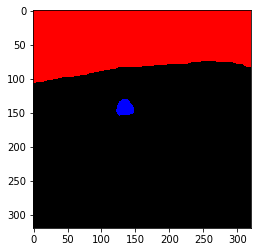

In [16]:
import matplotlib.pyplot as plt
plt.imshow(weighted_pred)

In [13]:
y_true = '/Users/chenwu/Downloads/artificial-lunar-rocky-landscape-dataset/images/clean/clean0001.png'
true = scipy.misc.imresize(scipy.misc.imread(y_true), image_shape)

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


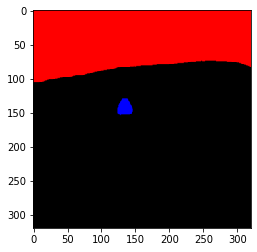

In [14]:
plt.imshow(true)

In [15]:
from keras import backend as K
def iou_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
  union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  return iou

Using TensorFlow backend.


In [17]:
iou_coef(true,weighted_pred)

NotFoundError: Could not find valid device for node.
Node:{{node Abs}}
All kernels registered for op Abs :
  device='XLA_CPU'; T in [DT_FLOAT, DT_DOUBLE, DT_INT32, DT_INT64, DT_BFLOAT16, DT_HALF]
  device='XLA_CPU_JIT'; T in [DT_FLOAT, DT_DOUBLE, DT_INT32, DT_INT64, DT_BFLOAT16, DT_HALF]
  device='CPU'; T in [DT_FLOAT]
  device='CPU'; T in [DT_HALF]
  device='CPU'; T in [DT_DOUBLE]
  device='CPU'; T in [DT_INT32]
  device='CPU'; T in [DT_INT64]
 [Op:Abs] name: Abs/

In [7]:
import tensorflow as tf
import cv2
import os
import scipy
import numpy as np
from config import image_shape, train_dir, train_label_dir, test_dir
filename='/Users/chenwu/Downloads/artificial-lunar-rocky-landscape-dataset/images/render/render0001.png'
image = scipy.misc.imresize(
    scipy.misc.imread(filename), image_shape)
origin_image = scipy.misc.imresize(
    scipy.misc.imread(filename), image_shape)
image_yuv = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
image = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``sk

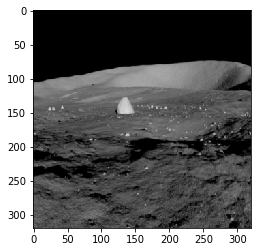

In [8]:
import matplotlib.pyplot as plt
plt.imshow(origin_image)